In [ ]:
!pip install transformers==4.28.1

In [ ]:
import transformers
print(transformers.__version__)
from transformers import pipeline

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

/Users/banani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# === Load Dataset ===
df = pd.read_csv('/Users/banani/Downloads/cm1.csv')
print(f"Loaded dataset with shape: {df.shape}")

# Assume last column 'defects' as label
features = df.iloc[:, :-1]
labels = df.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)  # binary defect or no-defect


df.head(10)

Loaded dataset with shape: (498, 22)


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,False
7,12.0,2.0,1.0,2.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,0,7,0,10.0,7.0,14.0,9.0,3.0,False
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,12,16,13,0,15.0,20.0,69.0,38.0,9.0,False
9,46.0,15.0,3.0,1.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,8,35,22,0,15.0,37.0,129.0,110.0,29.0,False


Loaded cm1.csv with shape (498, 22)
Loaded kc1.csv with shape (2109, 22)
Loaded kc2.csv with shape (522, 22)
Loaded jm1.csv with shape (13204, 22)
Loaded pc1.csv with shape (1109, 22)
Processing dataset: cm1.csv
Label distribution:
defects
0    449
1     49
Name: count, dtype: int64
Model saved to /Users/banani/Downloads/cm1.pkl


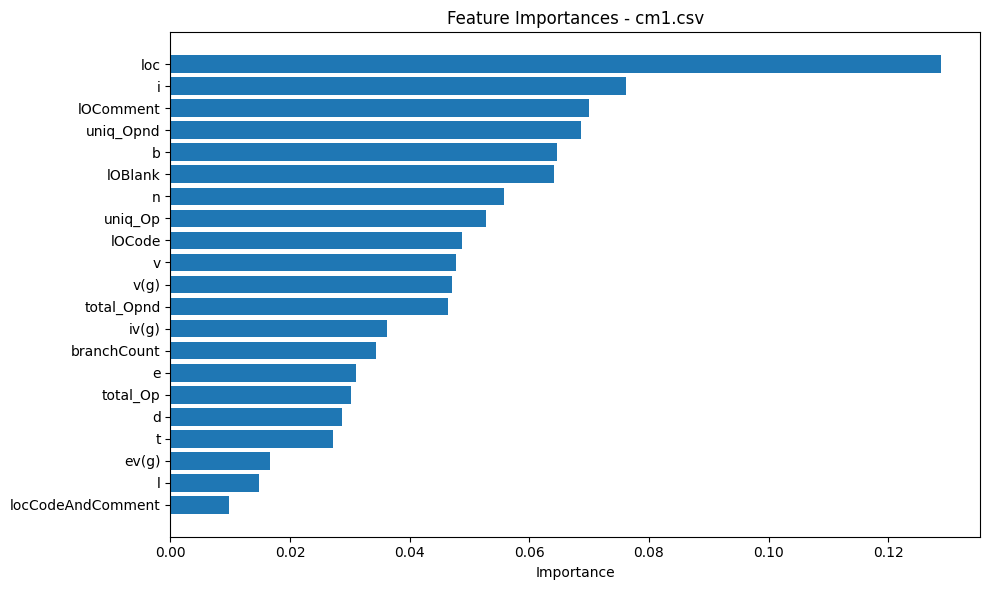

Processing dataset: kc1.csv
Label distribution:
defects
0    1783
1     326
Name: count, dtype: int64
Model saved to /Users/banani/Downloads/kc1.pkl


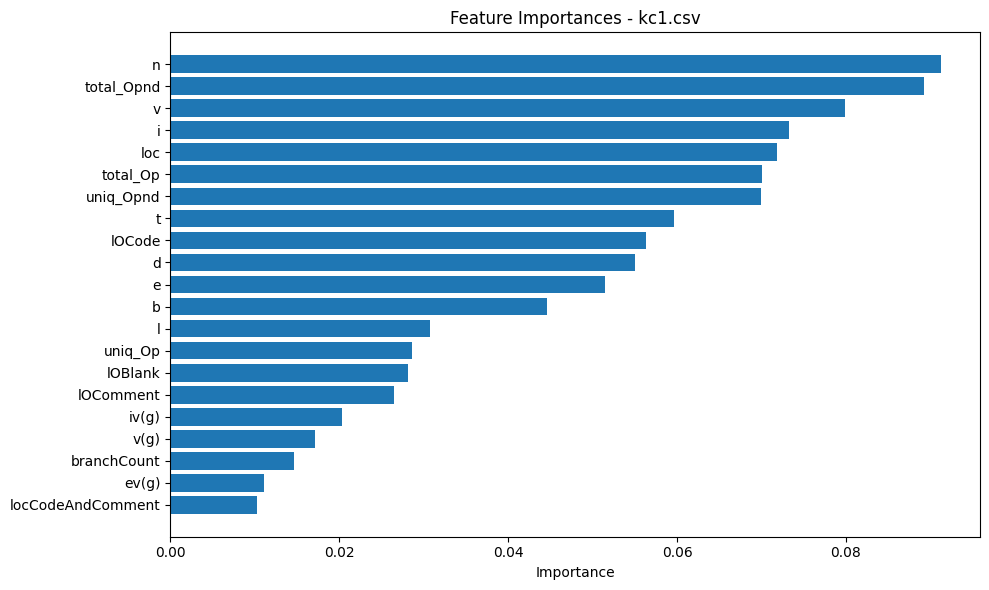

Processing dataset: kc2.csv
Label distribution:
problems
0    415
1    107
Name: count, dtype: int64
Model saved to /Users/banani/Downloads/kc2.pkl


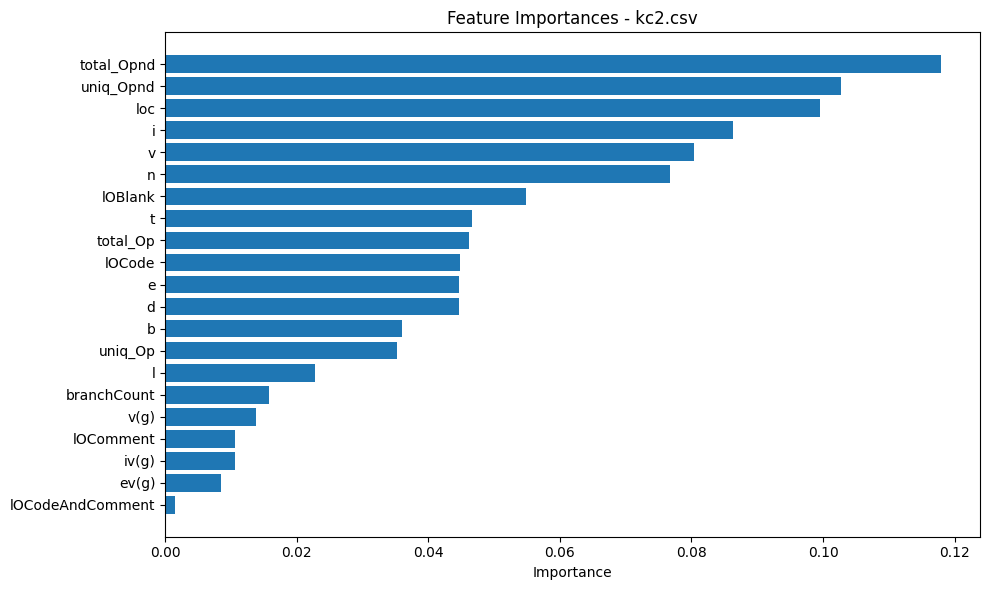

Processing dataset: jm1.csv
Label distribution:
defects
0    11101
1     2103
Name: count, dtype: int64
Model saved to /Users/banani/Downloads/jm1.pkl


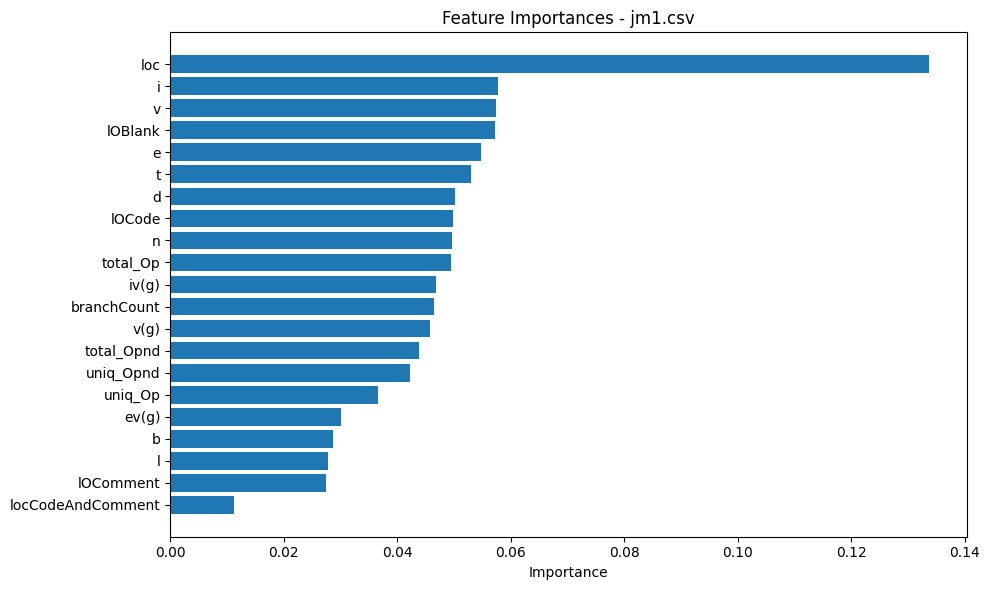

Processing dataset: pc1.csv
Label distribution:
defects
0    1032
1      77
Name: count, dtype: int64
Model saved to /Users/banani/Downloads/pc1.pkl


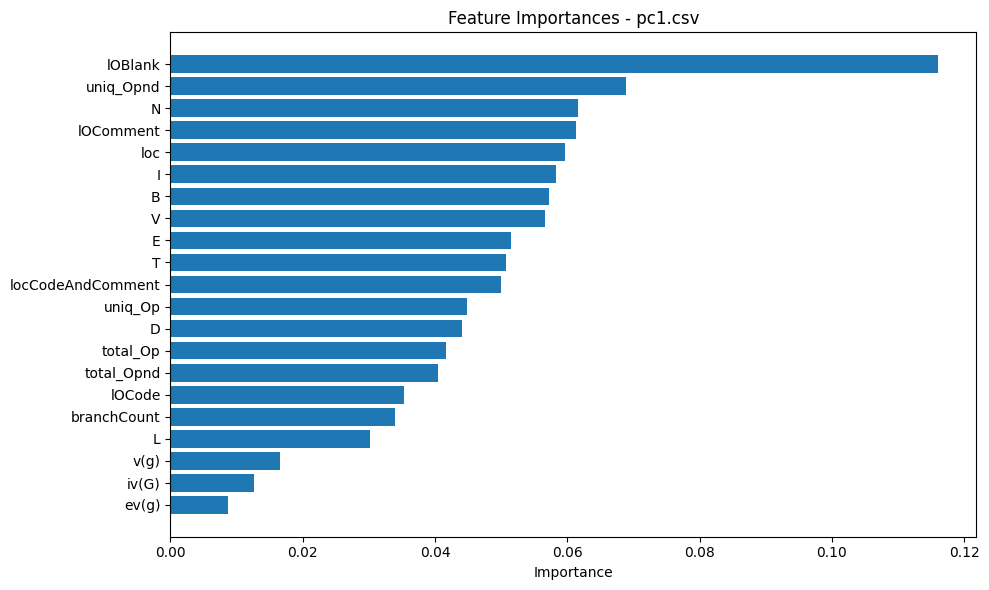


Model Evaluation Summary:
   Dataset  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  cm1.csv  0.573333   0.134328  0.600000  0.219512  0.585185
1  kc1.csv  0.709321   0.320833  0.785714  0.455621  0.740521
2  kc2.csv  0.783439   0.477273  0.656250  0.552632  0.736125
3  jm1.csv  0.703433   0.305991  0.679873  0.422036  0.693884
4  pc1.csv  0.690691   0.161017  0.826087  0.269504  0.753366

Feature Rankings:
    Dataset      Feature  Importance  Rank
0   cm1.csv          loc    0.128912     1
1   cm1.csv            i    0.076117     2
2   cm1.csv    lOComment    0.069912     3
3   cm1.csv    uniq_Opnd    0.068708     4
4   cm1.csv            b    0.064628     5
5   cm1.csv      lOBlank    0.064074     6
6   cm1.csv            n    0.055769     7
7   cm1.csv      uniq_Op    0.052690     8
8   cm1.csv       lOCode    0.048783     9
9   cm1.csv            v    0.047773    10
10  cm1.csv         v(g)    0.047130    11
11  cm1.csv   total_Opnd    0.046468    12
12  cm1.csv        iv(g

In [12]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# === Utility to handle imbalance via undersampling ===
def undersample(X, y):
    df = X.copy()
    df['label'] = y
    minority = df[df['label'] == 1]
    majority = df[df['label'] == 0].sample(n=len(minority), random_state=42)
    balanced_df = pd.concat([minority, majority])
    return balanced_df.drop('label', axis=1), balanced_df['label']

# === Load datasets ===
def load_datasets(paths):
    datasets = {}
    for path in paths:
        dataset_name = os.path.basename(path)
        df = pd.read_csv(path)
        datasets[dataset_name] = df
        print(f"Loaded {dataset_name} with shape {df.shape}")
    return datasets

# === Run Random Forest and store metrics + feature ranks ===
def run_random_forest_on_datasets(datasets, dataset_paths):
    results = []
    feature_rankings = []

    for path in dataset_paths:
        dataset_name = os.path.basename(path)
        df = datasets[dataset_name]
        print(f"Processing dataset: {dataset_name}")

        # Extract features and labels
        features = df.iloc[:, :-1]
        label_column = df.columns[-1]
        labels = df[label_column].apply(lambda val: 1 if str(val).lower() in ['y', 'yes', 'true', '1'] else 0)

        # Show imbalance
        print("Label distribution:")
        print(labels.value_counts())

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            features, labels, stratify=labels, test_size=0.3, random_state=42
        )

        # Optional: undersample training data
        X_train_bal, y_train_bal = undersample(X_train, y_train)

        # Train Random Forest
        clf = RandomForestClassifier(class_weight='balanced', random_state=42)
        clf.fit(X_train_bal, y_train_bal)
        y_pred = clf.predict(X_test)

        # Save model as .pkl in same folder
        dataset_dir = os.path.dirname(path)
        model_filename = os.path.join(dataset_dir, dataset_name.replace('.csv', '.pkl'))
        with open(model_filename, "wb") as f:
            pickle.dump(clf, f)
        print(f"Model saved to {model_filename}")

        # Collect evaluation metrics
        result = {
            'Dataset': dataset_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_pred)
        }
        results.append(result)

        # Feature importances
        importances = clf.feature_importances_
        sorted_idx = importances.argsort()[::-1]
        for rank, idx in enumerate(sorted_idx):
            feature_rankings.append({
                'Dataset': dataset_name,
                'Feature': X_train.columns[idx],
                'Importance': importances[idx],
                'Rank': rank + 1
            })

        # Optional: Plot feature importance
        feat_df = pd.DataFrame({
            'Feature': X_train.columns[sorted_idx],
            'Importance': importances[sorted_idx]
        })
        plt.figure(figsize=(10, 6))
        plt.barh(feat_df['Feature'], feat_df['Importance'])
        plt.title(f"Feature Importances - {dataset_name}")
        plt.xlabel("Importance")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # Convert to DataFrames
    results_df = pd.DataFrame(results)
    feature_df = pd.DataFrame(feature_rankings)
    return results_df, feature_df

# === MAIN EXECUTION ===

dataset_paths = [
    '/Users/banani/Downloads/cm1.csv',
    '/Users/banani/Downloads/kc1.csv',
    '/Users/banani/Downloads/kc2.csv',
    '/Users/banani/Downloads/jm1.csv',
    '/Users/banani/Downloads/pc1.csv'
]

datasets = load_datasets(dataset_paths)
results_df, feature_df = run_random_forest_on_datasets(datasets, dataset_paths)

# === Display or save final results ===
print("\nModel Evaluation Summary:")
print(results_df)

print("\nFeature Rankings:")
print(feature_df.head(20))  # just top 20 rows for brevity

# Optionally save to CSV
results_df.to_csv("model_performance_summary.csv", index=False)
feature_df.to_csv("feature_importances_by_dataset.csv", index=False)

In [14]:
#Isolation Forets for infering whic model is best
import pandas as pd
import os
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === List of datasets ===
DATASETS = ['cm1', 'pc1', 'kc1', 'kc2', 'jm1']

# === Directories ===
DATA_DIR = "/Users/banani/Downloads/"
PICKLE_DIR = "/Users/banani/Downloads/Pickle_Files/"
os.makedirs(PICKLE_DIR, exist_ok=True)  # Ensure save directory exists

# === Utility to load and preprocess dataset ===
def load_dataset(name):
    path = os.path.join(DATA_DIR, f"{name}.csv")
    df = pd.read_csv(path)

    print(f"\nColumns in {name}.csv:", df.columns.tolist())

    # Handle kc2 special case
    if name.lower() == 'kc2' and 'problems' in df.columns:
        label_col = 'problems'
        df[label_col] = df[label_col].map({'yes': 1, 'no': 0})
        if df[label_col].isnull().any():
            raise ValueError("Unknown values in 'problems' column of kc2.csv")
    else:
        # Try to find the label column from common names
        possible_labels = ['defects', 'Defects', 'bug', 'Bug', 'defective', 'label', 'Label']
        label_col = None
        for col in possible_labels:
            if col in df.columns:
                label_col = col
                break
        if not label_col:
            raise ValueError(f"Could not find a valid label column in {name}.csv")

    X = df.drop(columns=[label_col])
    y = df[label_col].astype(int)
    return X, y

# === Function to evaluate prediction results ===
def evaluate(y_true, y_pred_bin, method_name):
    print(f"\n{method_name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred_bin))
    print("Precision:", precision_score(y_true, y_pred_bin))
    print("Recall   :", recall_score(y_true, y_pred_bin))
    print("F1 Score :", f1_score(y_true, y_pred_bin))
    print("ROC-AUC  :", roc_auc_score(y_true, y_pred_bin))

# === Train, evaluate, and save model ===
def apply_isolation_forest(X_train, X_test, contamination, model_path):
    iso = IsolationForest(contamination=contamination, random_state=42)
    iso.fit(X_train)

    # Save the trained model
    joblib.dump(iso, model_path)
    print(f"Model saved as {model_path}")

    iso_pred = iso.predict(X_test)
    return [1 if p == -1 else 0 for p in iso_pred]

# === Main processing loop ===
for dataset_name in DATASETS:
    print(f"\nProcessing Dataset: {dataset_name.upper()}")

    try:
        # Load and split data
        X, y = load_dataset(dataset_name)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, stratify=y, test_size=0.3, random_state=42
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Set contamination to known defect rate
        contamination = y.mean()

        # Path to save model
        model_path = os.path.join(PICKLE_DIR, f"{dataset_name}_isolation_forest.pkl")

        # Train and evaluate
        iso_pred_bin = apply_isolation_forest(X_train_scaled, X_test_scaled, contamination, model_path)
        evaluate(y_test, iso_pred_bin, method_name="Isolation Forest")

    except Exception as e:
        print(f"Error processing {dataset_name}: {e}")


Processing Dataset: CM1

Columns in cm1.csv: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']
Model saved as /Users/banani/Downloads/Pickle_Files/cm1_isolation_forest.pkl

Isolation Forest Results:
Accuracy : 0.86
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC-AUC  : 0.4777777777777778

Processing Dataset: PC1

Columns in pc1.csv: ['loc', 'v(g)', 'ev(g)', 'iv(G)', 'N', 'V', 'L', 'D', 'I', 'E', 'B', 'T', 'lOCode', 'lOComment', 'locCodeAndComment', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']
Model saved as /Users/banani/Downloads/Pickle_Files/pc1_isolation_forest.pkl

Isolation Forest Results:
Accuracy : 0.8948948948948949
Precision: 0.25
Recall   : 0.2608695652173913
F1 Score : 0.2553191489361702
ROC-AUC  : 0.6014025245441795

Processing Dataset: KC1

Columns in kc1.csv: ['loc', 'v(g)', '

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set paths
DATA_PATH = "/Users/banani/Downloads/kc2.csv"

# Load and preprocess kc2.csv
df = pd.read_csv(DATA_PATH)
print("Columns:", df.columns.tolist())

# Use 'problems' as the label, map yes/no → 1/0
df['problems'] = df['problems'].map({'yes': 1, 'no': 0})
df.dropna(inplace=True)

X = df.drop(columns=['problems'])
y = df['problems'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Utility to evaluate results
def evaluate(y_true, y_pred_bin, name):
    print(f"\n{name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred_bin))
    print("Precision:", precision_score(y_true, y_pred_bin))
    print("Recall   :", recall_score(y_true, y_pred_bin))
    print("F1 Score :", f1_score(y_true, y_pred_bin))
    print("ROC-AUC  :", roc_auc_score(y_true, y_pred_bin))

# === 1. Isolation Forest ===
iso = IsolationForest(contamination=y.mean(), random_state=42)
iso.fit(X_train_scaled)
iso_pred = iso.predict(X_test_scaled)
iso_pred_bin = [1 if p == -1 else 0 for p in iso_pred]
evaluate(y_test, iso_pred_bin, "Isolation Forest")

# === 2. Local Outlier Factor (LOF) ===
lof = LocalOutlierFactor(n_neighbors=20, contamination=y.mean())
lof_pred = lof.fit_predict(np.vstack((X_train_scaled, X_test_scaled)))[len(X_train):]
lof_pred_bin = [1 if p == -1 else 0 for p in lof_pred]
evaluate(y_test, lof_pred_bin, "Local Outlier Factor")

# === 3. Autoencoder ===
# Build model
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train only on non-defective (normal) data
X_train_normal = X_train_scaled[y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, verbose=0, validation_split=0.1)

# Predict reconstruction error on test set
X_test_pred = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - X_test_pred, 2), axis=1)

# Set threshold at 95th percentile of training normal error
X_train_pred = autoencoder.predict(X_train_normal)
train_mse = np.mean(np.power(X_train_normal - X_train_pred, 2), axis=1)
threshold = np.percentile(train_mse, 95)

# Predict defects
ae_pred_bin = [1 if e > threshold else 0 for e in mse]
evaluate(y_test, ae_pred_bin, "Autoencoder")

Columns: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'lOCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'problems']

Isolation Forest Results:
Accuracy : 0.7834394904458599
Precision: 0.47058823529411764
Recall   : 0.5
F1 Score : 0.48484848484848486
ROC-AUC  : 0.678

Local Outlier Factor Results:
Accuracy : 0.6687898089171974
Precision: 0.20588235294117646
Recall   : 0.21875
F1 Score : 0.21212121212121213
ROC-AUC  : 0.501375
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step

Autoencoder Results:
Accuracy : 0.7961783439490446
Precision: 0.5
Recall   : 0.34375
F1 Score : 0.4074074074074074
ROC-AUC  : 0.627875


In [1]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("google/code_x_glue_cc_defect_detection")

# Access the training set
train_data = dataset['train']

# Convert to pandas DataFrame
train_df = train_data.to_pandas()

# Display the first few rows
print(train_df.head(1))

/Users/banani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/banani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   id                                               func  target project  \
0   0  static av_cold int vdadec_init(AVCodecContext ...   False  FFmpeg   

                                  commit_id  
0  973b1a6b9070e2bf17d17568cbaf4043ce931f51  


In [17]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModelForSequenceClassification
import torch
import pandas as pd
import re
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
dataset = load_dataset("google/code_x_glue_cc_defect_detection")
train_df = dataset['train'].to_pandas()
train_df['target'] = train_df['target'].astype(int)

# Balance 10 samples: 5 buggy, 5 clean
N = 500
buggy = train_df[train_df['target'] == 1].sample(n=N//2, random_state=42)
clean = train_df[train_df['target'] == 0].sample(n=N//2, random_state=42)
balanced_df = pd.concat([buggy, clean]).sample(frac=1, random_state=42).reset_index(drop=True)

# Load StarCoder2
model_id = "bigcode/starcoder2-3b"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval()

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Richer few-shot prompt
few_shot_prefix = """
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\\n"); }
Answer: 0
"""

# StarCoder2 Inference
results = []
print(f"\nRunning StarCoder2 inference on {N} balanced samples...\n")

for i in tqdm(range(N)):
    code_sample = balanced_df.loc[i, 'func']
    true_label = int(balanced_df.loc[i, 'target'])

    prompt = f"""{few_shot_prefix}

Function:
{code_sample.strip()}
Answer:"""

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    try:
        outputs = model.generate(
            inputs["input_ids"],
            max_new_tokens=8,
            temperature=0.7,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        print(f"StarCoder2 Sample {i} Output:\n{decoded.strip()}\n")

        # Improved regex: isolate final answer, remove trailing text
        match = re.findall(r'Answer:\s*([01])', decoded)
        predicted = int(match[-1]) if match else -1
    except Exception as e:
        print(f"Error on StarCoder2 sample {i}: {e}")
        predicted = -1

    correct = predicted == true_label
    results.append({
        "index": i,
        "true_label": true_label,
        "predicted": predicted,
        "correct": correct
    })

results_df = pd.DataFrame(results).rename(columns={"true_label": "true_label_s"})

# CodeBERT baseline
print("\nRunning CodeBERT baseline for comparison...\n")
bert_model_id = "microsoft/codebert-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_id)
bert_model = AutoModelForSequenceClassification.from_pretrained(bert_model_id, num_labels=2)
bert_clf = pipeline("text-classification", model=bert_model, tokenizer=bert_tokenizer)

bert_preds = []
for i in tqdm(range(N)):
    code = balanced_df.loc[i, 'func']
    true_label = int(balanced_df.loc[i, 'target'])

    try:
        pred = bert_clf(code[:512])[0]
        print(f"CodeBERT Sample {i} Prediction: {pred} | True Label: {true_label}")
        predicted_label = int(pred['label'].split('_')[-1])
    except Exception as e:
        print(f"Error on CodeBERT sample {i}: {e}")
        predicted_label = -1

    bert_preds.append({
        "index": i,
        "true_label": true_label,
        "bert_pred": predicted_label,
        "bert_correct": (predicted_label == true_label)
    })

bert_df = pd.DataFrame(bert_preds).rename(columns={"true_label": "true_label_b"})

# Merge & evaluate
merged_df = pd.merge(results_df, bert_df, on="index")
y_true = merged_df["true_label_s"]
y_pred_s = merged_df["predicted"]
y_pred_b = merged_df["bert_pred"]

print("\n🔍 Prediction Comparison (first 10 samples):")
print(merged_df[['index', 'true_label_s', 'predicted', 'bert_pred']].head(10))

# Metrics
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": (y_true == y_pred).mean(),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_pred) if len(set(y_true)) > 1 else None
    }

starcoder_metrics = compute_metrics(y_true, y_pred_s)
codebert_metrics = compute_metrics(y_true, y_pred_b)

comparison_table = pd.DataFrame([
    {"Model": "StarCoder2", **starcoder_metrics},
    {"Model": "CodeBERT", **codebert_metrics}
])

print("\nModel Comparison:")
print(comparison_table)

/Users/banani/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Running StarCoder2 inference on 500 balanced samples...



  0%|                                         | 1/500 [00:31<4:19:32, 31.21s/it]

StarCoder2 Sample 0 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void fill_caches(H264Context *h, int mb_type, int for_deblock){

    MpegEncContext * const s = &h->s;

    const int mb_xy= h->mb_xy;

    int topleft_xy, top_xy, topright_xy, left_xy[2];

    int topleft_type, top_type, topright_type, left_type[2];

    int * left_block;

    int topleft_partition= -1;

    int i;



    top_xy     = mb_xy  - (s->mb_stride << FIELD_PICTURE);



    //FIXME deblocking could skip the intra and nnz parts.

    if(for_deblock && (h->slice_num == 1 || h->slice_table[mb_xy] == h->slice_table[top_xy])

  0%|▏                                        | 2/500 [00:36<2:11:04, 15.79s/it]

StarCoder2 Sample 1 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void vmxnet3_reset(VMXNET3State *s)

{

    VMW_CBPRN("Resetting vmxnet3...");



    vmxnet3_deactivate_device(s);

    vmxnet3_reset_interrupt_states(s);

    vmxnet_tx_pkt_reset(s->tx_pkt);

    s->drv_shmem = 0;

    s->tx_sop = true;

    s->skip_current_tx_pkt = false;

}
Answer: 1

Function:
const



  1%|▏                                        | 3/500 [00:43<1:38:15, 11.86s/it]

StarCoder2 Sample 2 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int write_payload_3270(EmulatedCcw3270Device *dev, uint8_t cmd)

{

    Terminal3270 *t = TERMINAL_3270(dev);

    int retval = 0;

    int count = ccw_dstream_avail(get_cds(t));



    assert(count <= (OUTPUT_BUFFER_SIZE - 3) / 2);



    if (!t->handshake_done) {

        if (!(t->outv[0] == IAC && t->outv[1]!= IAC)) {

            /*

             * Before having finished 3270 negotiation,

             * sending outbound data except protocol options is prohibited.

             */

            return 0;

        }

    }

   

  1%|▎                                        | 4/500 [00:51<1:25:24, 10.33s/it]

StarCoder2 Sample 3 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void virtio_scsi_handle_ctrl_req(VirtIOSCSI *s, VirtIOSCSIReq *req)

{

    VirtIODevice *vdev = (VirtIODevice *)s;

    uint32_t type;

    int r = 0;



    if (iov_to_buf(req->elem.out_sg, req->elem.out_num, 0,

                &type, sizeof(type)) < sizeof(type)) {

        virtio_scsi_bad_req();

        return;

    }



    virtio_tswap32s(vdev, &type);

    if (type == VIRTIO_SCSI_T_TMF) {

        if (virtio_scsi_parse_req(req, sizeof(VirtIOSCSICtrlTMFReq),

                    sizeof(VirtIOSCSICtrlTMFResp)) < 0) {

           

  1%|▍                                        | 5/500 [01:01<1:25:27, 10.36s/it]

StarCoder2 Sample 4 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int sse_mb(MpegEncContext *s){

    int w= 16;

    int h= 16;



    if(s->mb_x*16 + 16 > s->width ) w= s->width - s->mb_x*16;

    if(s->mb_y*16 + 16 > s->height) h= s->height- s->mb_y*16;



    if(w==16 && h==16)

      if(s->avctx->mb_cmp == FF_CMP_NSSE){

        return  s->dsp.nsse[0](s, s->new_picture.f.data[0] + s->mb_x*16 + s->mb_y*s->linesize*16, s->dest[0], s->linesize, 16)

               +s->dsp.nsse[1](s, s->new_picture.f.data[1] + s->mb_x*8  + s->mb_y*s->uvlinesize*8,s->dest[1], s->uvlinesize, 8)

               +

  1%|▍                                        | 6/500 [01:06<1:10:43,  8.59s/it]

StarCoder2 Sample 5 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qdraw_probe(AVProbeData *p)

{

    const uint8_t *b = p->buf;



    if (!b[10] && AV_RB32(b+11) == 0x1102ff0c &&!b[15] ||

        p->buf_size >= 528 &&!b[522] && AV_RB32(b+523) == 0x1102ff0c &&!b[527])

        return AVPROBE_SCORE_EXTENSION + 1;

    return 0;

}
Answer: 1


Function:
static



  1%|▌                                        | 7/500 [01:15<1:10:01,  8.52s/it]

StarCoder2 Sample 6 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void spapr_drc_attach(sPAPRDRConnector *drc, DeviceState *d, void *fdt,

                      int fdt_start_offset, bool coldplug, Error **errp)

{

    trace_spapr_drc_attach(spapr_drc_index(drc));



    if (drc->isolation_state!= SPAPR_DR_ISOLATION_STATE_ISOLATED) {

        error_setg(errp, "an attached device is still awaiting release");

        return;

    }

    if (spapr_drc_type(drc) == SPAPR_DR_CONNECTOR_TYPE_PCI) {

        g_assert(drc->allocation_state == SPAPR_DR_ALLOCATION_STATE_USABLE);

    }

    g_assert(fdt || col

  2%|▋                                        | 8/500 [01:21<1:03:53,  7.79s/it]

StarCoder2 Sample 7 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
long do_rt_sigreturn(CPUPPCState *env)

{

    struct target_rt_sigframe *rt_sf = NULL;

    target_ulong rt_sf_addr;



    rt_sf_addr = env->gpr[1] + SIGNAL_FRAMESIZE + 16;

    if (!lock_user_struct(VERIFY_READ, rt_sf, rt_sf_addr, 1))

        goto sigsegv;



    if (do_setcontext(&rt_sf->uc, env, 1))

        goto sigsegv;



    do_sigaltstack(rt_sf_addr

                   + offsetof(struct target_rt_sigframe, uc.tuc_stack),

                   0, env->gpr[1]);



    unlock_user_struct(rt_sf, rt_sf_addr, 1);

    return -TARGET_

  2%|▋                                        | 9/500 [01:28<1:02:30,  7.64s/it]

StarCoder2 Sample 8 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int spapr_ovec_populate_dt(void *fdt, int fdt_offset,

                           sPAPROptionVector *ov, const char *name)

{

    uint8_t vec[OV_MAXBYTES + 1];

    uint16_t vec_len;

    unsigned long lastbit;

    int i;



    g_assert(ov);



    lastbit = find_last_bit(ov->bitmap, OV_MAXBITS);

    /* if no bits are set, include at least 1 byte of the vector so we can

     * still encoded this in the device tree while abiding by the same

     * encoding/sizing expected in ibm,client-architecture-support

     */

    vec_len = (

  2%|▊                                       | 10/500 [01:35<1:00:43,  7.44s/it]

StarCoder2 Sample 9 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static always_inline void gen_cmov (TCGCond inv_cond,

                                    int ra, int rb, int rc,

                                    int islit, uint8_t lit, int mask)

{

    int l1;



    if (unlikely(rc == 31))

        return;



    l1 = gen_new_label();



    if (ra!= 31) {

        if (mask) {

            TCGv tmp = tcg_temp_new(TCG_TYPE_I64);

            tcg_gen_andi_i64(tmp, cpu_ir[ra], 1);

            tcg_gen_brcondi_i64(inv_cond, tmp, 0, l1);

            tcg_temp_free(tmp);

        } else

           

  2%|▉                                       | 11/500 [01:54<1:27:43, 10.76s/it]

StarCoder2 Sample 10 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int msmpeg4v12_decode_mb(MpegEncContext *s, int16_t block[6][64])

{

    int cbp, code, i;

    uint32_t * const mb_type_ptr = &s->current_picture.mb_type[s->mb_x + s->mb_y*s->mb_stride];



    if (s->pict_type == AV_PICTURE_TYPE_P) {

        if (s->use_skip_mb_code) {

            if (get_bits1(&s->gb)) {

                /* skip mb */

                s->mb_intra = 0;

                for(i=0;i<6;i++)

                    s->block_last_index[i] = -1;

                s->mv_dir = MV_DIR_FORWARD;

                s->mv_type =

  2%|▉                                       | 12/500 [02:16<1:57:22, 14.43s/it]

StarCoder2 Sample 11 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int alloc_refcount_block(BlockDriverState *bs,
    int64_t cluster_index, uint16_t **refcount_block)
{
    BDRVQcowState *s = bs->opaque;
    unsigned int refcount_table_index;
    int ret;
    BLKDBG_EVENT(bs->file, BLKDBG_REFBLOCK_ALLOC);
    /* Find the refcount block for the given cluster */
    refcount_table_index = cluster_index >> (s->cluster_bits - REFCOUNT_SHIFT);
    if (refcount_table_index < s->refcount_table_size) {
        uint64_t refcount_block_offset =
            s->refcount_table[refcount_table_index] & REFT_

  3%|█                                       | 13/500 [02:28<1:50:44, 13.64s/it]

StarCoder2 Sample 12 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
VirtIODevice *virtio_9p_init(DeviceState *dev, V9fsConf *conf)

 {

    V9fsState *s;

    int i, len;

    struct stat stat;

    FsTypeEntry *fse;





    s = (V9fsState *)virtio_common_init("virtio-9p",

                                    VIRTIO_ID_9P,

                                    sizeof(struct virtio_9p_config)+

                                    MAX_TAG_LEN,

                                    sizeof(V9fsState));



    /* initialize pdu allocator */

    QLIST_INIT(&s->free_list);

    for (i = 0; i < (MAX_REQ - 1); 

  3%|█                                       | 14/500 [02:50<2:11:25, 16.23s/it]

StarCoder2 Sample 13 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
inline static void RENAME(hcscale)(uint16_t *dst, int dstWidth,

				uint8_t *src1, uint8_t *src2, int srcW, int xInc)

{

#ifdef HAVE_MMX

	// use the new MMX scaler if th mmx2 cant be used (its faster than the x86asm one)

    if(sws_flags!= SWS_FAST_BILINEAR || (!canMMX2BeUsed))

#else

    if(sws_flags!= SWS_FAST_BILINEAR)

#endif

    {

    	RENAME(hScale)(dst    , dstWidth, src1, srcW, xInc, hChrFilter, hChrFilterPos, hChrFilterSize);

    	RENAME(hScale)(dst+2048, dstWidth, src2, srcW, xInc, hChrFilter, hChrFilterPos, hChrFilte

  3%|█▏                                      | 15/500 [02:55<1:42:35, 12.69s/it]

StarCoder2 Sample 14 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void helper_unlock(void)

{

    spin_unlock(&global_cpu_lock);

}
Answer: 0


Function:
char



  3%|█▎                                      | 16/500 [03:00<1:23:03, 10.30s/it]

StarCoder2 Sample 15 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void *cpu_register_map_client(void *opaque, void (*callback)(void *opaque))

{

    MapClient *client = qemu_malloc(sizeof(*client));



    client->opaque = opaque;

    client->callback = callback;

    LIST_INSERT_HEAD(&map_client_list, client, link);

    return client;

}
Answer: 1

Function:
void



  3%|█▎                                      | 17/500 [03:05<1:10:38,  8.78s/it]

StarCoder2 Sample 16 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void bdrv_release_dirty_bitmap(BlockDriverState *bs, BdrvDirtyBitmap *bitmap)

{

    BdrvDirtyBitmap *bm, *next;

    QLIST_FOREACH_SAFE(bm, &bs->dirty_bitmaps, list, next) {

        if (bm == bitmap) {

            assert(!bdrv_dirty_bitmap_frozen(bm));

            QLIST_REMOVE(bitmap, list);

            hbitmap_free(bitmap->bitmap);

            g_free(bitmap->name);

            g_free(bitmap);

            return;

        }

    }

}
Answer: 1

Function:
static



  4%|█▍                                      | 18/500 [03:12<1:06:42,  8.30s/it]

StarCoder2 Sample 17 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qcow2_pre_write_overlap_check(BlockDriverState *bs, int ign, int64_t offset,

                                  int64_t size)

{

    int ret = qcow2_check_metadata_overlap(bs, ign, offset, size);



    if (ret < 0) {

        return ret;

    } else if (ret > 0) {

        int metadata_ol_bitnr = ffs(ret) - 1;

        char *message;



        assert(metadata_ol_bitnr < QCOW2_OL_MAX_BITNR);



        fprintf(stderr, "qcow2: Preventing invalid write on metadata (overlaps "

                "with %s); image marked as corrupt.\n",

  4%|█▌                                        | 19/500 [03:18<59:33,  7.43s/it]

StarCoder2 Sample 18 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void downmix_3f_2r_to_dolby(float *samples)

{

    int i;



    for (i = 0; i < 256; i++) {

        samples[i] += (samples[i + 256] - samples[i + 768]);

        samples[i + 256] = (samples[i + 512] + samples[i + 1024]);

        samples[i + 512] = samples[i + 768] = samples[i + 1024] = 0;

    }

}
Answer: 0

Function:
static



  4%|█▋                                        | 20/500 [03:22<52:16,  6.53s/it]

StarCoder2 Sample 19 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
URLProtocol *ffurl_protocol_next(const URLProtocol *prev)

{

    return prev? prev->next : first_protocol;

}
Answer: 1

Function:
void



  4%|█▋                                      | 21/500 [03:41<1:22:16, 10.31s/it]

StarCoder2 Sample 20 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(bgr24ToY)(uint8_t *dst, uint8_t *src, long width)

{

#ifdef HAVE_MMX

	asm volatile(

		"mov %2, %%"REG_a"		\n\t"

		"movq "MANGLE(bgr2YCoeff)", %%mm6		\n\t"

		"movq "MANGLE(w1111)", %%mm5		\n\t"

		"pxor %%mm7, %%mm7		\n\t"

		"lea (%%"REG_a", %%"REG_a", 2), %%"REG_b"\n\t"

		ASMALIGN16

		"1:				\n\t"

		PREFETCH" 64(%0, %%"REG_b")	\n\t"

		"movd (%0, %%"REG_b"), %%mm0	\n\t"

		"movd 3(%0, %%"REG_b"), %%mm1	\n\t"

		"punpcklbw %%mm7, %%mm0		\n\t"

		"punpcklbw %%mm7, %%mm1		\n\t"

		"movd 6(%0, %%"REG_b"),

  4%|█▊                                      | 22/500 [03:47<1:10:56,  8.90s/it]

StarCoder2 Sample 21 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void horizontal_filter(unsigned char *first_pixel, int stride,

    int *bounding_values)

{

    unsigned char *end;

    int filter_value;



    for (end= first_pixel + 8*stride; first_pixel < end; first_pixel += stride) {

        filter_value =

            (first_pixel[-2] - first_pixel[ 1])

         +3*(first_pixel[ 0] - first_pixel[-1]);

        filter_value = bounding_values[(filter_value + 4) >> 3];

        first_pixel[-1] = clip_uint8(first_pixel[-1] + filter_value);

        first_pixel[ 0] = clip_uint8(first_pixe

  5%|█▊                                      | 23/500 [03:53<1:04:09,  8.07s/it]

StarCoder2 Sample 22 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int nut_write_trailer(AVFormatContext *s)

{

    NUTContext *nut = s->priv_data;

    ByteIOContext *bc = &s->pb;



    update_packetheader(nut, bc, 0);



#if 0

    int i;



    /* WRITE INDEX */



    for (i = 0; s->nb_streams; i++)

    {

	put_be64(bc, INDEX_STARTCODE);

	put_packetheader(nut, bc, 64);

	put_v(bc, s->streams[i]->id);

	put_v(bc,...);

	put_be32(bc, 0); /* FIXME: checksum */

        update_packetheader(nut, bc, 0);

    }

#endif



    put_flush_packet(bc);

    

    av_freep(&nut->stream);



    ret

  5%|█▉                                      | 24/500 [04:03<1:08:29,  8.63s/it]

StarCoder2 Sample 23 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void spapr_core_pre_plug(HotplugHandler *hotplug_dev, DeviceState *dev,

                         Error **errp)

{

    MachineState *machine = MACHINE(OBJECT(hotplug_dev));

    sPAPRMachineClass *smc = SPAPR_MACHINE_GET_CLASS(OBJECT(hotplug_dev));

    sPAPRMachineState *spapr = SPAPR_MACHINE(OBJECT(hotplug_dev));

    int spapr_max_cores = max_cpus / smp_threads;

    int index;

    Error *local_err = NULL;

    CPUCore *cc = CPU_CORE(dev);

    char *base_core_type = spapr_get_cpu_core_type(machine->cpu_model);

    const char *ty

  5%|██                                        | 25/500 [04:08<59:09,  7.47s/it]

StarCoder2 Sample 24 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint32_t pci_up_read(void *opaque, uint32_t addr)

{

    PIIX4PMState *s = opaque;

    uint32_t val = s->pci0_status.up;



    PIIX4_DPRINTF("pci_up_read %x\n", val);

    return val;

}
Answer: 0


Function:
static



  5%|██                                      | 26/500 [04:16<1:01:36,  7.80s/it]

StarCoder2 Sample 25 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void DEF(put, pixels8_y2)(uint8_t *block, const uint8_t *pixels, ptrdiff_t line_size, int h)

{

    MOVQ_BFE(mm6);

    __asm__ volatile(

        "lea (%3, %3), %%"REG_a"        \n\t"

        "movq (%1), %%mm0               \n\t"

        ".p2align 3                     \n\t"

        "1:                             \n\t"

        "movq   (%1, %3), %%mm1         \n\t"

        "movq   (%1, %%"REG_a"),%%mm2   \n\t"

        PAVGBP(%%mm1, %%mm0, %%mm4,   %%mm2, %%mm1, %%mm5)

        "movq   %%mm4, (%2)             \n\t"

     

  5%|██▏                                     | 27/500 [04:24<1:01:10,  7.76s/it]

StarCoder2 Sample 26 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ff_restore_parser_state(AVFormatContext *s, AVParserState *state)

{

    int i;

    AVStream *st;

    AVParserStreamState *ss;

    ff_read_frame_flush(s);



    if (!state)

        return;



    avio_seek(s->pb, state->fpos, SEEK_SET);



    // copy context structures

    s->cur_st                           = state->cur_st;

    s->packet_buffer                    = state->packet_buffer;

    s->raw_packet_buffer                = state->raw_packet_buffer;

    s->raw_packet_buffer_remaining_size = state->raw_packet_buffer

  6%|██▏                                     | 28/500 [04:34<1:07:41,  8.60s/it]

StarCoder2 Sample 27 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void init_input_filter(FilterGraph *fg, AVFilterInOut *in)

{

    InputStream *ist;

    enum AVMediaType type = avfilter_pad_get_type(in->filter_ctx->input_pads, in->pad_idx);

    int i;



    // TODO: support other filter types

    if (type!= AVMEDIA_TYPE_VIDEO && type!= AVMEDIA_TYPE_AUDIO) {

        av_log(NULL, AV_LOG_FATAL, "Only video and audio filters supported "

               "currently.\n");

        exit_program(1);

    }



    if (in->name) {

        AVFormatContext *s;

        AVStream       *st = NULL;

 

  6%|██▎                                     | 29/500 [04:59<1:44:20, 13.29s/it]

StarCoder2 Sample 28 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int vc1_decode_intra_block(VC1Context *v, int16_t block[64], int n,

                                  int coded, int mquant, int codingset)

{

    GetBitContext *gb = &v->s.gb;

    MpegEncContext *s = &v->s;

    int dc_pred_dir = 0; /* Direction of the DC prediction used */

    int i;

    int16_t *dc_val;

    int16_t *ac_val, *ac_val2;

    int dcdiff;

    int mb_pos = s->mb_x + s->mb_y * s->mb_stride;

    int a_avail = v->a_avail, c_avail = v->c_avail;

    int use_pred = s->ac_pred;

    int scale;

    int q1, q2 = 0

  6%|██▍                                     | 30/500 [05:07<1:33:16, 11.91s/it]

StarCoder2 Sample 29 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void colo_compare_complete(UserCreatable *uc, Error **errp)

{

    CompareState *s = COLO_COMPARE(uc);

    Chardev *chr;

    char thread_name[64];

    static int compare_id;



    if (!s->pri_indev ||!s->sec_indev ||!s->outdev) {

        error_setg(errp, "colo compare needs 'primary_in',"

                   "'secondary_in','outdev' property set");

        return;

    } else if (!strcmp(s->pri_indev, s->outdev) ||

              !strcmp(s->sec_indev, s->outdev) ||

              !strcmp(s->pri_indev, s->sec_indev)) {

  

  6%|██▍                                     | 31/500 [05:12<1:16:58,  9.85s/it]

StarCoder2 Sample 30 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int do_eject(Monitor *mon, const QDict *qdict, QObject **ret_data)

{

    BlockDriverState *bs;

    int force = qdict_get_int(qdict, "force");

    const char *filename = qdict_get_str(qdict, "device");



    bs = bdrv_find(filename);

    if (!bs) {

        qerror_report(QERR_DEVICE_NOT_FOUND, filename);

        return -1;

    }

    return eject_device(mon, bs, force);

}
Answer: 0

Function:
static



  6%|██▌                                     | 32/500 [05:21<1:14:03,  9.49s/it]

StarCoder2 Sample 31 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int unix_socket_outgoing(const char *path)

{

    Error *local_err = NULL;

    int fd = unix_connect(path, &local_err);



    if (local_err!= NULL) {

        qerror_report_err(local_err);

        error_free(local_err);

    }

    return fd;

}
Answer: 0

Function:
int



  7%|██▋                                     | 33/500 [05:32<1:16:34,  9.84s/it]

StarCoder2 Sample 32 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void kbd_mouse_event(int dx, int dy, int dz, int buttons_state)

{

    QEMUPutMouseEntry *entry;

    QEMUPutMouseEvent *mouse_event;

    void *mouse_event_opaque;

    int width, height;



    if (!runstate_is_running()) {

        return;

    }

    if (QTAILQ_EMPTY(&mouse_handlers)) {

        return;

    }



    entry = QTAILQ_FIRST(&mouse_handlers);



    mouse_event = entry->qemu_put_mouse_event;

    mouse_event_opaque = entry->qemu_put_mouse_event_opaque;



    if (mouse_event) {

        if (entry->qemu_put_mouse_event

  7%|██▋                                     | 34/500 [05:39<1:11:44,  9.24s/it]

StarCoder2 Sample 33 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int s390_virtio_hypercall(CPUS390XState *env)

{

    s390_virtio_fn fn = s390_diag500_table[env->regs[1]];



    if (!fn) {

        return -EINVAL;

    }



    return fn(&env->regs[2]);

}
Answer: 1



Function:
void



  7%|██▊                                     | 35/500 [05:54<1:24:26, 10.90s/it]

StarCoder2 Sample 34 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void tgen_andi(TCGContext *s, TCGType type, TCGReg dest, uint64_t val)

{

    static const S390Opcode ni_insns[4] = {

        RI_NILL, RI_NILH, RI_NIHL, RI_NIHH

    };

    static const S390Opcode nif_insns[2] = {

        RIL_NILF, RIL_NIHF

    };

    uint64_t valid = (type == TCG_TYPE_I32? 0xffffffffull : -1ull);

    int i;



    /* Look for the zero-extensions.  */

    if ((val & valid) == 0xffffffff) {

        tgen_ext32u(s, dest, dest);

        return;

    }

    if (facilities & FACILITY_EXT_IMM) {

        if (

  7%|██▉                                     | 36/500 [06:00<1:11:11,  9.21s/it]

StarCoder2 Sample 35 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void uuid_generate(uuid_t out)

{

    memset(out, 0, sizeof(uuid_t));

}
Answer: 1

Function:
int



  7%|██▉                                     | 37/500 [06:05<1:02:01,  8.04s/it]

StarCoder2 Sample 36 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static coroutine_fn int dmg_co_read(BlockDriverState *bs, int64_t sector_num,

                                    uint8_t *buf, int nb_sectors)

{

    int ret;

    BDRVDMGState *s = bs->opaque;

    qemu_co_mutex_lock(&s->lock);

    ret = dmg_read(bs, sector_num, buf, nb_sectors);

    qemu_co_mutex_unlock(&s->lock);

    return ret;

}
Answer: 0

Function:
int



  8%|███▏                                      | 38/500 [06:11<57:31,  7.47s/it]

StarCoder2 Sample 37 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ahci_dma_set_inactive(IDEDMA *dma)

{

    AHCIDevice *ad = DO_UPCAST(AHCIDevice, dma, dma);



    DPRINTF(ad->port_no, "dma done\n");



    /* update d2h status */

    ahci_write_fis_d2h(ad, NULL);



    ad->dma_cb = NULL;



    /* maybe we still have something to process, check later */

    ad->check_bh = qemu_bh_new(ahci_check_cmd_bh, ad);

    qemu_bh_schedule(ad->check_bh);



    return 0;

}
Answer: 1

Function:
static



  8%|███                                     | 39/500 [06:20<1:00:03,  7.82s/it]

StarCoder2 Sample 38 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_mullwo(DisasContext *ctx)

{

    TCGv_i32 t0 = tcg_temp_new_i32();

    TCGv_i32 t1 = tcg_temp_new_i32();



    tcg_gen_trunc_tl_i32(t0, cpu_gpr[rA(ctx->opcode)]);

    tcg_gen_trunc_tl_i32(t1, cpu_gpr[rB(ctx->opcode)]);

    tcg_gen_muls2_i32(t0, t1, t0, t1);

#if defined(TARGET_PPC64)

    tcg_gen_concat_i32_i64(cpu_gpr[rD(ctx->opcode)], t0, t1);

#else

    tcg_gen_mov_i32(cpu_gpr[rD(ctx->opcode)], t0);

#endif



    tcg_gen_sari_i32(t0, t0, 31);

    tcg_gen_setcond_i32(TCG_COND_NE, t0, t0, t1);

    tcg_gen_extu

  8%|███▏                                    | 40/500 [06:40<1:29:23, 11.66s/it]

StarCoder2 Sample 39 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int avformat_write_header(AVFormatContext *s, AVDictionary **options)

{

    int ret = 0, i;

    AVStream *st;

    AVDictionary *tmp = NULL;

    AVCodecContext *codec = NULL;

    AVOutputFormat *of = s->oformat;



    if (options)

        av_dict_copy(&tmp, *options, 0);



    if ((ret = av_opt_set_dict(s, &tmp)) < 0)

        goto fail;



    // some sanity checks

    if (s->nb_streams == 0 &&!(of->flags & AVFMT_NOSTREAMS)) {

        av_log(s, AV_LOG_ERROR, "no streams\n");

        ret = AVERROR(EINVAL);

        goto fail

  8%|███▎                                    | 41/500 [06:46<1:16:10,  9.96s/it]

StarCoder2 Sample 40 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint32_t nvdimm_get_max_xfer_label_size(void)

{

    uint32_t max_get_size, max_set_size, dsm_memory_size = 4096;



    /*

     * the max data ACPI can read one time which is transferred by

     * the response of 'Get Namespace Label Data' function.

     */

    max_get_size = dsm_memory_size - sizeof(NvdimmFuncGetLabelDataOut);



    /*

     * the max data ACPI can write one time which is transferred by

     * 'Set Namespace Label Data' function.

     */

    max_set_size = dsm_memory_size - offsetof(NvdimmDsmIn, arg3)

  8%|███▎                                    | 42/500 [06:55<1:14:13,  9.72s/it]

StarCoder2 Sample 41 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int v9fs_set_xattr(FsContext *ctx, const char *path, const char *name,

                   void *value, size_t size, int flags)

{

    XattrOperations *xops = get_xattr_operations(ctx->xops, name);

    if (xops) {

        return xops->setxattr(ctx, path, name, value, size, flags);

    }

    errno = -EOPNOTSUPP;

    return -1;



}
Answer: 1

Function:
int



  9%|███▍                                    | 43/500 [07:04<1:12:08,  9.47s/it]

StarCoder2 Sample 42 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int bdrv_prwv_co(BlockDriverState *bs, int64_t offset,

                        QEMUIOVector *qiov, bool is_write,

                        BdrvRequestFlags flags)

{

    Coroutine *co;

    RwCo rwco = {

       .bs = bs,

       .offset = offset,

       .qiov = qiov,

       .is_write = is_write,

       .ret = NOT_DONE,

       .flags = flags,

    };



    /**

     * In sync call context, when the vcpu is blocked, this throttling timer

     * will not fire; so the I/O throttling function has to be disabled here

     * 

  9%|███▌                                    | 44/500 [07:13<1:10:08,  9.23s/it]

StarCoder2 Sample 43 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void add_bytes_c(uint8_t *dst, uint8_t *src, int w){

    long i;

    for(i=0; i<=w-sizeof(long); i+=sizeof(long)){

        long a = *(long*)(src+i);

        long b = *(long*)(dst+i);

        *(long*)(dst+i) = ((a&pb_7f) + (b&pb_7f)) ^ ((a^b)&pb_80);

    }

    for(; i<w; i++)

        dst[i+0] += src[i+0];

}
Answer: 0


Function:
static



  9%|███▌                                    | 45/500 [07:23<1:12:55,  9.62s/it]

StarCoder2 Sample 44 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void virtual_css_bridge_class_init(ObjectClass *klass, void *data)

{

    DeviceClass *dc = DEVICE_CLASS(klass);

    SysBusDeviceClass *k = SYS_BUS_DEVICE_CLASS(klass);



    k->init = virtual_css_bridge_init;

    dc->no_user = 1;

}
Answer: 0

Function:
static



  9%|███▋                                    | 46/500 [07:33<1:11:50,  9.49s/it]

StarCoder2 Sample 45 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int add_crc_to_array(uint32_t crc, int64_t pts)

{

    if (size_of_array <= number_of_elements) {

        if (size_of_array == 0)

            size_of_array = 10;

        size_of_array *= 2;

        crc_array = av_realloc(crc_array, size_of_array * sizeof(uint32_t));

        pts_array = av_realloc(pts_array, size_of_array * sizeof(int64_t));

        if ((crc_array == NULL) || (pts_array == NULL)) {

            av_log(NULL, AV_LOG_ERROR, "Can't allocate array to store crcs\n");

            return AVERROR(ENOMEM);

       

  9%|███▊                                    | 47/500 [08:01<1:53:24, 15.02s/it]

StarCoder2 Sample 46 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int dca_subframe_header(DCAContext *s, int base_channel, int block_index)

{

    /* Primary audio coding side information */

    int j, k;



    if (get_bits_left(&s->gb) < 0)

        return AVERROR_INVALIDDATA;



    if (!base_channel) {

        s->subsubframes[s->current_subframe]    = get_bits(&s->gb, 2) + 1;

        s->partial_samples[s->current_subframe] = get_bits(&s->gb, 3);

    }



    for (j = base_channel; j < s->prim_channels; j++) {

        for (k = 0; k < s->subband_activity[j]; k++)

            s->predic

 10%|███▊                                    | 48/500 [08:07<1:33:05, 12.36s/it]

StarCoder2 Sample 47 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void IMLT(float *pInput, float *pOutput, int odd_band)

{

    int     i;



    if (odd_band) {

        /**

        * Reverse the odd bands before IMDCT, this is an effect of the QMF transform

        * or it gives better compression to do it this way.

        * FIXME: It should be possible to handle this in ff_imdct_calc

        * for that to happen a modification of the prerotation step of

        * all SIMD code and C code is needed.

        * Or fix the functions before so they generate a pre reversed spectrum.

    

 10%|███▉                                    | 49/500 [08:14<1:22:15, 10.94s/it]

StarCoder2 Sample 48 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int pci_unin_main_init_device(SysBusDevice *dev)

{

    UNINState *s;

    int pci_mem_config, pci_mem_data;



    /* Use values found on a real PowerMac */

    /* Uninorth main bus */

    s = FROM_SYSBUS(UNINState, dev);



    pci_mem_config = cpu_register_io_memory(pci_unin_main_config_read,

                                            pci_unin_main_config_write, s);

    pci_mem_data = cpu_register_io_memory(pci_unin_main_read,

                                          pci_unin_main_write, &s->host_state);



    sysbus

 10%|████                                    | 50/500 [08:26<1:23:40, 11.16s/it]

StarCoder2 Sample 49 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static const uint8_t *read_huffman_tables(FourXContext *f,

                                          const uint8_t * const buf)

{

    int frequency[512] = { 0 };

    uint8_t flag[512];

    int up[512];

    uint8_t len_tab[257];

    int bits_tab[257];

    int start, end;

    const uint8_t *ptr = buf;

    int j;



    memset(up, -1, sizeof(up));



    start = *ptr++;

    end   = *ptr++;

    for (;;) {

        int i;



        for (i = start; i <= end; i++)

            frequency[i] = *ptr++;

        start = *ptr++;

    

 10%|████                                    | 51/500 [08:32<1:11:32,  9.56s/it]

StarCoder2 Sample 50 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int do_subchannel_work_passthrough(SubchDev *sch)

{

    int ret = 0;

    SCSW *s = &sch->curr_status.scsw;



    if (s->ctrl & SCSW_FCTL_CLEAR_FUNC) {

        /* TODO: Clear handling */

        sch_handle_clear_func(sch);

    } else if (s->ctrl & SCSW_FCTL_HALT_FUNC) {

        /* TODO: Halt handling */

        sch_handle_halt_func(sch);

    } else if (s->ctrl & SCSW_FCTL_START_FUNC) {

        ret = sch_handle_start_func_passthrough(sch);

    }



    return ret;

}
Answer: 1

Function:
int



 10%|████▏                                   | 52/500 [08:38<1:02:41,  8.40s/it]

StarCoder2 Sample 51 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static float **alloc_audio_arrays(int channels, int frame_size)

{

    float **audio = av_mallocz_array(channels, sizeof(float *));

    if (!audio)

        return NULL;



    for (int ch = 0; ch < channels; ch++) {

        audio[ch] = av_mallocz_array(frame_size, sizeof(float));

        if (!audio[ch]) {

            // alloc has failed, free everything allocated thus far

            for (ch--; ch >= 0; ch--)

                av_free(audio[ch]);

            av_free(audio);

            return NULL;

        }

    }



    retu

 11%|████▏                                   | 53/500 [08:50<1:12:44,  9.76s/it]

StarCoder2 Sample 52 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold int init_subtitles(AVFilterContext *ctx, const char *args)

{

    int ret, sid;

    AVFormatContext *fmt = NULL;

    AVCodecContext *dec_ctx = NULL;

    AVCodec *dec = NULL;

    AVStream *st;

    AVPacket pkt;

    AssContext *ass = ctx->priv;



    /* Init libass */

    ret = init(ctx, args, &subtitles_class);

    if (ret < 0)

        return ret;

    ass->track = ass_new_track(ass->library);

    if (!ass->track) {

        av_log(ctx, AV_LOG_ERROR, "Could not create a libass track\n");

        return AVERRO

 11%|████▎                                   | 54/500 [08:59<1:09:17,  9.32s/it]

StarCoder2 Sample 53 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int udp_read(URLContext *h, uint8_t *buf, int size)

{

    UDPContext *s = h->priv_data;

    int ret;

    int avail;



#if HAVE_PTHREADS

    if (s->fifo) {

        pthread_mutex_lock(&s->mutex);

        do {

            avail = av_fifo_size(s->fifo);

            if (avail) { // >=size) {

                uint8_t tmp[4];

                pthread_mutex_unlock(&s->mutex);



                av_fifo_generic_read(s->fifo, tmp, 4, NULL);

                avail= AV_RL32(tmp);

                if(avail > size){

               

 11%|████▍                                   | 55/500 [09:07<1:07:48,  9.14s/it]

StarCoder2 Sample 54 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int get_buffer_internal(AVCodecContext *avctx, AVFrame *frame, int flags)
{
    const AVHWAccel *hwaccel = avctx->hwaccel;
    int override_dimensions = 1;
    int ret;
    if (avctx->codec_type == AVMEDIA_TYPE_VIDEO) {
        if ((ret = av_image_check_size2(avctx->width, avctx->height, avctx->max_pixels, AV_PIX_FMT_NONE, 0, avctx)) < 0 || avctx->pix_fmt<0) {
            av_log(avctx, AV_LOG_ERROR, "video_get_buffer: image parameters invalid\n");
            return AVERROR(EINVAL);
        }
        if (frame->width <= 0 || fra

 11%|████▍                                   | 56/500 [09:26<1:27:33, 11.83s/it]

StarCoder2 Sample 55 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void dvbsub_parse_pixel_data_block(AVCodecContext *avctx, DVBSubObjectDisplay *display,

                                          const uint8_t *buf, int buf_size, int top_bottom, int non_mod)

{

    DVBSubContext *ctx = avctx->priv_data;



    DVBSubRegion *region = get_region(ctx, display->region_id);

    const uint8_t *buf_end = buf + buf_size;

    uint8_t *pbuf;

    int x_pos, y_pos;

    int i;



    uint8_t map2to4[] = { 0x0,  0x7,  0x8,  0xf};

    uint8_t map2to8[] = {0x00, 0x77, 0x88, 0xff};

    uint8_t map4to8[

 11%|████▌                                   | 57/500 [09:37<1:27:20, 11.83s/it]

StarCoder2 Sample 56 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int aac_decode_er_frame(AVCodecContext *avctx, void *data,

                               int *got_frame_ptr, GetBitContext *gb)

{

    AACContext *ac = avctx->priv_data;

    const MPEG4AudioConfig *const m4ac = &ac->oc[1].m4ac;

    ChannelElement *che;

    int err, i;

    int samples = m4ac->frame_length_short? 960 : 1024;

    int chan_config = m4ac->chan_config;

    int aot = m4ac->object_type;



    if (aot == AOT_ER_AAC_LD || aot == AOT_ER_AAC_ELD)

        samples >>= 1;



    ac->frame = data;



    if ((err = f

 12%|████▋                                   | 58/500 [09:43<1:13:07,  9.93s/it]

StarCoder2 Sample 57 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qemu_devtree_setprop_cell(void *fdt, const char *node_path,

                              const char *property, uint32_t val)

{

    int offset;



    offset = fdt_path_offset(fdt, node_path);

    if (offset < 0)

        return offset;



    return fdt_setprop_cell(fdt, offset, property, val);

}
Answer: 1

Function:
int



 12%|████▋                                   | 59/500 [09:49<1:04:22,  8.76s/it]

StarCoder2 Sample 58 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void FUNC(dequant)(int16_t *coeffs, int16_t log2_size)

{

    int shift  = 15 - BIT_DEPTH - log2_size;

    int x, y;

    int size = 1 << log2_size;



    if (shift > 0) {

        int offset = 1 << (shift - 1);

        for (y = 0; y < size; y++) {

            for (x = 0; x < size; x++) {

                *coeffs = (*coeffs + offset) >> shift;

                coeffs++;

            }

        }

    } else {

        for (y = 0; y < size; y++) {

            for (x = 0; x < size; x++) {

                *coeffs = *coeffs <

 12%|████▊                                   | 60/500 [10:05<1:21:18, 11.09s/it]

StarCoder2 Sample 59 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int sd_open(BlockDriverState *bs, const char *filename, int flags)

{

    int ret, fd;

    uint32_t vid = 0;

    BDRVSheepdogState *s = bs->opaque;

    char vdi[SD_MAX_VDI_LEN], tag[SD_MAX_VDI_TAG_LEN];

    uint32_t snapid;

    char *buf = NULL;



    strstart(filename, "sheepdog:", (const char **)&filename);



    QLIST_INIT(&s->inflight_aio_head);

    QLIST_INIT(&s->pending_aio_head);

    s->fd = -1;



    memset(vdi, 0, sizeof(vdi));

    memset(tag, 0, sizeof(tag));

    if (parse_vdiname(s, filename, vdi, &snapid

 12%|████▉                                   | 61/500 [10:13<1:14:19, 10.16s/it]

StarCoder2 Sample 60 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void   put_no_rnd_pixels_x2_mmx( UINT8  *block, const UINT8 *pixels, int line_size, int h)

{

  UINT8  *p;

  const UINT8 *pix;

  p = block;

  pix = pixels;

  MOVQ_ZERO(mm7);

  do {

    __asm __volatile(

	"movq	%1, %%mm0\n\t"

	"movq	1%1, %%mm1\n\t"

	"movq	%%mm0, %%mm2\n\t"

	"movq	%%mm1, %%mm3\n\t"

	"punpcklbw %%mm7, %%mm0\n\t"

	"punpcklbw %%mm7, %%mm1\n\t"

	"punpckhbw %%mm7, %%mm2\n\t"

	"punpckhbw %%mm7, %%mm3\n\t"

	"paddusw %%mm1, %%mm0\n\t"

	"paddusw %%mm3, %%mm2\n\t"

	"psrlw	$1, %%mm0\n\t"

	"psrlw	$1, %%mm2\

 12%|████▉                                   | 62/500 [10:19<1:04:14,  8.80s/it]

StarCoder2 Sample 61 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int kvm_get_xcrs(CPUState *env)

{

#ifdef KVM_CAP_XCRS

    int i, ret;

    struct kvm_xcrs xcrs;



    if (!kvm_has_xcrs())

        return 0;



    ret = kvm_vcpu_ioctl(env, KVM_GET_XCRS, &xcrs);

    if (ret < 0)

        return ret;



    for (i = 0; i < xcrs.nr_xcrs; i++)

        /* Only support xcr0 now */

        if (xcrs.xcrs[0].xcr == 0) {

            env->xcr0 = xcrs.xcrs[0].value;

            break;

        }

    return 0;

#else

    return 0;

#endif

}
Answer: 0

Function:
int



 13%|█████▎                                    | 63/500 [10:24<56:28,  7.75s/it]

StarCoder2 Sample 62 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
float32 HELPER(ucf64_negs)(float32 a)

{

    return float32_chs(a);

}
Answer: 1

Function:
void



 13%|█████▍                                    | 64/500 [10:31<53:21,  7.34s/it]

StarCoder2 Sample 63 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void io_region_add(MemoryListener *listener,

                          MemoryRegionSection *section)

{

    MemoryRegionIORange *mrio = g_new(MemoryRegionIORange, 1);



    mrio->mr = section->mr;

    mrio->offset = section->offset_within_region;

    iorange_init(&mrio->iorange, &memory_region_iorange_ops,

                 section->offset_within_address_space,

                 int128_get64(section->size));

    ioport_register(&mrio->iorange);

}
Answer: 0

Function:
static



 13%|█████▍                                    | 65/500 [10:38<53:50,  7.43s/it]

StarCoder2 Sample 64 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int copy_packet_data(AVPacket *pkt, const AVPacket *src, int dup)

{

    pkt->data      = NULL;

    pkt->side_data = NULL;

    if (pkt->buf) {

        AVBufferRef *ref = av_buffer_ref(src->buf);

        if (!ref)

            return AVERROR(ENOMEM);

        pkt->buf  = ref;

        pkt->data = ref->data;

    } else {

        DUP_DATA(pkt->data, src->data, pkt->size, 1, ALLOC_BUF);

    }

    if (pkt->side_data_elems && dup)

        pkt->side_data = src->side_data;

    if (pkt->side_data_elems &&!dup) {

        retur

 13%|█████▌                                    | 66/500 [10:43<48:19,  6.68s/it]

StarCoder2 Sample 65 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void write_long(unsigned char *p,uint32_t v)

{

	p[0] = v>>24;

	p[1] = v>>16;

	p[2] = v>>8;

	p[3] = v;

}
Answer: 1

*/

/*



 13%|█████▋                                    | 67/500 [10:50<47:14,  6.55s/it]

StarCoder2 Sample 66 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void bdrv_append(BlockDriverState *bs_new, BlockDriverState *bs_top)

{

    assert(!bdrv_requests_pending(bs_top));

    assert(!bdrv_requests_pending(bs_new));



    bdrv_ref(bs_top);



    change_parent_backing_link(bs_top, bs_new);

    bdrv_set_backing_hd(bs_new, bs_top);

    bdrv_unref(bs_top);



    /* bs_new is now referenced by its new parents, we don't need the

     * additional reference any more. */

    bdrv_unref(bs_new);

}
Answer: 1


Function:
void



 14%|█████▍                                  | 68/500 [11:12<1:22:01, 11.39s/it]

StarCoder2 Sample 67 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int encode_picture_ls(AVCodecContext *avctx, AVPacket *pkt,

                             const AVFrame *pict, int *got_packet)

{

    const AVFrame *const p = pict;

    const int near         = avctx->prediction_method;

    PutBitContext pb, pb2;

    GetBitContext gb;

    uint8_t *buf2, *zero, *cur, *last;

    JLSState *state;

    int i, size, ret;

    int comps;



    if (avctx->pix_fmt == AV_PIX_FMT_GRAY8 ||

        avctx->pix_fmt == AV_PIX_FMT_GRAY16)

        comps = 1;

    else

        comps = 3;



    if ((re

 14%|█████▌                                  | 69/500 [11:25<1:24:39, 11.79s/it]

StarCoder2 Sample 68 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int nvenc_upload_frame(AVCodecContext *avctx, const AVFrame *frame,

                                      NvencSurface *nvenc_frame)

{

    NvencContext *ctx = avctx->priv_data;

    NvencDynLoadFunctions *dl_fn = &ctx->nvenc_dload_funcs;

    NV_ENCODE_API_FUNCTION_LIST *p_nvenc = &dl_fn->nvenc_funcs;



    int res;

    NVENCSTATUS nv_status;



    if (avctx->pix_fmt == AV_PIX_FMT_CUDA || avctx->pix_fmt == AV_PIX_FMT_D3D11) {

        int reg_idx = nvenc_register_frame(avctx, frame);

        if (reg_idx < 0) {

          

 14%|█████▌                                  | 70/500 [11:33<1:17:12, 10.77s/it]

StarCoder2 Sample 69 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void arm_gic_common_reset(DeviceState *dev)

{

    GICState *s = ARM_GIC_COMMON(dev);

    int i;

    memset(s->irq_state, 0, GIC_MAXIRQ * sizeof(gic_irq_state));

    for (i = 0 ; i < s->num_cpu; i++) {

        if (s->revision == REV_11MPCORE) {

            s->priority_mask[i] = 0xf0;

        } else {

            s->priority_mask[i] = 0;

        }

        s->current_pending[i] = 1023;

        s->running_irq[i] = 1023;

        s->running_priority[i] = 0x100;

        s->cpu_enabled[i] = false;

    }

    for (i = 0; i

 14%|█████▋                                  | 71/500 [11:39<1:04:51,  9.07s/it]

StarCoder2 Sample 70 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int rom_add_option(const char *file)

{

    if (!rom_enable_driver_roms)

        return 0;

    return rom_add_file(file, "genroms", file, 0);

}
Answer: 0

Function:
void



 14%|██████                                    | 72/500 [11:43<55:15,  7.75s/it]

StarCoder2 Sample 71 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void mdct512(AC3MDCTContext *mdct, float *out, float *in)

{

    mdct->fft.mdct_calc(&mdct->fft, out, in);

}
Answer: 0


Function:
int



 15%|█████▊                                  | 73/500 [11:57<1:07:46,  9.52s/it]

StarCoder2 Sample 72 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void virtio_scsi_dataplane_start(VirtIOSCSI *s)

{

    int i;

    int rc;

    BusState *qbus = BUS(qdev_get_parent_bus(DEVICE(s)));

    VirtioBusClass *k = VIRTIO_BUS_GET_CLASS(qbus);

    VirtIOSCSICommon *vs = VIRTIO_SCSI_COMMON(s);



    if (s->dataplane_started ||

        s->dataplane_starting ||

        s->dataplane_fenced ||

        s->ctx!= iothread_get_aio_context(vs->conf.iothread)) {

        return;

    }



    s->dataplane_starting = true;



    /* Set up guest notifier (irq) */

    rc = k->set_guest_notifiers(q

 15%|█████▉                                  | 74/500 [12:22<1:41:08, 14.25s/it]

StarCoder2 Sample 73 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qcow2_do_open(BlockDriverState *bs, QDict *options, int flags,

                         Error **errp)

{

    BDRVQcow2State *s = bs->opaque;

    unsigned int len, i;

    int ret = 0;

    QCowHeader header;

    Error *local_err = NULL;

    uint64_t ext_end;

    uint64_t l1_vm_state_index;



    ret = bdrv_pread(bs->file, 0, &header, sizeof(header));

    if (ret < 0) {

        error_setg_errno(errp, -ret, "Could not read qcow2 header");

        goto fail;

    }

    be32_to_cpus(&header.magic);

    be32_to_cpus(&

 15%|██████                                  | 75/500 [12:27<1:21:09, 11.46s/it]

StarCoder2 Sample 74 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qiov_is_aligned(BlockDriverState *bs, QEMUIOVector *qiov)

{

    int i;



    for (i = 0; i < qiov->niov; i++) {

        if ((uintptr_t) qiov->iov[i].iov_base % bs->buffer_alignment) {

            return 0;

        }

    }



    return 1;

}
Answer: 0


Function:
static



 15%|██████                                  | 76/500 [12:45<1:33:46, 13.27s/it]

StarCoder2 Sample 75 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int check_directory_consistency(BDRVVVFATState *s,

	int cluster_num, const char* path)

{

    int ret = 0;

    unsigned char* cluster = g_malloc(s->cluster_size);

    direntry_t* direntries = (direntry_t*)cluster;

    mapping_t* mapping = find_mapping_for_cluster(s, cluster_num);



    long_file_name lfn;

    int path_len = strlen(path);

    char path2[PATH_MAX];



    assert(path_len < PATH_MAX); /* len was tested before! */

    pstrcpy(path2, sizeof(path2), path);

    path2[path_len] = '/';

    path2[path_len + 1] 

 15%|██████▏                                 | 77/500 [13:01<1:39:58, 14.18s/it]

StarCoder2 Sample 76 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int rv10_decode_frame(AVCodecContext *avctx, void *data, int *got_frame,

                             AVPacket *avpkt)

{

    const uint8_t *buf = avpkt->data;

    int buf_size       = avpkt->size;

    MpegEncContext *s = avctx->priv_data;

    AVFrame *pict = data;

    int i, ret;

    int slice_count;

    const uint8_t *slices_hdr = NULL;



    av_dlog(avctx, "*****frame %d size=%d\n", avctx->frame_number, buf_size);



    /* no supplementary picture */

    if (buf_size == 0) {

        return 0;

    }



    if (!av

 16%|██████▏                                 | 78/500 [13:08<1:25:42, 12.19s/it]

StarCoder2 Sample 77 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int pci_qdev_init(DeviceState *qdev)

{

    PCIDevice *pci_dev = (PCIDevice *)qdev;

    PCIDeviceClass *pc = PCI_DEVICE_GET_CLASS(pci_dev);

    PCIBus *bus;

    int rc;

    bool is_default_rom;



    /* initialize cap_present for pci_is_express() and pci_config_size() */

    if (pc->is_express) {

        pci_dev->cap_present |= QEMU_PCI_CAP_EXPRESS;

    }



    bus = PCI_BUS(qdev_get_parent_bus(qdev));

    pci_dev = do_pci_register_device(pci_dev, bus,

                                     object_get_typename(OBJECT(q

 16%|██████▎                                 | 79/500 [13:13<1:09:39,  9.93s/it]

StarCoder2 Sample 78 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void do_cont(int argc, const char **argv)

{

    vm_start();

}
Answer: 1

Function:
void



 16%|██████▋                                   | 80/500 [13:18<59:08,  8.45s/it]

StarCoder2 Sample 79 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint64_t megasas_port_read(void *opaque, target_phys_addr_t addr,

                                  unsigned size)

{

    return megasas_mmio_read(opaque, addr & 0xff, size);

}
Answer: 0


Function:
void



 16%|██████▍                                 | 81/500 [13:29<1:04:33,  9.25s/it]

StarCoder2 Sample 80 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(rgb24ToUV_half)(uint8_t *dstU, uint8_t *dstV, const uint8_t *src1, const uint8_t *src2, int width, uint32_t *unused)

{

    int i;

    assert(src1==src2);

    for (i=0; i<width; i++) {

        int r= src1[6*i + 0] + src1[6*i + 3];

        int g= src1[6*i + 1] + src1[6*i + 4];

        int b= src1[6*i + 2] + src1[6*i + 5];



        dstU[i]= (RU*r + GU*g + BU*b + (257<<RGB2YUV_SHIFT))>>(RGB2YUV_SHIFT+1);

        dstV[i]= (RV*r + GV*g + BV*b + (257<<RGB2YUV_SHIFT))>>(RGB2YUV_SHIFT+1);

    }

}
Answer: 0


 16%|██████▌                                 | 82/500 [13:38<1:03:25,  9.11s/it]

StarCoder2 Sample 81 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(rgb16to32)(const uint8_t *src, uint8_t *dst, int src_size)

{

    const uint16_t *end;

    const uint16_t *mm_end;

    uint8_t *d = dst;

    const uint16_t *s = (const uint16_t*)src;

    end = s + src_size/2;

    __asm__ volatile(PREFETCH"    %0"::"m"(*s):"memory");

    __asm__ volatile("pxor    %%mm7,%%mm7    \n\t":::"memory");

    __asm__ volatile("pcmpeqd %%mm6,%%mm6    \n\t":::"memory");

    mm_end = end - 3;

    while (s < mm_end) {

        __asm__ volatile(

            PREFETCH"    32%1      

 17%|██████▋                                 | 83/500 [13:46<1:00:52,  8.76s/it]

StarCoder2 Sample 82 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int decode_ext_header(Wmv2Context *w){

    MpegEncContext * const s= &w->s;

    GetBitContext gb;

    int fps;

    int code;



    if(s->avctx->extradata_size<4) return -1;



    init_get_bits(&gb, s->avctx->extradata, s->avctx->extradata_size*8);



    fps                = get_bits(&gb, 5);

    s->bit_rate        = get_bits(&gb, 11)*1024;

    w->mspel_bit       = get_bits1(&gb);

    w->flag3           = get_bits1(&gb);

    w->abt_flag        = get_bits1(&gb);

    w->j_type_bit      = get_bits1(&gb);

    w->top_left

 17%|███████                                   | 84/500 [13:52<56:05,  8.09s/it]

StarCoder2 Sample 83 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool use_exit_tb(DisasContext *s)

{

    return (s->singlestep_enabled ||

            (s->tb->cflags & CF_LAST_IO) ||

            (s->tb->flags & FLAG_MASK_PER));

}
Answer: 1


Function:
static



 17%|██████▊                                 | 85/500 [14:04<1:02:21,  9.02s/it]

StarCoder2 Sample 84 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold int pcm_dvd_decode_init(AVCodecContext *avctx)

{

    PCMDVDContext *s = avctx->priv_data;



    /* Invalid header to force parsing of the first header */

    s->last_header = -1;

    /* reserve space for 8 channels, 3 bytes/sample, 4 samples/block */

    if (!(s->extra_samples = av_malloc(8 * 3 * 4)))

        return AVERROR(ENOMEM);

    s->extra_sample_count = 0;



    return 0;

}
Answer: 0


Function:
int



 17%|██████▉                                 | 86/500 [14:15<1:07:15,  9.75s/it]

StarCoder2 Sample 85 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_mp4_read_dec_config_descr(AVFormatContext *fc, AVStream *st, AVIOContext *pb)

{

    int len, tag;

    int object_type_id = avio_r8(pb);

    avio_r8(pb); /* stream type */

    avio_rb24(pb); /* buffer size db */

    avio_rb32(pb); /* max bitrate */

    avio_rb32(pb); /* avg bitrate */



    if(avcodec_is_open(st->codec)) {

        av_log(fc, AV_LOG_DEBUG, "codec open in read_dec_config_descr\n");

        return -1;

    }



    st->codec->codec_id= ff_codec_get_id(ff_mp4_obj_type, object_type_id);

    av_dlog(fc, "esd

 17%|███████▎                                  | 87/500 [14:21<59:03,  8.58s/it]

StarCoder2 Sample 86 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
ssize_t vnc_client_read_buf(VncState *vs, uint8_t *data, size_t datalen)

{

    ssize_t ret;

#ifdef CONFIG_VNC_TLS

    if (vs->tls.session) {

        ret = vnc_client_read_tls(&vs->tls.session, data, datalen);

    } else {

#endif /* CONFIG_VNC_TLS */

        ret = qemu_recv(vs->csock, data, datalen, 0);

#ifdef CONFIG_VNC_TLS

    }

#endif /* CONFIG_VNC_TLS */

    VNC_DEBUG("Read wire %p %zd -> %ld\n", data, datalen, ret);

    return vnc_client_io_error(vs, ret, socket_error());

}
Answer: 1

Function:
void



 18%|███████▍                                  | 88/500 [14:28<54:57,  8.00s/it]

StarCoder2 Sample 87 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int attribute_align_arg av_buffersink_get_frame_flags(AVFilterContext *ctx, AVFrame *frame, int flags)

{

    BufferSinkContext *buf = ctx->priv;

    AVFilterLink *inlink = ctx->inputs[0];

    int ret;

    AVFrame *cur_frame;



    /* no picref available, fetch it from the filterchain */

    if (!av_fifo_size(buf->fifo)) {

        if (inlink->closed)

            return AVERROR_EOF;

        if (flags & AV_BUFFERSINK_FLAG_NO_REQUEST)

            return AVERROR(EAGAIN);

        if ((ret = ff_request_frame(inlink)) < 0)

       

 18%|███████                                 | 89/500 [14:40<1:03:09,  9.22s/it]

StarCoder2 Sample 88 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int dmg_read_mish_block(BDRVDMGState *s, DmgHeaderState *ds,

                               uint8_t *buffer, uint32_t count)

{

    uint32_t type, i;

    int ret;

    size_t new_size;

    uint32_t chunk_count;

    int64_t offset = 0;

    uint64_t data_offset;

    uint64_t in_offset = ds->data_fork_offset;

    uint64_t out_offset;



    type = buff_read_uint32(buffer, offset);

    /* skip data that is not a valid MISH block (invalid magic or too small) */

    if (type!= 0x6d697368 || count < 244) {

        /* assume 

 18%|███████▌                                  | 90/500 [14:44<53:38,  7.85s/it]

StarCoder2 Sample 89 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void bdrv_io_limits_enable(BlockDriverState *bs)

{

    qemu_co_queue_init(&bs->throttled_reqs);

    bs->block_timer = qemu_new_timer_ns(vm_clock, bdrv_block_timer, bs);

    bs->io_limits_enabled = true;

}
Answer: 0

Function:
void



 18%|███████▋                                  | 91/500 [14:50<49:36,  7.28s/it]

StarCoder2 Sample 90 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void test_visitor_out_number(TestOutputVisitorData *data,

                                    const void *unused)

{

    double value = 3.14;

    QObject *obj;



    visit_type_number(data->ov, NULL, &value, &error_abort);



    obj = visitor_get(data);

    g_assert(qobject_type(obj) == QTYPE_QFLOAT);

    g_assert(qfloat_get_double(qobject_to_qfloat(obj)) == value);

}
Answer: 0

Function:
static



 18%|███████▋                                  | 92/500 [14:55<45:23,  6.68s/it]

StarCoder2 Sample 91 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pci_init_wmask(PCIDevice *dev)

{

    int i;

    int config_size = pci_config_size(dev);



    dev->wmask[PCI_CACHE_LINE_SIZE] = 0xff;

    dev->wmask[PCI_INTERRUPT_LINE] = 0xff;

    pci_set_word(dev->wmask + PCI_COMMAND,

                 PCI_COMMAND_IO | PCI_COMMAND_MEMORY | PCI_COMMAND_MASTER);

    for (i = PCI_CONFIG_HEADER_SIZE; i < config_size; ++i)

        dev->wmask[i] = 0xff;

}
Answer: 0

Function:
static



 19%|███████▊                                  | 93/500 [15:02<45:58,  6.78s/it]

StarCoder2 Sample 92 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int cpu_signal_handler(int host_signum, void *pinfo,

                           void *puc)

{

    siginfo_t *info = pinfo;

    ucontext_t *uc = puc;

    uint32_t *pc = uc->uc_mcontext.sc_pc;

    uint32_t insn = *pc;

    int is_write = 0;



    /* XXX: need kernel patch to get write flag faster */

    switch (insn >> 26) {

    case 0x0d: /* stw */

    case 0x0e: /* stb */

    case 0x0f: /* stq_u */

    case 0x24: /* stf */

    case 0x25: /* stg */

    case 0x26: /* sts */

    case 0x27: /* stt */

    case 0x2c: /* stl */

 19%|███████▉                                  | 94/500 [15:15<57:28,  8.49s/it]

StarCoder2 Sample 93 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void dump_format(AVFormatContext *ic,

                 int index,

                 const char *url,

                 int is_output)

{

    int i;

    uint8_t *printed = av_mallocz(ic->nb_streams);

    if (ic->nb_streams &&!printed)

        return;



    av_log(NULL, AV_LOG_INFO, "%s #%d, %s, %s '%s':\n",

            is_output? "Output" : "Input",

            index,

            is_output? ic->oformat->name : ic->iformat->name,

            is_output? "to" : "from", url);

    dump_metadata(NULL, ic->metadata, "  ");

    if (

 19%|███████▉                                  | 95/500 [15:20<50:10,  7.43s/it]

StarCoder2 Sample 94 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void iter_func(QObject *obj, void *opaque)

{

    QInt *qi;



    fail_unless(opaque == NULL);



    qi = qobject_to_qint(obj);

    fail_unless(qi!= NULL);

    fail_unless((qint_get_int(qi) >= 0) && (qint_get_int(qi) <= iter_max));



    iter_called++;

}
Answer: 1

Function:
static



 19%|████████                                  | 96/500 [15:29<53:33,  7.96s/it]

StarCoder2 Sample 95 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void omap_wd_timer_write(void *opaque, target_phys_addr_t addr,

                                uint64_t value, unsigned size)

{

    struct omap_watchdog_timer_s *s = (struct omap_watchdog_timer_s *) opaque;



    if (size!= 2) {

        return omap_badwidth_write16(opaque, addr, value);

    }



    switch (addr) {

    case 0x00:	/* CNTL_TIMER */

        omap_timer_sync(&s->timer);

        s->timer.ptv = (value >> 9) & 7;

        s->timer.ar = (value >> 8) & 1;

        s->timer.st = (value >> 7) & 1;

        s->free

 19%|████████▏                                 | 97/500 [15:40<58:44,  8.75s/it]

StarCoder2 Sample 96 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int init_duplicate_context(MpegEncContext *s, MpegEncContext *base){

    int y_size = s->b8_stride * (2 * s->mb_height + 1);

    int c_size = s->mb_stride * (s->mb_height + 1);

    int yc_size = y_size + 2 * c_size;

    int i;



    // edge emu needs blocksize + filter length - 1 (=17x17 for halfpel / 21x21 for h264)

    FF_ALLOCZ_OR_GOTO(s->avctx, s->allocated_edge_emu_buffer, (s->width+64)*2*21*2, fail); //(width + edge + align)*interlaced*MBsize*tolerance

    s->edge_emu_buffer= s->allocated_edge_emu_buffer + (s->width

 20%|████████▏                                 | 98/500 [15:44<50:36,  7.55s/it]

StarCoder2 Sample 97 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static always_inline target_phys_addr_t get_pgaddr (target_phys_addr_t sdr1,

                                                    int sdr_sh,

                                                    target_phys_addr_t hash,

                                                    target_phys_addr_t mask)

{

    return (sdr1 & ((target_ulong)(-1ULL) << sdr_sh)) | (hash & mask);

}
Answer: 0


Function:
struct



 20%|████████▎                                 | 99/500 [15:49<44:55,  6.72s/it]

StarCoder2 Sample 98 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void fw_cfg_data_mem_write(void *opaque, hwaddr addr,

                                  uint64_t value, unsigned size)

{

    fw_cfg_write(opaque, (uint8_t)value);

}
Answer: 1


Function:
int



 20%|███████▊                               | 100/500 [16:14<1:21:38, 12.25s/it]

StarCoder2 Sample 99 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void bareetraxfs_init (ram_addr_t ram_size,

                       const char *boot_device,

                       const char *kernel_filename, const char *kernel_cmdline,

                       const char *initrd_filename, const char *cpu_model)

{

    DeviceState *dev;

    SysBusDevice *s;

    CPUState *env;

    qemu_irq irq[30], nmi[2], *cpu_irq; 

    void *etraxfs_dmac;

    struct etraxfs_dma_client *eth[2] = {NULL, NULL};

    int kernel_size;

    DriveInfo *dinfo;

    int i;

    ram_addr_t phys_ram;

    ram_addr_t ph

 20%|███████▉                               | 101/500 [16:19<1:06:16,  9.97s/it]

StarCoder2 Sample 100 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void null_end_frame(AVFilterLink *inlink) { }
Answer: 1

Function:
static



 20%|████████▎                                | 102/500 [16:24<56:26,  8.51s/it]

StarCoder2 Sample 101 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint16_t shpc_get_status(SHPCDevice *shpc, int slot, uint16_t msk)

{

    uint8_t *status = shpc->config + SHPC_SLOT_STATUS(slot);

    return (pci_get_word(status) & msk) >> (ffs(msk) - 1);

}
Answer: 0

Function:
void



 21%|████████▍                                | 103/500 [16:31<53:11,  8.04s/it]

StarCoder2 Sample 102 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void read_partition(uint8_t *p, struct partition_record *r)

{

    r->bootable = p[0];

    r->start_head = p[1];

    r->start_cylinder = p[3] | ((p[2] << 2) & 0x0300);

    r->start_sector = p[2] & 0x3f;

    r->system = p[4];

    r->end_head = p[5];

    r->end_cylinder = p[7] | ((p[6] << 2) & 0x300);

    r->end_sector = p[6] & 0x3f;

    r->start_sector_abs = p[8] | p[9] << 8 | p[10] << 16 | p[11] << 24;

    r->nb_sectors_abs = p[12] | p[13] << 8 | p[14] << 16 | p[15] << 24;

}
Answer: 1

Function:
void



 21%|████████▌                                | 104/500 [16:37<48:04,  7.28s/it]

StarCoder2 Sample 103 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void i440fx_pcihost_get_pci_hole_start(Object *obj, Visitor *v,

                                              const char *name, void *opaque,

                                              Error **errp)

{

    I440FXState *s = I440FX_PCI_HOST_BRIDGE(obj);

    uint32_t value = s->pci_hole.begin;



    visit_type_uint32(v, name, &value, errp);

}
Answer: 1


Function:
I



 21%|████████▌                                | 105/500 [16:43<46:41,  7.09s/it]

StarCoder2 Sample 104 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
RGB_FUNCTIONS(rgba32)



#undef RGB_IN

#undef RGB_OUT

#undef BPP





static void rgb24_to_rgb565(AVPicture *dst, AVPicture *src,

                            int width, int height)

{

    const unsigned char *p;

    unsigned char *q;

    int r, g, b, dst_wrap, src_wrap;

    int x, y;



    p = src->data[0];

    src_wrap = src->linesize[0] - 3 * width;



    q = dst->data[0];

    dst_wrap = dst->linesize[0] - 2 * width;



    for(y=0;y<height;y++) {

        for(x=0;x<width;x++) {

            r = p[0];

            g = p[1

 21%|████████▋                                | 106/500 [16:52<50:39,  7.72s/it]

StarCoder2 Sample 105 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int encode_frame(AVCodecContext *avctx,

                        uint8_t *buf, int buf_size,

                        void *data)

{

    int tileno, ret;

    J2kEncoderContext *s = avctx->priv_data;



    // init:

    s->buf = s->buf_start = buf;

    s->buf_end = buf + buf_size;



    s->picture = data;



    s->lambda = s->picture->quality * LAMBDA_SCALE;



    copy_frame(s);

    reinit(s);



    if (s->buf_end - s->buf < 2)

        return -1;

    bytestream_put_be16(&s->buf, J2K_SOC);

    if (ret = put_siz(s))

 

 21%|████████▎                              | 107/500 [17:06<1:01:48,  9.44s/it]

StarCoder2 Sample 106 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
float32 float32_round_to_int( float32 a STATUS_PARAM)

{

    flag aSign;

    int16 aExp;

    bits32 lastBitMask, roundBitsMask;

    int8 roundingMode;

    float32 z;



    aExp = extractFloat32Exp( a );

    if ( 0x96 <= aExp ) {

        if ( ( aExp == 0xFF ) && extractFloat32Frac( a ) ) {

            return propagateFloat32NaN( a, a STATUS_VAR );

        }

        return a;

    }

    if ( aExp <= 0x7E ) {

        if ( (bits32) ( a<<1 ) == 0 ) return a;

        STATUS(float_exception_flags) |= float_flag_inexact;

      

 22%|████████▍                              | 108/500 [17:16<1:02:31,  9.57s/it]

StarCoder2 Sample 107 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_check_sr(DisasContext *dc, uint32_t sr)

{

    if (!xtensa_option_bits_enabled(dc->config, sregnames[sr].opt_bits)) {

        if (sregnames[sr].name) {

            qemu_log("SR %s is not configured\n", sregnames[sr].name);

        } else {

            qemu_log("SR %d is not implemented\n", sr);

        }

        gen_exception_cause(dc, ILLEGAL_INSTRUCTION_CAUSE);

    }

}
Answer: 1

Function:
void



 22%|████████▌                              | 109/500 [17:33<1:18:14, 12.01s/it]

StarCoder2 Sample 108 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void xen_hvm_init(PCMachineState *pcms, MemoryRegion **ram_memory)

{

    int i, rc;

    xen_pfn_t ioreq_pfn;

    xen_pfn_t bufioreq_pfn;

    evtchn_port_t bufioreq_evtchn;

    XenIOState *state;



    state = g_malloc0(sizeof (XenIOState));



    state->xce_handle = xen_xc_evtchn_open(NULL, 0);

    if (state->xce_handle == XC_HANDLER_INITIAL_VALUE) {

        perror("xen: event channel open");

        goto err;

    }



    state->xenstore = xs_daemon_open();

    if (state->xenstore == NULL) {

        perror("xen: xenstor

 22%|████████▌                              | 110/500 [17:51<1:28:50, 13.67s/it]

StarCoder2 Sample 109 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void mips_fulong2e_init(MachineState *machine)

{

    ram_addr_t ram_size = machine->ram_size;

    const char *cpu_model = machine->cpu_model;

    const char *kernel_filename = machine->kernel_filename;

    const char *kernel_cmdline = machine->kernel_cmdline;

    const char *initrd_filename = machine->initrd_filename;

    char *filename;

    MemoryRegion *address_space_mem = get_system_memory();

    MemoryRegion *ram = g_new(MemoryRegion, 1);

    MemoryRegion *bios = g_new(MemoryRegion, 1);

    long bios_size;

    i

 22%|████████▋                              | 111/500 [18:03<1:24:25, 13.02s/it]

StarCoder2 Sample 110 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int msvideo1_decode_frame(AVCodecContext *avctx,
                                void *data, int *got_frame,
                                AVPacket *avpkt)
{
    const uint8_t *buf = avpkt->data;
    int buf_size = avpkt->size;
    Msvideo1Context *s = avctx->priv_data;
    int ret;
    s->buf = buf;
    s->size = buf_size;
    if ((ret = ff_reget_buffer(avctx, s->frame)) < 0)
        return ret;
    if (s->mode_8bit) {
        int size;
        const uint8_t *pal = av_packet_get_side_data(avpkt, AV_PKT_DATA_PALETTE, &size);


 22%|████████▋                              | 112/500 [18:08<1:10:28, 10.90s/it]

StarCoder2 Sample 111 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int avio_put_str16le(AVIOContext *s, const char *str)

{

    const uint8_t *q = str;

    int ret = 0;



    while (*q) {

        uint32_t ch;

        uint16_t tmp;



        GET_UTF8(ch, *q++, break;)

        PUT_UTF16(ch, tmp, avio_wl16(s, tmp); ret += 2;)

    }

    avio_wl16(s, 0);

    ret += 2;

    return ret;

}
Answer: 1


Function:
void



 23%|████████▊                              | 113/500 [18:19<1:08:41, 10.65s/it]

StarCoder2 Sample 112 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static const char *target_parse_constraint(TCGArgConstraint *ct,

                                           const char *ct_str, TCGType type)

{

    switch (*ct_str++) {

    case 'r':                  /* all registers */

        ct->ct |= TCG_CT_REG;

        tcg_regset_set32(ct->u.regs, 0, 0xffff);

        break;

    case 'L':                  /* qemu_ld/st constraint */

        ct->ct |= TCG_CT_REG;

        tcg_regset_set32(ct->u.regs, 0, 0xffff);

        tcg_regset_reset_reg (ct->u.regs, TCG_REG_R2);

        tcg_regset_re

 23%|████████▉                              | 114/500 [18:44<1:36:38, 15.02s/it]

StarCoder2 Sample 113 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void compute_status(HTTPContext *c)

{

    HTTPContext *c1;

    FFStream *stream;

    char *p;

    time_t ti;

    int i, len;

    AVIOContext *pb;



    if (avio_open_dyn_buf(&pb) < 0) {

        /* XXX: return an error? */

        c->buffer_ptr = c->buffer;

        c->buffer_end = c->buffer;

        return;

    }



    avio_printf(pb, "HTTP/1.0 200 OK\r\n");

    avio_printf(pb, "Content-type: %s\r\n", "text/html");

    avio_printf(pb, "Pragma: no-cache\r\n");

    avio_printf(pb, "\r\n");



    avio_printf(pb, "

 23%|████████▉                              | 115/500 [18:54<1:26:47, 13.53s/it]

StarCoder2 Sample 114 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int coroutine_fn bdrv_aligned_preadv(BlockDriverState *bs,

    int64_t offset, unsigned int bytes, QEMUIOVector *qiov, int flags)

{

    BlockDriver *drv = bs->drv;

    BdrvTrackedRequest req;

    int ret;



    int64_t sector_num = offset >> BDRV_SECTOR_BITS;

    unsigned int nb_sectors = bytes >> BDRV_SECTOR_BITS;



    assert((offset & (BDRV_SECTOR_SIZE - 1)) == 0);

    assert((bytes & (BDRV_SECTOR_SIZE - 1)) == 0);



    /* Handle Copy on Read and associated serialisation */

    if (flags & BDRV_REQ_COPY_ON_READ) 

 23%|█████████                              | 116/500 [19:00<1:13:06, 11.42s/it]

StarCoder2 Sample 115 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_qsv_enc_close(AVCodecContext *avctx, QSVEncContext *q)

{

    QSVFrame *cur;



    MFXVideoENCODE_Close(q->session);

    if (q->internal_session)

        MFXClose(q->internal_session);

    q->session          = NULL;

    q->internal_session = NULL;



    cur = q->work_frames;

    while (cur) {

        q->work_frames = cur->next;

        av_frame_free(&cur->frame);

        av_freep(&cur);

        cur = q->work_frames;

    }



    while (q->async_fifo && av_fifo_size(q->async_fifo)) {

        AVPacket pkt;

       

 23%|█████████▏                             | 117/500 [19:25<1:37:58, 15.35s/it]

StarCoder2 Sample 116 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(bgr24ToUV)(uint8_t *dstU, uint8_t *dstV, uint8_t *src1, uint8_t *src2, long width)

{

#ifdef HAVE_MMX

	asm volatile(

		"mov %3, %%"REG_a"		\n\t"

		"movq "MANGLE(w1111)", %%mm5		\n\t"

		"movq "MANGLE(bgr2UCoeff)", %%mm6		\n\t"

		"pxor %%mm7, %%mm7		\n\t"

		"lea (%%"REG_a", %%"REG_a", 2), %%"REG_d"	\n\t"

		"add %%"REG_d", %%"REG_d"	\n\t"

		ASMALIGN(4)

		"1:				\n\t"

		PREFETCH" 64(%0, %%"REG_d")	\n\t"

#if defined (HAVE_MMX2) || defined (HAVE_3DNOW)

		"movq (%0, %%"REG_d"), %%mm0	\n\t"

		"movq 6(%0

 24%|█████████▏                             | 118/500 [19:30<1:17:49, 12.22s/it]

StarCoder2 Sample 117 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint16List **host_memory_append_node(uint16List **node,

                                            unsigned long value)

{

     *node = g_malloc0(sizeof(**node));

     (*node)->value = value;

     return &(*node)->next;

}
Answer: 1

Function:
void



 24%|█████████▎                             | 119/500 [19:37<1:07:19, 10.60s/it]

StarCoder2 Sample 118 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
QEMU_BUILD_BUG_ON(ARRAY_SIZE(monitor_event_names)!= QEVENT_MAX)



/**

 * monitor_protocol_event(): Generate a Monitor event

 *

 * Event-specific data can be emitted through the (optional) 'data' parameter.

 */

void monitor_protocol_event(MonitorEvent event, QObject *data)

{

    QDict *qmp;

    const char *event_name;

    Monitor *mon;



    assert(event < QEVENT_MAX);



    event_name = monitor_event_names[event];

    assert(event_name!= NULL);



    qmp = qdict_new();

    timestamp_put(qmp);

    qdict_put(qmp, "event"

 24%|█████████▎                             | 120/500 [19:44<1:02:00,  9.79s/it]

StarCoder2 Sample 119 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void add_query_tests(QmpSchema *schema)

{

    SchemaInfoList *tail;

    SchemaInfo *si, *arg_type, *ret_type;

    const char *test_name;



    /* Test the query-like commands */

    for (tail = schema->list; tail; tail = tail->next) {

        si = tail->value;

        if (si->meta_type!= SCHEMA_META_TYPE_COMMAND) {

            continue;

        }



        if (query_is_blacklisted(si->name)) {

            continue;

        }



        arg_type = qmp_schema_lookup(schema, si->u.command.arg_type);

        if (objec

 24%|█████████▍                             | 121/500 [19:58<1:08:24, 10.83s/it]

StarCoder2 Sample 120 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int coroutine_fn bdrv_co_do_pwrite_zeroes(BlockDriverState *bs,
    int64_t offset, int bytes, BdrvRequestFlags flags)
{
    BlockDriver *drv = bs->drv;
    QEMUIOVector qiov;
    struct iovec iov = {0};
    int ret = 0;
    bool need_flush = false;
    int head = 0;
    int tail = 0;
    int max_write_zeroes = MIN_NON_ZERO(bs->bl.max_pwrite_zeroes, INT_MAX);
    int alignment = MAX(bs->bl.pwrite_zeroes_alignment,
                        bs->bl.request_alignment);
    int max_transfer = MIN_NON_ZERO(bs->bl.max_transfer, MAX_BOU

 24%|██████████                               | 122/500 [20:03<58:04,  9.22s/it]

StarCoder2 Sample 121 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void decode_ac_filter(WmallDecodeCtx *s)

{

    int i;

    s->acfilter_order = get_bits(&s->gb, 4) + 1;

    s->acfilter_scaling = get_bits(&s->gb, 4);



    for(i = 0; i < s->acfilter_order; i++) {

	s->acfilter_coeffs[i] = get_bits(&s->gb, s->acfilter_scaling) + 1;

    }

}
Answer: 0


Function:
int



 25%|█████████▌                             | 123/500 [20:25<1:22:34, 13.14s/it]

StarCoder2 Sample 122 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void output_segment_list(OutputStream *os, AVIOContext *out, DASHContext *c,

                                int representation_id, int final)

{

    int i, start_index = 0, start_number = 1;

    if (c->window_size) {

        start_index  = FFMAX(os->nb_segments   - c->window_size, 0);

        start_number = FFMAX(os->segment_index - c->window_size, 1);

    }



    if (c->use_template) {

        int timescale = c->use_timeline? os->ctx->streams[0]->time_base.den : AV_TIME_BASE;

        avio_printf(out, "\t\t\t\t<Segmen

 25%|█████████▋                             | 124/500 [20:30<1:06:48, 10.66s/it]

StarCoder2 Sample 123 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int check_strtox_error(const char **next, char *endptr,

                              int err)

{

    if (!next && *endptr) {

        return -EINVAL;

    }

    if (next) {

        *next = endptr;

    }

    return -err;

}
Answer: 1


Function:
static



 25%|██████████▎                              | 125/500 [20:36<57:03,  9.13s/it]

StarCoder2 Sample 124 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qio_channel_socket_connect_worker(QIOTask *task,

                                             Error **errp,

                                             gpointer opaque)

{

    QIOChannelSocket *ioc = QIO_CHANNEL_SOCKET(qio_task_get_source(task));

    SocketAddress *addr = opaque;

    int ret;



    ret = qio_channel_socket_connect_sync(ioc,

                                          addr,

                                          errp);



    object_unref(OBJECT(ioc));

    return ret;

}
Answer: 0


Function:
stat

 25%|██████████▎                              | 126/500 [20:46<58:09,  9.33s/it]

StarCoder2 Sample 125 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static NetSocketState *net_socket_fd_init_dgram(NetClientState *peer,

                                                const char *model,

                                                const char *name,

                                                int fd, int is_connected)

{

    struct sockaddr_in saddr;

    int newfd;

    socklen_t saddr_len = sizeof(saddr);

    NetClientState *nc;

    NetSocketState *s;



    /* fd passed: multicast: "learn" dgram_dst address from bound address and save it

     * Because this may be "s

 25%|██████████▍                              | 127/500 [20:51<50:37,  8.14s/it]

StarCoder2 Sample 126 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void cpu_ppc_store_decr (CPUPPCState *env, uint32_t value)

{

    PowerPCCPU *cpu = ppc_env_get_cpu(env);



    _cpu_ppc_store_decr(cpu, cpu_ppc_load_decr(env), value, 0);

}
Answer: 1


Function:
void



 26%|██████████▍                              | 128/500 [20:57<45:44,  7.38s/it]

StarCoder2 Sample 127 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void send_ext_audio_ack(VncState *vs)

{

    vnc_lock_output(vs);

    vnc_write_u8(vs, VNC_MSG_SERVER_FRAMEBUFFER_UPDATE);

    vnc_write_u8(vs, 0);

    vnc_write_u16(vs, 1);

    vnc_framebuffer_update(vs, 0, 0,

                           surface_width(vs->vd->ds),

                           surface_height(vs->vd->ds),

                           VNC_ENCODING_AUDIO);

    vnc_unlock_output(vs);

    vnc_flush(vs);

}
Answer: 1

Function:
void



 26%|██████████▌                              | 129/500 [21:04<45:51,  7.42s/it]

StarCoder2 Sample 128 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void bonito_class_init(ObjectClass *klass, void *data)

{

    DeviceClass *dc = DEVICE_CLASS(klass);

    PCIDeviceClass *k = PCI_DEVICE_CLASS(klass);



    k->init = bonito_initfn;

    k->vendor_id = 0xdf53;

    k->device_id = 0x00d5;

    k->revision = 0x01;

    k->class_id = PCI_CLASS_BRIDGE_HOST;

    dc->desc = "Host bridge";

    dc->no_user = 1;

    dc->vmsd = &vmstate_bonito;

}
Answer: 1

Function:
static



 26%|██████████▋                              | 130/500 [21:10<43:37,  7.07s/it]

StarCoder2 Sample 129 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool check_overwrapping_aiocb(BDRVSheepdogState *s, SheepdogAIOCB *aiocb)

{

    SheepdogAIOCB *cb;



    QLIST_FOREACH(cb, &s->inflight_aiocb_head, aiocb_siblings) {

        if (AIOCBOverwrapping(aiocb, cb)) {

            return true;

        }

    }



    QLIST_INSERT_HEAD(&s->inflight_aiocb_head, aiocb, aiocb_siblings);

    return false;

}
Answer: 1


Function:
static



 26%|██████████▋                              | 131/500 [21:18<43:40,  7.10s/it]

StarCoder2 Sample 130 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void vmxnet3_complete_packet(VMXNET3State *s, int qidx, uint32_t tx_ridx)

{

    struct Vmxnet3_TxCompDesc txcq_descr;

    PCIDevice *d = PCI_DEVICE(s);



    VMXNET3_RING_DUMP(VMW_RIPRN, "TXC", qidx, &s->txq_descr[qidx].comp_ring);




    txcq_descr.txdIdx = tx_ridx;

    txcq_descr.gen = vmxnet3_ring_curr_gen(&s->txq_descr[qidx].comp_ring);



    vmxnet3_ring_write_curr_cell(d, &s->txq_descr[qidx].comp_ring, &txcq_descr);



    /* Flush changes in TX descriptor before changing the counter value */

    smp_wmb();



   

 26%|██████████▎                            | 132/500 [21:35<1:02:18, 10.16s/it]

StarCoder2 Sample 131 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qemu_rbd_open(BlockDriverState *bs, QDict *options, int flags,

                         Error **errp)

{

    BDRVRBDState *s = bs->opaque;

    char pool[RBD_MAX_POOL_NAME_SIZE];

    char snap_buf[RBD_MAX_SNAP_NAME_SIZE];

    char conf[RBD_MAX_CONF_SIZE];

    char clientname_buf[RBD_MAX_CONF_SIZE];

    char *clientname;

    QemuOpts *opts;

    Error *local_err = NULL;

    const char *filename;

    int r;



    opts = qemu_opts_create(&runtime_opts, NULL, 0, &error_abort);

    qemu_opts_absorb_qdict(opts, options

 27%|██████████▉                              | 133/500 [21:43<57:42,  9.43s/it]

StarCoder2 Sample 132 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
rdt_parse_sdp_line (AVFormatContext *s, int st_index,

                    PayloadContext *rdt, const char *line)

{

    AVStream *stream = s->streams[st_index];

    const char *p = line;



    if (av_strstart(p, "OpaqueData:buffer;", &p)) {

        rdt->mlti_data = rdt_parse_b64buf(&rdt->mlti_data_size, p);

    } else if (av_strstart(p, "StartTime:integer;", &p))

        stream->first_dts = atoi(p);

    else if (av_strstart(p, "ASMRuleBook:string;", &p)) {

        int n, first = -1;



        for (n = 0; n < s->nb_streams; n

 27%|██████████▉                              | 134/500 [21:49<52:16,  8.57s/it]

StarCoder2 Sample 133 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void reconstruct_stereo_16(int32_t *buffer[MAX_CHANNELS],

                                  int16_t *buffer_out,

                                  int numchannels, int numsamples,

                                  uint8_t interlacing_shift,

                                  uint8_t interlacing_leftweight)

{

    int i;

    if (numsamples <= 0)

        return;



    /* weighted interlacing */

    if (interlacing_leftweight) {

        for (i = 0; i < numsamples; i++) {

            int32_t a, b;



            a = buffe

 27%|███████████                              | 135/500 [22:00<55:25,  9.11s/it]

StarCoder2 Sample 134 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void avformat_close_input(AVFormatContext **ps)

{

    AVFormatContext *s = *ps;

    AVIOContext *pb = (s->iformat->flags & AVFMT_NOFILE) || (s->flags & AVFMT_FLAG_CUSTOM_IO)?

                       NULL : s->pb;

    flush_packet_queue(s);

    if (s->iformat->read_close)

        s->iformat->read_close(s);

    avformat_free_context(s);

    *ps = NULL;



    avio_close(pb);

}
Answer: 1

Function:
static



 27%|███████████▏                             | 136/500 [22:10<57:59,  9.56s/it]

StarCoder2 Sample 135 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void test_co_queue(void)

{

    Coroutine *c1;

    Coroutine *c2;



    c1 = qemu_coroutine_create(c1_fn);

    c2 = qemu_coroutine_create(c2_fn);



    qemu_coroutine_enter(c1, c2);

    memset(c1, 0xff, sizeof(Coroutine));

    qemu_coroutine_enter(c2, NULL);

}
Answer: 1


Function:
static



 27%|██████████▋                            | 137/500 [22:31<1:18:18, 12.94s/it]

StarCoder2 Sample 136 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mxf_write_packet(AVFormatContext *s, AVPacket *pkt)

{

    MXFContext *mxf = s->priv_data;

    AVIOContext *pb = s->pb;

    AVStream *st = s->streams[pkt->stream_index];

    MXFStreamContext *sc = st->priv_data;

    MXFIndexEntry ie = {0};

    int err;



    if (!mxf->edit_unit_byte_count &&!(mxf->edit_units_count % EDIT_UNITS_PER_BODY)) {

        if ((err = av_reallocp_array(&mxf->index_entries, mxf->edit_units_count

                                     + EDIT_UNITS_PER_BODY, sizeof(*mxf->index_entries))) < 0) {



 28%|██████████▊                            | 138/500 [22:54<1:35:47, 15.88s/it]

StarCoder2 Sample 137 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int svq3_decode_mb(SVQ3Context *svq3, unsigned int mb_type)

{

    H264Context *h = &svq3->h;

    int i, j, k, m, dir, mode;

    int cbp = 0;

    uint32_t vlc;

    int8_t *top, *left;

    MpegEncContext *const s = (MpegEncContext *) h;

    const int mb_xy = h->mb_xy;

    const int b_xy  = 4*s->mb_x + 4*s->mb_y*h->b_stride;



    h->top_samples_available      = (s->mb_y == 0)? 0x33FF : 0xFFFF;

    h->left_samples_available     = (s->mb_x == 0)? 0x5F5F : 0xFFFF;

    h->topright_samples_available = 0xFFFF;



    if (mb

 28%|██████████▊                            | 139/500 [23:00<1:18:19, 13.02s/it]

StarCoder2 Sample 138 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
QEMUFile *qemu_popen_cmd(const char *command, const char *mode)

{

    FILE *stdio_file;

    QEMUFileStdio *s;



    if (mode == NULL || (mode[0]!= 'r' && mode[0]!= 'w') || mode[1]!= 0) {

        fprintf(stderr, "qemu_popen: Argument validity check failed\n");

        return NULL;

    }



    stdio_file = popen(command, mode);

    if (stdio_file == NULL) {

        return NULL;

    }



    s = g_malloc0(sizeof(QEMUFileStdio));



    s->stdio_file = stdio_file;



    if (mode[0] == 'r') {

        s->file = qemu_fopen_ops(s

 28%|██████████▉                            | 140/500 [23:05<1:03:02, 10.51s/it]

StarCoder2 Sample 139 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int tap_can_send(void *opaque)

{

    TAPState *s = opaque;



    return qemu_can_send_packet(&s->nc);

}
Answer: 0

Function:
static



 28%|███████████▌                             | 141/500 [23:12<56:13,  9.40s/it]

StarCoder2 Sample 140 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void send_framebuffer_update_hextile(VncState *vs, int x, int y, int w, int h)

{

    int i, j;

    int has_fg, has_bg;

    uint8_t *last_fg, *last_bg;



    vnc_framebuffer_update(vs, x, y, w, h, 5);



    last_fg = (uint8_t *) malloc(vs->depth);

    last_bg = (uint8_t *) malloc(vs->depth);

    has_fg = has_bg = 0;

    for (j = y; j < (y + h); j += 16) {

	for (i = x; i < (x + w); i += 16) {

            vs->send_hextile_tile(vs, i, j,

                                  MIN(16, x + w - i), MIN(16, y + h - j),

        

 28%|███████████▋                             | 142/500 [23:21<55:34,  9.32s/it]

StarCoder2 Sample 141 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void print_formats(AVFilterContext *filter_ctx)

{

    int i, j;



#define PRINT_FMTS(inout, outin, INOUT)                                 \

    for (i = 0; i < filter_ctx->nb_##inout##puts; i++) {                     \

        if (filter_ctx->inout##puts[i]->type == AVMEDIA_TYPE_VIDEO) {   \

            AVFilterFormats *fmts =                                     \

                filter_ctx->inout##puts[i]->outin##_formats;            \

            for (j = 0; j < fmts->nb_formats; j++)                    \

           

 29%|███████████▋                             | 143/500 [23:28<52:11,  8.77s/it]

StarCoder2 Sample 142 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int segment_start(AVFormatContext *s, int write_header)

{

    SegmentContext *c = s->priv_data;

    AVFormatContext *oc = c->avf;

    int err = 0;



    if (write_header) {

        avformat_free_context(oc);

        c->avf = NULL;

        if ((err = segment_mux_init(s)) < 0)

            return err;

        oc = c->avf;

    }



    if (c->wrap)

        c->number %= c->wrap;



    if (av_get_frame_filename(oc->filename, sizeof(oc->filename),

                              s->filename, c->number++) < 0)

        retu

 29%|███████████▊                             | 144/500 [23:35<47:45,  8.05s/it]

StarCoder2 Sample 143 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool bdrv_drain_recurse(BlockDriverState *bs)

{

    BdrvChild *child;

    bool waited;



    waited = BDRV_POLL_WHILE(bs, atomic_read(&bs->in_flight) > 0);



    if (bs->drv && bs->drv->bdrv_drain) {

        bs->drv->bdrv_drain(bs);

    }



    QLIST_FOREACH(child, &bs->children, next) {

        waited |= bdrv_drain_recurse(child->bs);

    }



    return waited;

}
Answer: 1

Function:
static



 29%|███████████▉                             | 145/500 [23:46<52:52,  8.94s/it]

StarCoder2 Sample 144 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void pc_dimm_memory_plug(DeviceState *dev, MemoryHotplugState *hpms,

                         MemoryRegion *mr, uint64_t align, Error **errp)

{

    int slot;

    MachineState *machine = MACHINE(qdev_get_machine());

    PCDIMMDevice *dimm = PC_DIMM(dev);

    Error *local_err = NULL;

    uint64_t existing_dimms_capacity = 0;

    uint64_t addr;



    addr = object_property_get_int(OBJECT(dimm), PC_DIMM_ADDR_PROP, &local_err);

    if (local_err) {

        goto out;

    }



    addr = pc_dimm_get_free_addr(hpms->base,

       

 29%|███████████▉                             | 146/500 [23:54<51:11,  8.68s/it]

StarCoder2 Sample 145 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
bool has_help_option(const char *param)

{

    size_t buflen = strlen(param) + 1;

    char *buf = g_malloc(buflen);

    const char *p = param;

    bool result = false;



    while (*p) {

        p = get_opt_value(buf, buflen, p);

        if (*p) {

            p++;

        }



        if (is_help_option(buf)) {

            result = true;

            goto out;

        }

    }



out:

    free(buf);

    return result;

}
Answer: 1

Function:
void



 29%|████████████                             | 147/500 [24:04<53:33,  9.10s/it]

StarCoder2 Sample 146 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int swf_write_packet(AVFormatContext *s, int stream_index, 

                           const uint8_t *buf, int size, int64_t pts)

{

    AVCodecContext *codec = &s->streams[stream_index]->codec;

    if (codec->codec_type == CODEC_TYPE_AUDIO)

        return swf_write_audio(s, buf, size);

    else

        return swf_write_video(s, codec, buf, size);

}
Answer: 1

Function:
typedef



 30%|███████████▌                           | 148/500 [24:29<1:22:34, 14.07s/it]

StarCoder2 Sample 147 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void decode_mvs(VP8Context *s, VP8Macroblock *mb, int mb_x, int mb_y)

{

    VP8Macroblock *mb_edge[3] = { mb + 2 /* top */,

                                  mb - 1 /* left */,

                                  mb + 1 /* top-left */ };

    enum { CNT_ZERO, CNT_NEAREST, CNT_NEAR, CNT_SPLITMV };

    enum { VP8_EDGE_TOP, VP8_EDGE_LEFT, VP8_EDGE_TOPLEFT };

    int idx = CNT_ZERO;

    int cur_sign_bias = s->sign_bias[mb->ref_frame];

    int8_t *sign_bias = s->sign_bias;

    VP56mv near_mv[4];

    uint8_t cnt[4] = { 0 };

    VP5

 30%|███████████▌                           | 149/500 [24:35<1:08:21, 11.69s/it]

StarCoder2 Sample 148 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ich9_lpc_update_apic(ICH9LPCState *lpc, int gsi)

{

    int level = 0;



    assert(gsi >= ICH9_LPC_PIC_NUM_PINS);



    level |= pci_bus_get_irq_level(lpc->d.bus, ich9_gsi_to_pirq(gsi));

    if (gsi == lpc->sci_gsi) {

        level |= lpc->sci_level;

    }



    qemu_set_irq(lpc->gsi[gsi], level);

}
Answer: 1


Function:
static



 30%|███████████▋                           | 150/500 [24:44<1:03:10, 10.83s/it]

StarCoder2 Sample 149 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void exynos4210_gfrc_event(void *opaque)

{

    Exynos4210MCTState *s = (Exynos4210MCTState *)opaque;

    int i;

    uint64_t distance;



    DPRINTF("\n");



    s->g_timer.reg.cnt += s->g_timer.count;



    /* Process all comparators */

    for (i = 0; i < MCT_GT_CMP_NUM; i++) {



        if (s->g_timer.reg.cnt == s->g_timer.reg.comp[i]) {

            /* reached nearest comparator */



            s->g_timer.reg.int_cstat |= G_INT_CSTAT_COMP(i);



            /* Auto increment */

            if (s->g_timer.reg.tco

 30%|███████████▊                           | 151/500 [25:10<1:28:41, 15.25s/it]

StarCoder2 Sample 150 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void axisdev88_init (ram_addr_t ram_size,

                     const char *boot_device,

                     const char *kernel_filename, const char *kernel_cmdline,

                     const char *initrd_filename, const char *cpu_model)

{

    CPUState *env;

    DeviceState *dev;

    SysBusDevice *s;

    qemu_irq irq[30], nmi[2], *cpu_irq;

    void *etraxfs_dmac;

    struct etraxfs_dma_client *eth[2] = {NULL, NULL};

    int kernel_size;

    int i;

    int nand_regs;

    int gpio_regs;

    ram_addr_t phys_ram;

    ram_

 30%|███████████▊                           | 152/500 [25:15<1:10:45, 12.20s/it]

StarCoder2 Sample 151 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int fifo_put(SerialState *s, int fifo, uint8_t chr)

{

    SerialFIFO *f = (fifo)? &s->recv_fifo : &s->xmit_fifo;



    f->data[f->head++] = chr;



    if (f->head == UART_FIFO_LENGTH)

        f->head = 0;

    f->count++;



    return 1;

}
Answer: 0


Function:
void



 31%|███████████▉                           | 153/500 [25:38<1:29:50, 15.53s/it]

StarCoder2 Sample 152 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(rgb32to15)(const uint8_t *src, uint8_t *dst, unsigned src_size)

{

	const uint8_t *s = src;

	const uint8_t *end;

#ifdef HAVE_MMX

	const uint8_t *mm_end;

#endif

	uint16_t *d = (uint16_t *)dst;

	end = s + src_size;

#ifdef HAVE_MMX

	mm_end = end - 15;

#if 1 //is faster only if multiplies are reasonable fast (FIXME figure out on which cpus this is faster, on Athlon its slightly faster)

	asm volatile(

		"movq %3, %%mm5			\n\t"

		"movq %4, %%mm6			\n\t"

		"movq %5, %%mm7			\n\t"

		".balign 16			\n\t"

 31%|████████████                           | 154/500 [25:45<1:13:50, 12.80s/it]

StarCoder2 Sample 153 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static AVFrame *do_vmaf(AVFilterContext *ctx, AVFrame *main, const AVFrame *ref)

{

    LIBVMAFContext *s = ctx->priv;



    pthread_mutex_lock(&s->lock);



    while (s->frame_set!= 0) {

        pthread_cond_wait(&s->cond, &s->lock);

    }



    av_frame_ref(s->gref, ref);

    av_frame_ref(s->gmain, main);



    s->frame_set = 1;



    pthread_cond_signal(&s->cond);

    pthread_mutex_unlock(&s->lock);



    return main;

}
Answer: 1


Function:
static



 31%|████████████                           | 155/500 [25:51<1:03:07, 10.98s/it]

StarCoder2 Sample 154 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int bdrv_debug_breakpoint(BlockDriverState *bs, const char *event,

                          const char *tag)

{

    while (bs && bs->drv &&!bs->drv->bdrv_debug_breakpoint) {

        bs = bs->file;

    }



    if (bs && bs->drv && bs->drv->bdrv_debug_breakpoint) {

        return bs->drv->bdrv_debug_breakpoint(bs, event, tag);

    }



    return -ENOTSUP;

}
Answer: 1

Function:
void



 31%|████████████▏                          | 156/500 [26:01<1:00:55, 10.63s/it]

StarCoder2 Sample 155 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int hls_start(AVFormatContext *s)

{

    HLSContext *c = s->priv_data;

    AVFormatContext *oc = c->avf;

    int err = 0;



    if (c->wrap)

        c->number %= c->wrap;



    if (av_get_frame_filename(oc->filename, sizeof(oc->filename),

                              c->basename, c->number++) < 0)

        return AVERROR(EINVAL);



    if ((err = avio_open2(&oc->pb, oc->filename, AVIO_FLAG_WRITE,

                          &s->interrupt_callback, NULL)) < 0)

        return err;



    if (oc->oformat->priv_class && oc

 31%|████████████▏                          | 157/500 [26:12<1:00:49, 10.64s/it]

StarCoder2 Sample 156 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(yuv2nv12X)(SwsContext *c, int16_t *lumFilter, int16_t **lumSrc, int lumFilterSize,

				     int16_t *chrFilter, int16_t **chrSrc, int chrFilterSize,

				     uint8_t *dest, uint8_t *uDest, int dstW, int chrDstW, int dstFormat)

{

yuv2nv12XinC(lumFilter, lumSrc, lumFilterSize,

	     chrFilter, chrSrc, chrFilterSize,

	     dest, uDest, dstW, chrDstW, dstFormat);

}
Answer: 1

Function:
extern



 32%|████████████▎                          | 158/500 [26:33<1:18:59, 13.86s/it]

StarCoder2 Sample 157 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void init_proc_750cl (CPUPPCState *env)

{

    gen_spr_ne_601(env);

    gen_spr_7xx(env);

    /* XXX : not implemented */

    spr_register(env, SPR_L2CR, "L2CR",

                 SPR_NOACCESS, SPR_NOACCESS,

                 &spr_read_generic, NULL,

                 0x00000000);

    /* Time base */

    gen_tbl(env);

    /* Thermal management */

    /* Those registers are fake on 750CL */

    spr_register(env, SPR_THRM1, "THRM1",

                 SPR_NOACCESS, SPR_NOACCESS,

                 &spr_read_generic, &spr_w

 32%|████████████▍                          | 159/500 [26:38<1:03:56, 11.25s/it]

StarCoder2 Sample 158 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void s390_program_interrupt(CPUS390XState *env, uint32_t code, int ilen,

                            uintptr_t ra)

{

#ifdef CONFIG_TCG

    S390CPU *cpu = s390_env_get_cpu(env);



    if (tcg_enabled()) {

        cpu_restore_state(CPU(cpu), ra);

    }

#endif

    program_interrupt(env, code, ilen);

}
Answer: 1


Function:
void



 32%|█████████████                            | 160/500 [26:44<54:24,  9.60s/it]

StarCoder2 Sample 159 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ff_xvmc_init_block(MpegEncContext *s)

{

    struct xvmc_render_state *render = (struct xvmc_render_state*)s->current_picture.data[2];

    assert(render);

    if (!render || render->magic!= AV_XVMC_RENDER_MAGIC) {

        assert(0);

        return; // make sure that this is a render packet

    }

    s->block = (DCTELEM *)(render->data_blocks + render->next_free_data_block_num * 64);

}
Answer: 1

Function:
void



 32%|█████████████▏                           | 161/500 [26:52<51:02,  9.03s/it]

StarCoder2 Sample 160 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void init_frame_decoder(APEContext *ctx)

{

    int i;

    init_entropy_decoder(ctx);

    init_predictor_decoder(ctx);



    for (i = 0; i < APE_FILTER_LEVELS; i++) {

        if (!ape_filter_orders[ctx->fset][i])

            break;

        init_filter(ctx, ctx->filters[i], ctx->filterbuf[i],

                    ape_filter_orders[ctx->fset][i]);

    }

}
Answer: 1


Function:
void



 32%|█████████████▎                           | 162/500 [26:57<44:35,  7.92s/it]

StarCoder2 Sample 161 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pxa2xx_rtc_piupdate(PXA2xxRTCState *s)

{

    int64_t rt = qemu_get_clock(rt_clock);

    if (s->rtsr & (1 << 15))

        s->last_swcr += rt - s->last_pi;

    s->last_pi = rt;

}
Answer: 1


Function:
static



 33%|█████████████▎                           | 163/500 [27:04<42:29,  7.56s/it]

StarCoder2 Sample 162 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int nut_read_packet(AVFormatContext * avf, AVPacket * pkt) {

    NUTContext * priv = avf->priv_data;

    nut_packet_t pd;

    int ret;



    while ((ret = nut_read_next_packet(priv->nut, &pd)) < 0)

        av_log(avf, AV_LOG_ERROR, " NUT error: %s\n", nut_error(-ret));



    if (ret || av_new_packet(pkt, pd.len) < 0) return -1;



    if (pd.flags & NUT_FLAG_KEY) pkt->flags |= PKT_FLAG_KEY;

    pkt->pts = pd.pts;

    pkt->stream_index = pd.stream;

    pkt->pos = url_ftell(&avf->pb);



    ret = nut_read_frame(priv->nu

 33%|█████████████▍                           | 164/500 [27:11<42:15,  7.55s/it]

StarCoder2 Sample 163 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void cpu_alpha_store_fpcr (CPUState *env, uint64_t val)

{

    int round_mode, mask;



    set_float_exception_flags((val >> 52) & 0x3F, &env->fp_status);



    mask = 0;

    if (val & FPCR_INVD)

        mask |= float_flag_invalid;

    if (val & FPCR_DZED)

        mask |= float_flag_divbyzero;

    if (val & FPCR_OVFD)

        mask |= float_flag_overflow;

    if (val & FPCR_UNFD)

        mask |= float_flag_underflow;

    if (val & FPCR_INED)

        mask |= float_flag_inexact;

    env->fp_status.float_exception_mask = mas

 33%|█████████████▌                           | 165/500 [27:20<43:13,  7.74s/it]

StarCoder2 Sample 164 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void group_exponents(AC3EncodeContext *s)

{

    int blk, ch, i;

    int group_size, nb_groups, bit_count;

    uint8_t *p;

    int delta0, delta1, delta2;

    int exp0, exp1;



    bit_count = 0;

    for (blk = 0; blk < AC3_MAX_BLOCKS; blk++) {

        AC3Block *block = &s->blocks[blk];

        for (ch = 0; ch < s->channels; ch++) {

            if (s->exp_strategy[ch][blk] == EXP_REUSE)

                continue;

            group_size = s->exp_strategy[ch][blk] + (s->exp_strategy[ch][blk] == EXP_D45);

            n

 33%|█████████████▌                           | 166/500 [27:25<38:26,  6.91s/it]

StarCoder2 Sample 165 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline bool valid_ptex(PowerPCCPU *cpu, target_ulong ptex)

{

    /*

     * hash value/pteg group index is normalized by htab_mask

     */

    if (((ptex & ~7ULL) / HPTES_PER_GROUP) & ~cpu->env.htab_mask) {

        return false;

    }

    return true;

}
Answer: 0

Function:
static



 33%|█████████████▋                           | 167/500 [27:30<35:53,  6.47s/it]

StarCoder2 Sample 166 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void celt_denormalize(CeltFrame *f, CeltBlock *block, float *data)

{

    int i, j;



    for (i = f->start_band; i < f->end_band; i++) {

        float *dst = data + (ff_celt_freq_bands[i] << f->size);

        float norm = exp2f(block->energy[i] + ff_celt_mean_energy[i]);



        for (j = 0; j < ff_celt_freq_range[i] << f->size; j++)

            dst[j] *= norm;

    }

}
Answer: 1

Function:
int



 34%|█████████████▊                           | 168/500 [27:46<52:01,  9.40s/it]

StarCoder2 Sample 167 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qcow2_alloc_cluster_offset(BlockDriverState *bs, uint64_t offset,

    int *num, uint64_t *host_offset, QCowL2Meta **m)

{

    BDRVQcowState *s = bs->opaque;

    uint64_t start, remaining;

    uint64_t cluster_offset;

    uint64_t cur_bytes;

    int ret;



    trace_qcow2_alloc_clusters_offset(qemu_coroutine_self(), offset, *num);



    assert((offset & ~BDRV_SECTOR_MASK) == 0);



again:

    start = offset;

    remaining = *num << BDRV_SECTOR_BITS;

    cluster_offset = 0;

    *host_offset = 0;

    cur_bytes = 0;

    

 34%|█████████████▊                           | 169/500 [27:58<55:26, 10.05s/it]

StarCoder2 Sample 168 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void memory_region_iommu_replay(MemoryRegion *mr, Notifier *n, bool is_write)

{

    hwaddr addr, granularity;

    IOMMUTLBEntry iotlb;



    granularity = memory_region_iommu_get_min_page_size(mr);



    for (addr = 0; addr < memory_region_size(mr); addr += granularity) {

        iotlb = mr->iommu_ops->translate(mr, addr, is_write);

        if (iotlb.perm!= IOMMU_NONE) {

            n->notify(n, &iotlb);

        }



        /* if (2^64 - MR size) < granularity, it's possible to get an

         * infinite loop here.  This sh

 34%|█████████████▉                           | 170/500 [28:04<48:06,  8.75s/it]

StarCoder2 Sample 169 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int vhost_user_cleanup(struct vhost_dev *dev)

{

    struct vhost_user *u;



    assert(dev->vhost_ops->backend_type == VHOST_BACKEND_TYPE_USER);



    u = dev->opaque;

    if (u->slave_fd >= 0) {


        close(u->slave_fd);

        u->slave_fd = -1;

    }

    g_free(u);

    dev->opaque = 0;



    return 0;

}
Answer: 1


Function:
int



 34%|██████████████                           | 171/500 [28:15<51:48,  9.45s/it]

StarCoder2 Sample 170 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int configure_accelerator(void)

{

    const char *p = NULL;

    char buf[10];

    int i, ret;

    bool accel_initialised = false;

    bool init_failed = false;



    QemuOptsList *list = qemu_find_opts("machine");

    if (!QTAILQ_EMPTY(&list->head)) {

        p = qemu_opt_get(QTAILQ_FIRST(&list->head), "accel");

    }



    if (p == NULL) {

        /* Use the default "accelerator", tcg */

        p = "tcg";

    }



    while (!accel_initialised && *p!= '\0') {

        if (*p == ':') {

            p++;

        

 34%|██████████████                           | 172/500 [28:23<49:29,  9.05s/it]

StarCoder2 Sample 171 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int nbd_receive_request(int csock, struct nbd_request *request)

{

    uint8_t buf[4 + 4 + 8 + 8 + 4];

    uint32_t magic;



    if (read_sync(csock, buf, sizeof(buf))!= sizeof(buf)) {

        LOG("read failed");

        errno = EINVAL;

        return -1;

    }



    /* Request

       [ 0..  3]   magic   (NBD_REQUEST_MAGIC)

       [ 4..  7]   type    (0 == READ, 1 == WRITE)

       [ 8.. 15]   handle

       [16.. 23]   from

       [24.. 27]   len

     */



    magic = be32_to_cpup((uint32_t*)buf);

    request->ty

 35%|█████████████▍                         | 173/500 [28:51<1:21:17, 14.92s/it]

StarCoder2 Sample 172 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ac3_decode_frame(AVCodecContext * avctx, void *data, int *data_size, uint8_t *buf, int buf_size)

{

    AC3DecodeContext *ctx = (AC3DecodeContext *)avctx->priv_data;

    ac3_audio_block *ab = &ctx->audio_block;

    int frame_start;

    int i, j, k, l, value;

    float tmp_block_first_half[128], tmp_block_second_half[128];

    int16_t *out_samples = (int16_t *)data;

    int nfchans;



    //Synchronize the frame.

    frame_start = ac3_synchronize(buf, buf_size);

    if (frame_start == -1) {

        av_log(avctx, A

 35%|█████████████▌                         | 174/500 [28:59<1:08:48, 12.66s/it]

StarCoder2 Sample 173 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void intel_hda_update_int_sts(IntelHDAState *d)

{

    uint32_t sts = 0;

    uint32_t i;



    /* update controller status */

    if (d->rirb_sts & ICH6_RBSTS_IRQ) {

        sts |= (1 << 30);

    }

    if (d->rirb_sts & ICH6_RBSTS_OVERRUN) {

        sts |= (1 << 30);

    }

    if (d->state_sts & d->wake_en) {

        sts |= (1 << 30);

    }



    /* update stream status */

    for (i = 0; i < 8; i++) {

        /* buffer completion interrupt */

        if (d->st[i].ctl & (1 << 26)) {

            sts |= (1 << i);

 35%|██████████████▎                          | 175/500 [29:04<56:47, 10.49s/it]

StarCoder2 Sample 174 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void block_job_unref(BlockJob *job)

{

    if (--job->refcnt == 0) {

        BlockDriverState *bs = blk_bs(job->blk);

        bs->job = NULL;

        block_job_remove_all_bdrv(job);

        blk_remove_aio_context_notifier(job->blk,

                                        block_job_attached_aio_context,

                                        block_job_detach_aio_context, job);

        blk_unref(job->blk);

        error_free(job->blocker);

        g_free(job->id);

        QLIST_REMOVE(job, job_list);

        g_free(j

 35%|██████████████▍                          | 176/500 [29:12<52:13,  9.67s/it]

StarCoder2 Sample 175 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_tlbilx_booke206(DisasContext *ctx)

{

#if defined(CONFIG_USER_ONLY)

    gen_inval_exception(ctx, POWERPC_EXCP_PRIV_OPC);

#else

    TCGv t0;

    if (unlikely(ctx->pr)) {

        gen_inval_exception(ctx, POWERPC_EXCP_PRIV_OPC);

        return;

    }



    t0 = tcg_temp_new();

    gen_addr_reg_index(ctx, t0);



    switch((ctx->opcode >> 21) & 0x3) {

    case 0:

        gen_helper_booke206_tlbilx0(cpu_env, t0);

        break;

    case 1:

        gen_helper_booke206_tlbilx1(cpu_env, t0);

        break;

  

 35%|██████████████▌                          | 177/500 [29:24<55:19, 10.28s/it]

StarCoder2 Sample 176 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void spr_write_dbatu (void *opaque, int sprn)

{

    DisasContext *ctx = opaque;



    gen_op_store_dbatu((sprn - SPR_DBAT0U) / 2);

    RET_STOP(ctx);

}
Answer: 0

Function:
int



 36%|██████████████▌                          | 178/500 [29:35<57:34, 10.73s/it]

StarCoder2 Sample 177 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int g2m_init_buffers(G2MContext *c)

{

    int aligned_height;



    if (!c->framebuf || c->old_width < c->width || c->old_height < c->height) {

        c->framebuf_stride = FFALIGN(c->width * 3, 16);

        aligned_height     = FFALIGN(c->height,    16);

        av_free(c->framebuf);

        c->framebuf = av_mallocz(c->framebuf_stride * aligned_height);

        if (!c->framebuf)

            return AVERROR(ENOMEM);

    }

    if (!c->synth_tile ||!c->jpeg_tile ||

        c->old_tile_w < c->tile_width ||

        c->o

 36%|█████████████▉                         | 179/500 [30:02<1:22:06, 15.35s/it]

StarCoder2 Sample 178 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void musicpal_init(ram_addr_t ram_size,

               const char *boot_device,

               const char *kernel_filename, const char *kernel_cmdline,

               const char *initrd_filename, const char *cpu_model)

{

    CPUState *env;

    qemu_irq *cpu_pic;

    qemu_irq pic[32];

    DeviceState *dev;

    DeviceState *i2c_dev;

    DeviceState *lcd_dev;

    DeviceState *key_dev;

#ifdef HAS_AUDIO

    DeviceState *wm8750_dev;

    SysBusDevice *s;

#endif

    i2c_bus *i2c;

    int i;

    unsigned long flash_siz

 36%|██████████████                         | 180/500 [30:11<1:12:51, 13.66s/it]

StarCoder2 Sample 179 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int init_file(AVFormatContext *s, OutputStream *os, int64_t start_ts)

{

    int ret, i;

    ret = avio_open2(&os->out, os->temp_filename, AVIO_FLAG_WRITE,

                     &s->interrupt_callback, NULL);

    if (ret < 0)

        return ret;

    avio_wb32(os->out, 0);

    avio_wl32(os->out, MKTAG('m','d','a','t'));

    for (i = 0; i < os->nb_extra_packets; i++) {

        AV_WB24(os->extra_packets[i] + 4, start_ts);

        os->extra_packets[i][7] = (start_ts >> 24) & 0x7f;

        avio_write(os->out, os->extra_pac

 36%|██████████████                         | 181/500 [30:33<1:25:14, 16.03s/it]

StarCoder2 Sample 180 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void HELPER(dc_zva)(CPUARMState *env, uint64_t vaddr_in)

{

    /* Implement DC ZVA, which zeroes a fixed-length block of memory.

     * Note that we do not implement the (architecturally mandated)

     * alignment fault for attempts to use this on Device memory

     * (which matches the usual QEMU behaviour of not implementing either

     * alignment faults or any memory attribute handling).

     */



    ARMCPU *cpu = arm_env_get_cpu(env);

    uint64_t blocklen = 4 << cpu->dcz_blocksize;

    uint64_t vaddr = vaddr_in & ~(bl

 36%|██████████████▏                        | 182/500 [30:48<1:24:15, 15.90s/it]

StarCoder2 Sample 181 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
uint64_t HELPER(neon_abdl_u64)(uint32_t a, uint32_t b)

{

    uint64_t result;

    DO_ABD(result, a, b, uint32_t);

    return result;

}
Answer: 1


Function:
int



 37%|██████████████▎                        | 183/500 [30:58<1:14:01, 14.01s/it]

StarCoder2 Sample 182 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int valid_flags(int flag)

{

    if (flag & O_NOCTTY || flag & O_NONBLOCK || flag & O_ASYNC ||

            flag & O_CLOEXEC)

        return 0;

    else

        return 1;

}
Answer: 1

Function:



 37%|██████████████▎                        | 184/500 [31:17<1:22:17, 15.63s/it]

StarCoder2 Sample 183 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int nbd_trip(BlockDriverState *bs, int csock, off_t size,

             uint64_t dev_offset, uint32_t nbdflags,

             uint8_t *data)

{

    struct nbd_request request;

    struct nbd_reply reply;

    int ret;



    TRACE("Reading request.");



    if (nbd_receive_request(csock, &request) == -1)

        return -1;



    if (request.len + NBD_REPLY_SIZE > NBD_BUFFER_SIZE) {

        LOG("len (%u) is larger than max len (%u)",

            request.len + NBD_REPLY_SIZE, NBD_BUFFER_SIZE);

        errno = EINVAL;

        re

 37%|██████████████▍                        | 185/500 [31:27<1:12:57, 13.90s/it]

StarCoder2 Sample 184 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static SocketAddress *sd_server_config(QDict *options, Error **errp)

{

    QDict *server = NULL;

    QObject *crumpled_server = NULL;

    Visitor *iv = NULL;

    SocketAddressFlat *saddr_flat = NULL;

    SocketAddress *saddr = NULL;

    Error *local_err = NULL;



    qdict_extract_subqdict(options, &server, "server.");



    crumpled_server = qdict_crumple(server, errp);

    if (!crumpled_server) {

        goto done;

    }



    /*

     * FIXME.numeric,.to,.ipv4 or.ipv6 don't work with -drive

     * server.type=inet. .t

 37%|██████████████▌                        | 186/500 [31:35<1:03:19, 12.10s/it]

StarCoder2 Sample 185 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int64_t dv_frame_offset(AVFormatContext *s, DVDemuxContext *c,

                               int64_t timestamp, int flags)

{

    // FIXME: sys may be wrong if last dv_read_packet() failed (buffer is junk)

    const AVDVProfile *sys = av_dv_codec_profile2(c->vst->codec->width, c->vst->codec->height,

                                                 c->vst->codec->pix_fmt, c->vst->codec->time_base);

    int64_t offset;

    int64_t size       = avio_size(s->pb) - s->internal->data_offset;

    int64_t max_offset = ((size - 

 37%|███████████████▎                         | 187/500 [31:44<57:15, 10.98s/it]

StarCoder2 Sample 186 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int kvm_get_dirty_pages_log_range(MemoryRegionSection *section,

                                         unsigned long *bitmap)

{

    unsigned int i, j;

    unsigned long page_number, c;

    hwaddr addr, addr1;

    unsigned int len = ((section->size / TARGET_PAGE_SIZE) + HOST_LONG_BITS - 1) / HOST_LONG_BITS;

    unsigned long hpratio = getpagesize() / TARGET_PAGE_SIZE;



    /*

     * bitmap-traveling is faster than memory-traveling (for addr...)

     * especially when most of the memory is not dirty.

     */

    fo

 38%|███████████████▍                         | 188/500 [31:54<56:39, 10.89s/it]

StarCoder2 Sample 187 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ff_mpeg_unref_picture(MpegEncContext *s, Picture *pic)

{

    int off = offsetof(Picture, mb_mean) + sizeof(pic->mb_mean);



    pic->tf.f = &pic->f;

    /* WM Image / Screen codecs allocate internal buffers with different

     * dimensions / colorspaces; ignore user-defined callbacks for these. */

    if (s->codec_id!= AV_CODEC_ID_WMV3IMAGE &&

        s->codec_id!= AV_CODEC_ID_VC1IMAGE  &&

        s->codec_id!= AV_CODEC_ID_MSS2)

        ff_thread_release_buffer(s->avctx, &pic->tf);

    else

        av_frame_unref(&pic-

 38%|██████████████▋                        | 189/500 [32:11<1:05:39, 12.67s/it]

StarCoder2 Sample 188 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold int flic_decode_init(AVCodecContext *avctx)

{

    FlicDecodeContext *s = avctx->priv_data;

    unsigned char *fli_header = (unsigned char *)avctx->extradata;

    int depth;



    if (avctx->extradata_size!= 0 &&

        avctx->extradata_size!= 12 &&

        avctx->extradata_size!= 128 &&

        avctx->extradata_size!= 1024) {

        av_log(avctx, AV_LOG_ERROR, "Expected extradata of 12, 128 or 1024 bytes\n");

        return AVERROR_INVALIDDATA;

    }



    s->avctx = avctx;



    if (s->avctx->extradata_s

 38%|██████████████▊                        | 190/500 [32:21<1:00:28, 11.70s/it]

StarCoder2 Sample 189 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void object_property_get_uint16List(Object *obj, const char *name,

                                    uint16List **list, Error **errp)

{

    StringOutputVisitor *ov;

    StringInputVisitor *iv;



    ov = string_output_visitor_new(false);

    object_property_get(obj, string_output_get_visitor(ov),

                        name, errp);

    iv = string_input_visitor_new(string_output_get_string(ov));

    visit_type_uint16List(string_input_get_visitor(iv),

                          list, NULL, errp);

    string_output_visitor_

 38%|███████████████▋                         | 191/500 [32:29<54:46, 10.64s/it]

StarCoder2 Sample 190 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int cuvid_test_dummy_decoder(AVCodecContext *avctx,

                                    const CUVIDPARSERPARAMS *cuparseinfo,

                                    int probed_width,

                                    int probed_height)

{

    CuvidContext *ctx = avctx->priv_data;

    CUVIDDECODECREATEINFO cuinfo;

    CUvideodecoder cudec = 0;

    int ret = 0;



    memset(&cuinfo, 0, sizeof(cuinfo));



    cuinfo.CodecType = cuparseinfo->CodecType;

    cuinfo.ChromaFormat = cudaVideoChromaFormat_420;

    cuinfo.Output

 38%|███████████████▋                         | 192/500 [32:34<46:05,  8.98s/it]

StarCoder2 Sample 191 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void fill_block(uint16_t *pdest, uint16_t color, int block_size, int pitch)

{

    int x, y;



    pitch -= block_size;

    for (y = 0; y!= block_size; y++, pdest += pitch)

        for (x = 0; x!= block_size; x++)

            *pdest++ = color;

}
Answer: 1


Function:
void



 39%|███████████████▊                         | 193/500 [32:39<39:27,  7.71s/it]

StarCoder2 Sample 192 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void qemu_cpu_kick(void *_env)

{

    CPUState *env = _env;



    qemu_cond_broadcast(env->halt_cond);

    if (!env->thread_kicked) {

        qemu_cpu_kick_thread(env);

        env->thread_kicked = true;

    }

}
Answer: 1

Function:
void



 39%|███████████████▉                         | 194/500 [32:54<51:22, 10.07s/it]

StarCoder2 Sample 193 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
uint8_t *xen_map_cache(hwaddr phys_addr, hwaddr size,

                       uint8_t lock)

{

    MapCacheEntry *entry, *pentry = NULL;

    hwaddr address_index;

    hwaddr address_offset;

    hwaddr cache_size = size;

    hwaddr test_bit_size;

    bool translated = false;



tryagain:

    address_index  = phys_addr >> MCACHE_BUCKET_SHIFT;

    address_offset = phys_addr & (MCACHE_BUCKET_SIZE - 1);



    trace_xen_map_cache(phys_addr);



    /* test_bit_size is always a multiple of XC_PAGE_SIZE */

    if (size) {

        t

 39%|███████████████▏                       | 195/500 [33:12<1:02:37, 12.32s/it]

StarCoder2 Sample 194 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void check_loopfilter(void)

{

    LOCAL_ALIGNED_32(uint8_t, base0, [32 + 16 * 16 * 2]);

    LOCAL_ALIGNED_32(uint8_t, base1, [32 + 16 * 16 * 2]);

    VP9DSPContext dsp;

    int dir, wd, wd2, bit_depth;

    static const char *const dir_name[2] = { "h", "v" };

    static const int E[2] = { 20, 28 }, I[2] = { 10, 16 };

    static const int H[2] = { 7, 11 }, F[2] = { 1, 1 };

    declare_func(void, uint8_t *dst, ptrdiff_t stride, int E, int I, int H);



    for (bit_depth = 8; bit_depth <= 12; bit_depth += 2) {

        ff

 39%|████████████████                         | 196/500 [33:18<53:16, 10.52s/it]

StarCoder2 Sample 195 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int compute_mb_distortion(CinepakEncContext *s, AVPicture *a, AVPicture *b)

{

    int x, y, p, d, ret = 0;



    for(y = 0; y < MB_SIZE; y++) {

        for(x = 0; x < MB_SIZE; x++) {

            d = a->data[0][x + y*a->linesize[0]] - b->data[0][x + y*b->linesize[0]];

            ret += d*d;

        }

    }



    if(s->pix_fmt == AV_PIX_FMT_YUV420P) {

        for(p = 1; p <= 2; p++) {

            for(y = 0; y < MB_SIZE/2; y++) {

                for(x = 0; x < MB_SIZE/2; x++) {

                    d = a->data[p][x + 

 39%|████████████████▏                        | 197/500 [33:27<50:38, 10.03s/it]

StarCoder2 Sample 196 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint32_t set_allocation_state(sPAPRDRConnector *drc,

                                     sPAPRDRAllocationState state)

{

    sPAPRDRConnectorClass *drck = SPAPR_DR_CONNECTOR_GET_CLASS(drc);



    DPRINTFN("drc: %x, set_allocation_state: %x", get_index(drc), state);



    if (state == SPAPR_DR_ALLOCATION_STATE_USABLE) {

        /* if there's no resource/device associated with the DRC, there's

         * no way for us to put it in an allocation state consistent with

         * being 'USABLE'. PAPR 2.7, 13.5.3.4 documents

 40%|████████████████▏                        | 198/500 [33:36<48:58,  9.73s/it]

StarCoder2 Sample 197 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ogg_read_header(AVFormatContext *avfcontext, AVFormatParameters *ap)

{

    OggContext *context = avfcontext->priv_data;

    ogg_packet op ;    

    char *buf ;

    ogg_page og ;

    AVStream *ast ;

    AVCodecContext *codec;

    uint8_t *p;

    int i;

     

    ogg_sync_init(&context->oy) ;

    buf = ogg_sync_buffer(&context->oy, DECODER_BUFFER_SIZE) ;



    if(get_buffer(&avfcontext->pb, buf, DECODER_BUFFER_SIZE) <= 0)

	return AVERROR_IO ;

    

    ogg_sync_wrote(&context->oy, DECODER_BUFFER_SIZE) ;   

   

 40%|███████████████▌                       | 199/500 [34:00<1:10:26, 14.04s/it]

StarCoder2 Sample 198 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int RENAME(yuv420_rgb24)(SwsContext *c, uint8_t* src[], int srcStride[], int srcSliceY,

             int srcSliceH, uint8_t* dst[], int dstStride[]){

    int y, h_size;



    if(c->srcFormat == PIX_FMT_YUV422P){

	srcStride[1] *= 2;

	srcStride[2] *= 2;

    }



    h_size= (c->dstW+7)&~7;

    if(h_size*3 > FFABS(dstStride[0])) h_size-=8;



    __asm__ __volatile__ ("pxor %mm4, %mm4;" /* zero mm4 */ );



    for (y= 0; y<srcSliceH; y++ ) {

	uint8_t *_image = dst[0] + (y+srcSliceY)*dstStride[0];

	uint8_t *_py = s

 40%|███████████████▌                       | 200/500 [34:08<1:00:50, 12.17s/it]

StarCoder2 Sample 199 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int av_opencl_buffer_read_image(uint8_t **dst_data, int *plane_size, int plane_num,

                                       cl_mem src_cl_buf, size_t cl_buffer_size)

{

    int i,buffer_size = 0,ret = 0;

    uint8_t *temp;

    void *mapped;

    cl_int status;

    if ((unsigned int)plane_num > 8) {

        return AVERROR(EINVAL);

    }

    for (i = 0;i < plane_num;i++) {

        buffer_size += plane_size[i];

    }

    if (buffer_size > cl_buffer_size) {

        av_log(&openclutils, AV_LOG_ERROR, "Cannot write image to CPU b

 40%|████████████████▍                        | 201/500 [34:13<50:41, 10.17s/it]

StarCoder2 Sample 200 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool s390_cpu_has_work(CPUState *cs)

{

    S390CPU *cpu = S390_CPU(cs);

    CPUS390XState *env = &cpu->env;



    return (cs->interrupt_request & CPU_INTERRUPT_HARD) &&

           (env->psw.mask & PSW_MASK_EXT);

}
Answer: 1


Function:
static



 40%|████████████████▌                        | 202/500 [34:23<49:46, 10.02s/it]

StarCoder2 Sample 201 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int idcin_probe(AVProbeData *p)

{

    unsigned int number, sample_rate;



    /*

     * This is what you could call a "probabilistic" file check: id CIN

     * files don't have a definite file signature. In lieu of such a marker,

     * perform sanity checks on the 5 32-bit header fields:

     *  width, height: greater than 0, less than or equal to 1024

     * audio sample rate: greater than or equal to 8000, less than or

     *  equal to 48000, or 0 for no audio

     * audio sample width (bytes/sample): 0 for no audi

 41%|████████████████▋                        | 203/500 [34:34<50:42, 10.24s/it]

StarCoder2 Sample 202 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int av_parse_color(uint8_t *rgba_color, const char *color_string, int slen,

                   void *log_ctx)

{

    char *tail, color_string2[128];

    const ColorEntry *entry;

    int len, hex_offset = 0;



    if (color_string[0] == '#') {

        hex_offset = 1;

    } else if (!strncmp(color_string, "0x", 2))

        hex_offset = 2;



    if (slen < 0)

        slen = strlen(color_string);

    av_strlcpy(color_string2, color_string + hex_offset,

               FFMIN(slen-hex_offset+1, sizeof(color_string2)));

    if ((

 41%|████████████████▋                        | 204/500 [34:39<43:26,  8.81s/it]

StarCoder2 Sample 203 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(rgb16ToY)(uint8_t *dst, uint8_t *src, int width)

{

	int i;

	for(i=0; i<width; i++)

	{

		int d= ((uint16_t*)src)[i];

		int r= d&0x1F;

		int g= (d>>5)&0x3F;

		int b= (d>>11)&0x1F;



		dst[i]= ((2*RY*r + GY*g + 2*BY*b)>>(RGB2YUV_SHIFT-2)) + 16;

	}

}
Answer: 0

Function:
static



 41%|████████████████▊                        | 205/500 [34:48<42:43,  8.69s/it]

StarCoder2 Sample 204 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int spapr_rtas_device_tree_setup(void *fdt, hwaddr rtas_addr,

                                 hwaddr rtas_size)

{

    int ret;

    int i;



    ret = fdt_add_mem_rsv(fdt, rtas_addr, rtas_size);

    if (ret < 0) {

        fprintf(stderr, "Couldn't add RTAS reserve entry: %s\n",

                fdt_strerror(ret));

        return ret;

    }



    ret = qemu_fdt_setprop_cell(fdt, "/rtas", "linux,rtas-base",

                                rtas_addr);

    if (ret < 0) {

        fprintf(stderr, "Couldn't add linux,rtas-base p

 41%|████████████████▉                        | 206/500 [34:56<41:41,  8.51s/it]

StarCoder2 Sample 205 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void down_heap(uint32_t nr_heap, uint32_t *heap, uint32_t *weights)

{

    uint32_t val = 1;

    uint32_t val2;

    uint32_t initial_val = heap[val];



    while (1) {

        val2 = val << 1;



        if (val2 > nr_heap)

            break;



        if (val2 < nr_heap && weights[heap[val2 + 1]] < weights[heap[val2]])

            val2++;



        if (weights[initial_val] < weights[heap[val2]])

            break;



        heap[val] = heap[val2];



        val = val2;

    }



    heap[val] = initial_val;

}
Answ

 41%|████████████████▉                        | 207/500 [35:09<48:02,  9.84s/it]

StarCoder2 Sample 206 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
test_tls_get_ipaddr(const char *addrstr,

                    char **data,

                    int *datalen)

{

    struct addrinfo *res;

    struct addrinfo hints;



    memset(&hints, 0, sizeof(hints));

    hints.ai_flags = AI_NUMERICHOST;

    g_assert(getaddrinfo(addrstr, NULL, &hints, &res) == 0);



    *datalen = res->ai_addrlen;

    *data = g_new(char, *datalen);

    memcpy(*data, res->ai_addr, *datalen);


}
Answer: 0


Function:
test



 42%|█████████████████                        | 208/500 [35:25<56:40, 11.65s/it]

StarCoder2 Sample 207 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
av_cold void ff_vp8dsp_init_ppc(VP8DSPContext *c)

{

#if HAVE_ALTIVEC

    if (!(av_get_cpu_flags() & AV_CPU_FLAG_ALTIVEC))

        return;



    c->put_vp8_epel_pixels_tab[0][0][0] = put_vp8_pixels16_altivec;

    c->put_vp8_epel_pixels_tab[0][0][2] = put_vp8_epel16_h6_altivec;

    c->put_vp8_epel_pixels_tab[0][2][0] = put_vp8_epel16_v6_altivec;

    c->put_vp8_epel_pixels_tab[0][2][2] = put_vp8_epel16_h6v6_altivec;



    c->put_vp8_epel_pixels_tab[1][0][2] = put_vp8_epel8_h6_altivec;

    c->put_vp8_epel_pixels_tab[1][2][0] = p

 42%|█████████████████▏                       | 209/500 [35:30<47:54,  9.88s/it]

StarCoder2 Sample 208 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_copy_whitelists(AVFormatContext *dst, AVFormatContext *src)

{

    av_assert0(!dst->codec_whitelist &&!dst->format_whitelist);

    dst-> codec_whitelist = av_strdup(src->codec_whitelist);

    dst->format_whitelist = av_strdup(src->format_whitelist);

    if (   (src-> codec_whitelist &&!dst-> codec_whitelist)

        || (src->format_whitelist &&!dst->format_whitelist)) {

        av_log(dst, AV_LOG_ERROR, "Failed to duplicate whitelist\n");

        return AVERROR(ENOMEM);

    }

    return 0;

}
Answer: 0


Function:
int


 42%|████████████████▍                      | 210/500 [35:52<1:04:14, 13.29s/it]

StarCoder2 Sample 209 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static double fade_gain(int curve, int64_t index, int range)

{

    double gain;



    gain = av_clipd(1.0 * index / range, 0, 1.0);



    switch (curve) {

    case QSIN:

        gain = sin(gain * M_PI / 2.0);

        break;

    case IQSIN:

        gain = 0.636943 * asin(gain);

        break;

    case ESIN:

        gain = 1.0 - cos(M_PI / 4.0 * (pow(2.0*gain - 1, 3) + 1));

        break;

    case HSIN:

        gain = (1.0 - cos(gain * M_PI)) / 2.0;

        break;

    case IHSIN:

        gain = 0.318471 * acos(1 - 2 * 

 42%|█████████████████▎                       | 211/500 [36:01<58:59, 12.25s/it]

StarCoder2 Sample 210 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static BlockAIOCB *bdrv_aio_rw_vector(BlockDriverState *bs,

                                      int64_t sector_num,

                                      QEMUIOVector *qiov,

                                      int nb_sectors,

                                      BlockCompletionFunc *cb,

                                      void *opaque,

                                      int is_write)



{

    BlockAIOCBSync *acb;



    acb = qemu_aio_get(&bdrv_em_aiocb_info, bs, cb, opaque);

    acb->is_write = is_write;

    acb->q

 42%|████████████████▌                      | 212/500 [36:19<1:06:29, 13.85s/it]

StarCoder2 Sample 211 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void video_encode_example(const char *filename)

{

    AVCodec *codec;

    AVCodecContext *c= NULL;

    int i, out_size, size, x, y, outbuf_size;

    FILE *f;

    AVFrame *picture;

    uint8_t *outbuf, *picture_buf;



    printf("Video encoding\n");



    /* find the mpeg1 video encoder */

    codec = avcodec_find_encoder(CODEC_ID_MPEG1VIDEO);

    if (!codec) {

        fprintf(stderr, "codec not found\n");

        exit(1);

    }



    c= avcodec_alloc_context();

    picture= avcodec_alloc_frame();

    

    /* put samp

 43%|█████████████████▍                       | 213/500 [36:25<55:01, 11.50s/it]

StarCoder2 Sample 212 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int dshow_read_packet(AVFormatContext *s, AVPacket *pkt)

{

    struct dshow_ctx *ctx = s->priv_data;

    AVPacketList *pktl = NULL;



    while (!pktl) {

        WaitForSingleObject(ctx->mutex, INFINITE);

        pktl = ctx->pktl;

        if (pktl) {

            *pkt = pktl->pkt;

            ctx->pktl = ctx->pktl->next;

            av_free(pktl);

            ctx->curbufsize -= pkt->size;

        }

        ResetEvent(ctx->event);

        ReleaseMutex(ctx->mutex);

        if (!pktl) {

            if (s->flags & AV

 43%|█████████████████▌                       | 214/500 [36:32<48:44, 10.22s/it]

StarCoder2 Sample 213 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint64_t gem_read(void *opaque, target_phys_addr_t offset, unsigned size)

{

    GemState *s;

    uint32_t retval;



    s = (GemState *)opaque;



    offset >>= 2;

    retval = s->regs[offset];



    DB_PRINT("offset: 0x%04x read: 0x%08x\n", offset*4, retval);



    switch (offset) {

    case GEM_ISR:

        qemu_set_irq(s->irq, 0);

        break;

    case GEM_PHYMNTNC:

        if (retval & GEM_PHYMNTNC_OP_R) {

            uint32_t phy_addr, reg_num;



            phy_addr = (retval & GEM_PHYMNTNC_ADDR) >> GEM_P

 43%|█████████████████▋                       | 215/500 [36:40<44:40,  9.40s/it]

StarCoder2 Sample 214 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int kvm_irqchip_update_msi_route(KVMState *s, int virq, MSIMessage msg,

                                 PCIDevice *dev)

{

    struct kvm_irq_routing_entry kroute = {};



    if (kvm_gsi_direct_mapping()) {

        return 0;

    }



    if (!kvm_irqchip_in_kernel()) {

        return -ENOSYS;

    }



    kroute.gsi = virq;

    kroute.type = KVM_IRQ_ROUTING_MSI;

    kroute.flags = 0;

    kroute.u.msi.address_lo = (uint32_t)msg.address;

    kroute.u.msi.address_hi = msg.address >> 32;

    kroute.u.msi.data = le32_to_cpu(ms

 43%|█████████████████▋                       | 216/500 [36:45<39:04,  8.26s/it]

StarCoder2 Sample 215 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void *block_job_create(const BlockJobType *job_type, BlockDriverState *bs,

                       BlockDriverCompletionFunc *cb, void *opaque,

                       Error **errp)

{

    BlockJob *job;



    if (bs->job || bdrv_in_use(bs)) {

        error_set(errp, QERR_DEVICE_IN_USE, bdrv_get_device_name(bs));

        return NULL;

    }

    bdrv_set_in_use(bs, 1);



    job = g_malloc0(job_type->instance_size);

    job->job_type      = job_type;

    job->bs            = bs;

    job->cb            = cb;

    job->opaque   

 43%|█████████████████▊                       | 217/500 [36:56<41:46,  8.86s/it]

StarCoder2 Sample 216 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int msix_init_exclusive_bar(PCIDevice *dev, unsigned short nentries,

                            uint8_t bar_nr)

{

    int ret;

    char *name;



    /*

     * Migration compatibility dictates that this remains a 4k

     * BAR with the vector table in the lower half and PBA in

     * the upper half.  Do not use these elsewhere!

     */

#define MSIX_EXCLUSIVE_BAR_SIZE 4096

#define MSIX_EXCLUSIVE_BAR_TABLE_OFFSET 0

#define MSIX_EXCLUSIVE_BAR_PBA_OFFSET (MSIX_EXCLUSIVE_BAR_SIZE / 2)

#define MSIX_EXCLUSIVE_CAP_OFFSET 0



   

 44%|█████████████████▉                       | 218/500 [37:05<42:02,  8.95s/it]

StarCoder2 Sample 217 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ff_insert_pad(unsigned idx, unsigned *count, size_t padidx_off,

                   AVFilterPad **pads, AVFilterLink ***links,

                   AVFilterPad *newpad)

{

    unsigned i;



    idx = FFMIN(idx, *count);



    *pads  = av_realloc(*pads,  sizeof(AVFilterPad)   * (*count + 1));

    *links = av_realloc(*links, sizeof(AVFilterLink*) * (*count + 1));

    memmove(*pads  + idx + 1, *pads  + idx, sizeof(AVFilterPad)   * (*count - idx));

    memmove(*links + idx + 1, *links + idx, sizeof(AVFilterLink*) * (*count - idx

 44%|█████████████████▉                       | 219/500 [37:15<44:12,  9.44s/it]

StarCoder2 Sample 218 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int dvvideo_decode_frame(AVCodecContext *avctx, void *data,

                                int *got_frame, AVPacket *avpkt)

{

    uint8_t *buf = avpkt->data;

    int buf_size = avpkt->size;

    DVVideoContext *s = avctx->priv_data;

    const uint8_t *vsc_pack;

    int apt, is16_9, ret;

    const AVDVProfile *sys;



    sys = av_dv_frame_profile(s->sys, buf, buf_size);

    if (!sys || buf_size < sys->frame_size) {

        av_log(avctx, AV_LOG_ERROR, "could not find dv frame profile\n");

        return -1; /* NOTE: w

 44%|██████████████████                       | 220/500 [37:20<37:38,  8.07s/it]

StarCoder2 Sample 219 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pc87312_class_init(ObjectClass *klass, void *data)

{

    DeviceClass *dc = DEVICE_CLASS(klass);



    dc->realize = pc87312_realize;

    dc->reset = pc87312_reset;

    dc->vmsd = &vmstate_pc87312;

    dc->props = pc87312_properties;



}
Answer: 1

Function:
static



 44%|██████████████████                       | 221/500 [37:27<35:45,  7.69s/it]

StarCoder2 Sample 220 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
long do_sigreturn(CPUS390XState *env)

{

    sigframe *frame;

    abi_ulong frame_addr = env->regs[15];

    qemu_log("%s: frame_addr 0x%llx\n", __FUNCTION__,

             (unsigned long long)frame_addr);

    target_sigset_t target_set;

    sigset_t set;



    if (!lock_user_struct(VERIFY_READ, frame, frame_addr, 1)) {

        goto badframe;

    }

    if (__get_user(target_set.sig[0], &frame->sc.oldmask[0])) {

        goto badframe;

    }



    target_to_host_sigset_internal(&set, &target_set);

    sigprocmask(SIG_SETMASK

 44%|██████████████████▏                      | 222/500 [37:32<32:04,  6.92s/it]

StarCoder2 Sample 221 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void tcg_out_ld_ptr(TCGContext *s, TCGReg ret, uintptr_t arg)

{

    TCGReg base = TCG_REG_G0;

    if (!check_fit_tl(arg, 10)) {

        tcg_out_movi(s, TCG_TYPE_PTR, ret, arg & ~0x3ff);

        base = ret;

    }

    tcg_out_ld(s, TCG_TYPE_PTR, ret, base, arg & 0x3ff);

}
Answer: 0


Function:
static



 45%|██████████████████▎                      | 223/500 [37:37<28:46,  6.23s/it]

StarCoder2 Sample 222 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qvirtio_pci_set_status(QVirtioDevice *d, uint8_t status)

{

    QVirtioPCIDevice *dev = (QVirtioPCIDevice *)d;

    qpci_io_writeb(dev->pdev, dev->addr + VIRTIO_PCI_STATUS, status);

}
Answer: 1

Function:
int



 45%|██████████████████▎                      | 224/500 [37:44<30:12,  6.57s/it]

StarCoder2 Sample 223 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void vga_isa_realizefn(DeviceState *dev, Error **errp)

{

    ISADevice *isadev = ISA_DEVICE(dev);

    ISAVGAState *d = ISA_VGA(dev);

    VGACommonState *s = &d->state;

    MemoryRegion *vga_io_memory;

    const MemoryRegionPortio *vga_ports, *vbe_ports;



    vga_common_init(s, OBJECT(dev), true);

    s->legacy_address_space = isa_address_space(isadev);

    vga_io_memory = vga_init_io(s, OBJECT(dev), &vga_ports, &vbe_ports);

    isa_register_portio_list(isadev, 0x3b0, vga_ports, s, "vga");

    if (vbe_ports) {

     

 45%|██████████████████▍                      | 225/500 [37:49<28:17,  6.17s/it]

StarCoder2 Sample 224 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static CharDriverState *qemu_chr_open_tty_fd(int fd,

                                             ChardevCommon *backend,

                                             Error **errp)

{

    CharDriverState *chr;



    tty_serial_init(fd, 115200, 'N', 8, 1);

    chr = qemu_chr_open_fd(fd, fd, backend, errp);




    chr->chr_ioctl = tty_serial_ioctl;

    chr->chr_close = qemu_chr_close_tty;

    return chr;
Answer: 0


Function:
static



 45%|██████████████████▌                      | 226/500 [37:58<31:51,  6.98s/it]

StarCoder2 Sample 225 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void cadence_ttc_write(void *opaque, target_phys_addr_t offset,

        uint64_t value, unsigned size)

{

    CadenceTimerState *s = cadence_timer_from_addr(opaque, offset);



    DB_PRINT("addr: %08x data %08x\n", offset, (unsigned)value);



    cadence_timer_sync(s);



    switch (offset) {

    case 0x00: /* clock control */

    case 0x04:

    case 0x08:

        s->reg_clock = value & 0x3F;

        break;



    case 0x0c: /* counter control */

    case 0x10:

    case 0x14:

        if (value & COUNTER_CTRL_RST) {

 45%|██████████████████▌                      | 227/500 [38:08<35:58,  7.91s/it]

StarCoder2 Sample 226 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
_net_rx_pkt_calc_l4_csum(struct NetRxPkt *pkt)

{

    uint32_t cntr;

    uint16_t csum;

    uint16_t csl;

    uint32_t cso;



    trace_net_rx_pkt_l4_csum_calc_entry();



    if (pkt->isip4) {

        if (pkt->isudp) {

            csl = be16_to_cpu(pkt->l4hdr_info.hdr.udp.uh_ulen);

            trace_net_rx_pkt_l4_csum_calc_ip4_udp();

        } else {

            csl = be16_to_cpu(pkt->ip4hdr_info.ip4_hdr.ip_len) -

                  IP_HDR_GET_LEN(&pkt->ip4hdr_info.ip4_hdr);

            trace_net_rx_pkt_l4_csum_calc_ip4_tc

 46%|██████████████████▋                      | 228/500 [38:20<40:27,  8.92s/it]

StarCoder2 Sample 227 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void pc_basic_device_init(qemu_irq *isa_irq,

                          ISADevice **rtc_state)

{

    int i;

    DriveInfo *fd[MAX_FD];

    PITState *pit;

    qemu_irq rtc_irq = NULL;

    qemu_irq *a20_line;

    ISADevice *i8042, *port92, *vmmouse;

    qemu_irq *cpu_exit_irq;



    register_ioport_write(0x80, 1, 1, ioport80_write, NULL);



    register_ioport_write(0xf0, 1, 1, ioportF0_write, NULL);



    if (!no_hpet) {

        DeviceState *hpet = sysbus_try_create_simple("hpet", HPET_BASE, NULL);



        if (hpet) {

 

 46%|██████████████████▊                      | 229/500 [38:26<36:38,  8.11s/it]

StarCoder2 Sample 228 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void css_adapter_interrupt(uint8_t isc)

{

    S390CPU *cpu = s390_cpu_addr2state(0);

    uint32_t io_int_word = (isc << 27) | IO_INT_WORD_AI;



    trace_css_adapter_interrupt(isc);

    s390_io_interrupt(cpu, 0, 0, 0, io_int_word);

}
Answer: 1


Function:
void



 46%|██████████████████▊                      | 230/500 [38:44<50:15, 11.17s/it]

StarCoder2 Sample 229 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int bdrv_open(BlockDriverState *bs, const char *filename, int flags,

              BlockDriver *drv)

{

    int ret;

    char tmp_filename[PATH_MAX];



    if (flags & BDRV_O_SNAPSHOT) {

        BlockDriverState *bs1;

        int64_t total_size;

        int is_protocol = 0;

        BlockDriver *bdrv_qcow2;

        QEMUOptionParameter *options;

        char backing_filename[PATH_MAX];



        /* if snapshot, we create a temporary backing file and open it

           instead of opening 'filename' directly */



        /* i

 46%|██████████████████▉                      | 231/500 [38:54<48:42, 10.86s/it]

StarCoder2 Sample 230 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static struct addrinfo *inet_parse_connect_opts(QemuOpts *opts, Error **errp)

{

    struct addrinfo ai, *res;

    int rc;

    const char *addr;

    const char *port;



    memset(&ai, 0, sizeof(ai));



    ai.ai_flags = AI_CANONNAME | AI_ADDRCONFIG;

    ai.ai_family = PF_UNSPEC;

    ai.ai_socktype = SOCK_STREAM;



    addr = qemu_opt_get(opts, "host");

    port = qemu_opt_get(opts, "port");

    if (addr == NULL || port == NULL) {

        error_setg(errp, "host and/or port not specified");

        return NULL;

    }



 

 46%|███████████████████                      | 232/500 [39:03<46:06, 10.32s/it]

StarCoder2 Sample 231 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void spapr_core_pre_plug(HotplugHandler *hotplug_dev, DeviceState *dev,

                                Error **errp)

{

    MachineState *machine = MACHINE(OBJECT(hotplug_dev));

    MachineClass *mc = MACHINE_GET_CLASS(hotplug_dev);

    Error *local_err = NULL;

    CPUCore *cc = CPU_CORE(dev);

    char *base_core_type = spapr_get_cpu_core_type(machine->cpu_model);

    const char *type = object_get_typename(OBJECT(dev));

    CPUArchId *core_slot;

    int index;



    if (dev->hotplugged &&!mc->has_hotpluggable_cpus) {

 47%|███████████████████                      | 233/500 [39:08<38:43,  8.70s/it]

StarCoder2 Sample 232 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static const HWAccel *get_hwaccel(enum AVPixelFormat pix_fmt, enum HWAccelID selected_hwaccel_id)

{

    int i;

    for (i = 0; hwaccels[i].name; i++)

        if (hwaccels[i].pix_fmt == pix_fmt &&

            (!selected_hwaccel_id || selected_hwaccel_id == HWACCEL_AUTO || hwaccels[i].id == selected_hwaccel_id))

            return &hwaccels[i];

    return NULL;

}
Answer: 1


Function:
int



 47%|███████████████████▏                     | 234/500 [39:15<36:00,  8.12s/it]

StarCoder2 Sample 233 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int sap_write_close(AVFormatContext *s)

{

    struct SAPState *sap = s->priv_data;

    int i;



    for (i = 0; i < s->nb_streams; i++) {

        AVFormatContext *rtpctx = s->streams[i]->priv_data;

        if (!rtpctx)

            continue;

        av_write_trailer(rtpctx);

        url_fclose(rtpctx->pb);

        av_metadata_free(&rtpctx->streams[0]->metadata);

        av_metadata_free(&rtpctx->metadata);


        av_free(rtpctx->streams[0]);

        av_free(rtpctx);

        s->streams[i]->priv_data = NULL;

    }

 47%|███████████████████▎                     | 235/500 [39:21<33:41,  7.63s/it]

StarCoder2 Sample 234 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void qio_channel_socket_dgram_async(QIOChannelSocket *ioc,

                                    SocketAddressLegacy *localAddr,

                                    SocketAddressLegacy *remoteAddr,

                                    QIOTaskFunc callback,

                                    gpointer opaque,

                                    GDestroyNotify destroy)

{

    QIOTask *task = qio_task_new(

        OBJECT(ioc), callback, opaque, destroy);

    struct QIOChannelSocketDGramWorkerData *data = g_new0(

        struct QIOC

 47%|███████████████████▎                     | 236/500 [39:27<30:18,  6.89s/it]

StarCoder2 Sample 235 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void vnc_listen_read(void *opaque)

{

    VncDisplay *vs = opaque;

    struct sockaddr_in addr;

    socklen_t addrlen = sizeof(addr);



    /* Catch-up */

    vga_hw_update();



    int csock = qemu_accept(vs->lsock, (struct sockaddr *)&addr, &addrlen);

    if (csock!= -1) {

        vnc_connect(vs, csock);

    }

}
Answer: 1

Function:
static



 47%|███████████████████▍                     | 237/500 [39:34<30:44,  7.01s/it]

StarCoder2 Sample 236 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ff_vp3_h_loop_filter_mmx(uint8_t *src, int stride, int *bounding_values)

{

    x86_reg tmp;



    __asm__ volatile(

        "movd -2(%1),      %%mm6 \n\t"

        "movd -2(%1,%3),   %%mm0 \n\t"

        "movd -2(%1,%3,2), %%mm1 \n\t"

        "movd -2(%1,%4),   %%mm4 \n\t"



        TRANSPOSE8x4(%%mm6, %%mm0, %%mm1, %%mm4, -2(%2), -2(%2,%3), -2(%2,%3,2), -2(%2,%4), %%mm2)

        VP3_LOOP_FILTER(%5)

        SBUTTERFLY(%%mm4, %%mm3, %%mm5, bw, q)



        STORE_4_WORDS((%1), (%1,%3), (%1,%3,2), (%1,%4), %%mm4)

        S

 48%|███████████████████▌                     | 238/500 [39:43<33:20,  7.63s/it]

StarCoder2 Sample 237 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void shix_init(MachineState *machine)

{

    const char *cpu_model = machine->cpu_model;

    int ret;

    SuperHCPU *cpu;

    struct SH7750State *s;

    MemoryRegion *sysmem = get_system_memory();

    MemoryRegion *rom = g_new(MemoryRegion, 1);

    MemoryRegion *sdram = g_new(MemoryRegion, 2);

    

    if (!cpu_model)

        cpu_model = "any";



    cpu = SUPERH_CPU(cpu_generic_init(TYPE_SUPERH_CPU, cpu_model));

    if (cpu == NULL) {

        fprintf(stderr, "Unable to find CPU definition\n");

        exit(1);

 

 48%|███████████████████▌                     | 239/500 [39:48<29:25,  6.76s/it]

StarCoder2 Sample 238 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void colo_do_failover(MigrationState *s)

{

    /* Make sure VM stopped while failover happened. */

    if (!colo_runstate_is_stopped()) {

        vm_stop_force_state(RUN_STATE_COLO);

    }



    if (get_colo_mode() == COLO_MODE_PRIMARY) {

        primary_vm_do_failover();



    }

}
Answer: 0

Function:
void



 48%|███████████████████▋                     | 240/500 [40:05<42:26,  9.79s/it]

StarCoder2 Sample 239 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ps_decorrelate_c(INTFLOAT (*out)[2], INTFLOAT (*delay)[2],

                             INTFLOAT (*ap_delay)[PS_QMF_TIME_SLOTS + PS_MAX_AP_DELAY][2],

                             const INTFLOAT phi_fract[2], const INTFLOAT (*Q_fract)[2],

                             const INTFLOAT *transient_gain,

                             INTFLOAT g_decay_slope,

                             int len)

{

    static const INTFLOAT a[] = { Q31(0.65143905753106f),

                               Q31(0.56471812200776f),

              

 48%|███████████████████▊                     | 241/500 [40:09<35:42,  8.27s/it]

StarCoder2 Sample 240 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void kvm_s390_interrupt(S390CPU *cpu, int type, uint32_t code)

{

    kvm_s390_interrupt_internal(cpu, type, code, 0, 0);

}
Answer: 1


Function:
void



 48%|███████████████████▊                     | 242/500 [40:21<40:24,  9.40s/it]

StarCoder2 Sample 241 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int qemu_rdma_register_and_get_keys(RDMAContext *rdma,

        RDMALocalBlock *block, uint8_t *host_addr,

        uint32_t *lkey, uint32_t *rkey, int chunk,

        uint8_t *chunk_start, uint8_t *chunk_end)

{

    if (block->mr) {

        if (lkey) {

            *lkey = block->mr->lkey;

        }

        if (rkey) {

            *rkey = block->mr->rkey;

        }

        return 0;

    }



    /* allocate memory to store chunk MRs */

    if (!block->pmr) {

        block->pmr = g_malloc0(block->nb_chunks * sizeof(st

 49%|███████████████████▉                     | 243/500 [40:27<35:47,  8.36s/it]

StarCoder2 Sample 242 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static char *ts_value_string (char *buf, int buf_size, int64_t ts)

{

    if (ts == AV_NOPTS_VALUE) {

        snprintf(buf, buf_size, "N/A");

    } else {

        snprintf(buf, buf_size, "%"PRId64, ts);

    }



    return buf;

}
Answer: 1

Function:
static



 49%|████████████████████                     | 244/500 [40:39<40:19,  9.45s/it]

StarCoder2 Sample 243 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void dss_sp_scale_vector(int32_t *vec, int bits, int size)

{

    int i;



    if (bits < 0)

        for (i = 0; i < size; i++)

            vec[i] = vec[i] >> -bits;

    else

        for (i = 0; i < size; i++)

            vec[i] = vec[i] << bits;

}
Answer: 0

Function:
static



 49%|████████████████████                     | 245/500 [40:55<48:47, 11.48s/it]

StarCoder2 Sample 244 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int write_object(int fd, char *buf, uint64_t oid, int copies,

                        unsigned int datalen, uint64_t offset, bool create,

                        bool cache)

{

    return read_write_object(fd, buf, oid, copies, datalen, offset, true,

                             create, cache);

}
Answer: 1

Function:
static



 49%|████████████████████▏                    | 246/500 [41:12<54:49, 12.95s/it]

StarCoder2 Sample 245 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mov_read_chpl(MOVContext *c, AVIOContext *pb, MOVAtom atom)

{

    int64_t start;

    int i, nb_chapters, str_len, version;

    char str[256+1];



    if ((atom.size -= 5) < 0)

        return 0;



    version = avio_r8(pb);

    avio_rb24(pb);

    if (version)

        avio_rb32(pb); //???

    nb_chapters = avio_r8(pb);



    for (i = 0; i < nb_chapters; i++) {

        if (atom.size < 9)

            return 0;



        start = avio_rb64(pb);

        str_len = avio_r8(pb);



        if ((atom.size -= 9+str_len)

 49%|████████████████████▎                    | 247/500 [41:25<54:24, 12.90s/it]

StarCoder2 Sample 246 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void tb_target_set_jmp_target(uintptr_t tc_ptr, uintptr_t jmp_addr,

                              uintptr_t addr)

{

    if (TCG_TARGET_REG_BITS == 64) {

        tcg_insn_unit i1, i2;

        intptr_t tb_diff = addr - tc_ptr;

        intptr_t br_diff = addr - (jmp_addr + 4);

        uint64_t pair;



        /* This does not exercise the range of the branch, but we do

           still need to be able to load the new value of TCG_REG_TB.

           But this does still happen quite often.  */

        if (tb_diff == (int16_t)tb_

 50%|███████████████████▎                   | 248/500 [41:43<1:01:34, 14.66s/it]

StarCoder2 Sample 247 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int img_commit(int argc, char **argv)

{

    int c, ret, flags;

    const char *filename, *fmt, *cache, *base;

    BlockBackend *blk;

    BlockDriverState *bs, *base_bs;

    BlockJob *job;

    bool progress = false, quiet = false, drop = false;

    bool writethrough;

    Error *local_err = NULL;

    CommonBlockJobCBInfo cbi;

    bool image_opts = false;

    AioContext *aio_context;



    fmt = NULL;

    cache = BDRV_DEFAULT_CACHE;

    base = NULL;

    for(;;) {

        static const struct option long_options[] =

 50%|████████████████████▍                    | 249/500 [41:57<59:35, 14.25s/it]

StarCoder2 Sample 248 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void migrate_params_apply(MigrateSetParameters *params)

{

    MigrationState *s = migrate_get_current();



    /* TODO use QAPI_CLONE() instead of duplicating it inline */



    if (params->has_compress_level) {

        s->parameters.compress_level = params->compress_level;

    }



    if (params->has_compress_threads) {

        s->parameters.compress_threads = params->compress_threads;

    }



    if (params->has_decompress_threads) {

        s->parameters.decompress_threads = params->decompress_threads;

    }



 

 50%|████████████████████▌                    | 250/500 [42:09<56:19, 13.52s/it]

StarCoder2 Sample 249 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qpeg_decode_intra(uint8_t *src, uint8_t *dst, int size,

			    int stride, int width, int height)

{

    int i;

    int code;

    int c0, c1;

    int run, copy;

    int filled = 0;

    

    height--;

    dst = dst + height * stride;

    

    while(size > 0) {

	code = *src++;

	size--;

	run = copy = 0;

	if(code == 0xFC) /* end-of-picture code */

	    break;

	if(code >= 0xF8) { /* very long run */

	    c0 = *src++;

	    c1 = *src++;

	    size -= 2;

	    run = ((code & 0x7) << 16) + (c0 << 8) + c1 + 2;

	}

 50%|████████████████████▌                    | 251/500 [42:15<47:04, 11.34s/it]

StarCoder2 Sample 250 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void test_qemu_strtoull_trailing(void)

{

    const char *str = "123xxx";

    char f = 'X';

    const char *endptr = &f;

    uint64_t res = 999;

    int err;



    err = qemu_strtoull(str, &endptr, 0, &res);



    g_assert_cmpint(err, ==, 0);

    g_assert_cmpint(res, ==, 123);

    g_assert(endptr == str + 3);

}
Answer: 0


Function:
static



 50%|████████████████████▋                    | 252/500 [42:23<42:35, 10.30s/it]

StarCoder2 Sample 251 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void page_flush_tb_1(int level, void **lp)

{

    int i;



    if (*lp == NULL) {

        return;

    }

    if (level == 0) {

        PageDesc *pd = *lp;



        for (i = 0; i < L2_SIZE; ++i) {

            pd[i].first_tb = NULL;

            invalidate_page_bitmap(pd + i);

        }

    } else {

        void **pp = *lp;



        for (i = 0; i < L2_SIZE; ++i) {

            page_flush_tb_1(level - 1, pp + i);

        }

    }

}
Answer: 1



Function:
static



 51%|████████████████████▋                    | 253/500 [42:29<37:13,  9.04s/it]

StarCoder2 Sample 252 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void sws_freeFilter(SwsFilter *filter)

{

    if (!filter)

        return;



    if (filter->lumH)

        sws_freeVec(filter->lumH);

    if (filter->lumV)

        sws_freeVec(filter->lumV);

    if (filter->chrH)

        sws_freeVec(filter->chrH);

    if (filter->chrV)

        sws_freeVec(filter->chrV);

    av_free(filter);

}
Answer: 1


Function:
void



 51%|████████████████████▊                    | 254/500 [42:45<46:22, 11.31s/it]

StarCoder2 Sample 253 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int av_parse_time(int64_t *timeval, const char *timestr, int duration)

{

    const char *p;

    int64_t t;

    struct tm dt = { 0 };

    int i;

    static const char * const date_fmt[] = {

        "%Y-%m-%d",

        "%Y%m%d",

    };

    static const char * const time_fmt[] = {

        "%H:%M:%S",

        "%H%M%S",

    };

    const char *q;

    int is_utc, len;

    char lastch;

    int negative = 0;



#undef time

    time_t now = time(0);



    len = strlen(timestr);

    if (len > 0)

        lastch = timestr[len 

 51%|████████████████████▉                    | 255/500 [43:00<50:19, 12.32s/it]

StarCoder2 Sample 254 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int open_self_maps(void *cpu_env, int fd)

{

#if defined(TARGET_ARM) || defined(TARGET_M68K) || defined(TARGET_UNICORE32)

    CPUState *cpu = ENV_GET_CPU((CPUArchState *)cpu_env);

    TaskState *ts = cpu->opaque;

#endif

    FILE *fp;

    char *line = NULL;

    size_t len = 0;

    ssize_t read;



    fp = fopen("/proc/self/maps", "r");

    if (fp == NULL) {

        return -EACCES;

    }



    while ((read = getline(&line, &len, fp))!= -1) {

        int fields, dev_maj, dev_min, inode;

        uint64_t min, max, of

 51%|████████████████████▉                    | 256/500 [43:20<58:49, 14.47s/it]

StarCoder2 Sample 255 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void init_native_list(UserDefNativeListUnion *cvalue)

{

    int i;

    switch (cvalue->type) {

    case USER_DEF_NATIVE_LIST_UNION_KIND_INTEGER: {

        intList **list = &cvalue->u.integer.data;

        for (i = 0; i < 32; i++) {

            *list = g_new0(intList, 1);

            (*list)->value = i;

            (*list)->next = NULL;

            list = &(*list)->next;

        }

        break;

    }

    case USER_DEF_NATIVE_LIST_UNION_KIND_S8: {

        int8List **list = &cvalue->u.s8.data;

        for (i = 0; 

 51%|█████████████████████                    | 257/500 [43:28<50:45, 12.53s/it]

StarCoder2 Sample 256 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void tlb_reset_dirty_range(CPUTLBEntry *tlb_entry, uintptr_t start,

                           uintptr_t length)

{

    uintptr_t addr;



    if (tlb_is_dirty_ram(tlb_entry)) {

        addr = (tlb_entry->addr_write & TARGET_PAGE_MASK) + tlb_entry->addend;

        if ((addr - start) < length) {

            tlb_entry->addr_write |= TLB_NOTDIRTY;

        }

    }

}
Answer: 0


Function:
void



 52%|█████████████████████▏                   | 258/500 [43:32<41:01, 10.17s/it]

StarCoder2 Sample 257 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
INLINE flag extractFloat32Sign( float32 a )

{



    return a>>31;



}
Answer: 1

Function:
INLINE



 52%|█████████████████████▏                   | 259/500 [43:42<40:31, 10.09s/it]

StarCoder2 Sample 258 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mxf_read_close(AVFormatContext *s)

{

    MXFContext *mxf = s->priv_data;

    MXFIndexTableSegment *seg;

    int i;



    av_freep(&mxf->packages_refs);



    for (i = 0; i < s->nb_streams; i++)

        s->streams[i]->priv_data = NULL;



    for (i = 0; i < mxf->metadata_sets_count; i++) {

        switch (mxf->metadata_sets[i]->type) {

        case MultipleDescriptor:

            av_freep(&((MXFDescriptor *)mxf->metadata_sets[i])->sub_descriptors_refs);

            break;

        case Sequence:

            av_f

 52%|█████████████████████▎                   | 260/500 [43:55<43:46, 10.94s/it]

StarCoder2 Sample 259 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void s390_virtio_net_realize(VirtIOS390Device *s390_dev, Error **errp)

{

    DeviceState *qdev = DEVICE(s390_dev);

    VirtIONetS390 *dev = VIRTIO_NET_S390(s390_dev);

    DeviceState *vdev = DEVICE(&dev->vdev);

    Error *err = NULL;



    virtio_net_set_config_size(&dev->vdev, s390_dev->host_features);

    virtio_net_set_netclient_name(&dev->vdev, qdev->id,

                                  object_get_typename(OBJECT(qdev)));

    qdev_set_parent_bus(vdev, BUS(&s390_dev->bus));

    object_property_set_bool(OBJECT(vdev

 52%|█████████████████████▍                   | 261/500 [44:00<36:04,  9.05s/it]

StarCoder2 Sample 260 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void timer_free(QEMUTimer *ts)

{

    g_free(ts);

}
Answer: 1


Function:
void



 52%|█████████████████████▍                   | 262/500 [44:19<48:07, 12.13s/it]

StarCoder2 Sample 261 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mpeg1_decode_sequence(AVCodecContext *avctx,

                                 const uint8_t *buf, int buf_size)

{

    Mpeg1Context *s1  = avctx->priv_data;

    MpegEncContext *s = &s1->mpeg_enc_ctx;

    int width, height;

    int i, v, j;



    init_get_bits(&s->gb, buf, buf_size * 8);



    width  = get_bits(&s->gb, 12);

    height = get_bits(&s->gb, 12);

    if (width == 0 || height == 0) {

        av_log(avctx, AV_LOG_WARNING,

               "Invalid horizontal or vertical size value.\n");

        if (avctx-

 53%|████████████████████▌                  | 263/500 [44:45<1:04:56, 16.44s/it]

StarCoder2 Sample 262 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_pnm_decode_header(AVCodecContext *avctx, PNMContext * const s)

{

    char buf1[32], tuple_type[32];

    int h, w, depth, maxval;



    pnm_get(s, buf1, sizeof(buf1));

    s->type= buf1[1]-'0';

    if(buf1[0]!= 'P')

        return AVERROR_INVALIDDATA;



    if (s->type==1 || s->type==4) {

        avctx->pix_fmt = AV_PIX_FMT_MONOWHITE;

    } else if (s->type==2 || s->type==5) {

        if (avctx->codec_id == AV_CODEC_ID_PGMYUV)

            avctx->pix_fmt = AV_PIX_FMT_YUV420P;

        else

            avctx->pix_fmt 

 53%|█████████████████████▋                   | 264/500 [44:55<56:46, 14.43s/it]

StarCoder2 Sample 263 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qcow2_backing_read1(BlockDriverState *bs, QEMUIOVector *qiov,

                        int64_t offset, int bytes)

{

    uint64_t bs_size = bs->total_sectors * BDRV_SECTOR_SIZE;

    int n1;



    if ((offset + bytes) <= bs_size) {

        return bytes;

    }



    if (offset >= bs_size) {

        n1 = 0;

    } else {

        n1 = bs_size - offset;

    }



    qemu_iovec_memset(qiov, n1, 0, bytes - n1);



    return n1;

}
Answer: 1

Function:
void



 53%|█████████████████████▋                   | 265/500 [45:05<51:12, 13.08s/it]

StarCoder2 Sample 264 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qcow2_snapshot_load_tmp(BlockDriverState *bs,

                            const char *snapshot_id,

                            const char *name,

                            Error **errp)

{

    int i, snapshot_index;

    BDRVQcowState *s = bs->opaque;

    QCowSnapshot *sn;

    uint64_t *new_l1_table;

    int new_l1_bytes;

    int ret;



    assert(bs->read_only);



    /* Search the snapshot */

    snapshot_index = find_snapshot_by_id_and_name(bs, snapshot_id, name);

    if (snapshot_index < 0) {

        error_setg(e

 53%|█████████████████████▊                   | 266/500 [45:09<40:26, 10.37s/it]

StarCoder2 Sample 265 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void curl_close(BlockDriverState *bs)

{

    BDRVCURLState *s = bs->opaque;



    DPRINTF("CURL: Close\n");

    curl_detach_aio_context(bs);

    qemu_mutex_destroy(&s->mutex);



    g_free(s->cookie);

    g_free(s->url);




}
Answer: 1



 53%|█████████████████████▉                   | 267/500 [45:18<38:06,  9.81s/it]

StarCoder2 Sample 266 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int av_write_frame(AVFormatContext *s, int stream_index, const uint8_t *buf, 

                   int size)

{

    AVStream *st;

    int64_t pts_mask;

    int ret, frame_size;



    st = s->streams[stream_index];

    pts_mask = (1LL << s->pts_wrap_bits) - 1;

    ret = s->oformat->write_packet(s, stream_index, buf, size, 

                                   st->pts.val & pts_mask);

    if (ret < 0)

        return ret;



    /* update pts */

    switch (st->codec.codec_type) {

    case CODEC_TYPE_AUDIO:

        frame_size = 

 54%|█████████████████████▉                   | 268/500 [45:24<33:27,  8.65s/it]

StarCoder2 Sample 267 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void copy_context_reset(AVCodecContext *avctx)
{
    av_opt_free(avctx);
    av_freep(&avctx->rc_override);
    av_freep(&avctx->intra_matrix);
    av_freep(&avctx->inter_matrix);
    av_freep(&avctx->extradata);
    av_freep(&avctx->subtitle_header);
    av_buffer_unref(&avctx->hw_frames_ctx);
    avctx->subtitle_header_size = 0;
    avctx->extradata_size = 0;
}
Answer: 1


Function:
static



 54%|██████████████████████                   | 269/500 [45:31<31:24,  8.16s/it]

StarCoder2 Sample 268 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
i2c_bus *piix4_pm_init(PCIBus *bus, int devfn, uint32_t smb_io_base,

                       qemu_irq sci_irq, qemu_irq cmos_s3, qemu_irq smi_irq,

                       int kvm_enabled)

{

    PCIDevice *dev;

    PIIX4PMState *s;



    dev = pci_create(bus, devfn, "PIIX4_PM");

    qdev_prop_set_uint32(&dev->qdev, "smb_io_base", smb_io_base);



    s = DO_UPCAST(PIIX4PMState, dev, dev);

    s->irq = sci_irq;

    acpi_pm1_cnt_init(&s->ar, cmos_s3);

    s->smi_irq = smi_irq;

    s->kvm_enabled = kvm_enabled;



    qdev_init_n

 54%|██████████████████████▏                  | 270/500 [45:36<28:04,  7.32s/it]

StarCoder2 Sample 269 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static TCGv_i32 new_tmp(void)

{

    num_temps++;

    return tcg_temp_new_i32();

}
Answer: 0

Function:
int



 54%|██████████████████████▏                  | 271/500 [45:45<29:31,  7.74s/it]

StarCoder2 Sample 270 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int hevc_decode_nal_units(const uint8_t *buf, int buf_size, HEVCParamSets *ps,

                                 int is_nalff, int nal_length_size, void *logctx)

{

    int i;

    int ret = 0;

    H2645Packet pkt = { 0 };



    ret = ff_h2645_packet_split(&pkt, buf, buf_size, logctx, is_nalff, nal_length_size, AV_CODEC_ID_HEVC, 1);

    if (ret < 0) {

        goto done;

    }



    for (i = 0; i < pkt.nb_nals; i++) {

        H2645NAL *nal = &pkt.nals[i];



        /* ignore everything except parameter sets and VCL NALU

 54%|██████████████████████▎                  | 272/500 [45:57<34:06,  8.97s/it]

StarCoder2 Sample 271 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void tcg_op_remove(TCGContext *s, TCGOp *op)

{

    int next = op->next;

    int prev = op->prev;



    /* We should never attempt to remove the list terminator.  */

    tcg_debug_assert(op!= &s->gen_op_buf[0]);



    s->gen_op_buf[next].prev = prev;

    s->gen_op_buf[prev].next = next;



    memset(op, 0, sizeof(*op));



#ifdef CONFIG_PROFILER

    atomic_set(&s->prof.del_op_count, s->prof.del_op_count + 1);

#endif

}
Answer: 1

Function:
int



 55%|██████████████████████▍                  | 273/500 [46:06<34:50,  9.21s/it]

StarCoder2 Sample 272 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int configure_filtergraph(FilterGraph *fg)

{

    AVFilterInOut *inputs, *outputs, *cur;

    int ret, i, simple =!fg->graph_desc;

    const char *graph_desc = simple? fg->outputs[0]->ost->avfilter :

                                      fg->graph_desc;



    avfilter_graph_free(&fg->graph);

    if (!(fg->graph = avfilter_graph_alloc()))

        return AVERROR(ENOMEM);



    if (simple) {

        OutputStream *ost = fg->outputs[0]->ost;

        char args[512];

        AVDictionaryEntry *e = NULL;



        snprintf(args, si

 55%|██████████████████████▍                  | 274/500 [46:11<30:05,  7.99s/it]

StarCoder2 Sample 273 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool machine_get_kernel_irqchip(Object *obj, Error **errp)

{

    MachineState *ms = MACHINE(obj);



    return ms->kernel_irqchip;

}
Answer: 1

Function:
static



 55%|██████████████████████▌                  | 275/500 [46:22<32:38,  8.70s/it]

StarCoder2 Sample 274 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void nested_struct_compare(UserDefTwo *udnp1, UserDefTwo *udnp2)

{

    g_assert(udnp1);

    g_assert(udnp2);

    g_assert_cmpstr(udnp1->string0, ==, udnp2->string0);

    g_assert_cmpstr(udnp1->dict1->string1, ==, udnp2->dict1->string1);

    g_assert_cmpint(udnp1->dict1->dict2->userdef->base->integer, ==,

                    udnp2->dict1->dict2->userdef->base->integer);

    g_assert_cmpstr(udnp1->dict1->dict2->userdef->string, ==,

                    udnp2->dict1->dict2->userdef->string);

    g_assert_cmpstr(udnp1->dic

 55%|██████████████████████▋                  | 276/500 [46:32<34:11,  9.16s/it]

StarCoder2 Sample 275 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int decode_dds1(GetByteContext *gb, uint8_t *frame, int width, int height)

{

    const uint8_t *frame_start = frame;

    const uint8_t *frame_end   = frame + width * height;

    int mask = 0x10000, bitbuf = 0;

    int i, v, offset, count, segments;



    segments = bytestream2_get_le16(gb);

    while (segments--) {

        if (bytestream2_get_bytes_left(gb) < 2)

            return -1;

        if (mask == 0x10000) {

            bitbuf = bytestream2_get_le16u(gb);

            mask = 1;

        }

        if (frame_en

 55%|██████████████████████▋                  | 277/500 [46:51<45:20, 12.20s/it]

StarCoder2 Sample 276 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mov_find_codec_tag(AVFormatContext *s, MOVTrack *track)

{

    int tag = track->enc->codec_tag;

    if (track->mode == MODE_MP4 || track->mode == MODE_PSP) {

        if (!codec_get_tag(ff_mp4_obj_type, track->enc->codec_id))

            return 0;

        if      (track->enc->codec_id == CODEC_ID_H264)      tag = MKTAG('a','v','c','1');

        else if (track->enc->codec_id == CODEC_ID_AC3)       tag = MKTAG('a','c','-','3');

        else if (track->enc->codec_id == CODEC_ID_DIRAC)     tag = MKTAG('d','r','a','c');

 

 56%|██████████████████████▊                  | 278/500 [47:01<42:18, 11.43s/it]

StarCoder2 Sample 277 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
bool vring_setup(Vring *vring, VirtIODevice *vdev, int n)

{

    hwaddr vring_addr = virtio_queue_get_ring_addr(vdev, n);

    hwaddr vring_size = virtio_queue_get_ring_size(vdev, n);

    void *vring_ptr;



    vring->broken = false;



    hostmem_init(&vring->hostmem);

    vring_ptr = hostmem_lookup(&vring->hostmem, vring_addr, vring_size, true);

    if (!vring_ptr) {

        error_report("Failed to map vring "

                     "addr %#" HWADDR_PRIx " size %" HWADDR_PRIu,

                     vring_addr, vring_size);

  

 56%|██████████████████████▉                  | 279/500 [47:06<35:26,  9.62s/it]

StarCoder2 Sample 278 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void mips_tlb_flush_extra (CPUState *env, int first)

{

    /* Discard entries from env->tlb[first] onwards.  */

    while (env->tlb_in_use > first) {

        invalidate_tlb(--env->tlb_in_use, 0);

    }

}
Answer: 0


Function:
int



 56%|██████████████████████▉                  | 280/500 [47:14<33:00,  9.00s/it]

StarCoder2 Sample 279 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void baum_chr_open(Chardev *chr,

                          ChardevBackend *backend,

                          bool *be_opened,

                          Error **errp)

{

    BaumChardev *baum = BAUM_CHARDEV(chr);

    brlapi_handle_t *handle;



    handle = g_malloc0(brlapi_getHandleSize());

    baum->brlapi = handle;



    baum->brlapi_fd = brlapi__openConnection(handle, NULL, NULL);

    if (baum->brlapi_fd == -1) {

        error_setg(errp, "brlapi__openConnection: %s",

                   brlapi_strerror(brlapi_error

 56%|███████████████████████                  | 281/500 [47:20<30:00,  8.22s/it]

StarCoder2 Sample 280 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void virtio_blk_device_unrealize(DeviceState *dev, Error **errp)

{

    VirtIODevice *vdev = VIRTIO_DEVICE(dev);

    VirtIOBlock *s = VIRTIO_BLK(dev);



    remove_migration_state_change_notifier(&s->migration_state_notifier);

    virtio_blk_data_plane_destroy(s->dataplane);

    s->dataplane = NULL;

    qemu_del_vm_change_state_handler(s->change);

    unregister_savevm(dev, "virtio-blk", s);

    blockdev_mark_auto_del(s->bs);

    virtio_cleanup(vdev);

}
Answer: 1

Function:
static



 56%|███████████████████████                  | 282/500 [47:26<26:59,  7.43s/it]

StarCoder2 Sample 281 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
MigrationIncomingState *migration_incoming_state_new(QEMUFile* f)

{

    mis_current = g_malloc0(sizeof(MigrationIncomingState));

    mis_current->file = f;

    QLIST_INIT(&mis_current->loadvm_handlers);



    return mis_current;

}
Answer: 0


Function:
void



 57%|███████████████████████▏                 | 283/500 [47:36<29:25,  8.14s/it]

StarCoder2 Sample 282 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool linked_bp_matches(ARMCPU *cpu, int lbn)

{

    CPUARMState *env = &cpu->env;

    uint64_t bcr = env->cp15.dbgbcr[lbn];

    int brps = extract32(cpu->dbgdidr, 24, 4);

    int ctx_cmps = extract32(cpu->dbgdidr, 20, 4);

    int bt;

    uint32_t contextidr;



    /* Links to unimplemented or non-context aware breakpoints are

     * CONSTRAINED UNPREDICTABLE: either behave as if disabled, or

     * as if linked to an UNKNOWN context-aware breakpoint (in which

     * case DBGWCR<n>_EL1.LBN must indicate that breakpoint

 57%|███████████████████████▎                 | 284/500 [47:44<29:51,  8.29s/it]

StarCoder2 Sample 283 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ipvideo_decode_block_opcode_0x7(IpvideoContext *s, AVFrame *frame)
{
    int x, y;
    unsigned char P[2];
    unsigned int flags;
    /* 2-color encoding */
    P[0] = bytestream2_get_byte(&s->stream_ptr);
    P[1] = bytestream2_get_byte(&s->stream_ptr);
    if (P[0] <= P[1]) {
        /* need 8 more bytes from the stream */
        for (y = 0; y < 8; y++) {
            flags = bytestream2_get_byte(&s->stream_ptr) | 0x100;
            for (; flags!= 1; flags >>= 1)
                *s->pixel_ptr++ = P[flags & 1];
          

 57%|███████████████████████▎                 | 285/500 [47:53<29:51,  8.33s/it]

StarCoder2 Sample 284 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
g_malloc0(size_t n_bytes)

{

    void *mem;

    __coverity_negative_sink__(n_bytes);

    mem = calloc(1, n_bytes == 0? 1 : n_bytes);

    if (!mem) __coverity_panic__();

    return mem;

}
Answer: 1

Function:
g



 57%|███████████████████████▍                 | 286/500 [47:59<27:31,  7.72s/it]

StarCoder2 Sample 285 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int virtio_blk_load(QEMUFile *f, void *opaque, int version_id)

{

    VirtIOBlock *s = opaque;



    if (version_id!= 2)

        return -EINVAL;



    virtio_load(&s->vdev, f);

    while (qemu_get_sbyte(f)) {

        VirtIOBlockReq *req = virtio_blk_alloc_request(s);

        qemu_get_buffer(f, (unsigned char*)&req->elem, sizeof(req->elem));

        req->next = s->rq;

        s->rq = req->next;

    }



    return 0;

}
Answer: 1


Function:
int



 57%|███████████████████████▌                 | 287/500 [48:06<26:24,  7.44s/it]

StarCoder2 Sample 286 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void kqemu_record_pc(unsigned long pc)

{

    unsigned long h;

    PCRecord **pr, *r;



    h = pc / PC_REC_SIZE;

    h = h ^ (h >> PC_REC_HASH_BITS);

    h &= (PC_REC_HASH_SIZE - 1);

    pr = &pc_rec_hash[h];

    for(;;) {

        r = *pr;

        if (r == NULL)

            break;

        if (r->pc == pc) {

            r->count++;

            return;

        }

        pr = &r->next;

    }

    r = malloc(sizeof(PCRecord));

    r->count = 1;

    r->pc = pc;

    r->next = NULL;

    *pr = r;

    nb_pc_records

 58%|███████████████████████▌                 | 288/500 [48:11<24:05,  6.82s/it]

StarCoder2 Sample 287 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool less_than_7(void *opaque, int version_id)

{

    return version_id < 7;

}
Answer: 1

Function:
void



 58%|███████████████████████▋                 | 289/500 [48:31<37:48, 10.75s/it]

StarCoder2 Sample 288 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void omap2_inth_write(void *opaque, target_phys_addr_t addr,

                             uint64_t value, unsigned size)

{

    struct omap_intr_handler_s *s = (struct omap_intr_handler_s *) opaque;

    int offset = addr;

    int bank_no, line_no;

    struct omap_intr_handler_bank_s *bank = NULL;



    if ((offset & 0xf80) == 0x80) {

        bank_no = (offset & 0x60) >> 5;

        if (bank_no < s->nbanks) {

            offset &= ~0x60;

            bank = &s->bank[bank_no];

        }

    }



    switch (offset) {

 

 58%|███████████████████████▊                 | 290/500 [48:37<32:27,  9.27s/it]

StarCoder2 Sample 289 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_always_inline int simple_limit(uint8_t *p, ptrdiff_t stride, int flim)

{

    LOAD_PIXELS

    return 2*FFABS(p0-q0) + (FFABS(p1-q1) >> 1) <= flim;

}
Answer: 0

Function:
int



 58%|███████████████████████▊                 | 291/500 [48:46<31:40,  9.09s/it]

StarCoder2 Sample 290 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void idct4col_put(uint8_t *dest, int line_size, const DCTELEM *col)

{

    int c0, c1, c2, c3, a0, a1, a2, a3;

    const uint8_t *cm = ff_cropTbl + MAX_NEG_CROP;



    a0 = col[8*0];

    a1 = col[8*2];

    a2 = col[8*4];

    a3 = col[8*6];

    c0 = ((a0 + a2) << (CN_SHIFT - 1)) + (1 << (C_SHIFT - 1));

    c2 = ((a0 - a2) << (CN_SHIFT - 1)) + (1 << (C_SHIFT - 1));

    c1 = a1 * C1 + a3 * C2;

    c3 = a1 * C2 - a3 * C1;

    dest[0] = cm[(c0 + c1) >> C_SHIFT];

    dest += line_size;

    dest[0] = cm[(c2 + c3) >

 58%|███████████████████████▉                 | 292/500 [48:58<34:37,  9.99s/it]

StarCoder2 Sample 291 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void xilinx_spips_reset(DeviceState *d)

{

    XilinxSPIPS *s = XILINX_SPIPS(d);



    int i;

    for (i = 0; i < XLNX_SPIPS_R_MAX; i++) {

        s->regs[i] = 0;

    }



    fifo8_reset(&s->rx_fifo);

    fifo8_reset(&s->rx_fifo);

    /* non zero resets */

    s->regs[R_CONFIG] |= MODEFAIL_GEN_EN;

    s->regs[R_SLAVE_IDLE_COUNT] = 0xFF;

    s->regs[R_TX_THRES] = 1;

    s->regs[R_RX_THRES] = 1;

    /* FIXME: move magic number definition somewhere sensible */

    s->regs[R_MOD_ID] = 0x01090106;

    s->regs[R_LQSPI_

 59%|████████████████████████                 | 293/500 [49:06<33:01,  9.57s/it]

StarCoder2 Sample 292 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int proxy_unlinkat(FsContext *ctx, V9fsPath *dir,

                          const char *name, int flags)

{

    int ret;

    V9fsString fullname;

    v9fs_string_init(&fullname);



    v9fs_string_sprintf(&fullname, "%s/%s", dir->data, name);

    ret = proxy_remove(ctx, fullname.data);

    v9fs_string_free(&fullname);



    return ret;

}
Answer: 1


Function:
static



 59%|████████████████████████                 | 294/500 [49:16<33:15,  9.69s/it]

StarCoder2 Sample 293 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
long do_sigreturn(CPUMIPSState *regs)

{

    struct sigframe *frame;

    abi_ulong frame_addr;

    sigset_t blocked;

    target_sigset_t target_set;

    int i;



#if defined(DEBUG_SIGNAL)

    fprintf(stderr, "do_sigreturn\n");

#endif

    frame_addr = regs->active_tc.gpr[29];

    if (!lock_user_struct(VERIFY_READ, frame, frame_addr, 1))

   	goto badframe;



    for(i = 0; i < TARGET_NSIG_WORDS; i++) {

   	if(__get_user(target_set.sig[i], &frame->sf_mask.sig[i]))

	    goto badframe;

    }



    target_to_host_sigset_inte

 59%|████████████████████████▏                | 295/500 [49:22<28:28,  8.33s/it]

StarCoder2 Sample 294 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void virtio_blk_free_request(VirtIOBlockReq *req)

{

    if (req) {

        g_slice_free(VirtQueueElement, req->elem);

        g_slice_free(VirtIOBlockReq, req);

    }

}
Answer: 0

Function:
static



 59%|████████████████████████▎                | 296/500 [49:32<30:07,  8.86s/it]

StarCoder2 Sample 295 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void virgl_cmd_get_capset_info(VirtIOGPU *g,

                                      struct virtio_gpu_ctrl_command *cmd)

{

    struct virtio_gpu_get_capset_info info;

    struct virtio_gpu_resp_capset_info resp;



    VIRTIO_GPU_FILL_CMD(info);




    if (info.capset_index == 0) {

        resp.capset_id = VIRTIO_GPU_CAPSET_VIRGL;

        virgl_renderer_get_cap_set(resp.capset_id,

                                   &resp.capset_max_version,

                                   &resp.capset_max_size);

    } else {

      

 59%|████████████████████████▎                | 297/500 [49:38<27:44,  8.20s/it]

StarCoder2 Sample 296 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int do_migrate_set_speed(Monitor *mon, const QDict *qdict, QObject **ret_data)

{

    int64_t d;

    FdMigrationState *s;



    d = qdict_get_int(qdict, "value");

    d = MAX(0, MIN(UINT32_MAX, d));

    max_throttle = d;



    s = migrate_to_fms(current_migration);

    if (s && s->file) {

        qemu_file_set_rate_limit(s->file, max_throttle);

    }



    return 0;

}
Answer: 0

Function:
int



 60%|████████████████████████▍                | 298/500 [49:52<33:17,  9.89s/it]

StarCoder2 Sample 297 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void _t_gen_mov_TN_env(TCGv tn, int offset)

{

    if (offset > sizeof(CPUCRISState)) {

        fprintf(stderr, "wrong load from env from off=%d\n", offset);

    }

    tcg_gen_ld_tl(tn, cpu_env, offset);

}
Answer: 1


Function:
static



 60%|████████████████████████▌                | 299/500 [50:07<38:02, 11.35s/it]

StarCoder2 Sample 298 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_mp4_read_dec_config_descr(AVFormatContext *fc, AVStream *st, AVIOContext *pb)

{

    enum AVCodecID codec_id;

    unsigned v;

    int len, tag;

    int ret;

    int object_type_id = avio_r8(pb);

    avio_r8(pb); /* stream type */

    avio_rb24(pb); /* buffer size db */



    v = avio_rb32(pb);



    // TODO: fix this with codecpar

#if FF_API_LAVF_AVCTX

FF_DISABLE_DEPRECATION_WARNINGS

    if (v < INT32_MAX)

        st->codec->rc_max_rate = v;

FF_ENABLE_DEPRECATION_WARNINGS

#endif



    st->codecpar->bit_rate = av

 60%|████████████████████████▌                | 300/500 [50:28<47:50, 14.35s/it]

StarCoder2 Sample 299 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gic_dist_writew(void *opaque, target_phys_addr_t offset,

                            uint32_t value)

{

    gic_dist_writeb(opaque, offset, value & 0xff);

    gic_dist_writeb(opaque, offset + 1, value >> 8);

}
Answer: 0


Function:
static



 60%|████████████████████████▋                | 301/500 [50:38<43:01, 12.97s/it]

StarCoder2 Sample 300 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ffm_read_data(AVFormatContext *s,

                         uint8_t *buf, int size, int first)

{

    FFMContext *ffm = s->priv_data;

    ByteIOContext *pb = s->pb;

    int len, fill_size, size1, frame_offset;



    size1 = size;

    while (size > 0) {

    redo:

        len = ffm->packet_end - ffm->packet_ptr;

        if (len < 0)

            return -1;

        if (len > size)

            len = size;

        if (len == 0) {

            if (url_ftell(pb) == ffm->file_size)

                url_fseek(pb, ffm->pac

 60%|████████████████████████▊                | 302/500 [51:03<54:52, 16.63s/it]

StarCoder2 Sample 301 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold int decode_init(AVCodecContext *avctx)

{

    WMAProDecodeCtx *s = avctx->priv_data;

    uint8_t *edata_ptr = avctx->extradata;

    unsigned int channel_mask;

    int i, bits;

    int log2_max_num_subframes;

    int num_possible_block_sizes;



    if (avctx->codec_id == AV_CODEC_ID_XMA1 || avctx->codec_id == AV_CODEC_ID_XMA2)

        avctx->block_align = 2048;



    if (!avctx->block_align) {

        av_log(avctx, AV_LOG_ERROR, "block_align is not set\n");

        return AVERROR(EINVAL);

    }



    s->avct

 61%|████████████████████████▊                | 303/500 [51:08<42:45, 13.02s/it]

StarCoder2 Sample 302 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void address_space_sync_dirty_bitmap(AddressSpace *as)

{

    FlatView *view;

    FlatRange *fr;



    view = as->current_map;

    FOR_EACH_FLAT_RANGE(fr, view) {

        MEMORY_LISTENER_UPDATE_REGION(fr, as, Forward, log_sync);

    }

}
Answer: 0

Function:
static



 61%|████████████████████████▉                | 304/500 [51:14<36:11, 11.08s/it]

StarCoder2 Sample 303 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void gen_op_sdivx(TCGv dst, TCGv src1, TCGv src2)

{

    int l1, l2;



    l1 = gen_new_label();

    l2 = gen_new_label();

    tcg_gen_mov_tl(cpu_cc_src, src1);

    tcg_gen_mov_tl(cpu_cc_src2, src2);

    gen_trap_ifdivzero_tl(cpu_cc_src2);

    tcg_gen_brcondi_tl(TCG_COND_NE, cpu_cc_src, INT64_MIN, l1);

    tcg_gen_brcondi_tl(TCG_COND_NE, cpu_cc_src2, -1, l1);

    tcg_gen_movi_i64(dst, INT64_MIN);

    tcg_gen_br(l2);

    gen_set_label(l1);

    tcg_gen_div_i64(dst, cpu_cc_src, cpu_cc_src2);

    gen_set_label(l

 61%|█████████████████████████                | 305/500 [51:20<30:38,  9.43s/it]

StarCoder2 Sample 304 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int bdrv_truncate(BlockDriverState *bs, int64_t offset)

{

    BlockDriver *drv = bs->drv;

    int ret;

    if (!drv)

        return -ENOMEDIUM;

    if (!drv->bdrv_truncate)

        return -ENOTSUP;

    if (bs->read_only)

        return -EACCES;



    ret = drv->bdrv_truncate(bs, offset);

    if (ret == 0) {

        ret = refresh_total_sectors(bs, offset >> BDRV_SECTOR_BITS);

        bdrv_dirty_bitmap_truncate(bs);

        bdrv_parent_cb_resize(bs);


    }

    return ret;

}
Answer: 0

Function:
int



 61%|█████████████████████████                | 306/500 [51:43<44:06, 13.64s/it]

StarCoder2 Sample 305 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline struct rgbvec interp_tetrahedral(const LUT3DContext *lut3d,

                                               const struct rgbvec *s)

{

    const struct rgbvec d = {s->r - PREV(s->r), s->g - PREV(s->g), s->b - PREV(s->b)};

    const struct rgbvec c000 = lut3d->lut[PREV(s->r)][PREV(s->g)][PREV(s->b)];

    const struct rgbvec c001 = lut3d->lut[PREV(s->r)][PREV(s->g)][NEXT(s->b)];

    const struct rgbvec c010 = lut3d->lut[PREV(s->r)][NEXT(s->g)][PREV(s->b)];

    const struct rgbvec c011 = lut3d->lut[PREV(s->r)][NEXT(s->

 61%|█████████████████████████▏               | 307/500 [51:57<43:27, 13.51s/it]

StarCoder2 Sample 306 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void generate_coupling_coordinates(AC3DecodeContext * ctx)

{

    ac3_audio_block *ab = &ctx->audio_block;

    uint8_t exp, mstrcplco;

    int16_t mant;

    uint32_t cplbndstrc = (1 << ab->ncplsubnd) >> 1;

    int ch, bnd, sbnd;

    float cplco;



    if (ab->cplcoe)

        for (ch = 0; ch < ctx->bsi.nfchans; ch++)

            if (ab->cplcoe & (1 << ch)) {

                mstrcplco = 3 * ab->mstrcplco[ch];

                sbnd = ab->cplbegf;

                for (bnd = 0; bnd < ab->ncplbnd; bnd++) {

               

 62%|█████████████████████████▎               | 308/500 [52:07<40:05, 12.53s/it]

StarCoder2 Sample 307 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
bool css_schid_final(int m, uint8_t cssid, uint8_t ssid, uint16_t schid)

{

    SubchSet *set;

    uint8_t real_cssid;



    real_cssid = (!m && (cssid == 0))? channel_subsys.default_cssid : cssid;

    if (real_cssid > MAX_CSSID || ssid > MAX_SSID ||

       !channel_subsys.css[real_cssid] ||

       !channel_subsys.css[real_cssid]->sch_set[ssid]) {

        return true;

    }

    set = channel_subsys.css[real_cssid]->sch_set[ssid];

    return schid > find_last_bit(set->schids_used,

                                 (MAX_SCHID 

 62%|█████████████████████████▎               | 309/500 [52:14<35:08, 11.04s/it]

StarCoder2 Sample 308 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void force_sigsegv(int oldsig)

{

    CPUState *cpu = thread_cpu;

    CPUArchState *env = cpu->env_ptr;

    target_siginfo_t info;



    if (oldsig == SIGSEGV) {

        /* Make sure we don't try to deliver the signal again; this will

         * end up with handle_pending_signal() calling force_sig().

         */

        sigact_table[oldsig - 1]._sa_handler = TARGET_SIG_DFL;

    }

    info.si_signo = TARGET_SIGSEGV;

    info.si_errno = 0;

    info.si_code = TARGET_SI_KERNEL;

    info._sifields._kill._pid = 0;

    

 62%|█████████████████████████▍               | 310/500 [52:24<33:49, 10.68s/it]

StarCoder2 Sample 309 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void idct4col_add(uint8_t *dest, int line_size, const DCTELEM *col)

{

    int c0, c1, c2, c3, a0, a1, a2, a3;

    const uint8_t *cm = ff_cropTbl + MAX_NEG_CROP;



    a0 = col[8*0];

    a1 = col[8*1];

    a2 = col[8*2];

    a3 = col[8*3];

    c0 = (a0 + a2)*C3 + (1 << (C_SHIFT - 1));

    c2 = (a0 - a2)*C3 + (1 << (C_SHIFT - 1));

    c1 = a1 * C1 + a3 * C2;

    c3 = a1 * C2 - a3 * C1;

    dest[0] = cm[dest[0] + ((c0 + c1) >> C_SHIFT)];

    dest += line_size;

    dest[0] = cm[dest[0] + ((c2 + c3) >> C_SHIFT)]

 62%|█████████████████████████▌               | 311/500 [52:48<46:07, 14.64s/it]

StarCoder2 Sample 310 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int vc1_decode_sequence_header(AVCodecContext *avctx, VC1Context *v, GetBitContext *gb)

{

    av_log(avctx, AV_LOG_DEBUG, "Header: %0X\n", show_bits(gb, 32));

    v->profile = get_bits(gb, 2);

    if (v->profile == PROFILE_COMPLEX)

    {

        av_log(avctx, AV_LOG_WARNING, "WMV3 Complex Profile is not fully supported\n");

    }



    if (v->profile == PROFILE_ADVANCED)

    {

        v->zz_8x4 = ff_vc1_adv_progressive_8x4_zz;

        v->zz_4x8 = ff_vc1_adv_progressive_4x8_zz;

        return decode_sequence_header_adv(v, g

 62%|█████████████████████████▌               | 312/500 [52:57<40:07, 12.80s/it]

StarCoder2 Sample 311 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int mxf_read_seek(AVFormatContext *s, int stream_index, int64_t sample_time, int flags)

{

    AVStream *st = s->streams[stream_index];

    int64_t seconds;



    if (!s->bit_rate)

        return AVERROR_INVALIDDATA;

    if (sample_time < 0)

        sample_time = 0;

    seconds = av_rescale(sample_time, st->time_base.num, st->time_base.den);

    avio_seek(s->pb, (s->bit_rate * seconds) >> 3, SEEK_SET);

    ff_update_cur_dts(s, st, sample_time);

    return 0;

}
Answer: 1


Function:
int



 63%|█████████████████████████▋               | 313/500 [53:01<32:06, 10.30s/it]

StarCoder2 Sample 312 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int v9fs_do_lstat(V9fsState *s, V9fsString *path, struct stat *stbuf)

{

    return s->ops->lstat(&s->ctx, path->data, stbuf);

}
Answer: 1

Function:
int



 63%|█████████████████████████▋               | 314/500 [53:14<33:58, 10.96s/it]

StarCoder2 Sample 313 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void rtas_ibm_get_system_parameter(PowerPCCPU *cpu,

                                          sPAPRMachineState *spapr,

                                          uint32_t token, uint32_t nargs,

                                          target_ulong args,

                                          uint32_t nret, target_ulong rets)

{

    target_ulong parameter = rtas_ld(args, 0);

    target_ulong buffer = rtas_ld(args, 1);

    target_ulong length = rtas_ld(args, 2);

    target_ulong ret;



    switch (parameter) {

    c

 63%|█████████████████████████▊               | 315/500 [53:19<28:56,  9.39s/it]

StarCoder2 Sample 314 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void aux_slave_dev_print(Monitor *mon, DeviceState *dev, int indent)

{

    AUXBus *bus = AUX_BUS(qdev_get_parent_bus(dev));

    AUXSlave *s;



    /* Don't print anything if the device is I2C "bridge". */

    if (aux_bus_is_bridge(bus, dev)) {

        return;

    }



    s = AUX_SLAVE(dev);



    monitor_printf(mon, "%*smemory " TARGET_FMT_plx "/" TARGET_FMT_plx "\n",

                   indent, "",

                   object_property_get_int(OBJECT(s->mmio), "addr", NULL),

                   memory_region_size(s->mmi

 63%|█████████████████████████▉               | 316/500 [53:24<24:41,  8.05s/it]

StarCoder2 Sample 315 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int local_mkdir(FsContext *ctx, const char *path, mode_t mode)

{

    return mkdir(rpath(ctx, path), mode);

}
Answer: 0

Function:
static



 63%|█████████████████████████▉               | 317/500 [53:29<21:58,  7.21s/it]

StarCoder2 Sample 316 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void do_commit(Monitor *mon, const QDict *qdict)

{

    const char *device = qdict_get_str(qdict, "device");

    BlockDriverState *bs;



    if (!strcmp(device, "all")) {

        bdrv_commit_all();

    } else {

        bs = bdrv_find(device);

        if (!bs) {

            qerror_report(QERR_DEVICE_NOT_FOUND, device);

            return;

        }

        bdrv_commit(bs);

    }

}
Answer: 0

Function:
void



 64%|██████████████████████████               | 318/500 [53:38<23:16,  7.68s/it]

StarCoder2 Sample 317 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void handle_qmp_command(JSONMessageParser *parser, GQueue *tokens)

{

    QObject *req, *rsp = NULL, *id = NULL;

    QDict *qdict = NULL;

    const char *cmd_name;

    Monitor *mon = cur_mon;

    Error *err = NULL;



    req = json_parser_parse_err(tokens, NULL, &err);

    if (!req &&!err) {

        /* json_parser_parse_err() sucks: can fail without setting @err */

        error_setg(&err, QERR_JSON_PARSING);

    }

    if (err) {

        goto err_out;

    }



    qdict = qmp_check_input_obj(req, &err);

    if (!q

 64%|██████████████████████████▏              | 319/500 [53:43<20:20,  6.74s/it]

StarCoder2 Sample 318 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void spr_write_ibatu_h (void *opaque, int sprn)

{

    DisasContext *ctx = opaque;



    gen_op_store_ibatu((sprn - SPR_IBAT4U) / 2);

    RET_STOP(ctx);

}
Answer: 1

Function:
int



 64%|██████████████████████████▏              | 320/500 [53:51<21:28,  7.16s/it]

StarCoder2 Sample 319 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int float64_lt_quiet( float64 a, float64 b STATUS_PARAM )

{

    flag aSign, bSign;



    if (    ( ( extractFloat64Exp( a ) == 0x7FF ) && extractFloat64Frac( a ) )

         || ( ( extractFloat64Exp( b ) == 0x7FF ) && extractFloat64Frac( b ) )

       ) {

        if ( float64_is_signaling_nan( a ) || float64_is_signaling_nan( b ) ) {

            float_raise( float_flag_invalid STATUS_VAR);

        }

        return 0;

    }

    aSign = extractFloat64Sign( a );

    bSign = extractFloat64Sign( b );

    if ( aSign!= bSign ) ret

 64%|██████████████████████████▎              | 321/500 [54:08<30:30, 10.23s/it]

StarCoder2 Sample 320 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void do_interrupt(CPUARMState *env)

{

    uint32_t addr;

    uint32_t mask;

    int new_mode;

    uint32_t offset;



    if (IS_M(env)) {

        do_interrupt_v7m(env);

        return;

    }

    /* TODO: Vectored interrupt controller.  */

    switch (env->exception_index) {

    case EXCP_UDEF:

        new_mode = ARM_CPU_MODE_UND;

        addr = 0x04;

        mask = CPSR_I;

        if (env->thumb)

            offset = 2;

        else

            offset = 4;

        break;

    case EXCP_SWI:

        if (semihosting

 64%|██████████████████████████▍              | 322/500 [54:14<26:07,  8.81s/it]

StarCoder2 Sample 321 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void memory_region_iommu_replay(MemoryRegion *mr, Notifier *n,

                                hwaddr granularity, bool is_write)

{

    hwaddr addr;

    IOMMUTLBEntry iotlb;



    for (addr = 0; addr < memory_region_size(mr); addr += granularity) {

        iotlb = mr->iommu_ops->translate(mr, addr, is_write);

        if (iotlb.perm!= IOMMU_NONE) {

            n->notify(n, &iotlb);

        }



        /* if (2^64 - MR size) < granularity, it's possible to get an

         * infinite loop here.  This should catch such a wrapar

 65%|██████████████████████████▍              | 323/500 [54:26<28:36,  9.70s/it]

StarCoder2 Sample 322 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int svq1_motion_inter_4v_block(DSPContext *dsp, GetBitContext *bitbuf,

                                      uint8_t *current, uint8_t *previous,

                                      int pitch, svq1_pmv *motion, int x, int y)

{

    uint8_t *src;

    uint8_t *dst;

    svq1_pmv mv;

    svq1_pmv *pmv[4];

    int i, result;



    /* predict and decode motion vector (0) */

    pmv[0] = &motion[0];

    if (y == 0) {

        pmv[1] =

        pmv[2] = pmv[0];

    } else {

        pmv[1] = &motion[(x / 8) + 2];

        

 65%|██████████████████████████▌              | 324/500 [54:31<24:48,  8.46s/it]

StarCoder2 Sample 323 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void qemu_boot_set(const char *boot_order, Error **errp)

{

    Error *local_err = NULL;



    if (!boot_set_handler) {

        error_setg(errp, "no function defined to set boot device list for"

                         " this architecture");

        return;

    }



    validate_bootdevices(boot_order, &local_err);

    if (local_err) {

        error_propagate(errp, local_err);

        return;

    }



    if (boot_set_handler(boot_set_opaque, boot_order)) {

        error_setg(errp, "setting boot device list failed");

    

 65%|██████████████████████████▋              | 325/500 [54:37<22:45,  7.80s/it]

StarCoder2 Sample 324 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qemu_set_fd_handler2(int fd,
                         IOCanReadHandler *fd_read_poll,
                         IOHandler *fd_read,
                         IOHandler *fd_write,
                         void *opaque)
{
    IOHandlerRecord *ioh;
    if (!fd_read &&!fd_write) {
        QLIST_FOREACH(ioh, &io_handlers, next) {
            if (ioh->fd == fd) {
                ioh->deleted = 1;
                break;
            }
        }
    } else {
        QLIST_FOREACH(ioh, &io_handlers, next) {
            if (ioh->fd == fd)
    

 65%|██████████████████████████▋              | 326/500 [54:42<19:52,  6.85s/it]

StarCoder2 Sample 325 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int default_qemu_set_fd_handler2(int fd,

                                        IOCanReadHandler *fd_read_poll,

                                        IOHandler *fd_read,

                                        IOHandler *fd_write,

                                        void *opaque)



{

    abort();

}
Answer: 1

Function:
static



 65%|██████████████████████████▊              | 327/500 [55:04<33:03, 11.47s/it]

StarCoder2 Sample 326 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int extract_header(AVCodecContext *const avctx,

                          const AVPacket *const avpkt) {

    const uint8_t *buf;

    unsigned buf_size;

    IffContext *s = avctx->priv_data;

    int palette_size;



    if (avctx->extradata_size < 2) {

        av_log(avctx, AV_LOG_ERROR, "not enough extradata\n");

        return AVERROR_INVALIDDATA;


    palette_size = avctx->extradata_size - AV_RB16(avctx->extradata);



    if (avpkt) {

        int image_size;

        if (avpkt->size < 2)

            return AVERROR_

 66%|██████████████████████████▉              | 328/500 [55:09<26:50,  9.37s/it]

StarCoder2 Sample 327 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int64_t qemu_file_get_rate_limit(QEMUFile *f)

{

    return f->xfer_limit;

}
Answer: 1

Function:
int



 66%|██████████████████████████▉              | 329/500 [55:18<26:46,  9.40s/it]

StarCoder2 Sample 328 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int smvjpeg_decode_frame(AVCodecContext *avctx, void *data, int *data_size,

                            AVPacket *avpkt)

{

    const AVPixFmtDescriptor *desc;

    SMVJpegDecodeContext *s = avctx->priv_data;

    AVFrame* mjpeg_data = s->picture[0];

    int i, cur_frame = 0, ret = 0;



    cur_frame = avpkt->pts % s->frames_per_jpeg;



    /* Are we at the start of a block? */

    if (!cur_frame) {

        av_frame_unref(mjpeg_data);

        ret = avcodec_decode_video2(s->avctx, mjpeg_data, &s->mjpeg_data_size, avpkt);

 66%|███████████████████████████              | 330/500 [55:29<28:06,  9.92s/it]

StarCoder2 Sample 329 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint32_t virtio_ioport_read(void *opaque, uint32_t addr)

{

    VirtIODevice *vdev = to_virtio_device(opaque);

    uint32_t ret = 0xFFFFFFFF;



    addr -= vdev->addr;



    switch (addr) {

    case VIRTIO_PCI_HOST_FEATURES:

        ret = vdev->get_features(vdev);

        ret |= (1 << VIRTIO_F_NOTIFY_ON_EMPTY);

        break;

    case VIRTIO_PCI_GUEST_FEATURES:

        ret = vdev->features;

        break;

    case VIRTIO_PCI_QUEUE_PFN:

        ret = vdev->vq[vdev->queue_sel].pfn;

        break;

    case VIRTIO_PC

 66%|███████████████████████████▏             | 331/500 [55:34<23:28,  8.34s/it]

StarCoder2 Sample 330 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int virtio_rng_load(QEMUFile *f, void *opaque, int version_id)

{

    if (version_id!= 1) {

        return -EINVAL;

    }

    return virtio_load(VIRTIO_DEVICE(opaque), f, version_id);

}
Answer: 1


Function:
static



 66%|███████████████████████████▏             | 332/500 [55:47<27:26,  9.80s/it]

StarCoder2 Sample 331 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int decode_update_thread_context(AVCodecContext *dst, const AVCodecContext *src){

    H264Context *h= dst->priv_data, *h1= src->priv_data;

    MpegEncContext * const s = &h->s, * const s1 = &h1->s;

    int inited = s->context_initialized, err;

    int i;



    if(dst == src ||!s1->context_initialized) return 0;



    err = ff_mpeg_update_thread_context(dst, src);

    if(err) return err;



    //FIXME handle width/height changing

    if(!inited){

        for(i = 0; i < MAX_SPS_COUNT; i++)

            av_freep(h->sps_b

 67%|███████████████████████████▎             | 333/500 [55:54<24:30,  8.81s/it]

StarCoder2 Sample 332 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int close_f(int argc, char **argv)

{

    bdrv_close(bs);

    bs = NULL;

    return 0;

}
Answer: 1


Function:
void



 67%|███████████████████████████▍             | 334/500 [56:01<22:53,  8.28s/it]

StarCoder2 Sample 333 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ivi_init_tiles(IVIBandDesc *band, IVITile *ref_tile,

                          int p, int b, int t_height, int t_width)

{

    int x, y;

    IVITile *tile = band->tiles;



    for (y = 0; y < band->height; y += t_height) {

        for (x = 0; x < band->width; x += t_width) {

            tile->xpos     = x;

            tile->ypos     = y;

            tile->mb_size  = band->mb_size;

            tile->width    = FFMIN(band->width - x,  t_width);

            tile->height   = FFMIN(band->height - y, t_height);

       

 67%|███████████████████████████▍             | 335/500 [56:05<19:52,  7.23s/it]

StarCoder2 Sample 334 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
uint32_t pci_default_read_config(PCIDevice *d,

                                 uint32_t address, int len)

{

    uint32_t val = 0;

    assert(len == 1 || len == 2 || len == 4);

    len = MIN(len, pci_config_size(d) - address);

    memcpy(&val, d->config + address, len);

    return le32_to_cpu(val);

}
Answer: 0

Function:
uint



 67%|███████████████████████████▌             | 336/500 [56:10<17:52,  6.54s/it]

StarCoder2 Sample 335 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int check_write_unsafe(BlockDriverState *bs, int64_t sector_num,

                              const uint8_t *buf, int nb_sectors)

{

    /* assume that if the user specifies the format explicitly, then assume

       that they will continue to do so and provide no safety net */

    if (!bs->probed) {

        return 0;

    }



    if (sector_num == 0 && nb_sectors > 0) {

        return check_for_block_signature(bs, buf);

    }



    return 0;

}
Answer: 1


Function:
static



 67%|███████████████████████████▋             | 337/500 [56:15<16:08,  5.94s/it]

StarCoder2 Sample 336 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void bh_run_aio_completions(void *opaque)

{

    QEMUBH **bh = opaque;

    qemu_bh_delete(*bh);

    qemu_free(bh);

    qemu_aio_process_queue();

}
Answer: 1

Function:
static



 68%|███████████████████████████▋             | 338/500 [56:36<28:10, 10.44s/it]

StarCoder2 Sample 337 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ioport_write(void *opaque, target_phys_addr_t addr,

                         uint64_t val, unsigned size)

{

    PCIQXLDevice *d = opaque;

    uint32_t io_port = addr;

    qxl_async_io async = QXL_SYNC;

#if SPICE_INTERFACE_QXL_MINOR >= 1

    uint32_t orig_io_port = io_port;

#endif



    switch (io_port) {

    case QXL_IO_RESET:

    case QXL_IO_SET_MODE:

    case QXL_IO_MEMSLOT_ADD:

    case QXL_IO_MEMSLOT_DEL:

    case QXL_IO_CREATE_PRIMARY:

    case QXL_IO_UPDATE_IRQ:

    case QXL_IO_LOG:

#if SPICE_INTERFA

 68%|███████████████████████████▊             | 339/500 [56:41<23:30,  8.76s/it]

StarCoder2 Sample 338 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void gen_addr_imm_index (DisasContext *ctx)

{

    target_long simm = SIMM(ctx->opcode);



    if (rA(ctx->opcode) == 0) {

        gen_op_set_T0(simm);

    } else {

        gen_op_load_gpr_T0(rA(ctx->opcode));

        if (likely(simm!= 0))

            gen_op_addi(simm);

    }

}
Answer: 0

Function:
#



 68%|███████████████████████████▉             | 340/500 [56:45<20:03,  7.52s/it]

StarCoder2 Sample 339 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline TCGv gen_ld32(TCGv addr, int index)

{

    TCGv tmp = new_tmp();

    tcg_gen_qemu_ld32u(tmp, addr, index);

    return tmp;

}
Answer: 0

Function:
static



 68%|███████████████████████████▉             | 341/500 [56:53<19:49,  7.48s/it]

StarCoder2 Sample 340 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void visit_type_int8(Visitor *v, int8_t *obj, const char *name, Error **errp)

{

    int64_t value;

    if (!error_is_set(errp)) {

        if (v->type_int8) {

            v->type_int8(v, obj, name, errp);

        } else {

            value = *obj;

            v->type_int(v, &value, name, errp);

            if (value < INT8_MIN || value > INT8_MAX) {

                error_set(errp, QERR_INVALID_PARAMETER_VALUE, name? name : "null",

                          "int8_t");

                return;

            }

            *obj 

 68%|████████████████████████████             | 342/500 [56:58<17:35,  6.68s/it]

StarCoder2 Sample 341 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int pci_ich9_uninit(PCIDevice *dev)

{

    struct AHCIPCIState *d;

    d = DO_UPCAST(struct AHCIPCIState, card, dev);



    if (msi_enabled(dev)) {

        msi_uninit(dev);

    }



    qemu_unregister_reset(ahci_reset, d);

    ahci_uninit(&d->ahci);



    return 0;

}
Answer: 1

Function:
static



 69%|████████████████████████████▏            | 343/500 [57:07<19:40,  7.52s/it]

StarCoder2 Sample 342 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void *pci_assign_dev_load_option_rom(PCIDevice *dev, struct Object *owner,

                                     int *size, unsigned int domain,

                                     unsigned int bus, unsigned int slot,

                                     unsigned int function)

{

    char name[32], rom_file[64];

    FILE *fp;

    uint8_t val;

    struct stat st;

    void *ptr = NULL;



    /* If loading ROM from file, pci handles it */

    if (dev->romfile ||!dev->rom_bar) {

        return NULL;

    }



    snprintf(rom_f

 69%|████████████████████████████▏            | 344/500 [57:12<17:24,  6.69s/it]

StarCoder2 Sample 343 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void do_change(int argc, const char **argv)

{

    BlockDriverState *bs;



    if (argc!= 3) {

        help_cmd(argv[0]);

        return;

    }

    bs = bdrv_find(argv[1]);

    if (!bs) {

        term_printf("device not found\n");

        return;

    }

    if (eject_device(bs, 0) < 0)

        return;

    bdrv_open(bs, argv[2], 0);

}
Answer: 1

Function:
static



 69%|████████████████████████████▎            | 345/500 [57:25<22:35,  8.75s/it]

StarCoder2 Sample 344 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_mpeg_update_thread_context(AVCodecContext *dst,

                                  const AVCodecContext *src)

{


    MpegEncContext *s = dst->priv_data, *s1 = src->priv_data;



    if (dst == src ||!s1->context_initialized)

        return 0;



    // FIXME can parameters change on I-frames?

    // in that case dst may need a reinit

    if (!s->context_initialized) {

        memcpy(s, s1, sizeof(MpegEncContext));



        s->avctx                 = dst;

        s->picture_range_start  += MAX_PICTURE_COUNT;

        s-

 69%|████████████████████████████▎            | 346/500 [57:36<23:36,  9.20s/it]

StarCoder2 Sample 345 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void ide_atapi_cmd(IDEState *s)

{

    uint8_t *buf = s->io_buffer;

    const struct AtapiCmd *cmd = &atapi_cmd_table[s->io_buffer[0]];



#ifdef DEBUG_IDE_ATAPI

    {

        int i;

        printf("ATAPI limit=0x%x packet:", s->lcyl | (s->hcyl << 8));

        for(i = 0; i < ATAPI_PACKET_SIZE; i++) {

            printf(" %02x", buf[i]);

        }

        printf("\n");

    }

#endif



    /*

     * If there's a UNIT_ATTENTION condition pending, only command flagged with

     * ALLOW_UA are allowed to complete. with other c

 69%|████████████████████████████▍            | 347/500 [57:49<26:17, 10.31s/it]

StarCoder2 Sample 346 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int movie_push_frame(AVFilterContext *ctx, unsigned out_id)

{

    MovieContext *movie = ctx->priv;

    AVPacket *pkt = &movie->pkt;

    enum AVMediaType frame_type;

    MovieStream *st;

    int ret, got_frame = 0, pkt_out_id;

    AVFilterLink *outlink;

    AVFrame *frame;



    if (!pkt->size) {

        if (movie->eof) {

            if (movie->st[out_id].done) {

                if (movie->loop_count!= 1) {

                    ret = rewind_file(ctx);

                    if (ret < 0)

                        return 

 70%|████████████████████████████▌            | 348/500 [58:13<36:40, 14.48s/it]

StarCoder2 Sample 347 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void do_video_out(AVFormatContext *s,

                         AVOutputStream *ost,

                         AVInputStream *ist,

                         AVFrame *in_picture,

                         int *frame_size)

{

    int nb_frames, i, ret;

    AVFrame *final_picture, *formatted_picture, *resampling_dst, *padding_src;

    AVFrame picture_crop_temp, picture_pad_temp;

    AVCodecContext *enc, *dec;



    avcodec_get_frame_defaults(&picture_crop_temp);

    avcodec_get_frame_defaults(&picture_pad_temp);



    enc =

 70%|████████████████████████████▌            | 349/500 [58:18<29:51, 11.87s/it]

StarCoder2 Sample 348 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int teletext_close_decoder(AVCodecContext *avctx)

{

    TeletextContext *ctx = avctx->priv_data;



    av_dlog(avctx, "lines_total=%u\n", ctx->lines_processed);

    while (ctx->nb_pages)

        subtitle_rect_free(&ctx->pages[--ctx->nb_pages].sub_rect);

    av_freep(&ctx->pages);



    vbi_dvb_demux_delete(ctx->dx);

    vbi_decoder_delete(ctx->vbi);

    ctx->dx = NULL;

    ctx->vbi = NULL;

    ctx->pts = AV_NOPTS_VALUE;

    return 0;

}
Answer: 0


Function:
static



 70%|████████████████████████████▋            | 350/500 [58:24<25:15, 10.10s/it]

StarCoder2 Sample 349 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void vtd_iotlb_page_invalidate_notify(IntelIOMMUState *s,

                                           uint16_t domain_id, hwaddr addr,

                                           uint8_t am)

{

    IntelIOMMUNotifierNode *node;

    VTDContextEntry ce;

    int ret;



    QLIST_FOREACH(node, &(s->notifiers_list), next) {

        VTDAddressSpace *vtd_as = node->vtd_as;

        ret = vtd_dev_to_context_entry(s, pci_bus_num(vtd_as->bus),

                                       vtd_as->devfn, &ce);

        if (!ret && domain_i

 70%|████████████████████████████▊            | 351/500 [58:35<25:40, 10.34s/it]

StarCoder2 Sample 350 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int ljpeg_decode_yuv_scan(MJpegDecodeContext *s, int predictor, int point_transform){

    int i, mb_x, mb_y;

    const int nb_components=3;



    for(mb_y = 0; mb_y < s->mb_height; mb_y++) {

        for(mb_x = 0; mb_x < s->mb_width; mb_x++) {

            if (s->restart_interval &&!s->restart_count)

                s->restart_count = s->restart_interval;



            if(mb_x==0 || mb_y==0 || s->interlaced){

                for(i=0;i<nb_components;i++) {

                    uint8_t *ptr;

                    int n, h, v

 70%|████████████████████████████▊            | 352/500 [58:46<25:37, 10.39s/it]

StarCoder2 Sample 351 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int coroutine_fn bdrv_co_do_write_zeroes(BlockDriverState *bs,

    int64_t sector_num, int nb_sectors, BdrvRequestFlags flags)

{

    BlockDriver *drv = bs->drv;

    QEMUIOVector qiov;

    struct iovec iov = {0};

    int ret = 0;



    int max_write_zeroes = bs->bl.max_write_zeroes?

                           bs->bl.max_write_zeroes : INT_MAX;



    while (nb_sectors > 0 &&!ret) {

        int num = nb_sectors;



        /* Align request.  Block drivers can expect the "bulk" of the request

         * to be aligned.

 

 71%|████████████████████████████▉            | 353/500 [58:51<21:48,  8.90s/it]

StarCoder2 Sample 352 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int find_optimal_param(uint32_t sum, int n)

{

    int k;

    uint32_t sum2;



    if (sum <= n >> 1)

        return 0;

    sum2 = sum - (n >> 1);

    k    = av_log2(n < 256? FASTDIV(sum2, n) : sum2 / n);

    return FFMIN(k, MAX_RICE_PARAM);

}
Answer: 1

Function:
static



 71%|█████████████████████████████            | 354/500 [58:56<18:44,  7.70s/it]

StarCoder2 Sample 353 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static coroutine_fn int cow_co_read(BlockDriverState *bs, int64_t sector_num,

                                    uint8_t *buf, int nb_sectors)

{

    int ret;

    BDRVCowState *s = bs->opaque;

    qemu_co_mutex_lock(&s->lock);

    ret = cow_read(bs, sector_num, buf, nb_sectors);

    qemu_co_mutex_unlock(&s->lock);

    return ret;

}
Answer: 0


Function:
static



 71%|█████████████████████████████            | 355/500 [59:03<17:43,  7.33s/it]

StarCoder2 Sample 354 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void gen_evmwumiaa(DisasContext *ctx)

{

    TCGv_i64 acc;

    TCGv_i64 tmp;



    if (unlikely(!ctx->spe_enabled)) {

        gen_exception(ctx, POWERPC_EXCP_APU);

        return;

    }



    gen_evmwumi(ctx);           /* rD := rA * rB */



    acc = tcg_temp_new_i64();

    tmp = tcg_temp_new_i64();



    /* tmp := rD */

    gen_load_gpr64(tmp, rD(ctx->opcode));



    /* Load acc */

    tcg_gen_ld_i64(acc, cpu_env, offsetof(CPUState, spe_acc));



    /* acc := tmp + acc */

    tcg_gen_add_i64(acc, acc, tm

 71%|█████████████████████████████▏           | 356/500 [59:08<16:24,  6.84s/it]

StarCoder2 Sample 355 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
sorecvoob(struct socket *so)

{

	struct tcpcb *tp = sototcpcb(so);



	DEBUG_CALL("sorecvoob");

	DEBUG_ARG("so = %p", so);



	/*

	 * We take a guess at how much urgent data has arrived.

	 * In most situations, when urgent data arrives, the next

	 * read() should get all the urgent data.  This guess will

	 * be wrong however if more data arrives just after the

	 * urgent data, or the read() doesn't return all the

	 * urgent data.

	 */

	soread(so);

	tp->snd_up = tp->snd_una + so->so_snd.sb_cc;

	tp->t_force = 1;

	tcp_output

 71%|█████████████████████████████▎           | 357/500 [59:20<19:31,  8.20s/it]

StarCoder2 Sample 356 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int encode_audio_frame(AVFormatContext *s, OutputStream *ost,

                              const uint8_t *buf, int buf_size)

{

    AVCodecContext *enc = ost->st->codec;

    AVFrame *frame = NULL;

    AVPacket pkt;

    int ret, got_packet;



    av_init_packet(&pkt);

    pkt.data = NULL;

    pkt.size = 0;



    if (buf && buf_size) {

        if (!ost->output_frame) {

            ost->output_frame = avcodec_alloc_frame();

            if (!ost->output_frame) {

                av_log(NULL, AV_LOG_FATAL, "out-of-memor

 72%|█████████████████████████████▎           | 358/500 [59:26<17:42,  7.48s/it]

StarCoder2 Sample 357 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int encode_individual_channel(AVCodecContext *avctx, AACEncContext *s,

                                     SingleChannelElement *sce,

                                     int common_window)

{

    put_bits(&s->pb, 8, sce->sf_idx[0]);

    if (!common_window) {

        put_ics_info(s, &sce->ics);

        if (s->coder->encode_main_pred)

            s->coder->encode_main_pred(s, sce);

    }

    encode_band_info(s, sce);

    encode_scale_factors(avctx, s, sce);

    encode_pulses(s, &sce->pulse);

    if (s->coder->encode

 72%|█████████████████████████████▍           | 359/500 [59:35<18:44,  7.97s/it]

StarCoder2 Sample 358 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qtrle_decode_32bpp(QtrleContext *s, int stream_ptr, int row_ptr, int lines_to_change)

{

    int rle_code;

    int pixel_ptr;

    int row_inc = s->frame.linesize[0];

    unsigned char a, r, g, b;

    unsigned int argb;

    unsigned char *rgb = s->frame.data[0];

    int pixel_limit = s->frame.linesize[0] * s->avctx->height;



    while (lines_to_change--) {

        CHECK_STREAM_PTR(2);

        pixel_ptr = row_ptr + (s->buf[stream_ptr++] - 1) * 4;




        while ((rle_code = (signed char)s->buf[stream_ptr++])!= 

 72%|█████████████████████████████▌           | 360/500 [59:41<17:22,  7.45s/it]

StarCoder2 Sample 359 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ram_init(target_phys_addr_t addr, ram_addr_t RAM_size,

                     uint64_t max_mem)

{

    DeviceState *dev;

    SysBusDevice *s;

    RamDevice *d;



    /* allocate RAM */

    if ((uint64_t)RAM_size > max_mem) {

        fprintf(stderr,

                "qemu: Too much memory for this machine: %d, maximum %d\n",

                (unsigned int)(RAM_size / (1024 * 1024)),

                (unsigned int)(max_mem / (1024 * 1024)));

        exit(1);

    }

    dev = qdev_create(NULL, "memory");

    s = sysbu

 72%|█████████████████████████████▌           | 361/500 [59:51<18:56,  8.17s/it]

StarCoder2 Sample 360 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int decode_i_frame(FourXContext *f, const uint8_t *buf, int length){

    int x, y;

    const int width= f->avctx->width;

    const int height= f->avctx->height;

    uint16_t *dst= (uint16_t*)f->current_picture.data[0];

    const int stride= f->current_picture.linesize[0]>>1;

    const unsigned int bitstream_size= AV_RL32(buf);

    const int token_count av_unused = AV_RL32(buf + bitstream_size + 8);

    unsigned int prestream_size= 4*AV_RL32(buf + bitstream_size + 4);

    const uint8_t *prestream= buf + bitstream_size +

 72%|█████████████████████████████▋           | 362/500 [59:55<16:18,  7.09s/it]

StarCoder2 Sample 361 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void free_packet_list(AVPacketList *pktl)

{

    AVPacketList *cur;

    while (pktl) {

        cur = pktl;

        pktl = cur->next;

        av_free_packet(&cur->pkt);

        av_free(cur);

    }

}
Answer: 0

Function:
static



 73%|████████████████████████████▎          | 363/500 [1:00:12<22:27,  9.84s/it]

StarCoder2 Sample 362 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_h2645_extract_rbsp(const uint8_t *src, int length,

                          H2645NAL *nal, int small_padding)

{

    int i, si, di;

    uint8_t *dst;

    int64_t padding = small_padding? AV_INPUT_BUFFER_PADDING_SIZE : MAX_MBPAIR_SIZE;



    nal->skipped_bytes = 0;

#define STARTCODE_TEST                                                  \

        if (i + 2 < length && src[i + 1] == 0 && src[i + 2] <= 3) {     \

            if (src[i + 2]!= 3 && src[i + 2]!= 0) {                   \

                /* startcode, so we mu

 73%|████████████████████████████▍          | 364/500 [1:00:20<21:05,  9.30s/it]

StarCoder2 Sample 363 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void decode_lpc(int32_t *coeffs, int mode, int length)

{

    int i;



    if (length < 2)

        return;



    if (mode == 1) {

        unsigned a1 = *coeffs++;

        for (i = 0; i < length - 1 >> 1; i++) {

            *coeffs   += a1;

            coeffs[1] += *coeffs;

            a1         = coeffs[1];

            coeffs    += 2;

        }

        if (length - 1 & 1)

            *coeffs += a1;

    } else if (mode == 2) {

        unsigned a1    = coeffs[1];

        unsigned a2    = a1 + *coeffs;

        co

 73%|████████████████████████████▍          | 365/500 [1:00:30<21:56,  9.75s/it]

StarCoder2 Sample 364 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void omap_i2c_recv(I2CAdapter *i2c, uint8_t addr,

                          uint8_t *buf, uint16_t len)

{

    OMAPI2C *s = (OMAPI2C *)i2c;

    uint16_t data, stat;



    omap_i2c_set_slave_addr(s, addr);



    data = len;

    memwrite(s->addr + OMAP_I2C_CNT, &data, 2);



    data = OMAP_I2C_CON_I2C_EN |

           OMAP_I2C_CON_MST |

           OMAP_I2C_CON_STT |

           OMAP_I2C_CON_STP;

    memwrite(s->addr + OMAP_I2C_CON, &data, 2);

    memread(s->addr + OMAP_I2C_CON, &data, 2);

    g_assert((data & OMAP_I2C_

 73%|████████████████████████████▌          | 366/500 [1:00:37<19:34,  8.77s/it]

StarCoder2 Sample 365 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void net_rx_pkt_dump(struct NetRxPkt *pkt)

{

#ifdef NET_RX_PKT_DEBUG

    assert(pkt);



    printf("RX PKT: tot_len: %d, vlan_stripped: %d, vlan_tag: %d\n",

              pkt->tot_len, pkt->vlan_stripped, pkt->tci);

#endif

}
Answer: 0

Function:
void



 73%|████████████████████████████▋          | 367/500 [1:00:46<19:20,  8.73s/it]

StarCoder2 Sample 366 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int faac_decode_frame(AVCodecContext *avctx,

                             void *data, int *data_size,

                             uint8_t *buf, int buf_size)

{

    FAACContext *s = (FAACContext *) avctx->priv_data;

#ifndef FAAD2_VERSION

    unsigned long bytesconsumed;

    short *sample_buffer = NULL;

    unsigned long samples;

    int out;

#else

    faacDecFrameInfo frame_info;

    void *out;

#endif

    if(buf_size == 0)

        return 0;

#ifndef FAAD2_VERSION

    out = s->faacDecDecode(s->faac_handle,

     

 74%|████████████████████████████▋          | 368/500 [1:00:54<19:08,  8.70s/it]

StarCoder2 Sample 367 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int vmsvga_fifo_length(struct vmsvga_state_s *s)

{

    int num;

    if (!s->config ||!s->enable)

        return 0;

    num = CMD(next_cmd) - CMD(stop);

    if (num < 0)

        num += CMD(max) - CMD(min);

    return num >> 2;

}
Answer: 1

Function:
void



 74%|████████████████████████████▊          | 369/500 [1:01:02<18:19,  8.39s/it]

StarCoder2 Sample 368 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int proxy_socket(const char *path, uid_t uid, gid_t gid)

{

    int sock, client;

    struct sockaddr_un proxy, qemu;

    socklen_t size;



    /* requested socket already exists, refuse to start */

    if (!access(path, F_OK)) {

        do_log(LOG_CRIT, "socket already exists\n");

        return -1;

    }




    sock = socket(AF_UNIX, SOCK_STREAM, 0);

    if (sock < 0) {

        do_perror("socket");

        return -1;

    }



    /* mask other part of mode bits */

    umask(7);



    proxy.sun_family = AF_UNIX;

 74%|████████████████████████████▊          | 370/500 [1:01:08<16:47,  7.75s/it]

StarCoder2 Sample 369 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void nvdimm_build_acpi(GArray *table_offsets, GArray *table_data,

                       BIOSLinker *linker, GArray *dsm_dma_arrea)

{

    GSList *device_list;



    /* no NVDIMM device is plugged. */

    device_list = nvdimm_get_plugged_device_list();

    if (!device_list) {

        return;

    }

    nvdimm_build_nfit(device_list, table_offsets, table_data, linker);

    nvdimm_build_ssdt(device_list, table_offsets, table_data, linker,

                      dsm_dma_arrea);

    g_slist_free(device_list);

}
Answer: 0

Functi

 74%|████████████████████████████▉          | 371/500 [1:01:22<20:36,  9.59s/it]

StarCoder2 Sample 370 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int get_siz(J2kDecoderContext *s)
{
    int i, ret;
    if (s->buf_end - s->buf < 36)
                        bytestream_get_be16(&s->buf); // Rsiz (skipped)
             s->width = bytestream_get_be32(&s->buf); // width
            s->height = bytestream_get_be32(&s->buf); // height
    s->image_offset_x = bytestream_get_be32(&s->buf); // X0Siz
    s->image_offset_y = bytestream_get_be32(&s->buf); // Y0Siz
        s->tile_width = bytestream_get_be32(&s->buf); // XTSiz
       s->tile_height = bytestream_get_be32(&s->buf); // YT

 74%|█████████████████████████████          | 372/500 [1:01:27<17:38,  8.27s/it]

StarCoder2 Sample 371 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pty_chr_update_read_handler(CharDriverState *chr)

{

    PtyCharDriver *s = chr->opaque;

    GPollFD pfd;



    pfd.fd = g_io_channel_unix_get_fd(s->fd);

    pfd.events = G_IO_OUT;

    pfd.revents = 0;

    g_poll(&pfd, 1, 0);

    if (pfd.revents & G_IO_HUP) {

        pty_chr_state(chr, 0);

    } else {

        pty_chr_state(chr, 1);

    }

}
Answer: 1

Function:
static



 75%|█████████████████████████████          | 373/500 [1:01:33<16:05,  7.60s/it]

StarCoder2 Sample 372 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void cmd_inquiry(IDEState *s, uint8_t *buf)

{

    int max_len = buf[4];



    buf[0] = 0x05; /* CD-ROM */

    buf[1] = 0x80; /* removable */

    buf[2] = 0x00; /* ISO */

    buf[3] = 0x21; /* ATAPI-2 (XXX: put ATAPI-4?) */

    buf[4] = 31; /* additional length */

    buf[5] = 0; /* reserved */

    buf[6] = 0; /* reserved */

    buf[7] = 0; /* reserved */

    padstr8(buf + 8, 8, "QEMU");

    padstr8(buf + 16, 16, "QEMU DVD-ROM");

    padstr8(buf + 32, 4, s->version);

    ide_atapi_cmd_reply(s, 36, max_len);

}
Answ

 75%|█████████████████████████████▏         | 374/500 [1:01:43<17:05,  8.14s/it]

StarCoder2 Sample 373 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void tcg_out_movi(TCGContext *s, TCGType type,

                         TCGReg ret, tcg_target_long arg)

{

    tcg_target_long hi, lo;



    /* A 13-bit constant sign-extended to 64-bits.  */

    if (check_fit_tl(arg, 13)) {

        tcg_out_movi_imm13(s, ret, arg);

        return;

    }



    /* A 32-bit constant, or 32-bit zero-extended to 64-bits.  */

    if (type == TCG_TYPE_I32 || arg == (uint32_t)arg) {

        tcg_out_sethi(s, ret, arg);

        if (arg & 0x3ff) {

            tcg_out_arithi(s, ret, ret, arg &

 75%|█████████████████████████████▎         | 375/500 [1:01:51<17:12,  8.26s/it]

StarCoder2 Sample 374 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static IOMMUTLBEntry spapr_tce_translate_iommu(MemoryRegion *iommu, hwaddr addr,

                                               bool is_write)

{

    sPAPRTCETable *tcet = container_of(iommu, sPAPRTCETable, iommu);

    uint64_t tce;

    IOMMUTLBEntry ret = {

       .target_as = &address_space_memory,

       .iova = 0,

       .translated_addr = 0,

       .addr_mask = ~(hwaddr)0,

       .perm = IOMMU_NONE,

    };



    if ((addr >> tcet->page_shift) < tcet->nb_table) {

        /* Check if we are in bound */

        hwaddr p

 75%|█████████████████████████████▎         | 376/500 [1:01:58<16:18,  7.89s/it]

StarCoder2 Sample 375 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void RENAME(rgb24ToUV)(uint8_t *dstU, uint8_t *dstV, uint8_t *src1, uint8_t *src2, int width)

{

	int i;

        assert(src1==src2);

	for(i=0; i<width; i++)

	{

		int r= src1[6*i + 0] + src1[6*i + 3];

		int g= src1[6*i + 1] + src1[6*i + 4];

		int b= src1[6*i + 2] + src1[6*i + 5];



		dstU[i]= ((RU*r + GU*g + BU*b)>>(RGB2YUV_SHIFT+1)) + 128;

		dstV[i]= ((RV*r + GV*g + BV*b)>>(RGB2YUV_SHIFT+1)) + 128;

	}

}
Answer: 0

Function:
void



 75%|█████████████████████████████▍         | 377/500 [1:02:07<16:42,  8.15s/it]

StarCoder2 Sample 376 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
START_TEST(qdict_stress_test)

{

    size_t lines;

    char key[128];

    FILE *test_file;

    QDict *qdict;

    QString *value;

    const char *test_file_path = "qdict-test-data.txt";



    test_file = fopen(test_file_path, "r");

    fail_unless(test_file!= NULL);



    // Create the dict

    qdict = qdict_new();

    fail_unless(qdict!= NULL);



    // Add everything from the test file

    for (lines = 0;; lines++) {

        value = read_line(test_file, key);

        if (!value)

            break;



        qdict_put

 76%|█████████████████████████████▍         | 378/500 [1:02:15<16:38,  8.18s/it]

StarCoder2 Sample 377 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int wavpack_decode_frame(AVCodecContext *avctx,

                            void *data, int *data_size,

                            AVPacket *avpkt)

{

    WavpackContext *s = avctx->priv_data;

    const uint8_t *buf = avpkt->data;

    int buf_size = avpkt->size;

    int frame_size;

    int samplecount = 0;



    s->block = 0;

    s->samples_left = 0;

    s->ch_offset = 0;



    if(s->mkv_mode){

        s->samples = AV_RL32(buf); buf += 4;

    }

    while(buf_size > 0){

        if(!s->multichannel){

            

 76%|█████████████████████████████▌         | 379/500 [1:02:23<16:32,  8.20s/it]

StarCoder2 Sample 378 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int xenstore_scan(const char *type, int dom, struct XenDevOps *ops)

{

    struct XenDevice *xendev;

    char path[XEN_BUFSIZE], token[XEN_BUFSIZE];

    char **dev = NULL, *dom0;

    unsigned int cdev, j;



    /* setup watch */

    dom0 = xs_get_domain_path(xenstore, 0);

    snprintf(token, sizeof(token), "be:%p:%d:%p", type, dom, ops);

    snprintf(path, sizeof(path), "%s/backend/%s/%d", dom0, type, dom);

    free(dom0);

    if (!xs_watch(xenstore, path, token)) {

        xen_be_printf(NULL, 0, "xen be: watching ba

 76%|█████████████████████████████▋         | 380/500 [1:02:35<18:24,  9.20s/it]

StarCoder2 Sample 379 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_msa_elm_df(CPUMIPSState *env, DisasContext *ctx, uint32_t df,

        uint32_t n)

{

#define MASK_MSA_ELM(op)    (MASK_MSA_MINOR(op) | (op & (0xf << 22)))

    uint8_t ws = (ctx->opcode >> 11) & 0x1f;

    uint8_t wd = (ctx->opcode >> 6) & 0x1f;



    TCGv_i32 tws = tcg_const_i32(ws);

    TCGv_i32 twd = tcg_const_i32(wd);

    TCGv_i32 tn  = tcg_const_i32(n);

    TCGv_i32 tdf = tcg_const_i32(df);



    switch (MASK_MSA_ELM(ctx->opcode)) {

    case OPC_SLDI_df:

        gen_helper_msa_sldi_df(cpu_env, tdf, twd, t

 76%|█████████████████████████████▋         | 381/500 [1:02:40<15:31,  7.83s/it]

StarCoder2 Sample 380 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int buffered_rate_limit(void *opaque)

{

    MigrationState *s = opaque;

    int ret;



    ret = qemu_file_get_error(s->file);

    if (ret) {

        return ret;

    }



    if (s->bytes_xfer > s->xfer_limit) {

        return 1;

    }



    return 0;

}
Answer: 1

Function:
static



 76%|█████████████████████████████▊         | 382/500 [1:02:58<21:31, 10.94s/it]

StarCoder2 Sample 381 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_ivi_decode_frame(AVCodecContext *avctx, void *data, int *got_frame,

                        AVPacket *avpkt)

{

    IVI45DecContext *ctx = avctx->priv_data;

    const uint8_t   *buf = avpkt->data;

    AVFrame       *frame = data;

    int             buf_size = avpkt->size;

    int             result, p, b;



    init_get_bits(&ctx->gb, buf, buf_size * 8);

    ctx->frame_data = buf;

    ctx->frame_size = buf_size;



    result = ctx->decode_pic_hdr(ctx, avctx);

    if (result) {

        av_log(avctx, AV_LOG_ERROR,

 

 77%|█████████████████████████████▊         | 383/500 [1:03:05<19:02,  9.76s/it]

StarCoder2 Sample 382 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static ssize_t stellaris_enet_receive(NetClientState *nc, const uint8_t *buf, size_t size)

{

    stellaris_enet_state *s = qemu_get_nic_opaque(nc);

    int n;

    uint8_t *p;

    uint32_t crc;



    if ((s->rctl & SE_RCTL_RXEN) == 0)

        return -1;

    if (s->np >= 31) {

        return 0;

    }



    DPRINTF("Received packet len=%zu\n", size);

    n = s->next_packet + s->np;

    if (n >= 31)

        n -= 31;

    s->np++;



    s->rx[n].len = size + 6;

    p = s->rx[n].data;

    *(p++) = (size + 6);

    *(p++) = 

 77%|█████████████████████████████▉         | 384/500 [1:03:12<17:35,  9.09s/it]

StarCoder2 Sample 383 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
DISAS_INSN(cas2w)

{

    uint16_t ext1, ext2;

    TCGv addr1, addr2;

    TCGv regs;



    /* cas2 Dc1:Dc2,Du1:Du2,(Rn1):(Rn2) */



    ext1 = read_im16(env, s);



    if (ext1 & 0x8000) {

        /* Address Register */

        addr1 = AREG(ext1, 12);

    } else {

        /* Data Register */

        addr1 = DREG(ext1, 12);

    }



    ext2 = read_im16(env, s);

    if (ext2 & 0x8000) {

        /* Address Register */

        addr2 = AREG(ext2, 12);

    } else {

        /* Data Register */

        addr2 = DREG(ext2, 12)

 77%|██████████████████████████████         | 385/500 [1:03:17<14:59,  7.82s/it]

StarCoder2 Sample 384 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int parse_drive(DeviceState *dev, const char *str, void **ptr)

{

    BlockDriverState *bs;



    bs = bdrv_find(str);

    if (bs == NULL) {

        return -ENOENT;

    }

    if (bdrv_attach_dev(bs, dev) < 0) {

        return -EEXIST;

    }

    *ptr = bs;

    return 0;

}
Answer: 1


Function:
static



 77%|██████████████████████████████         | 386/500 [1:03:26<15:23,  8.10s/it]

StarCoder2 Sample 385 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void FUNCC(ff_h264_idct_add)(uint8_t *_dst, int16_t *_block, int stride)

{

    int i;

    pixel *dst = (pixel*)_dst;

    dctcoef *block = (dctcoef*)_block;

    stride >>= sizeof(pixel)-1;



    block[0] += 1 << 5;



    for(i=0; i<4; i++){

        const int z0=  block[i + 4*0]     +  block[i + 4*2];

        const int z1=  block[i + 4*0]     -  block[i + 4*2];

        const int z2= (block[i + 4*1]>>1) -  block[i + 4*3];

        const int z3=  block[i + 4*1]     + (block[i + 4*3]>>1);



        block[i + 4*0]= z0 + z3;

    

 77%|██████████████████████████████▏        | 387/500 [1:03:32<14:20,  7.61s/it]

StarCoder2 Sample 386 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void start_frame(AVFilterLink *inlink, AVFilterBufferRef *inpicref)

{

    PadContext *pad = inlink->dst->priv;

    AVFilterBufferRef *outpicref = avfilter_ref_buffer(inpicref, ~0);

    int plane;



    inlink->dst->outputs[0]->out_buf = outpicref;



    for (plane = 0; plane < 4 && outpicref->data[plane]; plane++) {

        int hsub = (plane == 1 || plane == 2)? pad->hsub : 0;

        int vsub = (plane == 1 || plane == 2)? pad->vsub : 0;



        outpicref->data[plane] -= (pad->x >> hsub) * pad->line_step[plane] +

  

 78%|██████████████████████████████▎        | 388/500 [1:03:38<12:52,  6.90s/it]

StarCoder2 Sample 387 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qmp_deserialize(void **native_out, void *datap,

                            VisitorFunc visit, Error **errp)

{

    QmpSerializeData *d = datap;

    QString *output_json = qobject_to_json(qmp_output_get_qobject(d->qov));

    QObject *obj = qobject_from_json(qstring_get_str(output_json));



    QDECREF(output_json);

    d->qiv = qmp_input_visitor_new(obj);

    qobject_decref(obj);

    visit(qmp_input_get_visitor(d->qiv), native_out, errp);

}
Answer: 1

```username_



 78%|██████████████████████████████▎        | 389/500 [1:03:43<11:52,  6.42s/it]

StarCoder2 Sample 388 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void usbredir_log_data(USBRedirDevice *dev, const char *desc,

    const uint8_t *data, int len)

{

    int i, j, n;



    if (dev->debug < usbredirparser_debug_data) {

        return;

    }



    for (i = 0; i < len; i += j) {

        char buf[128];



        n = sprintf(buf, "%s", desc);

        for (j = 0; j < 8 && i + j < len; j++) {

            n += sprintf(buf + n, " %02X", data[i + j]);

        }

        error_report("%s", buf);

    }

}
Answer: 0

Function:
void



 78%|██████████████████████████████▍        | 390/500 [1:03:49<11:20,  6.19s/it]

StarCoder2 Sample 389 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void block_job_completed_single(BlockJob *job)

{

    if (!job->ret) {

        if (job->driver->commit) {

            job->driver->commit(job);


    } else {

        if (job->driver->abort) {

            job->driver->abort(job);








    if (job->cb) {

        job->cb(job->opaque, job->ret);


    if (block_job_is_cancelled(job)) {

        block_job_event_cancelled(job);

    } else {

        const char *msg = NULL;

        if (job->ret < 0) {

            msg = strerror(-job->ret);


        block_job_event_comple

 78%|██████████████████████████████▍        | 391/500 [1:03:59<13:47,  7.59s/it]

StarCoder2 Sample 390 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int avformat_alloc_output_context2(AVFormatContext **avctx, AVOutputFormat *oformat,

                                   const char *format, const char *filename)

{

    AVFormatContext *s = avformat_alloc_context();

    int ret = 0;



    *avctx = NULL;

    if (!s)

        goto nomem;



    if (!oformat) {

        if (format) {

            oformat = av_guess_format(format, NULL, NULL);

            if (!oformat) {

                av_log(s, AV_LOG_ERROR, "Requested output format '%s' is not a suitable output format\n", format

 78%|██████████████████████████████▌        | 392/500 [1:04:05<12:27,  6.92s/it]

StarCoder2 Sample 391 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void qio_dns_resolver_lookup_result(QIODNSResolver *resolver,

                                    QIOTask *task,

                                    size_t *naddrs,

                                    SocketAddress ***addrs)

{

    struct QIODNSResolverLookupData *data =

        qio_task_get_result_pointer(task);

    size_t i;



    *naddrs = 0;

    *addrs = NULL;

    if (!data) {

        return;

    }



    *naddrs = data->naddrs;

    *addrs = g_new0(SocketAddress *, data->naddrs);

    for (i = 0; i < data->naddrs; i++)

 79%|██████████████████████████████▋        | 393/500 [1:04:12<12:25,  6.97s/it]

StarCoder2 Sample 392 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
AVOption *av_set_string(void *obj, const char *name, const char *val){

    AVOption *o= find_opt(obj, name);

    if(!o ||!val || o->offset<=0) 

        return NULL;

    if(o->type!= FF_OPT_TYPE_STRING){

        double d=0, tmp_d;

        for(;;){

            int i;

            char buf[256], *tail;



            for(i=0; i<sizeof(buf)-1 && val[i] && val[i]!='+'; i++)

                buf[i]= val[i];

            buf[i]=0;

            val+= i;

            

            tmp_d= av_parse_num(buf, &tail);

            if(tail > 

 79%|██████████████████████████████▋        | 394/500 [1:04:17<11:13,  6.35s/it]

StarCoder2 Sample 393 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int usb_serial_initfn(USBDevice *dev)
{
    USBSerialState *s = DO_UPCAST(USBSerialState, dev, dev);
    s->dev.speed = USB_SPEED_FULL;
    qemu_chr_add_handlers(s->cs, usb_serial_can_read, usb_serial_read,
                          usb_serial_event, s);
    usb_serial_handle_reset(dev);
    return 0;
Answer: 1

Function:
int



 79%|██████████████████████████████▊        | 395/500 [1:04:22<10:27,  5.98s/it]

StarCoder2 Sample 394 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
nand_write(void *opaque, target_phys_addr_t addr, uint64_t value,

           unsigned size)

{

    struct nand_state_t *s = opaque;

    int rdy;



    DNAND(printf("%s addr=%x v=%x\n", __func__, addr, (unsigned)value));

    nand_setpins(s->nand, s->cle, s->ale, s->ce, 1, 0);

    nand_setio(s->nand, value);

    nand_getpins(s->nand, &rdy);

    s->rdy = rdy;

}
Answer: 1


Function:
void



 79%|██████████████████████████████▉        | 396/500 [1:04:26<09:34,  5.53s/it]

StarCoder2 Sample 395 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
QEMUTimer *qemu_new_timer(QEMUClock *clock, int scale,

                          QEMUTimerCB *cb, void *opaque)

{

    return g_malloc(1);

}
Answer: 1

Function:
void



 79%|██████████████████████████████▉        | 397/500 [1:04:32<09:35,  5.59s/it]

StarCoder2 Sample 396 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int net_init_vhost_user(const NetClientOptions *opts, const char *name,

                        NetClientState *peer, Error **errp)

{

    const NetdevVhostUserOptions *vhost_user_opts;

    CharDriverState *chr;



    assert(opts->kind == NET_CLIENT_OPTIONS_KIND_VHOST_USER);

    vhost_user_opts = opts->vhost_user;



    chr = net_vhost_parse_chardev(vhost_user_opts, errp);

    if (!chr) {

        return -1;

    }



    /* verify net frontend */

    if (qemu_opts_foreach(qemu_find_opts("device"), net_vhost_check_net,

      

 80%|███████████████████████████████        | 398/500 [1:04:39<09:57,  5.86s/it]

StarCoder2 Sample 397 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
build_rsdt(GArray *table_data, BIOSLinker *linker, GArray *table_offsets,

           const char *oem_id, const char *oem_table_id)

{

    AcpiRsdtDescriptorRev1 *rsdt;

    size_t rsdt_len;

    int i;

    const int table_data_len = (sizeof(uint32_t) * table_offsets->len);



    rsdt_len = sizeof(*rsdt) + table_data_len;

    rsdt = acpi_data_push(table_data, rsdt_len);

    memcpy(rsdt->table_offset_entry, table_offsets->data, table_data_len);

    for (i = 0; i < table_offsets->len; ++i) {

        /* rsdt->table_offset_entry to

 80%|███████████████████████████████        | 399/500 [1:04:43<09:13,  5.48s/it]

StarCoder2 Sample 398 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static CharDriverState *qmp_chardev_open_udp(ChardevUdp *udp,

                                             Error **errp)

{

    int fd;



    fd = socket_dgram(udp->remote, udp->local, errp);

    if (error_is_set(errp)) {

        return NULL;

    }

    return qemu_chr_open_udp_fd(fd);

}
Answer: 1

Function:
static



 80%|███████████████████████████████▏       | 400/500 [1:04:56<12:40,  7.61s/it]

StarCoder2 Sample 399 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void cpu_inject_x86_mce(CPUState *cenv, int bank, uint64_t status,

                        uint64_t mcg_status, uint64_t addr, uint64_t misc)

{

    uint64_t mcg_cap = cenv->mcg_cap;

    unsigned bank_num = mcg_cap & 0xff;

    uint64_t *banks = cenv->mce_banks;



    if (bank >= bank_num ||!(status & MCI_STATUS_VAL))

        return;



    if (kvm_enabled()) {

        kvm_inject_x86_mce(cenv, bank, status, mcg_status, addr, misc);

        return;

    }



    /*

     * if MSR_MCG_CTL is not all 1s, the uncorrected error

   

 80%|███████████████████████████████▎       | 401/500 [1:05:09<15:27,  9.37s/it]

StarCoder2 Sample 400 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int sdp_parse_rtpmap(AVFormatContext *s,

                            AVStream *st, RTSPStream *rtsp_st,

                            int payload_type, const char *p)

{

    AVCodecContext *codec = st->codec;

    char buf[256];

    int i;

    AVCodec *c;

    const char *c_name;



    /* See if we can handle this kind of payload.

     * The space should normally not be there but some Real streams or

     * particular servers ("RealServer Version 6.1.3.970", see issue 1658)

     * have a trailing space. */

    get_word_

 80%|███████████████████████████████▎       | 402/500 [1:05:18<15:12,  9.31s/it]

StarCoder2 Sample 401 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int load_vmstate(const char *name)

{

    BlockDriverState *bs, *bs_vm_state;

    QEMUSnapshotInfo sn;

    QEMUFile *f;

    int ret;



    if (!bdrv_all_can_snapshot(&bs)) {

        error_report("Device '%s' is writable but does not support snapshots.",

                     bdrv_get_device_name(bs));

        return -ENOTSUP;

    }



    bs_vm_state = find_vmstate_bs();

    if (!bs_vm_state) {

        error_report("No block device supports snapshots");

        return -ENOTSUP;

    }



    /* Don't even try to load empty 

 81%|███████████████████████████████▍       | 403/500 [1:05:28<14:57,  9.25s/it]

StarCoder2 Sample 402 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int local_fstat(FsContext *fs_ctx, int fid_type,

                       V9fsFidOpenState *fs, struct stat *stbuf)

{

    int err, fd;



    if (fid_type == P9_FID_DIR) {

        fd = dirfd(fs->dir);

    } else {

        fd = fs->fd;

    }



    err = fstat(fd, stbuf);

    if (err) {

        return err;

    }

    if (fs_ctx->export_flags & V9FS_SM_MAPPED) {

        /* Actual credentials are part of extended attrs */

        uid_t tmp_uid;

        gid_t tmp_gid;

        mode_t tmp_mode;

        dev_t tmp_dev;





 81%|███████████████████████████████▌       | 404/500 [1:05:33<13:02,  8.15s/it]

StarCoder2 Sample 403 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qmp_input_start_alternate(Visitor *v, const char *name,

                                      GenericAlternate **obj, size_t size,

                                      bool promote_int, Error **errp)

{

    QmpInputVisitor *qiv = to_qiv(v);

    QObject *qobj = qmp_input_get_object(qiv, name, false, errp);



    if (!qobj) {

        *obj = NULL;

        return;

    }

    *obj = g_malloc0(size);

    (*obj)->type = qobject_type(qobj);

    if (promote_int && (*obj)->type == QTYPE_QINT) {

        (*obj)->type = QTY

 81%|███████████████████████████████▌       | 405/500 [1:05:39<11:58,  7.56s/it]

StarCoder2 Sample 404 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int gdbserver_open(int port)

{

    struct sockaddr_in sockaddr;

    int fd, ret;



    fd = socket(PF_INET, SOCK_STREAM, 0);

    if (fd < 0) {

        perror("socket");

        return -1;

    }

#ifndef _WIN32

    fcntl(fd, F_SETFD, FD_CLOEXEC);

#endif



    socket_set_fast_reuse(fd);



    sockaddr.sin_family = AF_INET;

    sockaddr.sin_port = htons(port);

    sockaddr.sin_addr.s_addr = 0;

    ret = bind(fd, (struct sockaddr *)&sockaddr, sizeof(sockaddr));

    if (ret < 0) {

        perror("bind");

        cl

 81%|███████████████████████████████▋       | 406/500 [1:05:48<12:18,  7.86s/it]

StarCoder2 Sample 405 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
restore_sigcontext(CPUX86State *env, struct target_sigcontext *sc, int *peax)

{

    unsigned int err = 0;

    abi_ulong fpstate_addr;

    unsigned int tmpflags;



    cpu_x86_load_seg(env, R_GS, tswap16(sc->gs));

    cpu_x86_load_seg(env, R_FS, tswap16(sc->fs));

    cpu_x86_load_seg(env, R_ES, tswap16(sc->es));

    cpu_x86_load_seg(env, R_DS, tswap16(sc->ds));



    env->regs[R_EDI] = tswapl(sc->edi);

    env->regs[R_ESI] = tswapl(sc->esi);

    env->regs[R_EBP] = tswapl(sc->ebp);

    env->regs[R_ESP] = tswapl(sc->esp);

  

 81%|███████████████████████████████▋       | 407/500 [1:06:01<14:31,  9.37s/it]

StarCoder2 Sample 406 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int flac_encode_frame(AVCodecContext *avctx, AVPacket *avpkt,

                             const AVFrame *frame, int *got_packet_ptr)

{

    FlacEncodeContext *s;

    int frame_bytes, out_bytes, ret;



    s = avctx->priv_data;



    /* when the last block is reached, update the header in extradata */

    if (!frame) {

        s->max_framesize = s->max_encoded_framesize;

        av_md5_final(s->md5ctx, s->md5sum);

        write_streaminfo(s, avctx->extradata);

        return 0;

    }



    /* change max_framesize fo

 82%|███████████████████████████████▊       | 408/500 [1:06:07<12:54,  8.42s/it]

StarCoder2 Sample 407 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void kvm_mce_inj_srao_memscrub(CPUState *env, target_phys_addr_t paddr)

{

    struct kvm_x86_mce mce = {

       .bank = 9,

       .status = MCI_STATUS_VAL | MCI_STATUS_UC | MCI_STATUS_EN

                  | MCI_STATUS_MISCV | MCI_STATUS_ADDRV | MCI_STATUS_S

                  | 0xc0,

       .mcg_status = MCG_STATUS_MCIP | MCG_STATUS_RIPV,

       .addr = paddr,

       .misc = (MCM_ADDR_PHYS << 6) | 0xc,

    };

    int r;



    r = kvm_set_mce(env, &mce);

    if (r < 0) {

        fprintf(stderr, "kvm_set_mce: %s\n", 

 82%|███████████████████████████████▉       | 409/500 [1:06:11<10:56,  7.21s/it]

StarCoder2 Sample 408 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold int asv_encode_close(AVCodecContext *avctx)

{

    av_frame_free(&avctx->coded_frame);



    return 0;

}
Answer: 1

Function:
static



 82%|███████████████████████████████▉       | 410/500 [1:06:20<11:40,  7.78s/it]

StarCoder2 Sample 409 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void virtio_net_set_status(struct VirtIODevice *vdev, uint8_t status)

{

    VirtIONet *n = VIRTIO_NET(vdev);

    VirtIONetQueue *q;

    int i;

    uint8_t queue_status;



    virtio_net_vnet_endian_status(n, status);

    virtio_net_vhost_status(n, status);



    for (i = 0; i < n->max_queues; i++) {

        NetClientState *ncs = qemu_get_subqueue(n->nic, i);

        bool queue_started;

        q = &n->vqs[i];



        if ((!n->multiqueue && i!= 0) || i >= n->curr_queues) {

            queue_status = 0;

        } 

 82%|████████████████████████████████       | 411/500 [1:06:25<10:10,  6.86s/it]

StarCoder2 Sample 410 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
unsigned int qemu_get_be32(QEMUFile *f)

{

    unsigned int v;

    v = qemu_get_byte(f) << 24;

    v |= qemu_get_byte(f) << 16;

    v |= qemu_get_byte(f) << 8;

    v |= qemu_get_byte(f);

    return v;

}
Answer: 1


Function:
void



 82%|████████████████████████████████▏      | 412/500 [1:06:50<17:58, 12.26s/it]

StarCoder2 Sample 411 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int ff_MPV_encode_picture(AVCodecContext *avctx, AVPacket *pkt,

                          AVFrame *pic_arg, int *got_packet)

{

    MpegEncContext *s = avctx->priv_data;

    int i, stuffing_count, ret;

    int context_count = s->slice_context_count;



    s->picture_in_gop_number++;



    if (load_input_picture(s, pic_arg) < 0)

        return -1;



    if (select_input_picture(s) < 0) {

        return -1;

    }



    /* output? */

    if (s->new_picture.f.data[0]) {

        if ((ret = ff_alloc_packet2(avctx, pkt, s->mb_wi

 83%|████████████████████████████████▏      | 413/500 [1:06:59<16:24, 11.32s/it]

StarCoder2 Sample 412 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
MigrationState *tcp_start_outgoing_migration(Monitor *mon,

                                             const char *host_port,

                                             int64_t bandwidth_limit,

                                             int detach,

					     int blk,

					     int inc)

{

    struct sockaddr_in addr;

    FdMigrationState *s;

    int ret;



    if (parse_host_port(&addr, host_port) < 0)

        return NULL;



    s = qemu_mallocz(sizeof(*s));



    s->get_error = socket_errno;

    s->write = socket_wr

 83%|████████████████████████████████▎      | 414/500 [1:07:10<16:09, 11.28s/it]

StarCoder2 Sample 413 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int64_t mkv_write_cues(AVFormatContext *s, mkv_cues *cues, mkv_track *tracks, int num_tracks)

{

    MatroskaMuxContext *mkv = s->priv_data;

    AVIOContext *dyn_cp, *pb = s->pb;

    ebml_master cues_element;

    int64_t currentpos;

    int i, j, ret;



    currentpos = avio_tell(pb);

    ret = start_ebml_master_crc32(pb, &dyn_cp, &cues_element, MATROSKA_ID_CUES, 0);

    if (ret < 0)

        return ret;



    for (i = 0; i < cues->num_entries; i++) {

        ebml_master cuepoint, track_positions;

        mkv_cuepoin

 83%|████████████████████████████████▎      | 415/500 [1:07:23<16:25, 11.59s/it]

StarCoder2 Sample 414 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void dxt1_decode_pixels(const uint8_t *s, uint32_t *d,

                                      unsigned int qstride, unsigned int flag,

                                      uint64_t alpha) {

    unsigned int x, y, c0, c1, a = (!flag * 255u) << 24;

    unsigned int rb0, rb1, rb2, rb3, g0, g1, g2, g3;

    uint32_t colors[4], pixels;



    c0 = AV_RL16(s);

    c1 = AV_RL16(s+2);



    rb0  = (c0<<3 | c0<<8) & 0xf800f8;

    rb1  = (c1<<3 | c1<<8) & 0xf800f8;

    rb0 +=        (rb0>>5) & 0x070007;

    rb1 +=        

 83%|████████████████████████████████▍      | 416/500 [1:07:33<15:32, 11.10s/it]

StarCoder2 Sample 415 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void help(void)

{

    printf("qemu-img version " QEMU_VERSION ", Copyright (c) 2004-2008 Fabrice Bellard\n"

           "usage: qemu-img command [command options]\n"

           "QEMU disk image utility\n"

           "\n"

           "Command syntax:\n"

           "  check [-f fmt] filename\n"

           "  create [-F fmt] [-b base_image] [-f fmt] [-o options] filename [size]\n"

           "  commit [-f fmt] filename\n"

           "  convert [-c] [-f fmt] [-O output_fmt] [-o options] [-B output_base_image] filename [file

 83%|████████████████████████████████▌      | 417/500 [1:07:40<13:59, 10.12s/it]

StarCoder2 Sample 416 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static VideoState *stream_open(const char *filename, AVInputFormat *iformat)

{

    VideoState *is;



    is = av_mallocz(sizeof(VideoState));

    if (!is)

        return NULL;

    av_strlcpy(is->filename, filename, sizeof(is->filename));

    is->iformat = iformat;

    is->ytop    = 0;

    is->xleft   = 0;



    /* start video display */

    is->pictq_mutex = SDL_CreateMutex();

    is->pictq_cond  = SDL_CreateCond();



    is->subpq_mutex = SDL_CreateMutex();

    is->subpq_cond  = SDL_CreateCond();



    packet_queue_ini

 84%|████████████████████████████████▌      | 418/500 [1:07:46<11:49,  8.65s/it]

StarCoder2 Sample 417 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void acpi_dsdt_add_cpus(Aml *scope, int smp_cpus)

{

    uint16_t i;



    for (i = 0; i < smp_cpus; i++) {

        Aml *dev = aml_device("C%03x", i);

        aml_append(dev, aml_name_decl("_HID", aml_string("ACPI0007")));

        aml_append(dev, aml_name_decl("_UID", aml_int(i)));

        aml_append(scope, dev);

    }

}
Answer: 0


Function:
static



 84%|████████████████████████████████▋      | 419/500 [1:07:55<11:55,  8.83s/it]

StarCoder2 Sample 418 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int stellaris_enet_init(SysBusDevice *sbd)

{

    DeviceState *dev = DEVICE(sbd);

    stellaris_enet_state *s = STELLARIS_ENET(dev);



    memory_region_init_io(&s->mmio, OBJECT(s), &stellaris_enet_ops, s,

                          "stellaris_enet", 0x1000);

    sysbus_init_mmio(sbd, &s->mmio);

    sysbus_init_irq(sbd, &s->irq);

    qemu_macaddr_default_if_unset(&s->conf.macaddr);



    s->nic = qemu_new_nic(&net_stellaris_enet_info, &s->conf,

                          object_get_typename(OBJECT(dev)), dev->id, s);

  

 84%|████████████████████████████████▊      | 420/500 [1:08:01<10:47,  8.09s/it]

StarCoder2 Sample 419 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void memory_region_init(MemoryRegion *mr,

                        const char *name,

                        uint64_t size)

{

    mr->ops = NULL;

    mr->parent = NULL;

    mr->size = int128_make64(size);

    if (size == UINT64_MAX) {

        mr->size = int128_2_64();

    }

    mr->addr = 0;

    mr->subpage = false;

    mr->enabled = true;

    mr->terminates = false;

    mr->ram = false;

    mr->romd_mode = true;

    mr->readonly = false;

    mr->rom_device = false;

    mr->destructor = memory_region_destructor_none;


 84%|████████████████████████████████▊      | 421/500 [1:08:07<09:36,  7.30s/it]

StarCoder2 Sample 420 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int64_t read_ts(const char *s)

{

    int hh, mm, ss, ms;

    if (sscanf(s, "%u:%u:%u.%u", &hh, &mm, &ss, &ms) == 4) return (hh*3600 + mm*60 + ss) * 1000 + ms;

    if (sscanf(s,    "%u:%u.%u",      &mm, &ss, &ms) == 3) return (          mm*60 + ss) * 1000 + ms;

    return AV_NOPTS_VALUE;

}
Answer: 1

Function:
static



 84%|████████████████████████████████▉      | 422/500 [1:08:14<09:35,  7.37s/it]

StarCoder2 Sample 421 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int usb_hid_handle_data(USBDevice *dev, USBPacket *p)

{

    USBHIDState *us = DO_UPCAST(USBHIDState, dev, dev);

    HIDState *hs = &us->hid;

    uint8_t buf[p->iov.size];

    int ret = 0;



    switch (p->pid) {

    case USB_TOKEN_IN:

        if (p->devep == 1) {

            int64_t curtime = qemu_get_clock_ns(vm_clock);

            if (!us->changed &&

                (!us->idle || us->next_idle_clock - curtime > 0)) {

                return USB_RET_NAK;

            }

            usb_hid_set_next_idle(us, curtime)

 85%|████████████████████████████████▉      | 423/500 [1:08:22<09:33,  7.45s/it]

StarCoder2 Sample 422 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int vc1t_read_header(AVFormatContext *s,

                           AVFormatParameters *ap)

{

    ByteIOContext *pb = s->pb;

    AVStream *st;

    int fps, frames;



    frames = get_le24(pb);

    if(get_byte(pb)!= 0xC5 || get_le32(pb)!= 4)

        return -1;



    /* init video codec */

    st = av_new_stream(s, 0);

    if (!st)

        return -1;



    st->codec->codec_type = CODEC_TYPE_VIDEO;

    st->codec->codec_id = CODEC_ID_WMV3;



    st->codec->extradata = av_malloc(VC1_EXTRADATA_SIZE);

    st->codec->ex

 85%|█████████████████████████████████      | 424/500 [1:08:29<09:14,  7.30s/it]

StarCoder2 Sample 423 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void filter_level_for_mb(VP8Context *s, VP8Macroblock *mb, VP8FilterStrength *f)

{

    int interior_limit, filter_level;



    if (s->segmentation.enabled) {

        filter_level = s->segmentation.filter_level[mb->segment];

        if (!s->segmentation.absolute_vals)

            filter_level += s->filter.level;

    } else

        filter_level = s->filter.level;



    if (s->lf_delta.enabled) {

        filter_level += s->lf_delta.ref[mb->ref_frame];

        filter_level += s->lf_delta.mode[mb->mode];

    }



    filter_lev

 85%|█████████████████████████████████▏     | 425/500 [1:08:36<08:57,  7.17s/it]

StarCoder2 Sample 424 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void tcp_chr_tls_init(Chardev *chr)

{

    SocketChardev *s = SOCKET_CHARDEV(chr);

    QIOChannelTLS *tioc;

    Error *err = NULL;

    gchar *name;



    if (s->is_listen) {

        tioc = qio_channel_tls_new_server(

            s->ioc, s->tls_creds,

            NULL, /* XXX Use an ACL */

            &err);

    } else {

        tioc = qio_channel_tls_new_client(

            s->ioc, s->tls_creds,

            s->addr->u.inet.data->host,

            &err);

    }

    if (tioc == NULL) {

        error_free(err);

  

 85%|█████████████████████████████████▏     | 426/500 [1:08:43<08:52,  7.19s/it]

StarCoder2 Sample 425 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int iscsi_create(const char *filename, QEMUOptionParameter *options)

{

    int ret = 0;

    int64_t total_size = 0;

    BlockDriverState bs;

    IscsiLun *iscsilun = NULL;

    QDict *bs_options;



    memset(&bs, 0, sizeof(BlockDriverState));



    /* Read out options */

    while (options && options->name) {

        if (!strcmp(options->name, "size")) {

            total_size = options->value.n / BDRV_SECTOR_SIZE;

        }

        options++;

    }



    bs.opaque = g_malloc0(sizeof(struct IscsiLun));

    iscsi

 85%|█████████████████████████████████▎     | 427/500 [1:08:47<07:43,  6.34s/it]

StarCoder2 Sample 426 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_ove_cy(DisasContext *dc, TCGv cy)

{

    if (dc->tb_flags & SR_OVE) {

        gen_helper_ove(cpu_env, cy);

    }

}
Answer: 1

Function:
static



 86%|█████████████████████████████████▍     | 428/500 [1:08:57<08:49,  7.35s/it]

StarCoder2 Sample 427 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int avfilter_graph_queue_command(AVFilterGraph *graph, const char *target, const char *command, const char *arg, int flags, double ts)
{
    int i;
    if(!graph)
        return 0;
    for (i = 0; i < graph->nb_filters; i++) {
        AVFilterContext *filter = graph->filters[i];
        if(filter && (!strcmp(target, "all") ||!strcmp(target, filter->name) ||!strcmp(target, filter->filter->name))){
            AVFilterCommand **queue = &filter->command_queue, *next;
            while (*queue && (*queue)->time <= ts)
                queu

 86%|█████████████████████████████████▍     | 429/500 [1:09:03<08:09,  6.90s/it]

StarCoder2 Sample 428 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_compute_eflags_z(DisasContext *s, TCGv reg, bool inv)

{

    switch (s->cc_op) {

    case CC_OP_DYNAMIC:

        gen_compute_eflags(s);

        /* FALLTHRU */

    case CC_OP_EFLAGS:

        tcg_gen_shri_tl(reg, cpu_cc_src, 6);

        tcg_gen_andi_tl(reg, reg, 1);

        if (inv) {

            tcg_gen_xori_tl(reg, reg, 1);

        }

        break;

    default:

        {

            int size = (s->cc_op - CC_OP_ADDB) & 3;

            TCGv t0 = gen_ext_tl(reg, cpu_cc_dst, size, false);

            tcg_ge

 86%|█████████████████████████████████▌     | 430/500 [1:09:12<08:58,  7.70s/it]

StarCoder2 Sample 429 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void blend_subrect(AVPicture *dst, const AVSubtitleRect *rect, int imgw, int imgh)

{

    int x, y, Y, U, V, A;

    uint8_t *lum, *cb, *cr;

    int dstx, dsty, dstw, dsth;

    const AVPicture *src = &rect->pict;



    dstw = av_clip(rect->w, 0, imgw);

    dsth = av_clip(rect->h, 0, imgh);

    dstx = av_clip(rect->x, 0, imgw - dstw);

    dsty = av_clip(rect->y, 0, imgh - dsth);

    lum = dst->data[0] + dstx + dsty * dst->linesize[0];

    cb  = dst->data[1] + dstx/2 + (dsty >> 1) * dst->linesize[1];

    cr  = dst->data

 86%|█████████████████████████████████▌     | 431/500 [1:09:22<09:23,  8.17s/it]

StarCoder2 Sample 430 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int msi_msix_setup(XenPCIPassthroughState *s,

                          uint64_t addr,

                          uint32_t data,

                          int *ppirq,

                          bool is_msix,

                          int msix_entry,

                          bool is_not_mapped)

{

    uint8_t gvec = msi_vector(data);

    int rc = 0;



    assert((!is_msix && msix_entry == 0) || is_msix);



    if (gvec == 0) {

        /* if gvec is 0, the guest is asking for a particular pirq that

         * is passed

 86%|█████████████████████████████████▋     | 432/500 [1:09:32<10:06,  8.92s/it]

StarCoder2 Sample 431 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ac3_decode_transform_coeffs_ch(AC3DecodeContext *s, int ch_index, mant_groups *m)

{

    int start_freq = s->start_freq[ch_index];

    int end_freq   = s->end_freq[ch_index];

    uint8_t *baps  = s->bap[ch_index];

    int8_t *exps   = s->dexps[ch_index];

    int32_t *coeffs = s->fixed_coeffs[ch_index];

    int dither     = (ch_index == CPL_CH) || s->dither_flag[ch_index];

    GetBitContext *gbc = &s->gbc;

    int freq;



    for (freq = start_freq; freq < end_freq; freq++) {

        int bap = baps[freq];

       

 87%|█████████████████████████████████▊     | 433/500 [1:09:38<08:56,  8.01s/it]

StarCoder2 Sample 432 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int av_get_cpu_flags(void)

{

    if (checked)

        return flags;



    if (ARCH_AARCH64)

        flags = ff_get_cpu_flags_aarch64();

    if (ARCH_ARM)

        flags = ff_get_cpu_flags_arm();

    if (ARCH_PPC)

        flags = ff_get_cpu_flags_ppc();

    if (ARCH_X86)

        flags = ff_get_cpu_flags_x86();



    checked = 1;

    return flags;

}
Answer: 1

Function:
void



 87%|█████████████████████████████████▊     | 434/500 [1:09:44<08:08,  7.40s/it]

StarCoder2 Sample 433 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int cirrus_bitblt_solidfill(CirrusVGAState *s, int blt_rop)

{

    cirrus_fill_t rop_func;



    if (blit_is_unsafe(s, true)) {

        return 0;

    }

    rop_func = cirrus_fill[rop_to_index[blt_rop]][s->cirrus_blt_pixelwidth - 1];

    rop_func(s, s->vga.vram_ptr + s->cirrus_blt_dstaddr,

             s->cirrus_blt_dstpitch,

             s->cirrus_blt_width, s->cirrus_blt_height);

    cirrus_invalidate_region(s, s->cirrus_blt_dstaddr,

			     s->cirrus_blt_dstpitch, s->cirrus_blt_width,

			     s->cirrus_blt_height);

 87%|█████████████████████████████████▉     | 435/500 [1:10:02<11:32, 10.65s/it]

StarCoder2 Sample 434 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int get_physical_address(CPUState *env, target_phys_addr_t *physical,

                                int *prot, int *access_index,

                                target_ulong address, int rw, int mmu_idx)

{

    int access_perms = 0;

    target_phys_addr_t pde_ptr;

    uint32_t pde;

    int error_code = 0, is_dirty, is_user;

    unsigned long page_offset;



    is_user = mmu_idx == MMU_USER_IDX;



    if ((env->mmuregs[0] & MMU_E) == 0) { /* MMU disabled */

        // Boot mode: instruction fetches are taken from PR

 87%|██████████████████████████████████     | 436/500 [1:10:07<09:30,  8.92s/it]

StarCoder2 Sample 435 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint64_t macio_nvram_readb(void *opaque, target_phys_addr_t addr,

                                  unsigned size)

{

    MacIONVRAMState *s = opaque;

    uint32_t value;



    addr = (addr >> s->it_shift) & (s->size - 1);

    value = s->data[addr];

    NVR_DPRINTF("readb addr %04x val %x\n", (int)addr, value);



    return value;

}
Answer: 1

Function:
static



 87%|██████████████████████████████████     | 437/500 [1:10:21<10:43, 10.21s/it]

StarCoder2 Sample 436 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void xics_kvm_realize(DeviceState *dev, Error **errp)

{

    KVMXICSState *icpkvm = KVM_XICS(dev);

    XICSState *icp = XICS_COMMON(dev);

    int i, rc;

    Error *error = NULL;

    struct kvm_create_device xics_create_device = {

       .type = KVM_DEV_TYPE_XICS,

       .flags = 0,

    };



    if (!kvm_enabled() ||!kvm_check_extension(kvm_state, KVM_CAP_IRQ_XICS)) {

        error_setg(errp,

                   "KVM and IRQ_XICS capability must be present for in-kernel XICS");

        goto fail;

    }



    spapr_r

 88%|██████████████████████████████████▏    | 438/500 [1:10:25<08:42,  8.43s/it]

StarCoder2 Sample 437 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void vnc_flush(VncState *vs)

{

    if (vs->output.offset)

        vnc_client_write(vs);

}
Answer: 0

Function:
void



 88%|██████████████████████████████████▏    | 439/500 [1:10:41<10:47, 10.61s/it]

StarCoder2 Sample 438 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int check_oflag_copied(BlockDriverState *bs, BdrvCheckResult *res,

                              BdrvCheckMode fix)

{

    BDRVQcowState *s = bs->opaque;

    uint64_t *l2_table = qemu_blockalign(bs, s->cluster_size);

    int ret;

    int refcount;

    int i, j;



    for (i = 0; i < s->l1_size; i++) {

        uint64_t l1_entry = s->l1_table[i];

        uint64_t l2_offset = l1_entry & L1E_OFFSET_MASK;

        bool l2_dirty = false;



        if (!l2_offset) {

            continue;

        }



        refcount = get

 88%|██████████████████████████████████▎    | 440/500 [1:11:04<14:33, 14.56s/it]

StarCoder2 Sample 439 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pc_init1(MachineState *machine)

{

    PCMachineState *pc_machine = PC_MACHINE(machine);

    MemoryRegion *system_memory = get_system_memory();

    MemoryRegion *system_io = get_system_io();

    int i;

    ram_addr_t below_4g_mem_size, above_4g_mem_size;

    PCIBus *pci_bus;

    ISABus *isa_bus;

    PCII440FXState *i440fx_state;

    int piix3_devfn = -1;

    qemu_irq *cpu_irq;

    qemu_irq *gsi;

    qemu_irq *i8259;

    qemu_irq *smi_irq;

    GSIState *gsi_state;

    DriveInfo *hd[MAX_IDE_BUS * MAX_IDE_DEVS]

 88%|██████████████████████████████████▍    | 441/500 [1:11:11<11:55, 12.12s/it]

StarCoder2 Sample 440 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void crs_replace_with_free_ranges(GPtrArray *ranges,

                                         uint64_t start, uint64_t end)

{

    GPtrArray *free_ranges = g_ptr_array_new_with_free_func(crs_range_free);

    uint64_t free_base = start;

    int i;



    g_ptr_array_sort(ranges, crs_range_compare);

    for (i = 0; i < ranges->len; i++) {

        CrsRangeEntry *used = g_ptr_array_index(ranges, i);



        if (free_base < used->base) {

            crs_range_insert(free_ranges, free_base, used->base - 1);

        }



  

 88%|██████████████████████████████████▍    | 442/500 [1:11:18<10:24, 10.76s/it]

StarCoder2 Sample 441 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static bool scsi_block_is_passthrough(SCSIDiskState *s, uint8_t *buf)

{

    switch (buf[0]) {

    case READ_6:

    case READ_10:

    case READ_12:

    case READ_16:

    case VERIFY_10:

    case VERIFY_12:

    case VERIFY_16:

    case WRITE_6:

    case WRITE_10:

    case WRITE_12:

    case WRITE_16:

    case WRITE_VERIFY_10:

    case WRITE_VERIFY_12:

    case WRITE_VERIFY_16:

        /* If we are not using O_DIRECT, we might read stale data from the

         * host cache if writes were made using other commands than t

 89%|██████████████████████████████████▌    | 443/500 [1:11:33<11:20, 11.94s/it]

StarCoder2 Sample 442 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void nvdimm_build_fit(Aml *dev)

{

    Aml *method, *pkg, *buf, *buf_size, *offset, *call_result;

    Aml *whilectx, *ifcond, *ifctx, *elsectx, *fit;



    buf = aml_local(0);

    buf_size = aml_local(1);

    fit = aml_local(2);



    aml_append(dev, aml_create_dword_field(aml_buffer(4, NULL),

               aml_int(0), NVDIMM_DSM_RFIT_STATUS));



    /* build helper function, RFIT. */

    method = aml_method("RFIT", 1, AML_SERIALIZED);

    aml_append(method, aml_create_dword_field(aml_buffer(4, NULL),

              

 89%|██████████████████████████████████▋    | 444/500 [1:11:38<09:17,  9.95s/it]

StarCoder2 Sample 443 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold void init_vlcs(FourXContext *f)

{

    static VLC_TYPE table[8][32][2];

    int i;



    for (i = 0; i < 8; i++) {

        block_type_vlc[0][i].table           = table[i];

        block_type_vlc[0][i].table_allocated = 32;

        init_vlc(&block_type_vlc[0][i], BLOCK_TYPE_VLC_BITS, 7,

                 &block_type_tab[0][i][0][1], 2, 1,

                 &block_type_tab[0][i][0][0], 2, 1, INIT_VLC_USE_NEW_STATIC);

    }

}
Answer: 1


Function:
static



 89%|██████████████████████████████████▋    | 445/500 [1:11:44<08:02,  8.77s/it]

StarCoder2 Sample 444 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gdb_accept(void *opaque)

{

    GDBState *s;

    struct sockaddr_in sockaddr;

    socklen_t len;

    int val, fd;



    for(;;) {

        len = sizeof(sockaddr);

        fd = accept(gdbserver_fd, (struct sockaddr *)&sockaddr, &len);

        if (fd < 0 && errno!= EINTR) {

            perror("accept");

            return;

        } else if (fd >= 0) {

            break;

        }

    }



    /* set short latency */

    val = 1;

    setsockopt(fd, IPPROTO_TCP, TCP_NODELAY, (char *)&val, sizeof(val));



    s

 89%|██████████████████████████████████▊    | 446/500 [1:11:56<08:35,  9.55s/it]

StarCoder2 Sample 445 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int tcg_temp_new_internal(TCGType type, int temp_local)

{

    TCGContext *s = &tcg_ctx;

    TCGTemp *ts;

    int idx, k;



    k = type + (temp_local? TCG_TYPE_COUNT : 0);

    idx = find_first_bit(s->free_temps[k].l, TCG_MAX_TEMPS);

    if (idx < TCG_MAX_TEMPS) {

        /* There is already an available temp with the right type.  */

        clear_bit(idx, s->free_temps[k].l);



        ts = &s->temps[idx];

        ts->temp_allocated = 1;

        assert(ts->base_type == type);

        assert(ts->temp_local ==

 89%|██████████████████████████████████▊    | 447/500 [1:12:01<07:17,  8.26s/it]

StarCoder2 Sample 446 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void rgb24tobgr32(const uint8_t *src, uint8_t *dst, unsigned int src_size)

{

	unsigned i;

	for(i=0; 3*i<src_size; i++)

	{

		dst[4*i + 0] = src[3*i + 2];

		dst[4*i + 1] = src[3*i + 1];

		dst[4*i + 2] = src[3*i + 0];

		dst[4*i + 3] = 0;

	}

}
Answer: 1


Function:
void



 90%|██████████████████████████████████▉    | 448/500 [1:12:07<06:30,  7.52s/it]

StarCoder2 Sample 447 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void ppc_hash64_set_dsi(CPUState *cs, CPUPPCState *env, uint64_t dar,

                               uint64_t dsisr)

{

    bool vpm;



    if (msr_dr) {

        vpm =!!(env->spr[SPR_LPCR] & LPCR_VPM1);

    } else {

        vpm =!!(env->spr[SPR_LPCR] & LPCR_VPM0);

    }

    if (vpm &&!msr_hv) {

        cs->exception_index = POWERPC_EXCP_HDSI;

        env->spr[SPR_HDAR] = dar;

        env->spr[SPR_HDSISR] = dsisr;

    } else {

        cs->exception_index = POWERPC_EXCP_DSI;

        env->spr[SPR_DAR] = dar;

       

 90%|███████████████████████████████████    | 449/500 [1:12:12<05:44,  6.76s/it]

StarCoder2 Sample 448 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int check(AVIOContext *pb, int64_t pos)

{

    int64_t ret = avio_seek(pb, pos, SEEK_SET);

    unsigned header;

    MPADecodeHeader sd;

    if (ret < 0)

        return ret;



    header = avio_rb32(pb);

    if (ff_mpa_check_header(header) < 0)

        return -1;

    if (avpriv_mpegaudio_decode_header(&sd, header) == 1)

        return -1;



    return sd.frame_size;

}
Answer: 1


Function:
void



 90%|███████████████████████████████████    | 450/500 [1:12:18<05:31,  6.63s/it]

StarCoder2 Sample 449 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void pci_bridge_write_config(PCIDevice *d,

                             uint32_t address, uint32_t val, int len)

{

    PCIBridge *s = PCI_BRIDGE(d);

    uint16_t oldctl = pci_get_word(d->config + PCI_BRIDGE_CONTROL);

    uint16_t newctl;



    pci_default_write_config(d, address, val, len);



    if (ranges_overlap(address, len, PCI_COMMAND, 2) ||



        /* io base/limit */

        ranges_overlap(address, len, PCI_IO_BASE, 2) ||



        /* memory base/limit, prefetchable base/limit and

           io base/limit upper 16

 90%|███████████████████████████████████▏   | 451/500 [1:12:23<04:59,  6.11s/it]

StarCoder2 Sample 450 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_check_cpenable(DisasContext *dc, unsigned cp)

{

    if (option_enabled(dc, XTENSA_OPTION_COPROCESSOR) &&

           !(dc->cpenable & (1 << cp))) {

        gen_exception_cause(dc, COPROCESSOR0_DISABLED + cp);

        dc->is_jmp = DISAS_UPDATE;

    }

}
Answer: 1

Function:
static



 90%|███████████████████████████████████▎   | 452/500 [1:12:30<05:01,  6.28s/it]

StarCoder2 Sample 451 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void calc_slice_sizes(VC2EncContext *s)

{

    int slice_x, slice_y;

    SliceArgs *enc_args = s->slice_args;



    for (slice_y = 0; slice_y < s->num_y; slice_y++) {

        for (slice_x = 0; slice_x < s->num_x; slice_x++) {

            SliceArgs *args = &enc_args[s->num_x*slice_y + slice_x];

            args->ctx = s;

            args->x = slice_x;

            args->y = slice_y;

            args->bits_ceil = s->slice_max_bytes << 3;

            args->bits_floor = s->slice_min_bytes << 3;

            memset(args->ca

 91%|███████████████████████████████████▎   | 453/500 [1:12:38<05:20,  6.83s/it]

StarCoder2 Sample 452 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int send_jpeg_rect(VncState *vs, int x, int y, int w, int h, int quality)

{

    struct jpeg_compress_struct cinfo;

    struct jpeg_error_mgr jerr;

    struct jpeg_destination_mgr manager;

    JSAMPROW row[1];

    uint8_t *buf;

    int dy;



    if (ds_get_bytes_per_pixel(vs->ds) == 1)

        return send_full_color_rect(vs, w, h);



    buf = qemu_malloc(w * 3);

    row[0] = buf;

    buffer_reserve(&vs->tight_jpeg, 2048);



    cinfo.err = jpeg_std_error(&jerr);

    jpeg_create_compress(&cinfo);



    cinfo.clien

 91%|███████████████████████████████████▍   | 454/500 [1:12:55<07:39, 10.00s/it]

StarCoder2 Sample 453 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void parse_mb_skip(Wmv2Context *w)

{

    int mb_x, mb_y;

    MpegEncContext *const s = &w->s;

    uint32_t *const mb_type = s->current_picture_ptr->mb_type;



    w->skip_type = get_bits(&s->gb, 2);

    switch (w->skip_type) {

    case SKIP_TYPE_NONE:

        for (mb_y = 0; mb_y < s->mb_height; mb_y++)

            for (mb_x = 0; mb_x < s->mb_width; mb_x++)

                mb_type[mb_y * s->mb_stride + mb_x] =

                    MB_TYPE_16x16 | MB_TYPE_L0;

        break;

    case SKIP_TYPE_MPEG:

        for (mb_y 

 91%|███████████████████████████████████▍   | 455/500 [1:13:00<06:22,  8.49s/it]

StarCoder2 Sample 454 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint32_t qpci_spapr_io_readl(QPCIBus *bus, void *addr)

{

    QPCIBusSPAPR *s = container_of(bus, QPCIBusSPAPR, bus);

    uint64_t port = (uintptr_t)addr;

    uint32_t v;

    if (port < s->pio.size) {

        v = readl(s->pio_cpu_base + port);

    } else {

        v = readl(s->mmio_cpu_base + port);

    }

    return bswap32(v);

}
Answer: 0

Function:
uint



 91%|███████████████████████████████████▌   | 456/500 [1:13:24<09:34, 13.05s/it]

StarCoder2 Sample 455 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint8_t *xen_map_cache_unlocked(hwaddr phys_addr, hwaddr size,

                                       uint8_t lock, bool dma)

{

    MapCacheEntry *entry, *pentry = NULL;

    hwaddr address_index;

    hwaddr address_offset;

    hwaddr cache_size = size;

    hwaddr test_bit_size;

    bool translated G_GNUC_UNUSED = false;

    bool dummy = false;



tryagain:

    address_index  = phys_addr >> MCACHE_BUCKET_SHIFT;

    address_offset = phys_addr & (MCACHE_BUCKET_SIZE - 1);



    trace_xen_map_cache(phys_addr);



    /* 

 91%|███████████████████████████████████▋   | 457/500 [1:13:30<07:51, 10.97s/it]

StarCoder2 Sample 456 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void jpeg_prepare_row24(VncState *vs, uint8_t *dst, int x, int y,

                                     int count)

{

    VncDisplay *vd = vs->vd;

    uint32_t *fbptr;

    uint32_t pix;



    fbptr = (uint32_t *)(vd->server->data + y * ds_get_linesize(vs->ds) +

                         x * ds_get_bytes_per_pixel(vs->ds));



    while (count--) {

        pix = *fbptr++;

        *dst++ = (uint8_t)(pix >> vs->ds->surface->pf.rshift);

        *dst++ = (uint8_t)(pix >> vs->ds->surface->pf.gshift);

        *dst++ = (uint8_t

 92%|███████████████████████████████████▋   | 458/500 [1:13:54<10:30, 15.02s/it]

StarCoder2 Sample 457 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int vertClassify_altivec(uint8_t src[], int stride, PPContext *c) {

    /*

    this code makes no assumption on src or stride.

    One could remove the recomputation of the perm

    vector by assuming (stride % 16) == 0, unfortunately

    this is not always true.

    */

    DECLARE_ALIGNED(16, short, data)[8] =

                    {

                        ((c->nonBQP*c->ppMode.baseDcDiff)>>8) + 1,

                        data[0] * 2 + 1,

                        c->QP * 2,

                        c->QP * 4

 

 92%|███████████████████████████████████▊   | 459/500 [1:14:10<10:26, 15.28s/it]

StarCoder2 Sample 458 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void lcd_refresh(void *opaque)

{

    musicpal_lcd_state *s = opaque;

    int x, y;



    for (x = 0; x < 128; x++)

        for (y = 0; y < 64; y++)

            if (s->video_ram[x + (y/8)*128] & (1 << (y % 8)))

                set_lcd_pixel(s, x, y, MP_LCD_TEXTCOLOR);

            else

                set_lcd_pixel(s, x, y, 0);



    dpy_update(s->ds, 0, 0, 128*3, 64*3);

}
Answer: 1


Function:
void



 92%|███████████████████████████████████▉   | 460/500 [1:14:21<09:17, 13.93s/it]

StarCoder2 Sample 459 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void wmv2_idct_col(short * b)

{

    int s1,s2;

    int a0,a1,a2,a3,a4,a5,a6,a7;

    /*step 1, with extended precision*/

    a1 = (W1*b[8*1]+W7*b[8*7] + 4)>>3;

    a7 = (W7*b[8*1]-W1*b[8*7] + 4)>>3;

    a5 = (W5*b[8*5]+W3*b[8*3] + 4)>>3;

    a3 = (W3*b[8*5]-W5*b[8*3] + 4)>>3;

    a2 = (W2*b[8*2]+W6*b[8*6] + 4)>>3;

    a6 = (W6*b[8*2]-W2*b[8*6] + 4)>>3;

    a0 = (W0*b[8*0]+W0*b[8*4]    )>>3;

    a4 = (W0*b[8*0]-W0*b[8*4]    )>>3;

    /*step 2*/

    s1 = (181*(a1-a5+a7-a3)+128)>>8;

    s2 = (181*(a1-a5-a7+a3)+128)>>

 92%|███████████████████████████████████▉   | 461/500 [1:14:28<07:39, 11.77s/it]

StarCoder2 Sample 460 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
dispatcher_wait(Dispatcher *dispr, uint32_t timeout)

{

    struct timeval tv;

    tv.tv_sec = timeout / 1000000;

    tv.tv_usec = timeout % 1000000;



    fd_set fdset = dispr->fdset;



    /* wait until some of sockets become readable. */

    int rc = select(dispr->max_sock + 1, &fdset, 0, 0, &tv);



    if (rc == -1) {

        vubr_die("select");

    }



    /* Timeout */

    if (rc == 0) {

        return 0;

    }



    /* Now call callback for every ready socket. */



    int sock;

    for (sock = 0; sock < dispr->

 92%|████████████████████████████████████   | 462/500 [1:14:36<06:50, 10.80s/it]

StarCoder2 Sample 461 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
bool arp_table_search(Slirp *slirp, uint32_t ip_addr,

                      uint8_t out_ethaddr[ETH_ALEN])

{

    const uint32_t broadcast_addr =

        ~slirp->vnetwork_mask.s_addr | slirp->vnetwork_addr.s_addr;

    ArpTable *arptbl = &slirp->arp_table;

    int i;



    DEBUG_CALL("arp_table_search");

    DEBUG_ARG("ip = 0x%x", ip_addr);



    /* Check 0.0.0.0/8 invalid source-only addresses */

    assert((ip_addr & htonl(~(0xf << 28)))!= 0);



    /* If broadcast address */

    if (ip_addr == 0xffffffff || ip_addr == bro

 93%|████████████████████████████████████   | 463/500 [1:14:41<05:36,  9.10s/it]

StarCoder2 Sample 462 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int migrate_use_xbzrle(void)

{

    MigrationState *s;



    s = migrate_get_current();



    return s->enabled_capabilities[MIGRATION_CAPABILITY_XBZRLE];

}
Answer: 1


Function:
int



 93%|████████████████████████████████████▏  | 464/500 [1:14:47<04:53,  8.16s/it]

StarCoder2 Sample 463 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void isa_init_irq(ISADevice *dev, qemu_irq *p, int isairq)

{

    assert(dev->nirqs < ARRAY_SIZE(dev->isairq));

    if (isabus->assigned & (1 << isairq)) {

        hw_error("isa irq %d already assigned", isairq);

    }

    isabus->assigned |= (1 << isairq);

    dev->isairq[dev->nirqs] = isairq;

    *p = isabus->irqs[isairq];

    dev->nirqs++;

}
Answer: 1


Function:
int



 93%|████████████████████████████████████▎  | 465/500 [1:15:15<08:04, 13.84s/it]

StarCoder2 Sample 464 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int amrnb_decode_frame(AVCodecContext *avctx, void *data,

                              int *got_frame_ptr, AVPacket *avpkt)

{



    AMRContext *p = avctx->priv_data;        // pointer to private data

    const uint8_t *buf = avpkt->data;

    int buf_size       = avpkt->size;

    float *buf_out;                          // pointer to the output data buffer

    int i, subframe, ret;

    float fixed_gain_factor;

    AMRFixed fixed_sparse = {0};             // fixed vector up to anti-sparseness processing

    float spare

 93%|████████████████████████████████████▎  | 466/500 [1:15:23<06:59, 12.35s/it]

StarCoder2 Sample 465 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void do_smbios_option(const char *optarg)

{

    if (smbios_entry_add(optarg) < 0) {

        fprintf(stderr, "Wrong smbios provided\n");

        exit(1);

    }

}
Answer: 1


Function:
static



 93%|████████████████████████████████████▍  | 467/500 [1:15:33<06:19, 11.49s/it]

StarCoder2 Sample 466 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void booke_update_fixed_timer(CPUPPCState         *env,

                                     uint8_t           target_bit,

                                     uint64_t          *next,

                                     struct QEMUTimer *timer)

{

    ppc_tb_t *tb_env = env->tb_env;

    uint64_t lapse;

    uint64_t tb;

    uint64_t period = 1 << (target_bit + 1);

    uint64_t now;



    now = qemu_get_clock_ns(vm_clock);

    tb  = cpu_ppc_get_tb(tb_env, now, tb_env->tb_offset);



    lapse = period - ((tb - (1 << t

 94%|████████████████████████████████████▌  | 468/500 [1:15:45<06:18, 11.82s/it]

StarCoder2 Sample 467 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void init_proc_970FX (CPUPPCState *env)

{

    gen_spr_ne_601(env);

    gen_spr_7xx(env);

    /* Time base */

    gen_tbl(env);

    /* Hardware implementation registers */

    /* XXX : not implemented */

    spr_register(env, SPR_HID0, "HID0",

                 SPR_NOACCESS, SPR_NOACCESS,

                 &spr_read_generic, &spr_write_clear,

                 0x60000000);

    /* XXX : not implemented */

    spr_register(env, SPR_HID1, "HID1",

                 SPR_NOACCESS, SPR_NOACCESS,

                 &spr_read_ge

 94%|████████████████████████████████████▌  | 469/500 [1:16:03<06:55, 13.41s/it]

StarCoder2 Sample 468 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qcow_aio_write_cb(void *opaque, int ret)

{

    QCowAIOCB *acb = opaque;

    BlockDriverState *bs = acb->common.bs;

    BDRVQcowState *s = bs->opaque;

    int index_in_cluster;

    const uint8_t *src_buf;

    int n_end;



    acb->hd_aiocb = NULL;



    if (ret >= 0) {

        ret = qcow2_alloc_cluster_link_l2(bs, acb->cluster_offset, &acb->l2meta);

    }



    run_dependent_requests(&acb->l2meta);



    if (ret < 0)

        goto done;



    acb->nb_sectors -= acb->n;

    acb->sector_num += acb->n;

    acb-

 94%|████████████████████████████████████▋  | 470/500 [1:16:27<08:18, 16.62s/it]

StarCoder2 Sample 469 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int vp56_decode_frame(AVCodecContext *avctx, void *data, int *data_size,

                      const uint8_t *buf, int buf_size)

{

    VP56Context *s = avctx->priv_data;

    AVFrame *const p = s->framep[VP56_FRAME_CURRENT];

    int remaining_buf_size = buf_size;

    int is_alpha, alpha_offset;



    if (s->has_alpha) {

        alpha_offset = bytestream_get_be24(&buf);

        remaining_buf_size -= 3;

    }



    for (is_alpha=0; is_alpha < 1+s->has_alpha; is_alpha++) {

        int mb_row, mb_col, mb_row_flip, mb_offset = 0

 94%|████████████████████████████████████▋  | 471/500 [1:16:33<06:31, 13.49s/it]

StarCoder2 Sample 470 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int qdev_unplug(DeviceState *dev)

{

    if (!dev->parent_bus->allow_hotplug) {

        qerror_report(QERR_BUS_NO_HOTPLUG, dev->parent_bus->name);

        return -1;

    }

    assert(dev->info->unplug!= NULL);



    if (dev->ref!= 0) {

        qerror_report(QERR_DEVICE_IN_USE, dev->id?:"");

        return -1;

    }



    qdev_hot_removed = true;



    return dev->info->unplug(dev);

}
Answer: 1



Function:
static



 94%|████████████████████████████████████▊  | 472/500 [1:16:39<05:15, 11.28s/it]

StarCoder2 Sample 471 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pci_bridge_write_config(PCIDevice *d,

                             uint32_t address, uint32_t val, int len)

{

    PCIBridge *s = (PCIBridge *)d;



    if (address == 0x19 || (address == 0x18 && len > 1)) {

        if (address == 0x19)

            s->bus->bus_num = val & 0xff;

        else

            s->bus->bus_num = (val >> 8) & 0xff;

#if defined(DEBUG_PCI)

        printf ("pci-bridge: %s: Assigned bus %d\n", d->name, s->bus->bus_num);

#endif

    }

    pci_default_write_config(d, address, val, len);

}
Answe

 95%|████████████████████████████████████▉  | 473/500 [1:17:03<06:49, 15.16s/it]

StarCoder2 Sample 472 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static AVStream * parse_media_type(AVFormatContext *s, AVStream *st, int sid,

                                   ff_asf_guid mediatype, ff_asf_guid subtype,

                                   ff_asf_guid formattype, int size)

{

    WtvContext *wtv = s->priv_data;

    AVIOContext *pb = wtv->pb;

    if (!ff_guidcmp(subtype, mediasubtype_cpfilters_processed) &&

       !ff_guidcmp(formattype, format_cpfilters_processed)) {

        ff_asf_guid actual_subtype;

        ff_asf_guid actual_formattype;



        if (size < 32) {

    

 95%|████████████████████████████████████▉  | 474/500 [1:17:10<05:25, 12.51s/it]

StarCoder2 Sample 473 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void qmp_chardev_open_udp(Chardev *chr,

                                 ChardevBackend *backend,

                                 bool *be_opened,

                                 Error **errp)

{

    ChardevUdp *udp = backend->u.udp.data;

    QIOChannelSocket *sioc = qio_channel_socket_new();

    char *name;

    UdpChardev *s = UDP_CHARDEV(chr);



    if (qio_channel_socket_dgram_sync(sioc,

                                      udp->local, udp->remote,

                                      errp) < 0) {

        obje

 95%|█████████████████████████████████████  | 475/500 [1:17:15<04:19, 10.37s/it]

StarCoder2 Sample 474 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void spr_read_decr (DisasContext *ctx, int gprn, int sprn)

{

    if (use_icount) {

        gen_io_start();

    }

    gen_helper_load_decr(cpu_gpr[gprn], cpu_env);

    if (use_icount) {

        gen_io_end();

        gen_stop_exception(ctx);

    }

}
Answer: 0 (useless code)



 95%|█████████████████████████████████████▏ | 476/500 [1:17:22<03:46,  9.43s/it]

StarCoder2 Sample 475 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
void kvm_init_irq_routing(KVMState *s)

{

    int gsi_count, i;



    gsi_count = kvm_check_extension(s, KVM_CAP_IRQ_ROUTING);

    if (gsi_count > 0) {

        unsigned int gsi_bits, i;



        /* Round up so we can search ints using ffs */

        gsi_bits = ALIGN(gsi_count, 32);

        s->used_gsi_bitmap = g_malloc0(gsi_bits / 8);

        s->gsi_count = gsi_count;



        /* Mark any over-allocated bits as already in use */

        for (i = gsi_count; i < gsi_bits; i++) {

            set_gsi(s, i);

        }

    }


 95%|█████████████████████████████████████▏ | 477/500 [1:17:34<03:54, 10.20s/it]

StarCoder2 Sample 476 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void add_codec(FFStream *stream, AVCodecContext *av)

{

    AVStream *st;



    if(stream->nb_streams >= FF_ARRAY_ELEMS(stream->streams))

        return;



    /* compute default parameters */

    switch(av->codec_type) {

    case AVMEDIA_TYPE_AUDIO:

        if (av->bit_rate == 0)

            av->bit_rate = 64000;

        if (av->sample_rate == 0)

            av->sample_rate = 22050;

        if (av->channels == 0)

            av->channels = 1;

        break;

    case AVMEDIA_TYPE_VIDEO:

        if (av->bit_rate =

 96%|█████████████████████████████████████▎ | 478/500 [1:17:41<03:20,  9.10s/it]

StarCoder2 Sample 477 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int usb_audio_handle_data(USBDevice *dev, USBPacket *p)

{

    USBAudioState *s = (USBAudioState *) dev;

    int ret = 0;



    switch (p->pid) {

    case USB_TOKEN_OUT:

        switch (p->devep) {

        case 1:

            ret = usb_audio_handle_dataout(s, p);

            break;

        default:

            goto fail;

        }

        break;



    default:

fail:

        ret = USB_RET_STALL;

        break;

    }

    if (ret == USB_RET_STALL && s->debug) {

        fprintf(stderr, "usb-audio: failed data tra

 96%|█████████████████████████████████████▎ | 479/500 [1:17:59<04:09, 11.90s/it]

StarCoder2 Sample 478 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static av_cold void dump_enc_cfg(AVCodecContext *avctx,

                                 const struct vpx_codec_enc_cfg *cfg)

{

    int width = -30;

    int level = AV_LOG_DEBUG;



    av_log(avctx, level, "vpx_codec_enc_cfg\n");

    av_log(avctx, level, "generic settings\n"

           "  %*s%u\n  %*s%u\n  %*s%u\n  %*s%u\n  %*s%u\n"

#if CONFIG_LIBVPX_VP9_ENCODER && defined(VPX_IMG_FMT_HIGHBITDEPTH)

           "  %*s%u\n  %*s%u\n"

#endif

           "  %*s{%u/%u}\n  %*s%u\n  %*s%d\n  %*s%u\n",

           width, "g_usage:",  

 96%|█████████████████████████████████████▍ | 480/500 [1:18:08<03:40, 11.04s/it]

StarCoder2 Sample 479 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int decode_user_data(MpegEncContext *s, GetBitContext *gb){

    char buf[256];

    int i;

    int e;

    int ver, build, ver2, ver3;

    char last;



    for(i=0; i<255; i++){

        if(show_bits(gb, 23) == 0) break;

        buf[i]= get_bits(gb, 8);

    }

    buf[i]=0;



    /* divx detection */

    e=sscanf(buf, "DivX%dBuild%d%c", &ver, &build, &last);

    if(e<2)

        e=sscanf(buf, "DivX%db%d%c", &ver, &build, &last);

    if(e>=2){

        s->divx_version= ver;

        s->divx_build= build;

        s->di

 96%|█████████████████████████████████████▌ | 481/500 [1:18:16<03:08,  9.94s/it]

StarCoder2 Sample 480 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void megasas_command_complete(SCSIRequest *req, uint32_t status,

                                     size_t resid)

{

    MegasasCmd *cmd = req->hba_private;

    uint8_t cmd_status = MFI_STAT_OK;



    trace_megasas_command_complete(cmd->index, status, resid);



    if (req->io_canceled) {

        return;

    }



    if (cmd->req == NULL) {

        /*

         * Internal command complete

         */

        cmd_status = megasas_finish_internal_dcmd(cmd, req, resid);

        if (cmd_status == MFI_STAT_INVALID_STATU

 96%|█████████████████████████████████████▌ | 482/500 [1:18:25<02:55,  9.74s/it]

StarCoder2 Sample 481 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int find_vdi_name(BDRVSheepdogState *s, char *filename, uint32_t snapid,

                         char *tag, uint32_t *vid, int for_snapshot)

{

    int ret, fd;

    SheepdogVdiReq hdr;

    SheepdogVdiRsp *rsp = (SheepdogVdiRsp *)&hdr;

    unsigned int wlen, rlen = 0;

    char buf[SD_MAX_VDI_LEN + SD_MAX_VDI_TAG_LEN];



    fd = connect_to_sdog(s->addr, s->port);

    if (fd < 0) {

        return fd;

    }



    memset(buf, 0, sizeof(buf));

    strncpy(buf, filename, SD_MAX_VDI_LEN);

    strncpy(buf + SD_MAX_VDI_LEN

 97%|█████████████████████████████████████▋ | 483/500 [1:18:32<02:33,  9.06s/it]

StarCoder2 Sample 482 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int retry_transfer_wrapper(URLContext *h, unsigned char *buf, int size, int size_min,

                                         int (*transfer_func)(URLContext *h, unsigned char *buf, int size))

{

    int ret, len;

    int fast_retries = 5;

    int64_t wait_since = 0;



    len = 0;

    while (len < size_min) {

        ret = transfer_func(h, buf+len, size-len);

        if (ret == AVERROR(EINTR))

            continue;

        if (h->flags & AVIO_FLAG_NONBLOCK)

            return ret;

        if (ret == AVERROR

 97%|█████████████████████████████████████▊ | 484/500 [1:18:38<02:07,  7.94s/it]

StarCoder2 Sample 483 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void test_in_coroutine(void)

{

    Coroutine *coroutine;



    g_assert(!qemu_in_coroutine());



    coroutine = qemu_coroutine_create(verify_in_coroutine);

    qemu_coroutine_enter(coroutine, NULL);

}
Answer: 1

Function:
static



 97%|█████████████████████████████████████▊ | 485/500 [1:18:57<02:48, 11.23s/it]

StarCoder2 Sample 484 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int aac_decode_frame(AVCodecContext * avccontext, void * data, int * data_size, const uint8_t * buf, int buf_size) {

    AACContext * ac = avccontext->priv_data;

    GetBitContext gb;

    enum RawDataBlockType elem_type;

    int err, elem_id, data_size_tmp;



    init_get_bits(&gb, buf, buf_size*8);



    if (show_bits(&gb, 12) == 0xfff) {

        if ((err = parse_adts_frame_header(ac, &gb)) < 0) {

            av_log(avccontext, AV_LOG_ERROR, "Error decoding AAC frame header.\n");

            return -1;

        }

   

 97%|█████████████████████████████████████▉ | 486/500 [1:19:05<02:25, 10.38s/it]

StarCoder2 Sample 485 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void gen_vfp_msr(TCGv tmp)

{

    tcg_gen_mov_i32(cpu_F0s, tmp);

    dead_tmp(tmp);

}
Answer: 1


Function:



 97%|█████████████████████████████████████▉ | 487/500 [1:19:11<01:57,  9.03s/it]

StarCoder2 Sample 486 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void opt_frame_pad_left(const char *arg)

{

    frame_padleft = atoi(arg);

    if (frame_padleft < 0) {

        fprintf(stderr, "Incorrect left pad size\n");

        av_exit(1);

    }

}
Answer: 1

Function:
static



 98%|██████████████████████████████████████ | 488/500 [1:19:18<01:41,  8.44s/it]

StarCoder2 Sample 487 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static uint64_t omap_mpu_timer_read(void *opaque, target_phys_addr_t addr,

                                    unsigned size)

{

    struct omap_mpu_timer_s *s = (struct omap_mpu_timer_s *) opaque;



    if (size!= 4) {

        return omap_badwidth_read32(opaque, addr);

    }



    switch (addr) {

    case 0x00:	/* CNTL_TIMER */

        return (s->enable << 5) | (s->ptv << 2) | (s->ar << 1) | s->st;



    case 0x04:	/* LOAD_TIM */

        break;



    case 0x08:	/* READ_TIM */

        return omap_timer_read(s);

    }



 

 98%|██████████████████████████████████████▏| 489/500 [1:19:24<01:26,  7.83s/it]

StarCoder2 Sample 488 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline void set_txint(ChannelState *s)

{

    s->txint = 1;

    if (!s->rxint_under_svc) {

        s->txint_under_svc = 1;

        if (s->chn == chn_a) {

            s->rregs[R_INTR] |= INTR_TXINTA;

            if (s->wregs[W_MINTR] & MINTR_STATUSHI)

                s->otherchn->rregs[R_IVEC] = IVEC_HITXINTA;

            else

                s->otherchn->rregs[R_IVEC] = IVEC_LOTXINTA;

        } else {

            s->rregs[R_IVEC] = IVEC_TXINTB;

            s->otherchn->rregs[R_INTR] |= INTR_TXINTB;

        }

    e

 98%|██████████████████████████████████████▏| 490/500 [1:19:35<01:27,  8.75s/it]

StarCoder2 Sample 489 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void xan_unpack(unsigned char *dest, unsigned char *src)

{

    unsigned char opcode;

    int size;

    int offset;

    int byte1, byte2, byte3;



    for (;;) {

        opcode = *src++;



        if ( (opcode & 0x80) == 0 ) {



            offset = *src++;



            size = opcode & 3;

            bytecopy(dest, src, size);  dest += size;  src += size;



            size = ((opcode & 0x1c) >> 2) + 3;

            bytecopy (dest, dest - (((opcode & 0x60) << 3) + offset + 1), size);

            dest += size;



  

 98%|██████████████████████████████████████▎| 491/500 [1:19:42<01:12,  8.02s/it]

StarCoder2 Sample 490 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static inline int mxf_read_utf16_string(AVIOContext *pb, int size, char** str, int be)

{

    int ret;

    size_t buf_size;



    if (size < 0)

        return AVERROR(EINVAL);



    buf_size = size + size / 2 + 1;

    *str = av_malloc(buf_size);

    if (!*str)

        return AVERROR(ENOMEM);



    if (be)

        ret = avio_get_str16be(pb, size, *str, buf_size);

    else

        ret = avio_get_str16le(pb, size, *str, buf_size);



    if (ret < 0) {

        av_freep(str);

        return ret;

    }



    return ret;

}


 98%|██████████████████████████████████████▍| 492/500 [1:19:53<01:12,  9.01s/it]

StarCoder2 Sample 491 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
if_start(void)

{

	struct mbuf *ifm, *ifqt;



	DEBUG_CALL("if_start");



	if (if_queued == 0)

	   return; /* Nothing to do */



 again:

        /* check if we can really output */

        if (!slirp_can_output())

            return;



	/*

	 * See which queue to get next packet from

	 * If there's something in the fastq, select it immediately

	 */

	if (if_fastq.ifq_next!= &if_fastq) {

		ifm = if_fastq.ifq_next;

	} else {

		/* Nothing on fastq, see if next_m is valid */

		if (next_m!= &if_batchq)

		   ifm = next_m;

		

 99%|██████████████████████████████████████▍| 493/500 [1:19:59<00:56,  8.07s/it]

StarCoder2 Sample 492 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void pl031_class_init(ObjectClass *klass, void *data)

{

    DeviceClass *dc = DEVICE_CLASS(klass);

    SysBusDeviceClass *k = SYS_BUS_DEVICE_CLASS(klass);



    k->init = pl031_init;

    dc->no_user = 1;

    dc->vmsd = &vmstate_pl031;

}
Answer: 1

Function:
static



 99%|██████████████████████████████████████▌| 494/500 [1:20:07<00:48,  8.14s/it]

StarCoder2 Sample 493 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void network_to_remote_block(RDMARemoteBlock *rb)

{

    rb->remote_host_addr = ntohll(rb->remote_host_addr);

    rb->offset = ntohll(rb->offset);

    rb->length = ntohll(rb->length);

    rb->remote_rkey = ntohl(rb->remote_rkey);

}
Answer: 1

Function:
static



 99%|██████████████████████████████████████▌| 495/500 [1:20:14<00:39,  7.91s/it]

StarCoder2 Sample 494 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static BlockAIOCB *bdrv_co_aio_prw_vector(BdrvChild *child,

                                          int64_t offset,

                                          QEMUIOVector *qiov,

                                          BdrvRequestFlags flags,

                                          BlockCompletionFunc *cb,

                                          void *opaque,

                                          bool is_write)

{

    Coroutine *co;

    BlockAIOCBCoroutine *acb;



    /* Matched by bdrv_co_complete's bdrv_dec_in_fl

 99%|██████████████████████████████████████▋| 496/500 [1:20:39<00:51, 12.99s/it]

StarCoder2 Sample 495 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
int tcg_gen_code(TCGContext *s, TranslationBlock *tb)

{

#ifdef CONFIG_PROFILER

    TCGProfile *prof = &s->prof;

#endif

    int i, oi, oi_next, num_insns;



#ifdef CONFIG_PROFILER

    {

        int n;



        n = s->gen_op_buf[0].prev + 1;

        atomic_set(&prof->op_count, prof->op_count + n);

        if (n > prof->op_count_max) {

            atomic_set(&prof->op_count_max, n);

        }



        n = s->nb_temps;

        atomic_set(&prof->temp_count, prof->temp_count + n);

        if (n > prof->temp_count_max) {

 

 99%|██████████████████████████████████████▊| 497/500 [1:20:45<00:32, 10.72s/it]

StarCoder2 Sample 496 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
Aml *aml_and(Aml *arg1, Aml *arg2)

{

    Aml *var = aml_opcode(0x7B /* AndOp */);

    aml_append(var, arg1);

    aml_append(var, arg2);

    build_append_byte(var->buf, 0x00 /* NullNameOp */);

    return var;

}
Answer: 1

Function:
char



100%|██████████████████████████████████████▊| 498/500 [1:20:54<00:20, 10.41s/it]

StarCoder2 Sample 497 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static int adx_encode_frame(AVCodecContext *avctx, uint8_t *frame,

                            int buf_size, void *data)

{

    ADXContext *c          = avctx->priv_data;

    const int16_t *samples = data;

    uint8_t *dst           = frame;

    int ch;



    if (!c->header_parsed) {

        int hdrsize = adx_encode_header(avctx, dst, buf_size);

        dst += hdrsize;

        c->header_parsed = 1;

    }



    for (ch = 0; ch < avctx->channels; ch++) {

        adx_encode(c, dst, samples + ch, &c->prev[ch], avctx->channels)

100%|██████████████████████████████████████▉| 499/500 [1:21:02<00:09,  9.54s/it]

StarCoder2 Sample 498 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
static void sigp_stop_and_store_status(CPUState *cs, run_on_cpu_data arg)

{

    S390CPU *cpu = S390_CPU(cs);

    SigpInfo *si = arg.host_ptr;

    struct kvm_s390_irq irq = {

       .type = KVM_S390_SIGP_STOP,

    };



    /* disabled wait - sleeping in user space */

    if (s390_cpu_get_state(cpu) == CPU_STATE_OPERATING && cs->halted) {

        s390_cpu_set_state(CPU_STATE_STOPPED, cpu);

    }



    switch (s390_cpu_get_state(cpu)) {

    case CPU_STATE_OPERATING:

        cpu->env.sigp_order = SIGP_STOP_STORE_STATUS;

    

100%|███████████████████████████████████████| 500/500 [1:21:08<00:00,  9.74s/it]

StarCoder2 Sample 499 Output:
You are a static analyzer. Read a C function and classify it as buggy or clean.
Answer with just 0 (clean) or 1 (buggy), nothing else.

Function:
int divide(int a, int b) { return a / b; }
Answer: 1

Function:
int add(int a, int b) { return a + b; }
Answer: 0

Function:
char* copy(char* s) { char* d = malloc(strlen(s)); strcpy(d, s); return d; }
Answer: 1

Function:
void log_start() { printf("Init\n"); }
Answer: 0


Function:
unsigned int qemu_get_be16(QEMUFile *f)

{

    unsigned int v;

    v = qemu_get_byte(f) << 8;

    v |= qemu_get_byte(f);

    return v;

}
Answer: 1

Function:
void


Running CodeBERT baseline for comparison...




Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|▎                                          | 3/500 [00:00<00:55,  8.91it/s]

CodeBERT Sample 0 Prediction: {'label': 'LABEL_1', 'score': 0.520730197429657} | True Label: 0
CodeBERT Sample 1 Prediction: {'label': 'LABEL_1', 'score': 0.5372936129570007} | True Label: 1
CodeBERT Sample 2 Prediction: {'label': 'LABEL_1', 'score': 0.5296586155891418} | True Label: 0


  1%|▍                                          | 5/500 [00:00<01:02,  7.92it/s]

CodeBERT Sample 3 Prediction: {'label': 'LABEL_1', 'score': 0.5172720551490784} | True Label: 1
CodeBERT Sample 4 Prediction: {'label': 'LABEL_1', 'score': 0.5261407494544983} | True Label: 1
CodeBERT Sample 5 Prediction: {'label': 'LABEL_1', 'score': 0.5314125418663025} | True Label: 0


  2%|▋                                          | 8/500 [00:01<01:10,  6.99it/s]

CodeBERT Sample 6 Prediction: {'label': 'LABEL_1', 'score': 0.5249586701393127} | True Label: 0
CodeBERT Sample 7 Prediction: {'label': 'LABEL_1', 'score': 0.525083065032959} | True Label: 1


  2%|▊                                         | 10/500 [00:01<01:11,  6.81it/s]

CodeBERT Sample 8 Prediction: {'label': 'LABEL_1', 'score': 0.5299006700515747} | True Label: 1
CodeBERT Sample 9 Prediction: {'label': 'LABEL_1', 'score': 0.5233432650566101} | True Label: 0


  2%|█                                         | 12/500 [00:01<01:10,  6.93it/s]

CodeBERT Sample 10 Prediction: {'label': 'LABEL_1', 'score': 0.5280280113220215} | True Label: 1
CodeBERT Sample 11 Prediction: {'label': 'LABEL_1', 'score': 0.5272125601768494} | True Label: 1


  3%|█▏                                        | 14/500 [00:01<01:11,  6.79it/s]

CodeBERT Sample 12 Prediction: {'label': 'LABEL_1', 'score': 0.5303528308868408} | True Label: 0
CodeBERT Sample 13 Prediction: {'label': 'LABEL_1', 'score': 0.5261459946632385} | True Label: 1
CodeBERT Sample 14 Prediction: {'label': 'LABEL_1', 'score': 0.5403791666030884} | True Label: 0


  3%|█▎                                        | 16/500 [00:02<00:51,  9.40it/s]

CodeBERT Sample 15 Prediction: {'label': 'LABEL_1', 'score': 0.5323877334594727} | True Label: 0
CodeBERT Sample 16 Prediction: {'label': 'LABEL_1', 'score': 0.5263131856918335} | True Label: 0


  4%|█▌                                        | 19/500 [00:02<01:02,  7.67it/s]

CodeBERT Sample 17 Prediction: {'label': 'LABEL_1', 'score': 0.5196730494499207} | True Label: 1
CodeBERT Sample 18 Prediction: {'label': 'LABEL_1', 'score': 0.539286732673645} | True Label: 0
CodeBERT Sample 19 Prediction: {'label': 'LABEL_1', 'score': 0.5368644595146179} | True Label: 0


  4%|█▊                                        | 22/500 [00:02<00:54,  8.74it/s]

CodeBERT Sample 20 Prediction: {'label': 'LABEL_1', 'score': 0.5286130309104919} | True Label: 0
CodeBERT Sample 21 Prediction: {'label': 'LABEL_1', 'score': 0.5306688547134399} | True Label: 0


  5%|██                                        | 24/500 [00:03<00:55,  8.54it/s]

CodeBERT Sample 22 Prediction: {'label': 'LABEL_1', 'score': 0.5339292287826538} | True Label: 0
CodeBERT Sample 23 Prediction: {'label': 'LABEL_1', 'score': 0.5237028002738953} | True Label: 0
CodeBERT Sample 24 Prediction: {'label': 'LABEL_1', 'score': 0.53703373670578} | True Label: 1


  5%|██▎                                       | 27/500 [00:03<01:01,  7.70it/s]

CodeBERT Sample 25 Prediction: {'label': 'LABEL_1', 'score': 0.5268744230270386} | True Label: 0
CodeBERT Sample 26 Prediction: {'label': 'LABEL_1', 'score': 0.5295072793960571} | True Label: 0


  6%|██▍                                       | 29/500 [00:03<01:01,  7.71it/s]

CodeBERT Sample 27 Prediction: {'label': 'LABEL_1', 'score': 0.5265020132064819} | True Label: 1
CodeBERT Sample 28 Prediction: {'label': 'LABEL_1', 'score': 0.5281202793121338} | True Label: 1


  6%|██▋                                       | 32/500 [00:04<00:49,  9.53it/s]

CodeBERT Sample 29 Prediction: {'label': 'LABEL_1', 'score': 0.5209511518478394} | True Label: 0
CodeBERT Sample 30 Prediction: {'label': 'LABEL_1', 'score': 0.5275532603263855} | True Label: 0
CodeBERT Sample 31 Prediction: {'label': 'LABEL_1', 'score': 0.5352563261985779} | True Label: 0


  7%|██▉                                       | 35/500 [00:04<00:46,  9.94it/s]

CodeBERT Sample 32 Prediction: {'label': 'LABEL_1', 'score': 0.5196828842163086} | True Label: 0
CodeBERT Sample 33 Prediction: {'label': 'LABEL_1', 'score': 0.5360848903656006} | True Label: 1
CodeBERT Sample 34 Prediction: {'label': 'LABEL_1', 'score': 0.5176616907119751} | True Label: 1


  7%|███                                       | 37/500 [00:04<00:41, 11.11it/s]

CodeBERT Sample 35 Prediction: {'label': 'LABEL_1', 'score': 0.535352349281311} | True Label: 0
CodeBERT Sample 36 Prediction: {'label': 'LABEL_1', 'score': 0.5301254391670227} | True Label: 0


  8%|███▎                                      | 39/500 [00:04<00:47,  9.74it/s]

CodeBERT Sample 37 Prediction: {'label': 'LABEL_1', 'score': 0.526258111000061} | True Label: 1
CodeBERT Sample 38 Prediction: {'label': 'LABEL_1', 'score': 0.5307211875915527} | True Label: 1


  8%|███▍                                      | 41/500 [00:04<00:47,  9.69it/s]

CodeBERT Sample 39 Prediction: {'label': 'LABEL_1', 'score': 0.5210891366004944} | True Label: 1
CodeBERT Sample 40 Prediction: {'label': 'LABEL_1', 'score': 0.5320727825164795} | True Label: 0
CodeBERT Sample 41 Prediction: {'label': 'LABEL_1', 'score': 0.5300478339195251} | True Label: 1


  9%|███▊                                      | 45/500 [00:05<00:43, 10.55it/s]

CodeBERT Sample 42 Prediction: {'label': 'LABEL_1', 'score': 0.5297849178314209} | True Label: 0
CodeBERT Sample 43 Prediction: {'label': 'LABEL_1', 'score': 0.5293905138969421} | True Label: 1
CodeBERT Sample 44 Prediction: {'label': 'LABEL_1', 'score': 0.5395747423171997} | True Label: 1


  9%|███▉                                      | 47/500 [00:05<00:49,  9.08it/s]

CodeBERT Sample 45 Prediction: {'label': 'LABEL_1', 'score': 0.5202584862709045} | True Label: 1
CodeBERT Sample 46 Prediction: {'label': 'LABEL_1', 'score': 0.518632173538208} | True Label: 1


 10%|████                                      | 49/500 [00:05<00:50,  8.95it/s]

CodeBERT Sample 47 Prediction: {'label': 'LABEL_1', 'score': 0.5285068154335022} | True Label: 1
CodeBERT Sample 48 Prediction: {'label': 'LABEL_1', 'score': 0.532967209815979} | True Label: 0


 10%|████▎                                     | 51/500 [00:06<00:52,  8.60it/s]

CodeBERT Sample 49 Prediction: {'label': 'LABEL_1', 'score': 0.5315157771110535} | True Label: 1
CodeBERT Sample 50 Prediction: {'label': 'LABEL_1', 'score': 0.5302764177322388} | True Label: 1


 11%|████▍                                     | 53/500 [00:06<00:50,  8.87it/s]

CodeBERT Sample 51 Prediction: {'label': 'LABEL_1', 'score': 0.5276762843132019} | True Label: 1
CodeBERT Sample 52 Prediction: {'label': 'LABEL_1', 'score': 0.526742160320282} | True Label: 1


 11%|████▌                                     | 55/500 [00:06<00:52,  8.55it/s]

CodeBERT Sample 53 Prediction: {'label': 'LABEL_1', 'score': 0.5252099633216858} | True Label: 0
CodeBERT Sample 54 Prediction: {'label': 'LABEL_1', 'score': 0.5243790745735168} | True Label: 1


 11%|████▊                                     | 57/500 [00:06<00:51,  8.67it/s]

CodeBERT Sample 55 Prediction: {'label': 'LABEL_1', 'score': 0.527601420879364} | True Label: 1
CodeBERT Sample 56 Prediction: {'label': 'LABEL_1', 'score': 0.530338704586029} | True Label: 1
CodeBERT Sample 57 Prediction: {'label': 'LABEL_1', 'score': 0.5323547720909119} | True Label: 1


 12%|█████                                     | 60/500 [00:07<00:49,  8.92it/s]

CodeBERT Sample 58 Prediction: {'label': 'LABEL_1', 'score': 0.5246886610984802} | True Label: 1
CodeBERT Sample 59 Prediction: {'label': 'LABEL_1', 'score': 0.5308647751808167} | True Label: 1


 12%|█████▏                                    | 62/500 [00:07<00:57,  7.67it/s]

CodeBERT Sample 60 Prediction: {'label': 'LABEL_1', 'score': 0.5328150391578674} | True Label: 0
CodeBERT Sample 61 Prediction: {'label': 'LABEL_1', 'score': 0.5327346920967102} | True Label: 0
CodeBERT Sample 62 Prediction: {'label': 'LABEL_1', 'score': 0.5361877679824829} | True Label: 0


 13%|█████▍                                    | 65/500 [00:07<00:49,  8.86it/s]

CodeBERT Sample 63 Prediction: {'label': 'LABEL_1', 'score': 0.5343329906463623} | True Label: 0
CodeBERT Sample 64 Prediction: {'label': 'LABEL_1', 'score': 0.5183135867118835} | True Label: 1
CodeBERT Sample 65 Prediction: {'label': 'LABEL_1', 'score': 0.5396685600280762} | True Label: 1


 14%|█████▋                                    | 68/500 [00:07<00:46,  9.21it/s]

CodeBERT Sample 66 Prediction: {'label': 'LABEL_1', 'score': 0.5296689867973328} | True Label: 0
CodeBERT Sample 67 Prediction: {'label': 'LABEL_1', 'score': 0.529704213142395} | True Label: 1


 14%|█████▉                                    | 70/500 [00:08<00:51,  8.35it/s]

CodeBERT Sample 68 Prediction: {'label': 'LABEL_1', 'score': 0.5277190804481506} | True Label: 1
CodeBERT Sample 69 Prediction: {'label': 'LABEL_1', 'score': 0.5325568914413452} | True Label: 0
CodeBERT Sample 70 Prediction: {'label': 'LABEL_1', 'score': 0.5365123152732849} | True Label: 0


 15%|██████▏                                   | 73/500 [00:08<00:40, 10.63it/s]

CodeBERT Sample 71 Prediction: {'label': 'LABEL_1', 'score': 0.5353313088417053} | True Label: 0
CodeBERT Sample 72 Prediction: {'label': 'LABEL_1', 'score': 0.5241720676422119} | True Label: 0


 15%|██████▍                                   | 76/500 [00:08<00:40, 10.54it/s]

CodeBERT Sample 73 Prediction: {'label': 'LABEL_1', 'score': 0.5270308256149292} | True Label: 0
CodeBERT Sample 74 Prediction: {'label': 'LABEL_1', 'score': 0.5263257026672363} | True Label: 0
CodeBERT Sample 75 Prediction: {'label': 'LABEL_1', 'score': 0.5274763703346252} | True Label: 0


 16%|██████▌                                   | 78/500 [00:08<00:43,  9.62it/s]

CodeBERT Sample 76 Prediction: {'label': 'LABEL_1', 'score': 0.5301742553710938} | True Label: 0
CodeBERT Sample 77 Prediction: {'label': 'LABEL_1', 'score': 0.5217726230621338} | True Label: 1
CodeBERT Sample 78 Prediction: {'label': 'LABEL_1', 'score': 0.5418713092803955} | True Label: 0


 16%|██████▋                                   | 80/500 [00:09<00:36, 11.45it/s]

CodeBERT Sample 79 Prediction: {'label': 'LABEL_1', 'score': 0.5338659286499023} | True Label: 0
CodeBERT Sample 80 Prediction: {'label': 'LABEL_1', 'score': 0.5322502255439758} | True Label: 1


 17%|███████                                   | 84/500 [00:09<00:39, 10.40it/s]

CodeBERT Sample 81 Prediction: {'label': 'LABEL_1', 'score': 0.5270786881446838} | True Label: 1
CodeBERT Sample 82 Prediction: {'label': 'LABEL_1', 'score': 0.5272249579429626} | True Label: 0
CodeBERT Sample 83 Prediction: {'label': 'LABEL_1', 'score': 0.5217635631561279} | True Label: 1


 17%|███████▏                                  | 86/500 [00:09<00:41, 10.06it/s]

CodeBERT Sample 84 Prediction: {'label': 'LABEL_1', 'score': 0.5301912426948547} | True Label: 0
CodeBERT Sample 85 Prediction: {'label': 'LABEL_1', 'score': 0.5196859836578369} | True Label: 1


 18%|███████▍                                  | 88/500 [00:09<00:44,  9.33it/s]

CodeBERT Sample 86 Prediction: {'label': 'LABEL_1', 'score': 0.5353566408157349} | True Label: 1
CodeBERT Sample 87 Prediction: {'label': 'LABEL_1', 'score': 0.5269151926040649} | True Label: 0


 18%|███████▋                                  | 91/500 [00:10<00:42,  9.67it/s]

CodeBERT Sample 88 Prediction: {'label': 'LABEL_1', 'score': 0.5225005745887756} | True Label: 0
CodeBERT Sample 89 Prediction: {'label': 'LABEL_1', 'score': 0.5280554890632629} | True Label: 0
CodeBERT Sample 90 Prediction: {'label': 'LABEL_1', 'score': 0.5246307849884033} | True Label: 0


 19%|███████▊                                  | 93/500 [00:10<00:46,  8.83it/s]

CodeBERT Sample 91 Prediction: {'label': 'LABEL_1', 'score': 0.5379220247268677} | True Label: 0
CodeBERT Sample 92 Prediction: {'label': 'LABEL_1', 'score': 0.5330172181129456} | True Label: 0


 19%|████████                                  | 96/500 [00:10<00:44,  9.11it/s]

CodeBERT Sample 93 Prediction: {'label': 'LABEL_1', 'score': 0.517555296421051} | True Label: 0
CodeBERT Sample 94 Prediction: {'label': 'LABEL_1', 'score': 0.5284193754196167} | True Label: 0
CodeBERT Sample 95 Prediction: {'label': 'LABEL_1', 'score': 0.5216742753982544} | True Label: 0


 20%|████████▏                                 | 98/500 [00:11<00:43,  9.21it/s]

CodeBERT Sample 96 Prediction: {'label': 'LABEL_1', 'score': 0.5251268744468689} | True Label: 1
CodeBERT Sample 97 Prediction: {'label': 'LABEL_1', 'score': 0.5230606198310852} | True Label: 1
CodeBERT Sample 98 Prediction: {'label': 'LABEL_1', 'score': 0.531954288482666} | True Label: 0


 20%|████████▏                                | 100/500 [00:11<00:40,  9.97it/s]

CodeBERT Sample 99 Prediction: {'label': 'LABEL_1', 'score': 0.5366891622543335} | True Label: 1
CodeBERT Sample 100 Prediction: {'label': 'LABEL_1', 'score': 0.5390613079071045} | True Label: 1
CodeBERT Sample 101 Prediction: {'label': 'LABEL_1', 'score': 0.5312433242797852} | True Label: 0


 21%|████████▍                                | 103/500 [00:11<00:33, 11.79it/s]

CodeBERT Sample 102 Prediction: {'label': 'LABEL_1', 'score': 0.5344082713127136} | True Label: 1
CodeBERT Sample 103 Prediction: {'label': 'LABEL_1', 'score': 0.5373623371124268} | True Label: 0


 21%|████████▌                                | 105/500 [00:11<00:38, 10.33it/s]

CodeBERT Sample 104 Prediction: {'label': 'LABEL_1', 'score': 0.5412378311157227} | True Label: 0
CodeBERT Sample 105 Prediction: {'label': 'LABEL_1', 'score': 0.5291537046432495} | True Label: 1


 22%|████████▊                                | 108/500 [00:12<00:41,  9.49it/s]

CodeBERT Sample 106 Prediction: {'label': 'LABEL_1', 'score': 0.5198626518249512} | True Label: 0
CodeBERT Sample 107 Prediction: {'label': 'LABEL_1', 'score': 0.5239205956459045} | True Label: 1


 22%|████████▉                                | 109/500 [00:12<00:42,  9.22it/s]

CodeBERT Sample 108 Prediction: {'label': 'LABEL_1', 'score': 0.5282511115074158} | True Label: 0
CodeBERT Sample 109 Prediction: {'label': 'LABEL_1', 'score': 0.5346643924713135} | True Label: 1


 22%|█████████                                | 111/500 [00:12<00:42,  9.05it/s]

CodeBERT Sample 110 Prediction: {'label': 'LABEL_1', 'score': 0.5215312242507935} | True Label: 1
CodeBERT Sample 111 Prediction: {'label': 'LABEL_1', 'score': 0.5252560377120972} | True Label: 0


 23%|█████████▎                               | 114/500 [00:12<00:44,  8.71it/s]

CodeBERT Sample 112 Prediction: {'label': 'LABEL_1', 'score': 0.5250973701477051} | True Label: 0
CodeBERT Sample 113 Prediction: {'label': 'LABEL_1', 'score': 0.5258212089538574} | True Label: 1


 23%|█████████▌                               | 116/500 [00:13<00:45,  8.52it/s]

CodeBERT Sample 114 Prediction: {'label': 'LABEL_1', 'score': 0.5301136374473572} | True Label: 0
CodeBERT Sample 115 Prediction: {'label': 'LABEL_1', 'score': 0.5183524489402771} | True Label: 0


 24%|█████████▊                               | 119/500 [00:13<00:43,  8.83it/s]

CodeBERT Sample 116 Prediction: {'label': 'LABEL_1', 'score': 0.5271644592285156} | True Label: 1
CodeBERT Sample 117 Prediction: {'label': 'LABEL_1', 'score': 0.5317368507385254} | True Label: 1
CodeBERT Sample 118 Prediction: {'label': 'LABEL_1', 'score': 0.5266676545143127} | True Label: 1


 24%|█████████▉                               | 121/500 [00:13<00:45,  8.38it/s]

CodeBERT Sample 119 Prediction: {'label': 'LABEL_1', 'score': 0.5144012570381165} | True Label: 1
CodeBERT Sample 120 Prediction: {'label': 'LABEL_1', 'score': 0.5271668434143066} | True Label: 1


 25%|██████████                               | 123/500 [00:13<00:41,  9.04it/s]

CodeBERT Sample 121 Prediction: {'label': 'LABEL_1', 'score': 0.5345320105552673} | True Label: 1
CodeBERT Sample 122 Prediction: {'label': 'LABEL_1', 'score': 0.5151495337486267} | True Label: 0


 25%|██████████▎                              | 125/500 [00:14<00:42,  8.79it/s]

CodeBERT Sample 123 Prediction: {'label': 'LABEL_1', 'score': 0.5299316644668579} | True Label: 1
CodeBERT Sample 124 Prediction: {'label': 'LABEL_1', 'score': 0.5274884700775146} | True Label: 1


 26%|██████████▍                              | 128/500 [00:14<00:41,  8.94it/s]

CodeBERT Sample 125 Prediction: {'label': 'LABEL_1', 'score': 0.534620463848114} | True Label: 1
CodeBERT Sample 126 Prediction: {'label': 'LABEL_1', 'score': 0.5302956700325012} | True Label: 0
CodeBERT Sample 127 Prediction: {'label': 'LABEL_1', 'score': 0.5351184010505676} | True Label: 1


 26%|██████████▌                              | 129/500 [00:14<00:40,  9.14it/s]

CodeBERT Sample 128 Prediction: {'label': 'LABEL_1', 'score': 0.540551483631134} | True Label: 1
CodeBERT Sample 129 Prediction: {'label': 'LABEL_1', 'score': 0.5204929709434509} | True Label: 0


 26%|██████████▊                              | 132/500 [00:14<00:42,  8.58it/s]

CodeBERT Sample 130 Prediction: {'label': 'LABEL_1', 'score': 0.5226033329963684} | True Label: 1
CodeBERT Sample 131 Prediction: {'label': 'LABEL_1', 'score': 0.5319067239761353} | True Label: 1


 27%|██████████▉                              | 134/500 [00:15<00:45,  8.12it/s]

CodeBERT Sample 132 Prediction: {'label': 'LABEL_1', 'score': 0.5161986947059631} | True Label: 0
CodeBERT Sample 133 Prediction: {'label': 'LABEL_1', 'score': 0.5272164344787598} | True Label: 0


 27%|███████████▏                             | 137/500 [00:15<00:39,  9.22it/s]

CodeBERT Sample 134 Prediction: {'label': 'LABEL_1', 'score': 0.5315881967544556} | True Label: 1
CodeBERT Sample 135 Prediction: {'label': 'LABEL_1', 'score': 0.5364571213722229} | True Label: 1
CodeBERT Sample 136 Prediction: {'label': 'LABEL_1', 'score': 0.5200113654136658} | True Label: 1


 28%|███████████▍                             | 139/500 [00:15<00:41,  8.72it/s]

CodeBERT Sample 137 Prediction: {'label': 'LABEL_1', 'score': 0.530150830745697} | True Label: 1
CodeBERT Sample 138 Prediction: {'label': 'LABEL_1', 'score': 0.5266056656837463} | True Label: 1
CodeBERT Sample 139 Prediction: {'label': 'LABEL_1', 'score': 0.5373258590698242} | True Label: 0


 28%|███████████▋                             | 142/500 [00:15<00:40,  8.75it/s]

CodeBERT Sample 140 Prediction: {'label': 'LABEL_1', 'score': 0.5235708355903625} | True Label: 1
CodeBERT Sample 141 Prediction: {'label': 'LABEL_1', 'score': 0.5243821144104004} | True Label: 1


 29%|███████████▉                             | 145/500 [00:16<00:38,  9.15it/s]

CodeBERT Sample 142 Prediction: {'label': 'LABEL_1', 'score': 0.5233999490737915} | True Label: 0
CodeBERT Sample 143 Prediction: {'label': 'LABEL_1', 'score': 0.5143125653266907} | True Label: 1
CodeBERT Sample 144 Prediction: {'label': 'LABEL_1', 'score': 0.5254477858543396} | True Label: 0


 29%|███████████▉                             | 146/500 [00:16<00:40,  8.81it/s]

CodeBERT Sample 145 Prediction: {'label': 'LABEL_1', 'score': 0.5305889248847961} | True Label: 0
CodeBERT Sample 146 Prediction: {'label': 'LABEL_1', 'score': 0.5298387408256531} | True Label: 1


 30%|████████████▏                            | 148/500 [00:16<00:39,  8.83it/s]

CodeBERT Sample 147 Prediction: {'label': 'LABEL_1', 'score': 0.5302501916885376} | True Label: 1
CodeBERT Sample 148 Prediction: {'label': 'LABEL_1', 'score': 0.5269714593887329} | True Label: 0


 30%|████████████▍                            | 151/500 [00:16<00:38,  9.04it/s]

CodeBERT Sample 149 Prediction: {'label': 'LABEL_1', 'score': 0.5247243046760559} | True Label: 0
CodeBERT Sample 150 Prediction: {'label': 'LABEL_1', 'score': 0.5376858711242676} | True Label: 1
CodeBERT Sample 151 Prediction: {'label': 'LABEL_1', 'score': 0.5336809754371643} | True Label: 1


 31%|████████████▋                            | 155/500 [00:17<00:34, 10.12it/s]

CodeBERT Sample 152 Prediction: {'label': 'LABEL_1', 'score': 0.5395467877388} | True Label: 1
CodeBERT Sample 153 Prediction: {'label': 'LABEL_1', 'score': 0.5299181938171387} | True Label: 1
CodeBERT Sample 154 Prediction: {'label': 'LABEL_1', 'score': 0.5263882279396057} | True Label: 0


 31%|████████████▊                            | 156/500 [00:17<00:35,  9.62it/s]

CodeBERT Sample 155 Prediction: {'label': 'LABEL_1', 'score': 0.5227081179618835} | True Label: 0
CodeBERT Sample 156 Prediction: {'label': 'LABEL_1', 'score': 0.5376967191696167} | True Label: 1


 32%|█████████████                            | 160/500 [00:17<00:33, 10.25it/s]

CodeBERT Sample 157 Prediction: {'label': 'LABEL_1', 'score': 0.5346817374229431} | True Label: 1
CodeBERT Sample 158 Prediction: {'label': 'LABEL_1', 'score': 0.5376964807510376} | True Label: 0
CodeBERT Sample 159 Prediction: {'label': 'LABEL_1', 'score': 0.5289445519447327} | True Label: 1


 32%|█████████████▎                           | 162/500 [00:17<00:30, 11.17it/s]

CodeBERT Sample 160 Prediction: {'label': 'LABEL_1', 'score': 0.5361291170120239} | True Label: 1
CodeBERT Sample 161 Prediction: {'label': 'LABEL_1', 'score': 0.5227587819099426} | True Label: 0
CodeBERT Sample 162 Prediction: {'label': 'LABEL_1', 'score': 0.5221188068389893} | True Label: 0


 33%|█████████████▌                           | 166/500 [00:18<00:31, 10.45it/s]

CodeBERT Sample 163 Prediction: {'label': 'LABEL_1', 'score': 0.5171452760696411} | True Label: 1
CodeBERT Sample 164 Prediction: {'label': 'LABEL_1', 'score': 0.5269325375556946} | True Label: 0
CodeBERT Sample 165 Prediction: {'label': 'LABEL_1', 'score': 0.5317389369010925} | True Label: 0


 34%|█████████████▊                           | 168/500 [00:18<00:33, 10.05it/s]

CodeBERT Sample 166 Prediction: {'label': 'LABEL_1', 'score': 0.5351917743682861} | True Label: 1
CodeBERT Sample 167 Prediction: {'label': 'LABEL_1', 'score': 0.535325288772583} | True Label: 1


 34%|█████████████▉                           | 170/500 [00:18<00:33,  9.94it/s]

CodeBERT Sample 168 Prediction: {'label': 'LABEL_1', 'score': 0.5228610038757324} | True Label: 0
CodeBERT Sample 169 Prediction: {'label': 'LABEL_1', 'score': 0.5287966132164001} | True Label: 1


 34%|██████████████                           | 172/500 [00:19<00:35,  9.33it/s]

CodeBERT Sample 170 Prediction: {'label': 'LABEL_1', 'score': 0.5220882296562195} | True Label: 1
CodeBERT Sample 171 Prediction: {'label': 'LABEL_1', 'score': 0.5348555445671082} | True Label: 1


 35%|██████████████▎                          | 174/500 [00:19<00:36,  8.94it/s]

CodeBERT Sample 172 Prediction: {'label': 'LABEL_1', 'score': 0.5310680270195007} | True Label: 0
CodeBERT Sample 173 Prediction: {'label': 'LABEL_1', 'score': 0.5234708189964294} | True Label: 1


 35%|██████████████▍                          | 176/500 [00:19<00:40,  8.07it/s]

CodeBERT Sample 174 Prediction: {'label': 'LABEL_1', 'score': 0.5246312022209167} | True Label: 1
CodeBERT Sample 175 Prediction: {'label': 'LABEL_1', 'score': 0.5187989473342896} | True Label: 1
CodeBERT Sample 176 Prediction: {'label': 'LABEL_1', 'score': 0.5289247035980225} | True Label: 0


 36%|██████████████▋                          | 179/500 [00:19<00:35,  9.08it/s]

CodeBERT Sample 177 Prediction: {'label': 'LABEL_1', 'score': 0.5232559442520142} | True Label: 1
CodeBERT Sample 178 Prediction: {'label': 'LABEL_1', 'score': 0.5388438701629639} | True Label: 1


 36%|██████████████▉                          | 182/500 [00:20<00:31, 10.20it/s]

CodeBERT Sample 179 Prediction: {'label': 'LABEL_1', 'score': 0.5277846455574036} | True Label: 0
CodeBERT Sample 180 Prediction: {'label': 'LABEL_1', 'score': 0.532545804977417} | True Label: 0
CodeBERT Sample 181 Prediction: {'label': 'LABEL_1', 'score': 0.5389043688774109} | True Label: 1


 37%|███████████████                          | 184/500 [00:20<00:30, 10.22it/s]

CodeBERT Sample 182 Prediction: {'label': 'LABEL_1', 'score': 0.5278151035308838} | True Label: 0
CodeBERT Sample 183 Prediction: {'label': 'LABEL_1', 'score': 0.5282201170921326} | True Label: 0


 37%|███████████████▎                         | 186/500 [00:20<00:34,  9.14it/s]

CodeBERT Sample 184 Prediction: {'label': 'LABEL_1', 'score': 0.525783896446228} | True Label: 0
CodeBERT Sample 185 Prediction: {'label': 'LABEL_1', 'score': 0.5180376768112183} | True Label: 1


 38%|███████████████▍                         | 188/500 [00:20<00:34,  8.96it/s]

CodeBERT Sample 186 Prediction: {'label': 'LABEL_1', 'score': 0.5255530476570129} | True Label: 0
CodeBERT Sample 187 Prediction: {'label': 'LABEL_1', 'score': 0.522718608379364} | True Label: 1


 38%|███████████████▌                         | 190/500 [00:21<00:33,  9.13it/s]

CodeBERT Sample 188 Prediction: {'label': 'LABEL_1', 'score': 0.5279175639152527} | True Label: 1
CodeBERT Sample 189 Prediction: {'label': 'LABEL_1', 'score': 0.525973916053772} | True Label: 1


 39%|███████████████▊                         | 193/500 [00:21<00:28, 10.74it/s]

CodeBERT Sample 190 Prediction: {'label': 'LABEL_1', 'score': 0.5329334735870361} | True Label: 0
CodeBERT Sample 191 Prediction: {'label': 'LABEL_1', 'score': 0.5386962294578552} | True Label: 0
CodeBERT Sample 192 Prediction: {'label': 'LABEL_1', 'score': 0.5407854914665222} | True Label: 0


 39%|███████████████▉                         | 195/500 [00:21<00:30, 10.13it/s]

CodeBERT Sample 193 Prediction: {'label': 'LABEL_1', 'score': 0.5299007296562195} | True Label: 0
CodeBERT Sample 194 Prediction: {'label': 'LABEL_1', 'score': 0.5272699594497681} | True Label: 1


 39%|████████████████▏                        | 197/500 [00:21<00:32,  9.26it/s]

CodeBERT Sample 195 Prediction: {'label': 'LABEL_1', 'score': 0.5275434255599976} | True Label: 1
CodeBERT Sample 196 Prediction: {'label': 'LABEL_1', 'score': 0.5289278626441956} | True Label: 1


 40%|████████████████▎                        | 199/500 [00:22<00:34,  8.68it/s]

CodeBERT Sample 197 Prediction: {'label': 'LABEL_1', 'score': 0.528191864490509} | True Label: 1
CodeBERT Sample 198 Prediction: {'label': 'LABEL_1', 'score': 0.5280717611312866} | True Label: 1


 40%|████████████████▌                        | 202/500 [00:22<00:29,  9.96it/s]

CodeBERT Sample 199 Prediction: {'label': 'LABEL_1', 'score': 0.5274943709373474} | True Label: 0
CodeBERT Sample 200 Prediction: {'label': 'LABEL_1', 'score': 0.5297795534133911} | True Label: 0
CodeBERT Sample 201 Prediction: {'label': 'LABEL_1', 'score': 0.527279794216156} | True Label: 1


 41%|████████████████▋                        | 204/500 [00:22<00:29,  9.96it/s]

CodeBERT Sample 202 Prediction: {'label': 'LABEL_1', 'score': 0.5200718641281128} | True Label: 1
CodeBERT Sample 203 Prediction: {'label': 'LABEL_1', 'score': 0.5434765219688416} | True Label: 1


 41%|████████████████▉                        | 206/500 [00:22<00:34,  8.57it/s]

CodeBERT Sample 204 Prediction: {'label': 'LABEL_1', 'score': 0.524101972579956} | True Label: 1
CodeBERT Sample 205 Prediction: {'label': 'LABEL_1', 'score': 0.5203821063041687} | True Label: 1


 42%|█████████████████                        | 208/500 [00:23<00:35,  8.16it/s]

CodeBERT Sample 206 Prediction: {'label': 'LABEL_1', 'score': 0.5389042496681213} | True Label: 1
CodeBERT Sample 207 Prediction: {'label': 'LABEL_1', 'score': 0.5320669412612915} | True Label: 1


 42%|█████████████████▏                       | 209/500 [00:23<00:36,  7.90it/s]

CodeBERT Sample 208 Prediction: {'label': 'LABEL_1', 'score': 0.5162845849990845} | True Label: 0


 42%|█████████████████▎                       | 211/500 [00:23<00:45,  6.36it/s]

CodeBERT Sample 209 Prediction: {'label': 'LABEL_1', 'score': 0.5220403671264648} | True Label: 0
CodeBERT Sample 210 Prediction: {'label': 'LABEL_1', 'score': 0.5279141068458557} | True Label: 0


 43%|█████████████████▍                       | 213/500 [00:23<00:40,  7.02it/s]

CodeBERT Sample 211 Prediction: {'label': 'LABEL_1', 'score': 0.5290206074714661} | True Label: 1
CodeBERT Sample 212 Prediction: {'label': 'LABEL_1', 'score': 0.5243808627128601} | True Label: 0


 43%|█████████████████▋                       | 215/500 [00:24<00:42,  6.75it/s]

CodeBERT Sample 213 Prediction: {'label': 'LABEL_1', 'score': 0.5221072435379028} | True Label: 0
CodeBERT Sample 214 Prediction: {'label': 'LABEL_1', 'score': 0.5310655832290649} | True Label: 0


 43%|█████████████████▊                       | 217/500 [00:24<00:40,  7.00it/s]

CodeBERT Sample 215 Prediction: {'label': 'LABEL_1', 'score': 0.527183473110199} | True Label: 0
CodeBERT Sample 216 Prediction: {'label': 'LABEL_1', 'score': 0.5409541130065918} | True Label: 0


 44%|█████████████████▉                       | 218/500 [00:24<00:46,  6.13it/s]

CodeBERT Sample 217 Prediction: {'label': 'LABEL_1', 'score': 0.5311070084571838} | True Label: 1


 44%|█████████████████▉                       | 219/500 [00:24<00:49,  5.70it/s]

CodeBERT Sample 218 Prediction: {'label': 'LABEL_1', 'score': 0.5241885781288147} | True Label: 0
CodeBERT Sample 219 Prediction: {'label': 'LABEL_1', 'score': 0.5428542494773865} | True Label: 1


 45%|██████████████████▎                      | 223/500 [00:25<00:32,  8.61it/s]

CodeBERT Sample 220 Prediction: {'label': 'LABEL_1', 'score': 0.5290653109550476} | True Label: 0
CodeBERT Sample 221 Prediction: {'label': 'LABEL_1', 'score': 0.532127320766449} | True Label: 0
CodeBERT Sample 222 Prediction: {'label': 'LABEL_1', 'score': 0.5343616604804993} | True Label: 1


 45%|██████████████████▍                      | 225/500 [00:25<00:32,  8.43it/s]

CodeBERT Sample 223 Prediction: {'label': 'LABEL_1', 'score': 0.5297741889953613} | True Label: 1
CodeBERT Sample 224 Prediction: {'label': 'LABEL_1', 'score': 0.5348910689353943} | True Label: 1


 45%|██████████████████▌                      | 227/500 [00:25<00:35,  7.70it/s]

CodeBERT Sample 225 Prediction: {'label': 'LABEL_1', 'score': 0.5245691537857056} | True Label: 0
CodeBERT Sample 226 Prediction: {'label': 'LABEL_1', 'score': 0.5246384143829346} | True Label: 1


 46%|██████████████████▊                      | 230/500 [00:26<00:31,  8.69it/s]

CodeBERT Sample 227 Prediction: {'label': 'LABEL_1', 'score': 0.5337275266647339} | True Label: 0
CodeBERT Sample 228 Prediction: {'label': 'LABEL_1', 'score': 0.5359395146369934} | True Label: 0
CodeBERT Sample 229 Prediction: {'label': 'LABEL_1', 'score': 0.5316082239151001} | True Label: 1


 46%|███████████████████                      | 232/500 [00:26<00:31,  8.61it/s]

CodeBERT Sample 230 Prediction: {'label': 'LABEL_1', 'score': 0.5312986969947815} | True Label: 1
CodeBERT Sample 231 Prediction: {'label': 'LABEL_1', 'score': 0.5189847946166992} | True Label: 1


 47%|███████████████████▏                     | 234/500 [00:26<00:30,  8.77it/s]

CodeBERT Sample 232 Prediction: {'label': 'LABEL_1', 'score': 0.5314894914627075} | True Label: 0
CodeBERT Sample 233 Prediction: {'label': 'LABEL_1', 'score': 0.5240757465362549} | True Label: 1


 47%|███████████████████▎                     | 235/500 [00:26<00:32,  8.19it/s]

CodeBERT Sample 234 Prediction: {'label': 'LABEL_1', 'score': 0.5274033546447754} | True Label: 0
CodeBERT Sample 235 Prediction: {'label': 'LABEL_1', 'score': 0.5423911213874817} | True Label: 0


 48%|███████████████████▌                     | 238/500 [00:27<00:33,  7.93it/s]

CodeBERT Sample 236 Prediction: {'label': 'LABEL_1', 'score': 0.5254608392715454} | True Label: 0
CodeBERT Sample 237 Prediction: {'label': 'LABEL_1', 'score': 0.530229926109314} | True Label: 1


 48%|███████████████████▋                     | 240/500 [00:27<00:31,  8.34it/s]

CodeBERT Sample 238 Prediction: {'label': 'LABEL_1', 'score': 0.5337686538696289} | True Label: 1
CodeBERT Sample 239 Prediction: {'label': 'LABEL_1', 'score': 0.521092414855957} | True Label: 1
CodeBERT Sample 240 Prediction: {'label': 'LABEL_1', 'score': 0.5337726473808289} | True Label: 0


 48%|███████████████████▊                     | 242/500 [00:27<00:27,  9.35it/s]

CodeBERT Sample 241 Prediction: {'label': 'LABEL_1', 'score': 0.5187671780586243} | True Label: 1
CodeBERT Sample 242 Prediction: {'label': 'LABEL_1', 'score': 0.5247055292129517} | True Label: 0


 49%|████████████████████                     | 244/500 [00:27<00:28,  8.98it/s]

CodeBERT Sample 243 Prediction: {'label': 'LABEL_1', 'score': 0.534591794013977} | True Label: 1
CodeBERT Sample 244 Prediction: {'label': 'LABEL_1', 'score': 0.5368393063545227} | True Label: 0


 49%|████████████████████▎                    | 247/500 [00:28<00:30,  8.23it/s]

CodeBERT Sample 245 Prediction: {'label': 'LABEL_1', 'score': 0.5244624614715576} | True Label: 1
CodeBERT Sample 246 Prediction: {'label': 'LABEL_1', 'score': 0.5250490307807922} | True Label: 1


 50%|████████████████████▍                    | 249/500 [00:28<00:29,  8.47it/s]

CodeBERT Sample 247 Prediction: {'label': 'LABEL_1', 'score': 0.537722110748291} | True Label: 1
CodeBERT Sample 248 Prediction: {'label': 'LABEL_1', 'score': 0.521996796131134} | True Label: 0


 50%|████████████████████▌                    | 251/500 [00:28<00:29,  8.48it/s]

CodeBERT Sample 249 Prediction: {'label': 'LABEL_1', 'score': 0.5370998382568359} | True Label: 1
CodeBERT Sample 250 Prediction: {'label': 'LABEL_1', 'score': 0.5316365361213684} | True Label: 0


 50%|████████████████████▋                    | 252/500 [00:28<00:31,  7.79it/s]

CodeBERT Sample 251 Prediction: {'label': 'LABEL_1', 'score': 0.5330011248588562} | True Label: 0
CodeBERT Sample 252 Prediction: {'label': 'LABEL_1', 'score': 0.5293601751327515} | True Label: 0


 51%|████████████████████▉                    | 255/500 [00:29<00:28,  8.51it/s]

CodeBERT Sample 253 Prediction: {'label': 'LABEL_1', 'score': 0.5174371600151062} | True Label: 1
CodeBERT Sample 254 Prediction: {'label': 'LABEL_1', 'score': 0.5302252769470215} | True Label: 0


 51%|█████████████████████                    | 257/500 [00:29<00:32,  7.38it/s]

CodeBERT Sample 255 Prediction: {'label': 'LABEL_1', 'score': 0.5202664136886597} | True Label: 0
CodeBERT Sample 256 Prediction: {'label': 'LABEL_1', 'score': 0.5283798575401306} | True Label: 1
CodeBERT Sample 257 Prediction: {'label': 'LABEL_1', 'score': 0.5361559391021729} | True Label: 0


 52%|█████████████████████▎                   | 260/500 [00:29<00:30,  7.91it/s]

CodeBERT Sample 258 Prediction: {'label': 'LABEL_1', 'score': 0.5204302072525024} | True Label: 1
CodeBERT Sample 259 Prediction: {'label': 'LABEL_1', 'score': 0.5266541838645935} | True Label: 0
CodeBERT Sample 260 Prediction: {'label': 'LABEL_1', 'score': 0.534471869468689} | True Label: 0


 53%|█████████████████████▌                   | 263/500 [00:29<00:26,  8.86it/s]

CodeBERT Sample 261 Prediction: {'label': 'LABEL_1', 'score': 0.5264384746551514} | True Label: 1
CodeBERT Sample 262 Prediction: {'label': 'LABEL_1', 'score': 0.5234305262565613} | True Label: 0


 53%|█████████████████████▋                   | 265/500 [00:30<00:27,  8.47it/s]

CodeBERT Sample 263 Prediction: {'label': 'LABEL_1', 'score': 0.527753472328186} | True Label: 1
CodeBERT Sample 264 Prediction: {'label': 'LABEL_1', 'score': 0.5277696847915649} | True Label: 1
CodeBERT Sample 265 Prediction: {'label': 'LABEL_1', 'score': 0.5320136547088623} | True Label: 1


 53%|█████████████████████▉                   | 267/500 [00:30<00:24,  9.32it/s]

CodeBERT Sample 266 Prediction: {'label': 'LABEL_1', 'score': 0.522276759147644} | True Label: 0
CodeBERT Sample 267 Prediction: {'label': 'LABEL_1', 'score': 0.5342382192611694} | True Label: 1


 54%|██████████████████████▏                  | 271/500 [00:30<00:23,  9.72it/s]

CodeBERT Sample 268 Prediction: {'label': 'LABEL_1', 'score': 0.5223838686943054} | True Label: 0
CodeBERT Sample 269 Prediction: {'label': 'LABEL_1', 'score': 0.5351364612579346} | True Label: 1
CodeBERT Sample 270 Prediction: {'label': 'LABEL_1', 'score': 0.5308088660240173} | True Label: 1


 55%|██████████████████████▍                  | 273/500 [00:31<00:24,  9.33it/s]

CodeBERT Sample 271 Prediction: {'label': 'LABEL_1', 'score': 0.5255252718925476} | True Label: 1
CodeBERT Sample 272 Prediction: {'label': 'LABEL_1', 'score': 0.5322033762931824} | True Label: 1
CodeBERT Sample 273 Prediction: {'label': 'LABEL_1', 'score': 0.5335708260536194} | True Label: 0


 55%|██████████████████████▋                  | 276/500 [00:31<00:23,  9.48it/s]

CodeBERT Sample 274 Prediction: {'label': 'LABEL_1', 'score': 0.5238262414932251} | True Label: 0
CodeBERT Sample 275 Prediction: {'label': 'LABEL_1', 'score': 0.5357403755187988} | True Label: 0


 56%|██████████████████████▊                  | 278/500 [00:31<00:26,  8.46it/s]

CodeBERT Sample 276 Prediction: {'label': 'LABEL_1', 'score': 0.5118921995162964} | True Label: 0
CodeBERT Sample 277 Prediction: {'label': 'LABEL_1', 'score': 0.5305145382881165} | True Label: 0
CodeBERT Sample 278 Prediction: {'label': 'LABEL_1', 'score': 0.5361802577972412} | True Label: 0


 56%|███████████████████████                  | 281/500 [00:31<00:23,  9.26it/s]

CodeBERT Sample 279 Prediction: {'label': 'LABEL_1', 'score': 0.5250404477119446} | True Label: 1
CodeBERT Sample 280 Prediction: {'label': 'LABEL_1', 'score': 0.5307087302207947} | True Label: 0
CodeBERT Sample 281 Prediction: {'label': 'LABEL_1', 'score': 0.535423755645752} | True Label: 1


 57%|███████████████████████▎                 | 284/500 [00:32<00:23,  9.36it/s]

CodeBERT Sample 282 Prediction: {'label': 'LABEL_1', 'score': 0.5237975120544434} | True Label: 0
CodeBERT Sample 283 Prediction: {'label': 'LABEL_1', 'score': 0.5336071848869324} | True Label: 1
CodeBERT Sample 284 Prediction: {'label': 'LABEL_1', 'score': 0.5352891683578491} | True Label: 1


 58%|███████████████████████▌                 | 288/500 [00:32<00:19, 10.82it/s]

CodeBERT Sample 285 Prediction: {'label': 'LABEL_1', 'score': 0.5297787189483643} | True Label: 0
CodeBERT Sample 286 Prediction: {'label': 'LABEL_1', 'score': 0.5233427882194519} | True Label: 0
CodeBERT Sample 287 Prediction: {'label': 'LABEL_1', 'score': 0.5342659950256348} | True Label: 0


 58%|███████████████████████▊                 | 290/500 [00:32<00:19, 10.91it/s]

CodeBERT Sample 288 Prediction: {'label': 'LABEL_1', 'score': 0.5299545526504517} | True Label: 0
CodeBERT Sample 289 Prediction: {'label': 'LABEL_1', 'score': 0.5252052545547485} | True Label: 0
CodeBERT Sample 290 Prediction: {'label': 'LABEL_1', 'score': 0.5364500880241394} | True Label: 0


 59%|████████████████████████                 | 294/500 [00:33<00:21,  9.81it/s]

CodeBERT Sample 291 Prediction: {'label': 'LABEL_1', 'score': 0.532390832901001} | True Label: 0
CodeBERT Sample 292 Prediction: {'label': 'LABEL_1', 'score': 0.5294289588928223} | True Label: 0
CodeBERT Sample 293 Prediction: {'label': 'LABEL_1', 'score': 0.5336988568305969} | True Label: 0


 59%|████████████████████████▎                | 296/500 [00:33<00:20,  9.92it/s]

CodeBERT Sample 294 Prediction: {'label': 'LABEL_1', 'score': 0.532625138759613} | True Label: 1
CodeBERT Sample 295 Prediction: {'label': 'LABEL_1', 'score': 0.5247611999511719} | True Label: 1


 60%|████████████████████████▍                | 298/500 [00:33<00:19, 10.17it/s]

CodeBERT Sample 296 Prediction: {'label': 'LABEL_1', 'score': 0.5235533118247986} | True Label: 0
CodeBERT Sample 297 Prediction: {'label': 'LABEL_1', 'score': 0.5290898680686951} | True Label: 0


 60%|████████████████████████▌                | 300/500 [00:33<00:19, 10.53it/s]

CodeBERT Sample 298 Prediction: {'label': 'LABEL_1', 'score': 0.5318633317947388} | True Label: 0
CodeBERT Sample 299 Prediction: {'label': 'LABEL_1', 'score': 0.5326980948448181} | True Label: 0
CodeBERT Sample 300 Prediction: {'label': 'LABEL_1', 'score': 0.5265206694602966} | True Label: 0


 60%|████████████████████████▊                | 302/500 [00:33<00:20,  9.61it/s]

CodeBERT Sample 301 Prediction: {'label': 'LABEL_1', 'score': 0.5262823700904846} | True Label: 1
CodeBERT Sample 302 Prediction: {'label': 'LABEL_1', 'score': 0.533287763595581} | True Label: 0


 61%|█████████████████████████                | 305/500 [00:34<00:22,  8.79it/s]

CodeBERT Sample 303 Prediction: {'label': 'LABEL_1', 'score': 0.5297949314117432} | True Label: 1
CodeBERT Sample 304 Prediction: {'label': 'LABEL_1', 'score': 0.51842200756073} | True Label: 1


 61%|█████████████████████████▏               | 307/500 [00:34<00:23,  8.21it/s]

CodeBERT Sample 305 Prediction: {'label': 'LABEL_1', 'score': 0.5284535884857178} | True Label: 1
CodeBERT Sample 306 Prediction: {'label': 'LABEL_1', 'score': 0.5216270089149475} | True Label: 0


 62%|█████████████████████████▎               | 309/500 [00:34<00:22,  8.42it/s]

CodeBERT Sample 307 Prediction: {'label': 'LABEL_1', 'score': 0.5176795125007629} | True Label: 1
CodeBERT Sample 308 Prediction: {'label': 'LABEL_1', 'score': 0.5315333604812622} | True Label: 1


 62%|█████████████████████████▌               | 311/500 [00:35<00:24,  7.59it/s]

CodeBERT Sample 309 Prediction: {'label': 'LABEL_1', 'score': 0.5373212099075317} | True Label: 1
CodeBERT Sample 310 Prediction: {'label': 'LABEL_1', 'score': 0.5174898505210876} | True Label: 0


 63%|█████████████████████████▋               | 314/500 [00:35<00:20,  9.05it/s]

CodeBERT Sample 311 Prediction: {'label': 'LABEL_1', 'score': 0.5289657711982727} | True Label: 1
CodeBERT Sample 312 Prediction: {'label': 'LABEL_1', 'score': 0.5303276181221008} | True Label: 0
CodeBERT Sample 313 Prediction: {'label': 'LABEL_1', 'score': 0.52588951587677} | True Label: 0


 63%|█████████████████████████▉               | 317/500 [00:35<00:17, 10.41it/s]

CodeBERT Sample 314 Prediction: {'label': 'LABEL_1', 'score': 0.522645890712738} | True Label: 1
CodeBERT Sample 315 Prediction: {'label': 'LABEL_1', 'score': 0.5346791744232178} | True Label: 0
CodeBERT Sample 316 Prediction: {'label': 'LABEL_1', 'score': 0.5281315445899963} | True Label: 0


 64%|██████████████████████████▏              | 319/500 [00:35<00:16, 10.92it/s]

CodeBERT Sample 317 Prediction: {'label': 'LABEL_1', 'score': 0.5223664045333862} | True Label: 1
CodeBERT Sample 318 Prediction: {'label': 'LABEL_1', 'score': 0.5300741791725159} | True Label: 0
CodeBERT Sample 319 Prediction: {'label': 'LABEL_1', 'score': 0.5165916085243225} | True Label: 0


 64%|██████████████████████████▎              | 321/500 [00:36<00:18,  9.85it/s]

CodeBERT Sample 320 Prediction: {'label': 'LABEL_1', 'score': 0.5224971175193787} | True Label: 1
CodeBERT Sample 321 Prediction: {'label': 'LABEL_1', 'score': 0.5214557647705078} | True Label: 0


 65%|██████████████████████████▌              | 324/500 [00:36<00:19,  9.12it/s]

CodeBERT Sample 322 Prediction: {'label': 'LABEL_1', 'score': 0.5313891768455505} | True Label: 1
CodeBERT Sample 323 Prediction: {'label': 'LABEL_1', 'score': 0.5231794118881226} | True Label: 0


 65%|██████████████████████████▋              | 326/500 [00:36<00:23,  7.56it/s]

CodeBERT Sample 324 Prediction: {'label': 'LABEL_1', 'score': 0.5293843746185303} | True Label: 1
CodeBERT Sample 325 Prediction: {'label': 'LABEL_1', 'score': 0.5359519720077515} | True Label: 0


 66%|██████████████████████████▉              | 329/500 [00:37<00:20,  8.37it/s]

CodeBERT Sample 326 Prediction: {'label': 'LABEL_1', 'score': 0.5234176516532898} | True Label: 1
CodeBERT Sample 327 Prediction: {'label': 'LABEL_1', 'score': 0.5324756503105164} | True Label: 1
CodeBERT Sample 328 Prediction: {'label': 'LABEL_1', 'score': 0.5286027789115906} | True Label: 1


 66%|███████████████████████████▏             | 332/500 [00:37<00:17,  9.87it/s]

CodeBERT Sample 329 Prediction: {'label': 'LABEL_1', 'score': 0.5288200378417969} | True Label: 0
CodeBERT Sample 330 Prediction: {'label': 'LABEL_1', 'score': 0.529492974281311} | True Label: 1
CodeBERT Sample 331 Prediction: {'label': 'LABEL_1', 'score': 0.530724287033081} | True Label: 1
CodeBERT Sample 332 Prediction: {'label': 'LABEL_1', 'score': 0.5378749370574951} | True Label: 1


 67%|███████████████████████████▍             | 334/500 [00:37<00:18,  9.07it/s]

CodeBERT Sample 333 Prediction: {'label': 'LABEL_1', 'score': 0.5257221460342407} | True Label: 1
CodeBERT Sample 334 Prediction: {'label': 'LABEL_1', 'score': 0.5357001423835754} | True Label: 1


 68%|███████████████████████████▋             | 338/500 [00:38<00:16,  9.98it/s]

CodeBERT Sample 335 Prediction: {'label': 'LABEL_1', 'score': 0.5215963125228882} | True Label: 1
CodeBERT Sample 336 Prediction: {'label': 'LABEL_1', 'score': 0.5291393995285034} | True Label: 0
CodeBERT Sample 337 Prediction: {'label': 'LABEL_1', 'score': 0.5306156873703003} | True Label: 0


 68%|███████████████████████████▉             | 340/500 [00:38<00:17,  9.33it/s]

CodeBERT Sample 338 Prediction: {'label': 'LABEL_1', 'score': 0.5318345427513123} | True Label: 1
CodeBERT Sample 339 Prediction: {'label': 'LABEL_1', 'score': 0.5371793508529663} | True Label: 1


 68%|████████████████████████████             | 342/500 [00:38<00:18,  8.36it/s]

CodeBERT Sample 340 Prediction: {'label': 'LABEL_1', 'score': 0.5226462483406067} | True Label: 1
CodeBERT Sample 341 Prediction: {'label': 'LABEL_1', 'score': 0.5282176733016968} | True Label: 1


 69%|████████████████████████████▎            | 345/500 [00:38<00:17,  8.95it/s]

CodeBERT Sample 342 Prediction: {'label': 'LABEL_1', 'score': 0.537499189376831} | True Label: 0
CodeBERT Sample 343 Prediction: {'label': 'LABEL_1', 'score': 0.5371038317680359} | True Label: 0
CodeBERT Sample 344 Prediction: {'label': 'LABEL_1', 'score': 0.5291800498962402} | True Label: 1


 69%|████████████████████████████▍            | 347/500 [00:39<00:17,  8.94it/s]

CodeBERT Sample 345 Prediction: {'label': 'LABEL_1', 'score': 0.5375398993492126} | True Label: 1
CodeBERT Sample 346 Prediction: {'label': 'LABEL_1', 'score': 0.5260171890258789} | True Label: 0


 70%|████████████████████████████▌            | 349/500 [00:39<00:16,  9.15it/s]

CodeBERT Sample 347 Prediction: {'label': 'LABEL_1', 'score': 0.5306186676025391} | True Label: 0
CodeBERT Sample 348 Prediction: {'label': 'LABEL_1', 'score': 0.5300764441490173} | True Label: 1


 70%|████████████████████████████▋            | 350/500 [00:39<00:17,  8.44it/s]

CodeBERT Sample 349 Prediction: {'label': 'LABEL_1', 'score': 0.5233141779899597} | True Label: 0


 70%|████████████████████████████▊            | 352/500 [00:39<00:22,  6.66it/s]

CodeBERT Sample 350 Prediction: {'label': 'LABEL_1', 'score': 0.5229446887969971} | True Label: 0
CodeBERT Sample 351 Prediction: {'label': 'LABEL_1', 'score': 0.5244667530059814} | True Label: 0


 71%|█████████████████████████████            | 354/500 [00:40<00:17,  8.30it/s]

CodeBERT Sample 352 Prediction: {'label': 'LABEL_1', 'score': 0.5267884731292725} | True Label: 1
CodeBERT Sample 353 Prediction: {'label': 'LABEL_1', 'score': 0.5303477644920349} | True Label: 0


 71%|█████████████████████████████            | 355/500 [00:40<00:18,  7.92it/s]

CodeBERT Sample 354 Prediction: {'label': 'LABEL_1', 'score': 0.5228132009506226} | True Label: 0
CodeBERT Sample 355 Prediction: {'label': 'LABEL_1', 'score': 0.5349059104919434} | True Label: 1


 72%|█████████████████████████████▎           | 358/500 [00:40<00:17,  8.05it/s]

CodeBERT Sample 356 Prediction: {'label': 'LABEL_1', 'score': 0.5253230333328247} | True Label: 1
CodeBERT Sample 357 Prediction: {'label': 'LABEL_1', 'score': 0.5207499861717224} | True Label: 0


 72%|█████████████████████████████▌           | 360/500 [00:40<00:17,  8.23it/s]

CodeBERT Sample 358 Prediction: {'label': 'LABEL_1', 'score': 0.5278941988945007} | True Label: 1
CodeBERT Sample 359 Prediction: {'label': 'LABEL_1', 'score': 0.5203970670700073} | True Label: 1


 73%|█████████████████████████████▊           | 363/500 [00:41<00:15,  9.07it/s]

CodeBERT Sample 360 Prediction: {'label': 'LABEL_1', 'score': 0.5340403914451599} | True Label: 1
CodeBERT Sample 361 Prediction: {'label': 'LABEL_1', 'score': 0.5354745388031006} | True Label: 0
CodeBERT Sample 362 Prediction: {'label': 'LABEL_1', 'score': 0.5338453650474548} | True Label: 1


 73%|█████████████████████████████▉           | 365/500 [00:41<00:17,  7.52it/s]

CodeBERT Sample 363 Prediction: {'label': 'LABEL_1', 'score': 0.5305042266845703} | True Label: 1
CodeBERT Sample 364 Prediction: {'label': 'LABEL_1', 'score': 0.5332422256469727} | True Label: 1


 73%|██████████████████████████████           | 367/500 [00:41<00:16,  7.95it/s]

CodeBERT Sample 365 Prediction: {'label': 'LABEL_1', 'score': 0.5392310619354248} | True Label: 1
CodeBERT Sample 366 Prediction: {'label': 'LABEL_1', 'score': 0.5397928357124329} | True Label: 0
CodeBERT Sample 367 Prediction: {'label': 'LABEL_1', 'score': 0.5265006422996521} | True Label: 0


 74%|██████████████████████████████▎          | 370/500 [00:41<00:13,  9.42it/s]

CodeBERT Sample 368 Prediction: {'label': 'LABEL_1', 'score': 0.5296124815940857} | True Label: 1
CodeBERT Sample 369 Prediction: {'label': 'LABEL_1', 'score': 0.5205097794532776} | True Label: 0


 74%|██████████████████████████████▌          | 372/500 [00:42<00:14,  9.02it/s]

CodeBERT Sample 370 Prediction: {'label': 'LABEL_1', 'score': 0.5255262851715088} | True Label: 1
CodeBERT Sample 371 Prediction: {'label': 'LABEL_1', 'score': 0.5366470217704773} | True Label: 0


 75%|██████████████████████████████▋          | 374/500 [00:42<00:16,  7.57it/s]

CodeBERT Sample 372 Prediction: {'label': 'LABEL_1', 'score': 0.5307963490486145} | True Label: 1
CodeBERT Sample 373 Prediction: {'label': 'LABEL_1', 'score': 0.5199282169342041} | True Label: 0


 75%|██████████████████████████████▊          | 376/500 [00:42<00:17,  7.10it/s]

CodeBERT Sample 374 Prediction: {'label': 'LABEL_1', 'score': 0.5274487137794495} | True Label: 0
CodeBERT Sample 375 Prediction: {'label': 'LABEL_1', 'score': 0.5411161780357361} | True Label: 1


 75%|██████████████████████████████▉          | 377/500 [00:42<00:17,  7.12it/s]

CodeBERT Sample 376 Prediction: {'label': 'LABEL_1', 'score': 0.5183933973312378} | True Label: 0


 76%|███████████████████████████████          | 379/500 [00:43<00:18,  6.62it/s]

CodeBERT Sample 377 Prediction: {'label': 'LABEL_1', 'score': 0.5258533358573914} | True Label: 1
CodeBERT Sample 378 Prediction: {'label': 'LABEL_1', 'score': 0.530180811882019} | True Label: 1


 76%|███████████████████████████████▏         | 381/500 [00:43<00:21,  5.61it/s]

CodeBERT Sample 379 Prediction: {'label': 'LABEL_1', 'score': 0.5196959376335144} | True Label: 1
CodeBERT Sample 380 Prediction: {'label': 'LABEL_1', 'score': 0.52152019739151} | True Label: 1


 77%|███████████████████████████████▍         | 383/500 [00:43<00:18,  6.32it/s]

CodeBERT Sample 381 Prediction: {'label': 'LABEL_1', 'score': 0.5322579741477966} | True Label: 0
CodeBERT Sample 382 Prediction: {'label': 'LABEL_1', 'score': 0.5258833169937134} | True Label: 1


 77%|███████████████████████████████▌         | 385/500 [00:44<00:18,  6.33it/s]

CodeBERT Sample 383 Prediction: {'label': 'LABEL_1', 'score': 0.5248751640319824} | True Label: 0
CodeBERT Sample 384 Prediction: {'label': 'LABEL_1', 'score': 0.532404363155365} | True Label: 0


 78%|███████████████████████████████▊         | 388/500 [00:44<00:14,  7.53it/s]

CodeBERT Sample 385 Prediction: {'label': 'LABEL_1', 'score': 0.5326501727104187} | True Label: 1
CodeBERT Sample 386 Prediction: {'label': 'LABEL_1', 'score': 0.5306214094161987} | True Label: 0
CodeBERT Sample 387 Prediction: {'label': 'LABEL_1', 'score': 0.52745521068573} | True Label: 1


 78%|███████████████████████████████▉         | 390/500 [00:44<00:13,  8.02it/s]

CodeBERT Sample 388 Prediction: {'label': 'LABEL_1', 'score': 0.5364128947257996} | True Label: 1
CodeBERT Sample 389 Prediction: {'label': 'LABEL_1', 'score': 0.5200197696685791} | True Label: 1


 78%|████████████████████████████████▏        | 392/500 [00:45<00:14,  7.54it/s]

CodeBERT Sample 390 Prediction: {'label': 'LABEL_1', 'score': 0.5243992209434509} | True Label: 0
CodeBERT Sample 391 Prediction: {'label': 'LABEL_1', 'score': 0.523809015750885} | True Label: 0


 79%|████████████████████████████████▎        | 394/500 [00:45<00:18,  5.75it/s]

CodeBERT Sample 392 Prediction: {'label': 'LABEL_1', 'score': 0.5248093008995056} | True Label: 0
CodeBERT Sample 393 Prediction: {'label': 'LABEL_1', 'score': 0.5311175584793091} | True Label: 1


 79%|████████████████████████████████▌        | 397/500 [00:45<00:12,  7.98it/s]

CodeBERT Sample 394 Prediction: {'label': 'LABEL_1', 'score': 0.5361036062240601} | True Label: 0
CodeBERT Sample 395 Prediction: {'label': 'LABEL_1', 'score': 0.5321381688117981} | True Label: 0
CodeBERT Sample 396 Prediction: {'label': 'LABEL_1', 'score': 0.5260549783706665} | True Label: 0


 80%|████████████████████████████████▋        | 398/500 [00:45<00:12,  8.37it/s]

CodeBERT Sample 397 Prediction: {'label': 'LABEL_1', 'score': 0.5282638669013977} | True Label: 0
CodeBERT Sample 398 Prediction: {'label': 'LABEL_1', 'score': 0.5284829139709473} | True Label: 1


 80%|████████████████████████████████▉        | 401/500 [00:46<00:12,  8.13it/s]

CodeBERT Sample 399 Prediction: {'label': 'LABEL_1', 'score': 0.5254430174827576} | True Label: 1
CodeBERT Sample 400 Prediction: {'label': 'LABEL_1', 'score': 0.5288528800010681} | True Label: 1


 81%|█████████████████████████████████        | 403/500 [00:46<00:11,  8.32it/s]

CodeBERT Sample 401 Prediction: {'label': 'LABEL_1', 'score': 0.5243839025497437} | True Label: 0
CodeBERT Sample 402 Prediction: {'label': 'LABEL_1', 'score': 0.5231053233146667} | True Label: 0


 81%|█████████████████████████████████▏       | 405/500 [00:46<00:11,  8.32it/s]

CodeBERT Sample 403 Prediction: {'label': 'LABEL_1', 'score': 0.5293201208114624} | True Label: 0
CodeBERT Sample 404 Prediction: {'label': 'LABEL_1', 'score': 0.5341625213623047} | True Label: 0


 81%|█████████████████████████████████▎       | 407/500 [00:47<00:10,  8.56it/s]

CodeBERT Sample 405 Prediction: {'label': 'LABEL_1', 'score': 0.527157723903656} | True Label: 0
CodeBERT Sample 406 Prediction: {'label': 'LABEL_1', 'score': 0.5297324657440186} | True Label: 0


 82%|█████████████████████████████████▌       | 410/500 [00:47<00:10,  8.93it/s]

CodeBERT Sample 407 Prediction: {'label': 'LABEL_1', 'score': 0.5258065462112427} | True Label: 0
CodeBERT Sample 408 Prediction: {'label': 'LABEL_1', 'score': 0.5328224897384644} | True Label: 0
CodeBERT Sample 409 Prediction: {'label': 'LABEL_1', 'score': 0.5298435688018799} | True Label: 1


 82%|█████████████████████████████████▊       | 412/500 [00:47<00:08,  9.85it/s]

CodeBERT Sample 410 Prediction: {'label': 'LABEL_1', 'score': 0.5403114557266235} | True Label: 1
CodeBERT Sample 411 Prediction: {'label': 'LABEL_1', 'score': 0.5238527655601501} | True Label: 1


 83%|█████████████████████████████████▉       | 414/500 [00:47<00:09,  9.14it/s]

CodeBERT Sample 412 Prediction: {'label': 'LABEL_1', 'score': 0.5265709757804871} | True Label: 1
CodeBERT Sample 413 Prediction: {'label': 'LABEL_1', 'score': 0.5268275141716003} | True Label: 0


 83%|██████████████████████████████████       | 416/500 [00:48<00:11,  7.44it/s]

CodeBERT Sample 414 Prediction: {'label': 'LABEL_1', 'score': 0.5328165888786316} | True Label: 1
CodeBERT Sample 415 Prediction: {'label': 'LABEL_1', 'score': 0.5338531732559204} | True Label: 0


 84%|██████████████████████████████████▎      | 418/500 [00:48<00:10,  8.06it/s]

CodeBERT Sample 416 Prediction: {'label': 'LABEL_1', 'score': 0.5249871015548706} | True Label: 0
CodeBERT Sample 417 Prediction: {'label': 'LABEL_1', 'score': 0.5316541790962219} | True Label: 1


 84%|██████████████████████████████████▍      | 420/500 [00:48<00:10,  7.39it/s]

CodeBERT Sample 418 Prediction: {'label': 'LABEL_1', 'score': 0.5216346383094788} | True Label: 1
CodeBERT Sample 419 Prediction: {'label': 'LABEL_1', 'score': 0.5351434946060181} | True Label: 0


 84%|██████████████████████████████████▌      | 422/500 [00:48<00:11,  6.83it/s]

CodeBERT Sample 420 Prediction: {'label': 'LABEL_1', 'score': 0.532787561416626} | True Label: 1
CodeBERT Sample 421 Prediction: {'label': 'LABEL_1', 'score': 0.5266992449760437} | True Label: 0


 85%|██████████████████████████████████▊      | 424/500 [00:49<00:10,  7.14it/s]

CodeBERT Sample 422 Prediction: {'label': 'LABEL_1', 'score': 0.5178922414779663} | True Label: 0
CodeBERT Sample 423 Prediction: {'label': 'LABEL_1', 'score': 0.5167587399482727} | True Label: 1


 85%|██████████████████████████████████▉      | 426/500 [00:49<00:09,  7.57it/s]

CodeBERT Sample 424 Prediction: {'label': 'LABEL_1', 'score': 0.5277814269065857} | True Label: 0
CodeBERT Sample 425 Prediction: {'label': 'LABEL_1', 'score': 0.516611635684967} | True Label: 1
CodeBERT Sample 426 Prediction: {'label': 'LABEL_1', 'score': 0.5296197533607483} | True Label: 1


 86%|███████████████████████████████████▏     | 429/500 [00:49<00:07,  8.95it/s]

CodeBERT Sample 427 Prediction: {'label': 'LABEL_1', 'score': 0.5273832678794861} | True Label: 1
CodeBERT Sample 428 Prediction: {'label': 'LABEL_1', 'score': 0.5067449808120728} | True Label: 0


 86%|███████████████████████████████████▎     | 431/500 [00:50<00:08,  8.35it/s]

CodeBERT Sample 429 Prediction: {'label': 'LABEL_1', 'score': 0.5365206003189087} | True Label: 0
CodeBERT Sample 430 Prediction: {'label': 'LABEL_1', 'score': 0.5247636437416077} | True Label: 0


 86%|███████████████████████████████████▍     | 432/500 [00:50<00:08,  8.48it/s]

CodeBERT Sample 431 Prediction: {'label': 'LABEL_1', 'score': 0.5251888036727905} | True Label: 1
CodeBERT Sample 432 Prediction: {'label': 'LABEL_1', 'score': 0.5340167880058289} | True Label: 0


 87%|███████████████████████████████████▋     | 435/500 [00:50<00:08,  7.77it/s]

CodeBERT Sample 433 Prediction: {'label': 'LABEL_1', 'score': 0.523418664932251} | True Label: 0
CodeBERT Sample 434 Prediction: {'label': 'LABEL_1', 'score': 0.5352118015289307} | True Label: 1


 87%|███████████████████████████████████▊     | 437/500 [00:50<00:07,  8.52it/s]

CodeBERT Sample 435 Prediction: {'label': 'LABEL_1', 'score': 0.5349627733230591} | True Label: 0
CodeBERT Sample 436 Prediction: {'label': 'LABEL_1', 'score': 0.5276344418525696} | True Label: 0
CodeBERT Sample 437 Prediction: {'label': 'LABEL_1', 'score': 0.5308129191398621} | True Label: 1


 88%|████████████████████████████████████     | 440/500 [00:51<00:06,  9.59it/s]

CodeBERT Sample 438 Prediction: {'label': 'LABEL_1', 'score': 0.5242537260055542} | True Label: 1
CodeBERT Sample 439 Prediction: {'label': 'LABEL_1', 'score': 0.5374904870986938} | True Label: 0


 88%|████████████████████████████████████▏    | 442/500 [00:51<00:06,  9.02it/s]

CodeBERT Sample 440 Prediction: {'label': 'LABEL_1', 'score': 0.5182545185089111} | True Label: 1
CodeBERT Sample 441 Prediction: {'label': 'LABEL_1', 'score': 0.5250824689865112} | True Label: 0


 89%|████████████████████████████████████▍    | 444/500 [00:51<00:06,  8.62it/s]

CodeBERT Sample 442 Prediction: {'label': 'LABEL_1', 'score': 0.5258410573005676} | True Label: 0
CodeBERT Sample 443 Prediction: {'label': 'LABEL_1', 'score': 0.5448527336120605} | True Label: 1


 89%|████████████████████████████████████▌    | 446/500 [00:51<00:06,  8.70it/s]

CodeBERT Sample 444 Prediction: {'label': 'LABEL_1', 'score': 0.5225772857666016} | True Label: 0
CodeBERT Sample 445 Prediction: {'label': 'LABEL_1', 'score': 0.524703323841095} | True Label: 0
CodeBERT Sample 446 Prediction: {'label': 'LABEL_1', 'score': 0.5469586849212646} | True Label: 1


 90%|████████████████████████████████████▊    | 449/500 [00:52<00:05,  9.15it/s]

CodeBERT Sample 447 Prediction: {'label': 'LABEL_1', 'score': 0.5153054594993591} | True Label: 0
CodeBERT Sample 448 Prediction: {'label': 'LABEL_1', 'score': 0.5301163792610168} | True Label: 0


 90%|█████████████████████████████████████    | 452/500 [00:52<00:05,  9.48it/s]

CodeBERT Sample 449 Prediction: {'label': 'LABEL_1', 'score': 0.5217528939247131} | True Label: 0
CodeBERT Sample 450 Prediction: {'label': 'LABEL_1', 'score': 0.5301288962364197} | True Label: 1
CodeBERT Sample 451 Prediction: {'label': 'LABEL_1', 'score': 0.5330817699432373} | True Label: 1


 91%|█████████████████████████████████████▏   | 454/500 [00:52<00:05,  8.99it/s]

CodeBERT Sample 452 Prediction: {'label': 'LABEL_1', 'score': 0.5280733108520508} | True Label: 0
CodeBERT Sample 453 Prediction: {'label': 'LABEL_1', 'score': 0.5250275135040283} | True Label: 1


 91%|█████████████████████████████████████▍   | 456/500 [00:52<00:04,  9.32it/s]

CodeBERT Sample 454 Prediction: {'label': 'LABEL_1', 'score': 0.5310995578765869} | True Label: 0
CodeBERT Sample 455 Prediction: {'label': 'LABEL_1', 'score': 0.5290689468383789} | True Label: 1


 92%|█████████████████████████████████████▌   | 458/500 [00:53<00:05,  8.31it/s]

CodeBERT Sample 456 Prediction: {'label': 'LABEL_1', 'score': 0.5292569994926453} | True Label: 0
CodeBERT Sample 457 Prediction: {'label': 'LABEL_1', 'score': 0.5252877473831177} | True Label: 1


 92%|█████████████████████████████████████▋   | 460/500 [00:53<00:05,  6.80it/s]

CodeBERT Sample 458 Prediction: {'label': 'LABEL_1', 'score': 0.5289437770843506} | True Label: 0
CodeBERT Sample 459 Prediction: {'label': 'LABEL_1', 'score': 0.540435791015625} | True Label: 1


 92%|█████████████████████████████████████▉   | 462/500 [00:53<00:04,  7.95it/s]

CodeBERT Sample 460 Prediction: {'label': 'LABEL_1', 'score': 0.5228586196899414} | True Label: 1
CodeBERT Sample 461 Prediction: {'label': 'LABEL_1', 'score': 0.5237741470336914} | True Label: 1
CodeBERT Sample 462 Prediction: {'label': 'LABEL_1', 'score': 0.5345924496650696} | True Label: 1


 93%|██████████████████████████████████████▏  | 465/500 [00:53<00:03,  9.35it/s]

CodeBERT Sample 463 Prediction: {'label': 'LABEL_1', 'score': 0.5301176905632019} | True Label: 0
CodeBERT Sample 464 Prediction: {'label': 'LABEL_1', 'score': 0.5260381102561951} | True Label: 1
CodeBERT Sample 465 Prediction: {'label': 'LABEL_1', 'score': 0.5449002981185913} | True Label: 0


 94%|██████████████████████████████████████▍  | 468/500 [00:54<00:03,  8.80it/s]

CodeBERT Sample 466 Prediction: {'label': 'LABEL_1', 'score': 0.5237389802932739} | True Label: 1
CodeBERT Sample 467 Prediction: {'label': 'LABEL_1', 'score': 0.5324299335479736} | True Label: 0


 94%|██████████████████████████████████████▌  | 470/500 [00:54<00:03,  8.24it/s]

CodeBERT Sample 468 Prediction: {'label': 'LABEL_1', 'score': 0.5263224244117737} | True Label: 0
CodeBERT Sample 469 Prediction: {'label': 'LABEL_1', 'score': 0.5293429493904114} | True Label: 1


 94%|██████████████████████████████████████▋  | 472/500 [00:54<00:03,  8.49it/s]

CodeBERT Sample 470 Prediction: {'label': 'LABEL_1', 'score': 0.5232639312744141} | True Label: 0
CodeBERT Sample 471 Prediction: {'label': 'LABEL_1', 'score': 0.5221600532531738} | True Label: 0


 95%|██████████████████████████████████████▊  | 474/500 [00:55<00:03,  7.59it/s]

CodeBERT Sample 472 Prediction: {'label': 'LABEL_1', 'score': 0.5222088694572449} | True Label: 1
CodeBERT Sample 473 Prediction: {'label': 'LABEL_1', 'score': 0.5197293758392334} | True Label: 0


 95%|███████████████████████████████████████  | 476/500 [00:55<00:02,  8.14it/s]

CodeBERT Sample 474 Prediction: {'label': 'LABEL_1', 'score': 0.5305724740028381} | True Label: 0
CodeBERT Sample 475 Prediction: {'label': 'LABEL_1', 'score': 0.5300078988075256} | True Label: 0


 96%|███████████████████████████████████████▏ | 478/500 [00:55<00:02,  7.76it/s]

CodeBERT Sample 476 Prediction: {'label': 'LABEL_1', 'score': 0.5179014801979065} | True Label: 0
CodeBERT Sample 477 Prediction: {'label': 'LABEL_1', 'score': 0.5168934464454651} | True Label: 0


 96%|███████████████████████████████████████▎ | 480/500 [00:55<00:02,  7.45it/s]

CodeBERT Sample 478 Prediction: {'label': 'LABEL_1', 'score': 0.5285459756851196} | True Label: 0
CodeBERT Sample 479 Prediction: {'label': 'LABEL_1', 'score': 0.5192992091178894} | True Label: 1


 96%|███████████████████████████████████████▌ | 482/500 [00:56<00:02,  7.56it/s]

CodeBERT Sample 480 Prediction: {'label': 'LABEL_1', 'score': 0.5225539207458496} | True Label: 1
CodeBERT Sample 481 Prediction: {'label': 'LABEL_1', 'score': 0.5244176983833313} | True Label: 1


 97%|███████████████████████████████████████▌ | 483/500 [00:56<00:02,  7.49it/s]

CodeBERT Sample 482 Prediction: {'label': 'LABEL_1', 'score': 0.5275654196739197} | True Label: 0
CodeBERT Sample 483 Prediction: {'label': 'LABEL_1', 'score': 0.5390775799751282} | True Label: 1


 97%|███████████████████████████████████████▉ | 487/500 [00:56<00:01, 10.65it/s]

CodeBERT Sample 484 Prediction: {'label': 'LABEL_1', 'score': 0.5319183468818665} | True Label: 0
CodeBERT Sample 485 Prediction: {'label': 'LABEL_1', 'score': 0.532934308052063} | True Label: 1
CodeBERT Sample 486 Prediction: {'label': 'LABEL_1', 'score': 0.5438635349273682} | True Label: 0


 98%|████████████████████████████████████████ | 489/500 [00:56<00:01,  9.18it/s]

CodeBERT Sample 487 Prediction: {'label': 'LABEL_1', 'score': 0.519793689250946} | True Label: 0
CodeBERT Sample 488 Prediction: {'label': 'LABEL_1', 'score': 0.5252900719642639} | True Label: 1


 98%|████████████████████████████████████████▎| 491/500 [00:57<00:01,  8.86it/s]

CodeBERT Sample 489 Prediction: {'label': 'LABEL_1', 'score': 0.5336766839027405} | True Label: 0
CodeBERT Sample 490 Prediction: {'label': 'LABEL_1', 'score': 0.5249042510986328} | True Label: 1


 99%|████████████████████████████████████████▌| 494/500 [00:57<00:00, 10.00it/s]

CodeBERT Sample 491 Prediction: {'label': 'LABEL_1', 'score': 0.5233401656150818} | True Label: 0
CodeBERT Sample 492 Prediction: {'label': 'LABEL_1', 'score': 0.5426843166351318} | True Label: 1
CodeBERT Sample 493 Prediction: {'label': 'LABEL_1', 'score': 0.5328695178031921} | True Label: 1


 99%|████████████████████████████████████████▋| 496/500 [00:57<00:00,  8.28it/s]

CodeBERT Sample 494 Prediction: {'label': 'LABEL_1', 'score': 0.5312623381614685} | True Label: 1
CodeBERT Sample 495 Prediction: {'label': 'LABEL_1', 'score': 0.5283588767051697} | True Label: 1


100%|████████████████████████████████████████▊| 498/500 [00:57<00:00,  8.70it/s]

CodeBERT Sample 496 Prediction: {'label': 'LABEL_1', 'score': 0.5362112522125244} | True Label: 0
CodeBERT Sample 497 Prediction: {'label': 'LABEL_1', 'score': 0.5279475450515747} | True Label: 0


100%|█████████████████████████████████████████| 500/500 [00:58<00:00,  8.62it/s]


CodeBERT Sample 498 Prediction: {'label': 'LABEL_1', 'score': 0.524072527885437} | True Label: 0
CodeBERT Sample 499 Prediction: {'label': 'LABEL_1', 'score': 0.5350458025932312} | True Label: 1

🔍 Prediction Comparison (first 10 samples):
   index  true_label_s  predicted  bert_pred
0      0             0          0          1
1      1             1          1          1
2      2             0          1          1
3      3             1          0          1
4      4             1          0          1
5      5             0          1          1
6      6             0          0          1
7      7             1          0          1
8      8             1          1          1
9      9             0          0          1

📊 Model Comparison:
        Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  StarCoder2     0.496   0.496552   0.576  0.533333    0.496
1    CodeBERT     0.500   0.500000   1.000  0.666667    0.500


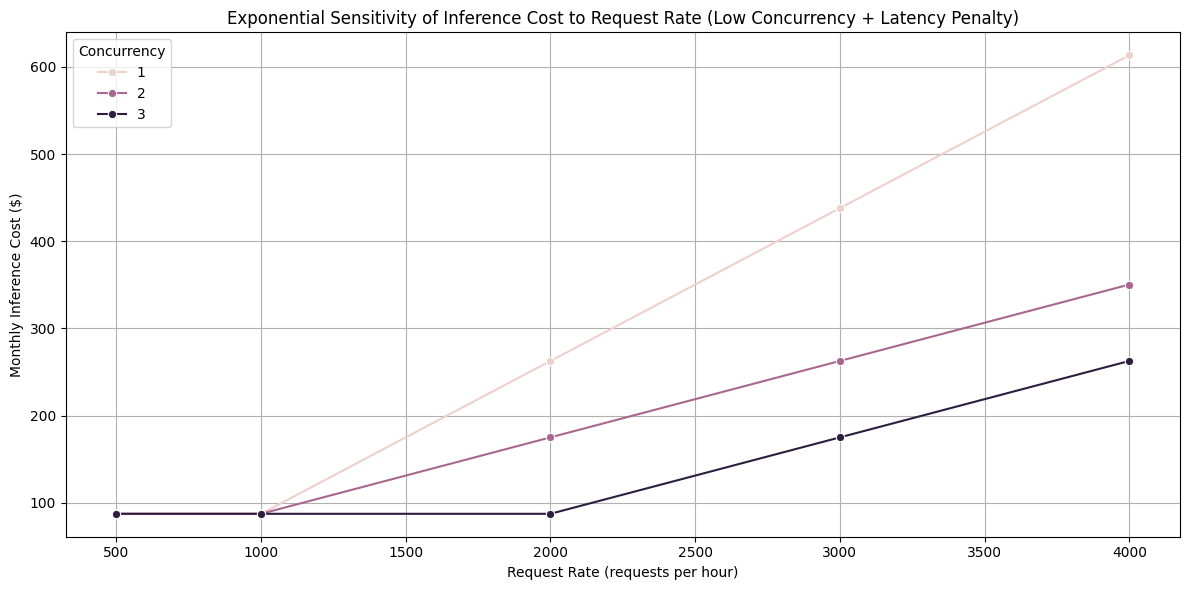

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
inference_time = 2.0  # seconds per request (slower model)
instance_cost_per_hour = 0.12  # dollars per instance
hours_per_month = 730  # average hours in a month

# Extended parameter ranges
extended_request_rate_range = [500, 1000, 2000, 3000, 4000]  # requests/hour
extended_concurrency_range = [1, 2, 3]  # low concurrency to simulate load pressure

# Results container
extended_results = []

# Sensitivity analysis loop
for rate in extended_request_rate_range:
    for concurrency in extended_concurrency_range:
        # Non-linear penalty: latency increases slightly with higher load
        latency_penalty_factor = 1 + 0.0005 * rate
        effective_inference_time = inference_time * latency_penalty_factor

        # Compute required instances
        required_instances = (rate * effective_inference_time) / (3600 * concurrency)
        required_instances_ceiled = np.ceil(required_instances)

        # Compute cost
        cost = required_instances_ceiled * instance_cost_per_hour * hours_per_month

        # Append to results
        extended_results.append({
            "Request Rate (req/hr)": rate,
            "Concurrency": concurrency,
            "Estimated Instances": required_instances_ceiled,
            "Monthly Inference Cost ($)": round(cost, 2)
        })

# Convert to DataFrame
df_extended = pd.DataFrame(extended_results)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_extended,
    x="Request Rate (req/hr)",
    y="Monthly Inference Cost ($)",
    hue="Concurrency",
    marker="o"
)
plt.title("Exponential Sensitivity of Inference Cost to Request Rate (Low Concurrency + Latency Penalty)")
plt.xlabel("Request Rate (requests per hour)")
plt.ylabel("Monthly Inference Cost ($)")
plt.legend(title="Concurrency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load preprocessed features and labels
X_train, y_train = load_features("train_set.csv")

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Save the trained model for inference
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

SyntaxError: unexpected character after line continuation character (3055666775.py, line 1)